In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
n_var =int(vars[0,j])
latent_space =300 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 50000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


X_train= x,y (1000, 2)
y_train= z (1000, 1)


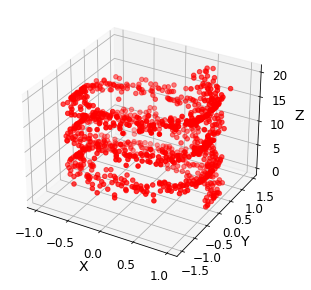

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='grey', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [5]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                9000      
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [6]:
wgan = WGAN_Model11.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 3)                 9650      
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 12,211
Trainable params: 12,111
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


## Training

In [8]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/50000
critic: 10.822382 - generator: 0.034086 - 2s
Epoch 2/50000
critic: 3.496218 - generator: 0.020802 - 0s
Epoch 3/50000
critic: 0.874092 - generator: 0.021794 - 0s
Epoch 4/50000
critic: 0.133753 - generator: 0.029487 - 0s
Epoch 5/50000
critic: 0.036377 - generator: 0.033574 - 0s
Epoch 6/50000
critic: 0.037944 - generator: 0.044052 - 0s
Epoch 7/50000
critic: 0.039814 - generator: 0.050609 - 0s
Epoch 8/50000
critic: 0.027677 - generator: 0.057511 - 0s
Epoch 9/50000
critic: 0.031003 - generator: 0.068658 - 0s
Epoch 10/50000
critic: 0.025449 - generator: 0.072278 - 0s
Epoch 11/50000
critic: 0.019371 - generator: 0.079582 - 0s
Epoch 12/50000
critic: 0.019133 - generator: 0.087086 - 0s
Epoch 13/50000
critic: 0.024081 - generator: 0.088992 - 0s
Epoch 14/50000
critic: 0.020732 - generator: 0.099478 - 0s
Epoch 15/50000
critic: 0.020432 - generator: 0.110684 - 0s
Epoch 16/50000
critic: 0.020488 - generator: 0.115222 - 0s
Epoch 17/50000
critic: 0.021684 - generator: 0.125371 - 0s
Epoch

critic: 0.011204 - generator: 0.114825 - 0s
Epoch 141/50000
critic: 0.008455 - generator: 0.117376 - 0s
Epoch 142/50000
critic: 0.013310 - generator: 0.114902 - 0s
Epoch 143/50000
critic: 0.018144 - generator: 0.108465 - 0s
Epoch 144/50000
critic: 0.012836 - generator: 0.115163 - 0s
Epoch 145/50000
critic: 0.018572 - generator: 0.112511 - 0s
Epoch 146/50000
critic: 0.014630 - generator: 0.113364 - 0s
Epoch 147/50000
critic: 0.013975 - generator: 0.116809 - 0s
Epoch 148/50000
critic: 0.005081 - generator: 0.113663 - 0s
Epoch 149/50000
critic: 0.012258 - generator: 0.122263 - 0s
Epoch 150/50000
critic: 0.011203 - generator: 0.116086 - 0s
Epoch 151/50000
critic: 0.012338 - generator: 0.118446 - 0s
Epoch 152/50000
critic: 0.008893 - generator: 0.116977 - 0s
Epoch 153/50000
critic: 0.014237 - generator: 0.112684 - 0s
Epoch 154/50000
critic: 0.012234 - generator: 0.112362 - 0s
Epoch 155/50000
critic: 0.017312 - generator: 0.116946 - 0s
Epoch 156/50000
critic: 0.012533 - generator: 0.115511 -

critic: 0.012412 - generator: 0.069242 - 0s
Epoch 278/50000
critic: 0.015282 - generator: 0.068958 - 0s
Epoch 279/50000
critic: 0.009056 - generator: 0.062520 - 0s
Epoch 280/50000
critic: 0.010725 - generator: 0.067781 - 0s
Epoch 281/50000
critic: 0.018870 - generator: 0.063923 - 0s
Epoch 282/50000
critic: 0.014575 - generator: 0.060521 - 0s
Epoch 283/50000
critic: 0.009070 - generator: 0.062738 - 0s
Epoch 284/50000
critic: 0.013868 - generator: 0.064457 - 0s
Epoch 285/50000
critic: 0.012113 - generator: 0.060569 - 0s
Epoch 286/50000
critic: 0.008854 - generator: 0.062306 - 0s
Epoch 287/50000
critic: 0.012826 - generator: 0.061721 - 0s
Epoch 288/50000
critic: 0.011096 - generator: 0.061414 - 0s
Epoch 289/50000
critic: 0.010701 - generator: 0.061401 - 0s
Epoch 290/50000
critic: 0.009742 - generator: 0.055287 - 0s
Epoch 291/50000
critic: 0.006138 - generator: 0.056678 - 0s
Epoch 292/50000
critic: 0.008927 - generator: 0.055989 - 0s
Epoch 293/50000
critic: 0.007131 - generator: 0.055234 -

critic: 0.008012 - generator: 0.059678 - 0s
Epoch 415/50000
critic: 0.007502 - generator: 0.064268 - 0s
Epoch 416/50000
critic: 0.007357 - generator: 0.057191 - 0s
Epoch 417/50000
critic: 0.010936 - generator: 0.054500 - 0s
Epoch 418/50000
critic: 0.005684 - generator: 0.059617 - 0s
Epoch 419/50000
critic: 0.011698 - generator: 0.062307 - 0s
Epoch 420/50000
critic: 0.008814 - generator: 0.057763 - 0s
Epoch 421/50000
critic: 0.011054 - generator: 0.058002 - 0s
Epoch 422/50000
critic: 0.006445 - generator: 0.058635 - 0s
Epoch 423/50000
critic: 0.012295 - generator: 0.057937 - 0s
Epoch 424/50000
critic: 0.008465 - generator: 0.054457 - 0s
Epoch 425/50000
critic: 0.008215 - generator: 0.056418 - 0s
Epoch 426/50000
critic: 0.006867 - generator: 0.058087 - 0s
Epoch 427/50000
critic: 0.013765 - generator: 0.054647 - 0s
Epoch 428/50000
critic: 0.014645 - generator: 0.059744 - 0s
Epoch 429/50000
critic: 0.009118 - generator: 0.053757 - 0s
Epoch 430/50000
critic: 0.006439 - generator: 0.052308 -

critic: 0.011148 - generator: 0.076583 - 0s
Epoch 552/50000
critic: 0.007614 - generator: 0.072692 - 0s
Epoch 553/50000
critic: 0.010495 - generator: 0.076831 - 0s
Epoch 554/50000
critic: 0.005405 - generator: 0.074850 - 0s
Epoch 555/50000
critic: 0.015041 - generator: 0.078964 - 0s
Epoch 556/50000
critic: 0.004832 - generator: 0.083281 - 0s
Epoch 557/50000
critic: 0.008396 - generator: 0.081405 - 0s
Epoch 558/50000
critic: 0.004732 - generator: 0.079452 - 0s
Epoch 559/50000
critic: 0.008858 - generator: 0.087624 - 0s
Epoch 560/50000
critic: 0.006988 - generator: 0.082366 - 0s
Epoch 561/50000
critic: 0.006480 - generator: 0.085981 - 0s
Epoch 562/50000
critic: 0.007433 - generator: 0.085941 - 0s
Epoch 563/50000
critic: 0.002490 - generator: 0.086787 - 0s
Epoch 564/50000
critic: 0.009774 - generator: 0.079470 - 0s
Epoch 565/50000
critic: 0.010638 - generator: 0.086152 - 0s
Epoch 566/50000
critic: 0.007181 - generator: 0.083858 - 0s
Epoch 567/50000
critic: 0.010854 - generator: 0.086194 -

critic: 0.007630 - generator: 0.081223 - 0s
Epoch 689/50000
critic: 0.014271 - generator: 0.079069 - 0s
Epoch 690/50000
critic: 0.010686 - generator: 0.074046 - 0s
Epoch 691/50000
critic: 0.005442 - generator: 0.080976 - 0s
Epoch 692/50000
critic: 0.011266 - generator: 0.078451 - 0s
Epoch 693/50000
critic: 0.003286 - generator: 0.082708 - 0s
Epoch 694/50000
critic: 0.008125 - generator: 0.083959 - 0s
Epoch 695/50000
critic: 0.011362 - generator: 0.080097 - 0s
Epoch 696/50000
critic: 0.014635 - generator: 0.078637 - 0s
Epoch 697/50000
critic: 0.004046 - generator: 0.081060 - 0s
Epoch 698/50000
critic: 0.005099 - generator: 0.085537 - 0s
Epoch 699/50000
critic: 0.007128 - generator: 0.084043 - 0s
Epoch 700/50000
critic: 0.008906 - generator: 0.084028 - 0s
Epoch 701/50000
critic: 0.006691 - generator: 0.087697 - 0s
Epoch 702/50000
critic: 0.014464 - generator: 0.079884 - 0s
Epoch 703/50000
critic: 0.012487 - generator: 0.079918 - 0s
Epoch 704/50000
critic: 0.011501 - generator: 0.079271 -

critic: 0.005797 - generator: 0.092106 - 0s
Epoch 827/50000
critic: 0.009212 - generator: 0.092412 - 0s
Epoch 828/50000
critic: 0.008480 - generator: 0.090392 - 0s
Epoch 829/50000
critic: 0.007608 - generator: 0.088998 - 0s
Epoch 830/50000
critic: 0.012677 - generator: 0.090442 - 0s
Epoch 831/50000
critic: 0.014891 - generator: 0.092825 - 0s
Epoch 832/50000
critic: 0.010850 - generator: 0.090435 - 0s
Epoch 833/50000
critic: 0.004189 - generator: 0.092113 - 0s
Epoch 834/50000
critic: 0.005667 - generator: 0.096089 - 0s
Epoch 835/50000
critic: 0.004257 - generator: 0.096036 - 0s
Epoch 836/50000
critic: 0.014116 - generator: 0.091279 - 0s
Epoch 837/50000
critic: 0.006757 - generator: 0.099047 - 0s
Epoch 838/50000
critic: 0.009692 - generator: 0.095826 - 0s
Epoch 839/50000
critic: 0.008151 - generator: 0.087880 - 0s
Epoch 840/50000
critic: 0.012089 - generator: 0.087321 - 0s
Epoch 841/50000
critic: 0.008162 - generator: 0.096198 - 0s
Epoch 842/50000
critic: 0.004582 - generator: 0.095856 -

critic: 0.007689 - generator: 0.095799 - 0s
Epoch 964/50000
critic: 0.004475 - generator: 0.087808 - 0s
Epoch 965/50000
critic: 0.006154 - generator: 0.080721 - 0s
Epoch 966/50000
critic: 0.007833 - generator: 0.089368 - 0s
Epoch 967/50000
critic: 0.007800 - generator: 0.088728 - 0s
Epoch 968/50000
critic: 0.004479 - generator: 0.095080 - 0s
Epoch 969/50000
critic: 0.007961 - generator: 0.096134 - 0s
Epoch 970/50000
critic: 0.009262 - generator: 0.096689 - 0s
Epoch 971/50000
critic: 0.004439 - generator: 0.101611 - 0s
Epoch 972/50000
critic: 0.011305 - generator: 0.091169 - 0s
Epoch 973/50000
critic: 0.009868 - generator: 0.089013 - 0s
Epoch 974/50000
critic: 0.001278 - generator: 0.098380 - 0s
Epoch 975/50000
critic: 0.011582 - generator: 0.097138 - 0s
Epoch 976/50000
critic: 0.004736 - generator: 0.101860 - 0s
Epoch 977/50000
critic: 0.004122 - generator: 0.088929 - 0s
Epoch 978/50000
critic: 0.013441 - generator: 0.091532 - 0s
Epoch 979/50000
critic: 0.008260 - generator: 0.091638 -

critic: 0.011881 - generator: 0.117765 - 0s
Epoch 1099/50000
critic: 0.008922 - generator: 0.116075 - 0s
Epoch 1100/50000
critic: 0.004954 - generator: 0.113461 - 0s
Epoch 1101/50000
critic: 0.007163 - generator: 0.116449 - 0s
Epoch 1102/50000
critic: 0.009571 - generator: 0.112947 - 0s
Epoch 1103/50000
critic: 0.014001 - generator: 0.113103 - 0s
Epoch 1104/50000
critic: 0.001940 - generator: 0.112495 - 0s
Epoch 1105/50000
critic: 0.004792 - generator: 0.112234 - 0s
Epoch 1106/50000
critic: 0.011322 - generator: 0.115415 - 0s
Epoch 1107/50000
critic: 0.005292 - generator: 0.114779 - 0s
Epoch 1108/50000
critic: 0.007036 - generator: 0.112159 - 0s
Epoch 1109/50000
critic: 0.008118 - generator: 0.110369 - 0s
Epoch 1110/50000
critic: 0.009630 - generator: 0.116554 - 0s
Epoch 1111/50000
critic: 0.008851 - generator: 0.111764 - 0s
Epoch 1112/50000
critic: 0.011269 - generator: 0.115233 - 0s
Epoch 1113/50000
critic: 0.012004 - generator: 0.113810 - 0s
Epoch 1114/50000
critic: 0.014056 - gener

critic: 0.005574 - generator: 0.123717 - 0s
Epoch 1235/50000
critic: 0.010002 - generator: 0.114398 - 0s
Epoch 1236/50000
critic: 0.009612 - generator: 0.117171 - 0s
Epoch 1237/50000
critic: 0.009157 - generator: 0.113313 - 0s
Epoch 1238/50000
critic: 0.007213 - generator: 0.110678 - 0s
Epoch 1239/50000
critic: 0.006586 - generator: 0.107158 - 0s
Epoch 1240/50000
critic: 0.005533 - generator: 0.108427 - 0s
Epoch 1241/50000
critic: 0.004576 - generator: 0.106680 - 0s
Epoch 1242/50000
critic: 0.006217 - generator: 0.106263 - 0s
Epoch 1243/50000
critic: 0.012440 - generator: 0.098842 - 0s
Epoch 1244/50000
critic: 0.008003 - generator: 0.106109 - 0s
Epoch 1245/50000
critic: 0.008506 - generator: 0.104372 - 0s
Epoch 1246/50000
critic: 0.006007 - generator: 0.107728 - 0s
Epoch 1247/50000
critic: 0.005216 - generator: 0.106849 - 0s
Epoch 1248/50000
critic: 0.006959 - generator: 0.108468 - 0s
Epoch 1249/50000
critic: 0.014936 - generator: 0.107930 - 0s
Epoch 1250/50000
critic: 0.009352 - gener

critic: 0.002930 - generator: 0.080255 - 0s
Epoch 1370/50000
critic: 0.007477 - generator: 0.082293 - 0s
Epoch 1371/50000
critic: 0.012414 - generator: 0.086810 - 0s
Epoch 1372/50000
critic: 0.011020 - generator: 0.086072 - 0s
Epoch 1373/50000
critic: 0.006155 - generator: 0.088409 - 0s
Epoch 1374/50000
critic: 0.006983 - generator: 0.087416 - 0s
Epoch 1375/50000
critic: 0.011268 - generator: 0.080798 - 0s
Epoch 1376/50000
critic: 0.013520 - generator: 0.088952 - 0s
Epoch 1377/50000
critic: 0.011428 - generator: 0.087011 - 0s
Epoch 1378/50000
critic: 0.010563 - generator: 0.079336 - 0s
Epoch 1379/50000
critic: 0.012157 - generator: 0.079513 - 0s
Epoch 1380/50000
critic: -0.000974 - generator: 0.082514 - 0s
Epoch 1381/50000
critic: 0.008377 - generator: 0.076601 - 0s
Epoch 1382/50000
critic: 0.014502 - generator: 0.086296 - 0s
Epoch 1383/50000
critic: 0.000883 - generator: 0.085775 - 0s
Epoch 1384/50000
critic: 0.011467 - generator: 0.084603 - 0s
Epoch 1385/50000
critic: 0.010853 - gene

critic: 0.007562 - generator: 0.056646 - 0s
Epoch 1505/50000
critic: 0.008189 - generator: 0.064850 - 0s
Epoch 1506/50000
critic: 0.006449 - generator: 0.063427 - 0s
Epoch 1507/50000
critic: 0.008562 - generator: 0.067256 - 0s
Epoch 1508/50000
critic: 0.009153 - generator: 0.072112 - 0s
Epoch 1509/50000
critic: 0.005101 - generator: 0.066862 - 0s
Epoch 1510/50000
critic: 0.010649 - generator: 0.075208 - 0s
Epoch 1511/50000
critic: 0.005465 - generator: 0.071102 - 0s
Epoch 1512/50000
critic: 0.008499 - generator: 0.072986 - 0s
Epoch 1513/50000
critic: 0.009315 - generator: 0.072247 - 0s
Epoch 1514/50000
critic: 0.011306 - generator: 0.073269 - 0s
Epoch 1515/50000
critic: 0.006245 - generator: 0.068051 - 0s
Epoch 1516/50000
critic: 0.005673 - generator: 0.077624 - 0s
Epoch 1517/50000
critic: 0.014893 - generator: 0.071915 - 0s
Epoch 1518/50000
critic: 0.011969 - generator: 0.072447 - 0s
Epoch 1519/50000
critic: 0.011703 - generator: 0.070711 - 0s
Epoch 1520/50000
critic: 0.006636 - gener

critic: 0.009145 - generator: 0.064338 - 0s
Epoch 1640/50000
critic: 0.011320 - generator: 0.057371 - 0s
Epoch 1641/50000
critic: 0.005561 - generator: 0.057561 - 0s
Epoch 1642/50000
critic: 0.008932 - generator: 0.061279 - 0s
Epoch 1643/50000
critic: 0.008315 - generator: 0.060865 - 0s
Epoch 1644/50000
critic: 0.009622 - generator: 0.062266 - 0s
Epoch 1645/50000
critic: 0.005810 - generator: 0.057763 - 0s
Epoch 1646/50000
critic: 0.004750 - generator: 0.055201 - 0s
Epoch 1647/50000
critic: 0.006206 - generator: 0.060776 - 0s
Epoch 1648/50000
critic: 0.010285 - generator: 0.061393 - 0s
Epoch 1649/50000
critic: 0.009405 - generator: 0.057690 - 0s
Epoch 1650/50000
critic: 0.005178 - generator: 0.054833 - 0s
Epoch 1651/50000
critic: 0.008626 - generator: 0.060112 - 0s
Epoch 1652/50000
critic: 0.010300 - generator: 0.055101 - 0s
Epoch 1653/50000
critic: 0.005730 - generator: 0.060172 - 0s
Epoch 1654/50000
critic: 0.009700 - generator: 0.056572 - 0s
Epoch 1655/50000
critic: 0.009544 - gener

critic: 0.009635 - generator: 0.063594 - 0s
Epoch 1775/50000
critic: 0.010349 - generator: 0.062243 - 0s
Epoch 1776/50000
critic: 0.001146 - generator: 0.060070 - 0s
Epoch 1777/50000
critic: 0.002433 - generator: 0.064676 - 0s
Epoch 1778/50000
critic: 0.011174 - generator: 0.072505 - 0s
Epoch 1779/50000
critic: 0.006044 - generator: 0.073771 - 0s
Epoch 1780/50000
critic: 0.004822 - generator: 0.069090 - 0s
Epoch 1781/50000
critic: 0.007785 - generator: 0.065593 - 0s
Epoch 1782/50000
critic: 0.014459 - generator: 0.066395 - 0s
Epoch 1783/50000
critic: 0.010580 - generator: 0.066812 - 0s
Epoch 1784/50000
critic: 0.007019 - generator: 0.069746 - 0s
Epoch 1785/50000
critic: 0.002624 - generator: 0.067557 - 0s
Epoch 1786/50000
critic: 0.003959 - generator: 0.072318 - 0s
Epoch 1787/50000
critic: 0.003747 - generator: 0.079388 - 0s
Epoch 1788/50000
critic: 0.002753 - generator: 0.074279 - 0s
Epoch 1789/50000
critic: 0.006029 - generator: 0.078301 - 0s
Epoch 1790/50000
critic: 0.006193 - gener

critic: 0.009143 - generator: 0.050409 - 0s
Epoch 1910/50000
critic: 0.008845 - generator: 0.051370 - 0s
Epoch 1911/50000
critic: 0.009967 - generator: 0.054378 - 0s
Epoch 1912/50000
critic: 0.013040 - generator: 0.050979 - 0s
Epoch 1913/50000
critic: 0.009943 - generator: 0.046551 - 0s
Epoch 1914/50000
critic: 0.002549 - generator: 0.047151 - 0s
Epoch 1915/50000
critic: 0.006823 - generator: 0.044446 - 0s
Epoch 1916/50000
critic: 0.014703 - generator: 0.041747 - 0s
Epoch 1917/50000
critic: 0.006682 - generator: 0.050342 - 0s
Epoch 1918/50000
critic: 0.006045 - generator: 0.043466 - 0s
Epoch 1919/50000
critic: 0.013311 - generator: 0.054670 - 0s
Epoch 1920/50000
critic: 0.010143 - generator: 0.045458 - 0s
Epoch 1921/50000
critic: 0.005440 - generator: 0.047647 - 0s
Epoch 1922/50000
critic: 0.013529 - generator: 0.050440 - 0s
Epoch 1923/50000
critic: 0.014353 - generator: 0.051362 - 0s
Epoch 1924/50000
critic: 0.006832 - generator: 0.053583 - 0s
Epoch 1925/50000
critic: 0.008053 - gener

critic: 0.009604 - generator: 0.020528 - 0s
Epoch 2045/50000
critic: 0.005953 - generator: 0.018560 - 0s
Epoch 2046/50000
critic: 0.006792 - generator: 0.014181 - 0s
Epoch 2047/50000
critic: 0.007899 - generator: 0.017157 - 0s
Epoch 2048/50000
critic: 0.003760 - generator: 0.013843 - 0s
Epoch 2049/50000
critic: 0.012028 - generator: 0.009205 - 0s
Epoch 2050/50000
critic: 0.012154 - generator: 0.007986 - 0s
Epoch 2051/50000
critic: 0.007148 - generator: 0.015163 - 0s
Epoch 2052/50000
critic: 0.005609 - generator: 0.013574 - 0s
Epoch 2053/50000
critic: 0.012740 - generator: 0.011048 - 0s
Epoch 2054/50000
critic: 0.008660 - generator: 0.013598 - 0s
Epoch 2055/50000
critic: 0.009004 - generator: 0.007091 - 0s
Epoch 2056/50000
critic: 0.006574 - generator: 0.002863 - 0s
Epoch 2057/50000
critic: 0.005833 - generator: 0.008402 - 0s
Epoch 2058/50000
critic: 0.007009 - generator: 0.011427 - 0s
Epoch 2059/50000
critic: 0.008426 - generator: 0.009029 - 0s
Epoch 2060/50000
critic: 0.005779 - gener

critic: 0.005596 - generator: -0.011477 - 0s
Epoch 2179/50000
critic: 0.010333 - generator: -0.005675 - 0s
Epoch 2180/50000
critic: 0.008514 - generator: -0.004942 - 0s
Epoch 2181/50000
critic: 0.014662 - generator: -0.009392 - 0s
Epoch 2182/50000
critic: 0.007417 - generator: -0.011556 - 0s
Epoch 2183/50000
critic: 0.012070 - generator: -0.002648 - 0s
Epoch 2184/50000
critic: 0.008329 - generator: -0.006666 - 0s
Epoch 2185/50000
critic: 0.009792 - generator: 0.000174 - 0s
Epoch 2186/50000
critic: 0.002619 - generator: 0.006078 - 0s
Epoch 2187/50000
critic: 0.008393 - generator: -0.003481 - 0s
Epoch 2188/50000
critic: 0.006867 - generator: 0.002726 - 0s
Epoch 2189/50000
critic: 0.013000 - generator: 0.002489 - 0s
Epoch 2190/50000
critic: 0.009115 - generator: -0.001955 - 0s
Epoch 2191/50000
critic: 0.003171 - generator: 0.002666 - 0s
Epoch 2192/50000
critic: 0.009209 - generator: -0.003990 - 0s
Epoch 2193/50000
critic: 0.009081 - generator: 0.001890 - 0s
Epoch 2194/50000
critic: 0.0037

critic: 0.009490 - generator: -0.019469 - 0s
Epoch 2312/50000
critic: 0.009681 - generator: -0.014474 - 0s
Epoch 2313/50000
critic: 0.009720 - generator: -0.020449 - 0s
Epoch 2314/50000
critic: 0.003240 - generator: -0.020567 - 0s
Epoch 2315/50000
critic: 0.013663 - generator: -0.021404 - 0s
Epoch 2316/50000
critic: 0.005438 - generator: -0.023104 - 0s
Epoch 2317/50000
critic: 0.003516 - generator: -0.016603 - 0s
Epoch 2318/50000
critic: 0.006228 - generator: -0.020653 - 0s
Epoch 2319/50000
critic: 0.006017 - generator: -0.020504 - 0s
Epoch 2320/50000
critic: 0.012314 - generator: -0.024572 - 0s
Epoch 2321/50000
critic: 0.007471 - generator: -0.023912 - 0s
Epoch 2322/50000
critic: 0.008783 - generator: -0.019447 - 0s
Epoch 2323/50000
critic: 0.013141 - generator: -0.028319 - 0s
Epoch 2324/50000
critic: 0.005866 - generator: -0.023624 - 0s
Epoch 2325/50000
critic: 0.003960 - generator: -0.017910 - 0s
Epoch 2326/50000
critic: 0.004817 - generator: -0.018301 - 0s
Epoch 2327/50000
critic: 

critic: 0.010349 - generator: -0.024191 - 0s
Epoch 2445/50000
critic: 0.010509 - generator: -0.019498 - 0s
Epoch 2446/50000
critic: 0.014590 - generator: -0.020090 - 0s
Epoch 2447/50000
critic: 0.004770 - generator: -0.018552 - 0s
Epoch 2448/50000
critic: 0.010575 - generator: -0.018587 - 0s
Epoch 2449/50000
critic: 0.009968 - generator: -0.023089 - 0s
Epoch 2450/50000
critic: 0.007295 - generator: -0.013728 - 0s
Epoch 2451/50000
critic: 0.007782 - generator: -0.012766 - 0s
Epoch 2452/50000
critic: 0.010698 - generator: -0.019635 - 0s
Epoch 2453/50000
critic: 0.009100 - generator: -0.016551 - 0s
Epoch 2454/50000
critic: 0.006588 - generator: -0.012337 - 0s
Epoch 2455/50000
critic: 0.008015 - generator: -0.015235 - 0s
Epoch 2456/50000
critic: 0.009106 - generator: -0.016947 - 0s
Epoch 2457/50000
critic: 0.007402 - generator: -0.016745 - 0s
Epoch 2458/50000
critic: 0.007672 - generator: -0.020110 - 0s
Epoch 2459/50000
critic: 0.008189 - generator: -0.011485 - 0s
Epoch 2460/50000
critic: 

critic: 0.009907 - generator: -0.006971 - 0s
Epoch 2578/50000
critic: 0.010445 - generator: -0.005528 - 0s
Epoch 2579/50000
critic: 0.010118 - generator: -0.006746 - 0s
Epoch 2580/50000
critic: 0.012113 - generator: -0.003899 - 0s
Epoch 2581/50000
critic: 0.004447 - generator: -0.000417 - 0s
Epoch 2582/50000
critic: 0.010684 - generator: -0.003530 - 0s
Epoch 2583/50000
critic: 0.006268 - generator: 0.002299 - 0s
Epoch 2584/50000
critic: 0.010105 - generator: -0.004762 - 0s
Epoch 2585/50000
critic: 0.006782 - generator: -0.004155 - 0s
Epoch 2586/50000
critic: 0.013184 - generator: 0.000272 - 0s
Epoch 2587/50000
critic: 0.009145 - generator: -0.003794 - 0s
Epoch 2588/50000
critic: 0.006855 - generator: -0.009030 - 0s
Epoch 2589/50000
critic: 0.007173 - generator: -0.010047 - 0s
Epoch 2590/50000
critic: 0.003836 - generator: -0.005108 - 0s
Epoch 2591/50000
critic: 0.011812 - generator: -0.009392 - 0s
Epoch 2592/50000
critic: 0.006415 - generator: -0.014320 - 0s
Epoch 2593/50000
critic: 0.

critic: 0.006877 - generator: -0.022707 - 0s
Epoch 2711/50000
critic: 0.009440 - generator: -0.021303 - 0s
Epoch 2712/50000
critic: 0.011225 - generator: -0.018614 - 0s
Epoch 2713/50000
critic: 0.006186 - generator: -0.021284 - 0s
Epoch 2714/50000
critic: 0.007016 - generator: -0.017536 - 0s
Epoch 2715/50000
critic: 0.007646 - generator: -0.015629 - 0s
Epoch 2716/50000
critic: 0.009094 - generator: -0.019985 - 0s
Epoch 2717/50000
critic: 0.003857 - generator: -0.021834 - 0s
Epoch 2718/50000
critic: 0.009705 - generator: -0.013297 - 0s
Epoch 2719/50000
critic: 0.008393 - generator: -0.013740 - 0s
Epoch 2720/50000
critic: 0.004238 - generator: -0.015093 - 0s
Epoch 2721/50000
critic: 0.008337 - generator: -0.021087 - 0s
Epoch 2722/50000
critic: 0.006393 - generator: -0.019651 - 0s
Epoch 2723/50000
critic: 0.006386 - generator: -0.019921 - 0s
Epoch 2724/50000
critic: 0.008827 - generator: -0.015888 - 0s
Epoch 2725/50000
critic: 0.006562 - generator: -0.023398 - 0s
Epoch 2726/50000
critic: 

critic: 0.003976 - generator: -0.021834 - 0s
Epoch 2844/50000
critic: 0.013610 - generator: -0.028786 - 0s
Epoch 2845/50000
critic: 0.003243 - generator: -0.030444 - 0s
Epoch 2846/50000
critic: 0.004025 - generator: -0.031409 - 0s
Epoch 2847/50000
critic: 0.008109 - generator: -0.029987 - 0s
Epoch 2848/50000
critic: 0.007384 - generator: -0.023020 - 0s
Epoch 2849/50000
critic: 0.008727 - generator: -0.027146 - 0s
Epoch 2850/50000
critic: 0.008096 - generator: -0.026584 - 0s
Epoch 2851/50000
critic: 0.010686 - generator: -0.022660 - 0s
Epoch 2852/50000
critic: 0.006905 - generator: -0.022704 - 0s
Epoch 2853/50000
critic: 0.005418 - generator: -0.017807 - 0s
Epoch 2854/50000
critic: 0.008694 - generator: -0.013444 - 0s
Epoch 2855/50000
critic: 0.007472 - generator: -0.016327 - 0s
Epoch 2856/50000
critic: 0.005748 - generator: -0.015782 - 0s
Epoch 2857/50000
critic: 0.010432 - generator: -0.018459 - 0s
Epoch 2858/50000
critic: 0.006365 - generator: -0.012548 - 0s
Epoch 2859/50000
critic: 

critic: 0.012498 - generator: -0.007566 - 0s
Epoch 2977/50000
critic: 0.005725 - generator: -0.006773 - 0s
Epoch 2978/50000
critic: 0.009140 - generator: -0.008026 - 0s
Epoch 2979/50000
critic: 0.007308 - generator: -0.011904 - 0s
Epoch 2980/50000
critic: 0.008698 - generator: -0.009164 - 0s
Epoch 2981/50000
critic: 0.007737 - generator: -0.009469 - 0s
Epoch 2982/50000
critic: 0.009684 - generator: -0.009337 - 0s
Epoch 2983/50000
critic: 0.005692 - generator: -0.011640 - 0s
Epoch 2984/50000
critic: 0.009822 - generator: -0.012683 - 0s
Epoch 2985/50000
critic: 0.004205 - generator: -0.013833 - 0s
Epoch 2986/50000
critic: 0.010244 - generator: -0.017509 - 0s
Epoch 2987/50000
critic: 0.008013 - generator: -0.019327 - 0s
Epoch 2988/50000
critic: 0.011360 - generator: -0.014270 - 0s
Epoch 2989/50000
critic: 0.009795 - generator: -0.025413 - 0s
Epoch 2990/50000
critic: 0.005681 - generator: -0.015499 - 0s
Epoch 2991/50000
critic: 0.007246 - generator: -0.021927 - 0s
Epoch 2992/50000
critic: 

critic: 0.006801 - generator: -0.020694 - 0s
Epoch 3111/50000
critic: 0.005692 - generator: -0.015441 - 0s
Epoch 3112/50000
critic: 0.008149 - generator: -0.021376 - 0s
Epoch 3113/50000
critic: 0.008825 - generator: -0.019085 - 0s
Epoch 3114/50000
critic: 0.006774 - generator: -0.016814 - 0s
Epoch 3115/50000
critic: 0.000080 - generator: -0.016605 - 0s
Epoch 3116/50000
critic: 0.004111 - generator: -0.018373 - 0s
Epoch 3117/50000
critic: 0.005773 - generator: -0.021235 - 0s
Epoch 3118/50000
critic: 0.005998 - generator: -0.021296 - 0s
Epoch 3119/50000
critic: 0.011493 - generator: -0.018805 - 0s
Epoch 3120/50000
critic: 0.005473 - generator: -0.023231 - 0s
Epoch 3121/50000
critic: 0.004558 - generator: -0.021835 - 0s
Epoch 3122/50000
critic: 0.007808 - generator: -0.015063 - 0s
Epoch 3123/50000
critic: 0.008332 - generator: -0.016425 - 0s
Epoch 3124/50000
critic: 0.008936 - generator: -0.026458 - 0s
Epoch 3125/50000
critic: 0.009018 - generator: -0.024681 - 0s
Epoch 3126/50000
critic: 

critic: 0.007888 - generator: -0.017921 - 0s
Epoch 3244/50000
critic: 0.006761 - generator: -0.027669 - 0s
Epoch 3245/50000
critic: 0.006320 - generator: -0.020690 - 0s
Epoch 3246/50000
critic: 0.011545 - generator: -0.024491 - 0s
Epoch 3247/50000
critic: 0.006013 - generator: -0.019023 - 0s
Epoch 3248/50000
critic: 0.006301 - generator: -0.032385 - 0s
Epoch 3249/50000
critic: 0.007676 - generator: -0.031103 - 0s
Epoch 3250/50000
critic: 0.008968 - generator: -0.030507 - 0s
Epoch 3251/50000
critic: 0.004867 - generator: -0.031227 - 0s
Epoch 3252/50000
critic: 0.006073 - generator: -0.028981 - 0s
Epoch 3253/50000
critic: 0.005094 - generator: -0.031189 - 0s
Epoch 3254/50000
critic: 0.010530 - generator: -0.031186 - 0s
Epoch 3255/50000
critic: 0.005512 - generator: -0.029951 - 0s
Epoch 3256/50000
critic: 0.007511 - generator: -0.025102 - 0s
Epoch 3257/50000
critic: 0.009652 - generator: -0.030912 - 0s
Epoch 3258/50000
critic: 0.006944 - generator: -0.034382 - 0s
Epoch 3259/50000
critic: 

critic: 0.008185 - generator: -0.049603 - 0s
Epoch 3377/50000
critic: 0.009208 - generator: -0.053650 - 0s
Epoch 3378/50000
critic: 0.008301 - generator: -0.053202 - 0s
Epoch 3379/50000
critic: 0.003781 - generator: -0.049629 - 0s
Epoch 3380/50000
critic: 0.010291 - generator: -0.049486 - 0s
Epoch 3381/50000
critic: 0.006630 - generator: -0.046051 - 0s
Epoch 3382/50000
critic: 0.006313 - generator: -0.049648 - 0s
Epoch 3383/50000
critic: 0.005213 - generator: -0.049518 - 0s
Epoch 3384/50000
critic: 0.006518 - generator: -0.049555 - 0s
Epoch 3385/50000
critic: 0.007188 - generator: -0.050951 - 0s
Epoch 3386/50000
critic: 0.010556 - generator: -0.047309 - 0s
Epoch 3387/50000
critic: 0.006790 - generator: -0.051120 - 0s
Epoch 3388/50000
critic: 0.009810 - generator: -0.050157 - 0s
Epoch 3389/50000
critic: 0.006826 - generator: -0.042503 - 0s
Epoch 3390/50000
critic: 0.011616 - generator: -0.047005 - 0s
Epoch 3391/50000
critic: 0.004579 - generator: -0.049509 - 0s
Epoch 3392/50000
critic: 

critic: 0.010809 - generator: -0.046427 - 0s
Epoch 3642/50000
critic: 0.005161 - generator: -0.044971 - 0s
Epoch 3643/50000
critic: 0.009039 - generator: -0.045796 - 0s
Epoch 3644/50000
critic: 0.007584 - generator: -0.043012 - 0s
Epoch 3645/50000
critic: 0.008349 - generator: -0.044506 - 0s
Epoch 3646/50000
critic: 0.006467 - generator: -0.044415 - 0s
Epoch 3647/50000
critic: 0.005670 - generator: -0.043555 - 0s
Epoch 3648/50000
critic: 0.006139 - generator: -0.044937 - 0s
Epoch 3649/50000
critic: 0.006852 - generator: -0.044960 - 0s
Epoch 3650/50000
critic: 0.006054 - generator: -0.046347 - 0s
Epoch 3651/50000
critic: 0.008329 - generator: -0.041086 - 0s
Epoch 3652/50000
critic: 0.004108 - generator: -0.039392 - 0s
Epoch 3653/50000
critic: 0.005244 - generator: -0.036621 - 0s
Epoch 3654/50000
critic: 0.005231 - generator: -0.034293 - 0s
Epoch 3655/50000
critic: 0.005589 - generator: -0.040561 - 0s
Epoch 3656/50000
critic: 0.004627 - generator: -0.038528 - 0s
Epoch 3657/50000
critic: 

critic: 0.006612 - generator: -0.048643 - 0s
Epoch 3775/50000
critic: 0.004606 - generator: -0.046546 - 0s
Epoch 3776/50000
critic: 0.005661 - generator: -0.053016 - 0s
Epoch 3777/50000
critic: 0.011044 - generator: -0.049263 - 0s
Epoch 3778/50000
critic: 0.008119 - generator: -0.051803 - 0s
Epoch 3779/50000
critic: 0.004330 - generator: -0.053211 - 0s
Epoch 3780/50000
critic: 0.004378 - generator: -0.056226 - 0s
Epoch 3781/50000
critic: 0.001995 - generator: -0.053012 - 0s
Epoch 3782/50000
critic: 0.007195 - generator: -0.056507 - 0s
Epoch 3783/50000
critic: 0.006871 - generator: -0.052546 - 0s
Epoch 3784/50000
critic: 0.009259 - generator: -0.052489 - 0s
Epoch 3785/50000
critic: 0.006402 - generator: -0.049954 - 0s
Epoch 3786/50000
critic: 0.009857 - generator: -0.056173 - 0s
Epoch 3787/50000
critic: 0.006214 - generator: -0.051685 - 0s
Epoch 3788/50000
critic: 0.007772 - generator: -0.050322 - 0s
Epoch 3789/50000
critic: 0.009238 - generator: -0.055827 - 0s
Epoch 3790/50000
critic: 

critic: 0.004735 - generator: -0.045646 - 0s
Epoch 3908/50000
critic: 0.010312 - generator: -0.043930 - 0s
Epoch 3909/50000
critic: 0.006191 - generator: -0.051837 - 0s
Epoch 3910/50000
critic: 0.006085 - generator: -0.042236 - 0s
Epoch 3911/50000
critic: 0.006422 - generator: -0.048852 - 0s
Epoch 3912/50000
critic: 0.009251 - generator: -0.048790 - 0s
Epoch 3913/50000
critic: 0.005068 - generator: -0.046227 - 0s
Epoch 3914/50000
critic: 0.007475 - generator: -0.055250 - 0s
Epoch 3915/50000
critic: 0.007602 - generator: -0.047963 - 0s
Epoch 3916/50000
critic: 0.011598 - generator: -0.049902 - 0s
Epoch 3917/50000
critic: 0.008644 - generator: -0.049045 - 0s
Epoch 3918/50000
critic: 0.006868 - generator: -0.054608 - 0s
Epoch 3919/50000
critic: 0.007320 - generator: -0.051513 - 0s
Epoch 3920/50000
critic: 0.006104 - generator: -0.054067 - 0s
Epoch 3921/50000
critic: 0.007359 - generator: -0.052495 - 0s
Epoch 3922/50000
critic: 0.003280 - generator: -0.055209 - 0s
Epoch 3923/50000
critic: 

critic: 0.010483 - generator: -0.035019 - 0s
Epoch 4042/50000
critic: 0.005644 - generator: -0.041078 - 0s
Epoch 4043/50000
critic: 0.004601 - generator: -0.044189 - 0s
Epoch 4044/50000
critic: 0.006652 - generator: -0.046237 - 0s
Epoch 4045/50000
critic: 0.002902 - generator: -0.043560 - 0s
Epoch 4046/50000
critic: 0.009042 - generator: -0.044018 - 0s
Epoch 4047/50000
critic: 0.008462 - generator: -0.048573 - 0s
Epoch 4048/50000
critic: 0.007621 - generator: -0.046329 - 0s
Epoch 4049/50000
critic: 0.005422 - generator: -0.047249 - 0s
Epoch 4050/50000
critic: 0.005722 - generator: -0.048513 - 0s
Epoch 4051/50000
critic: 0.002519 - generator: -0.038859 - 0s
Epoch 4052/50000
critic: 0.005112 - generator: -0.044597 - 0s
Epoch 4053/50000
critic: 0.004834 - generator: -0.042564 - 0s
Epoch 4054/50000
critic: 0.003414 - generator: -0.044835 - 0s
Epoch 4055/50000
critic: 0.004963 - generator: -0.044772 - 0s
Epoch 4056/50000
critic: 0.007984 - generator: -0.044812 - 0s
Epoch 4057/50000
critic: 

critic: 0.006429 - generator: -0.058292 - 0s
Epoch 4175/50000
critic: 0.009277 - generator: -0.059218 - 0s
Epoch 4176/50000
critic: 0.004594 - generator: -0.064592 - 0s
Epoch 4177/50000
critic: 0.005398 - generator: -0.065750 - 0s
Epoch 4178/50000
critic: 0.004745 - generator: -0.070633 - 0s
Epoch 4179/50000
critic: 0.008340 - generator: -0.062777 - 0s
Epoch 4180/50000
critic: 0.010877 - generator: -0.066158 - 0s
Epoch 4181/50000
critic: 0.005243 - generator: -0.060692 - 0s
Epoch 4182/50000
critic: 0.010339 - generator: -0.072217 - 0s
Epoch 4183/50000
critic: 0.003762 - generator: -0.064210 - 0s
Epoch 4184/50000
critic: 0.005280 - generator: -0.064804 - 0s
Epoch 4185/50000
critic: 0.007181 - generator: -0.063289 - 0s
Epoch 4186/50000
critic: 0.004705 - generator: -0.065070 - 0s
Epoch 4187/50000
critic: 0.004511 - generator: -0.065898 - 0s
Epoch 4188/50000
critic: 0.005468 - generator: -0.067140 - 0s
Epoch 4189/50000
critic: 0.010942 - generator: -0.066295 - 0s
Epoch 4190/50000
critic: 

critic: 0.004230 - generator: -0.041944 - 0s
Epoch 4309/50000
critic: 0.009262 - generator: -0.038993 - 0s
Epoch 4310/50000
critic: 0.004911 - generator: -0.043792 - 0s
Epoch 4311/50000
critic: 0.003453 - generator: -0.041220 - 0s
Epoch 4312/50000
critic: 0.007281 - generator: -0.039786 - 0s
Epoch 4313/50000
critic: 0.008160 - generator: -0.036725 - 0s
Epoch 4314/50000
critic: 0.006132 - generator: -0.042685 - 0s
Epoch 4315/50000
critic: 0.007766 - generator: -0.043124 - 0s
Epoch 4316/50000
critic: 0.000337 - generator: -0.041152 - 0s
Epoch 4317/50000
critic: 0.008364 - generator: -0.043938 - 0s
Epoch 4318/50000
critic: 0.009861 - generator: -0.045508 - 0s
Epoch 4319/50000
critic: 0.003083 - generator: -0.041428 - 0s
Epoch 4320/50000
critic: 0.001623 - generator: -0.038677 - 0s
Epoch 4321/50000
critic: 0.007519 - generator: -0.038672 - 0s
Epoch 4322/50000
critic: 0.007218 - generator: -0.038162 - 0s
Epoch 4323/50000
critic: 0.004436 - generator: -0.036666 - 0s
Epoch 4324/50000
critic: 

critic: 0.006447 - generator: -0.040897 - 0s
Epoch 4442/50000
critic: 0.005490 - generator: -0.037557 - 0s
Epoch 4443/50000
critic: 0.013571 - generator: -0.041798 - 0s
Epoch 4444/50000
critic: 0.006350 - generator: -0.041501 - 0s
Epoch 4445/50000
critic: 0.002106 - generator: -0.041026 - 0s
Epoch 4446/50000
critic: 0.005591 - generator: -0.043464 - 0s
Epoch 4447/50000
critic: 0.005181 - generator: -0.044773 - 0s
Epoch 4448/50000
critic: 0.005001 - generator: -0.043856 - 0s
Epoch 4449/50000
critic: 0.004117 - generator: -0.041040 - 0s
Epoch 4450/50000
critic: 0.007118 - generator: -0.045134 - 0s
Epoch 4451/50000
critic: 0.005212 - generator: -0.042651 - 0s
Epoch 4452/50000
critic: 0.004462 - generator: -0.045085 - 0s
Epoch 4453/50000
critic: 0.007757 - generator: -0.045668 - 0s
Epoch 4454/50000
critic: 0.006938 - generator: -0.045219 - 0s
Epoch 4455/50000
critic: 0.009271 - generator: -0.047985 - 0s
Epoch 4456/50000
critic: 0.005681 - generator: -0.046614 - 0s
Epoch 4457/50000
critic: 

critic: 0.006807 - generator: -0.040473 - 0s
Epoch 4576/50000
critic: 0.005911 - generator: -0.034352 - 0s
Epoch 4577/50000
critic: 0.005560 - generator: -0.036940 - 0s
Epoch 4578/50000
critic: 0.004940 - generator: -0.036055 - 0s
Epoch 4579/50000
critic: 0.001221 - generator: -0.036284 - 0s
Epoch 4580/50000
critic: 0.002499 - generator: -0.038727 - 0s
Epoch 4581/50000
critic: 0.003234 - generator: -0.041898 - 0s
Epoch 4582/50000
critic: 0.005435 - generator: -0.044026 - 0s
Epoch 4583/50000
critic: 0.005118 - generator: -0.041851 - 0s
Epoch 4584/50000
critic: 0.005776 - generator: -0.041176 - 0s
Epoch 4585/50000
critic: 0.003613 - generator: -0.041992 - 0s
Epoch 4586/50000
critic: 0.004858 - generator: -0.045156 - 0s
Epoch 4587/50000
critic: 0.002896 - generator: -0.043712 - 0s
Epoch 4588/50000
critic: 0.005250 - generator: -0.046403 - 0s
Epoch 4589/50000
critic: 0.008297 - generator: -0.048451 - 0s
Epoch 4590/50000
critic: 0.007987 - generator: -0.049715 - 0s
Epoch 4591/50000
critic: 

critic: 0.006337 - generator: -0.040140 - 0s
Epoch 4710/50000
critic: 0.003113 - generator: -0.045733 - 0s
Epoch 4711/50000
critic: 0.008348 - generator: -0.038541 - 0s
Epoch 4712/50000
critic: 0.003242 - generator: -0.043436 - 0s
Epoch 4713/50000
critic: 0.006046 - generator: -0.046958 - 0s
Epoch 4714/50000
critic: 0.005256 - generator: -0.043370 - 0s
Epoch 4715/50000
critic: 0.005849 - generator: -0.040373 - 0s
Epoch 4716/50000
critic: 0.008477 - generator: -0.044376 - 0s
Epoch 4717/50000
critic: 0.004002 - generator: -0.046297 - 0s
Epoch 4718/50000
critic: 0.005835 - generator: -0.045265 - 0s
Epoch 4719/50000
critic: 0.005304 - generator: -0.044979 - 0s
Epoch 4720/50000
critic: 0.005328 - generator: -0.047551 - 0s
Epoch 4721/50000
critic: 0.006398 - generator: -0.046142 - 0s
Epoch 4722/50000
critic: 0.005712 - generator: -0.053663 - 0s
Epoch 4723/50000
critic: 0.003714 - generator: -0.051490 - 0s
Epoch 4724/50000
critic: 0.007670 - generator: -0.047798 - 0s
Epoch 4725/50000
critic: 

critic: 0.007511 - generator: -0.053179 - 0s
Epoch 4843/50000
critic: 0.002580 - generator: -0.054908 - 0s
Epoch 4844/50000
critic: 0.001009 - generator: -0.050208 - 0s
Epoch 4845/50000
critic: 0.005699 - generator: -0.051347 - 0s
Epoch 4846/50000
critic: 0.006595 - generator: -0.050212 - 0s
Epoch 4847/50000
critic: 0.006675 - generator: -0.051557 - 0s
Epoch 4848/50000
critic: 0.006723 - generator: -0.046856 - 0s
Epoch 4849/50000
critic: 0.008113 - generator: -0.043767 - 0s
Epoch 4850/50000
critic: 0.006139 - generator: -0.046319 - 0s
Epoch 4851/50000
critic: 0.004979 - generator: -0.049099 - 0s
Epoch 4852/50000
critic: 0.007167 - generator: -0.047320 - 0s
Epoch 4853/50000
critic: 0.007851 - generator: -0.048744 - 0s
Epoch 4854/50000
critic: 0.003501 - generator: -0.045644 - 0s
Epoch 4855/50000
critic: 0.005351 - generator: -0.051702 - 0s
Epoch 4856/50000
critic: 0.006056 - generator: -0.048272 - 0s
Epoch 4857/50000
critic: 0.002137 - generator: -0.042443 - 0s
Epoch 4858/50000
critic: 

critic: 0.004697 - generator: -0.060206 - 0s
Epoch 4976/50000
critic: 0.005273 - generator: -0.061605 - 0s
Epoch 4977/50000
critic: 0.003576 - generator: -0.063323 - 0s
Epoch 4978/50000
critic: 0.006967 - generator: -0.059105 - 0s
Epoch 4979/50000
critic: 0.005392 - generator: -0.059472 - 0s
Epoch 4980/50000
critic: 0.006212 - generator: -0.056623 - 0s
Epoch 4981/50000
critic: 0.007352 - generator: -0.053313 - 0s
Epoch 4982/50000
critic: 0.003876 - generator: -0.057001 - 0s
Epoch 4983/50000
critic: 0.009703 - generator: -0.062357 - 0s
Epoch 4984/50000
critic: 0.003791 - generator: -0.055113 - 0s
Epoch 4985/50000
critic: 0.004205 - generator: -0.062519 - 0s
Epoch 4986/50000
critic: 0.006092 - generator: -0.056835 - 0s
Epoch 4987/50000
critic: 0.008468 - generator: -0.055114 - 0s
Epoch 4988/50000
critic: 0.003806 - generator: -0.057704 - 0s
Epoch 4989/50000
critic: 0.005354 - generator: -0.054070 - 0s
Epoch 4990/50000
critic: 0.005898 - generator: -0.055252 - 0s
Epoch 4991/50000
critic: 

critic: 0.007603 - generator: -0.029373 - 0s
Epoch 5109/50000
critic: 0.005674 - generator: -0.030661 - 0s
Epoch 5110/50000
critic: 0.004861 - generator: -0.030363 - 0s
Epoch 5111/50000
critic: 0.006637 - generator: -0.030528 - 0s
Epoch 5112/50000
critic: 0.007614 - generator: -0.031068 - 0s
Epoch 5113/50000
critic: 0.004037 - generator: -0.031406 - 0s
Epoch 5114/50000
critic: 0.006546 - generator: -0.029944 - 0s
Epoch 5115/50000
critic: 0.007272 - generator: -0.033044 - 0s
Epoch 5116/50000
critic: 0.009014 - generator: -0.031999 - 0s
Epoch 5117/50000
critic: 0.000115 - generator: -0.031858 - 0s
Epoch 5118/50000
critic: 0.005604 - generator: -0.032477 - 0s
Epoch 5119/50000
critic: 0.009940 - generator: -0.035517 - 0s
Epoch 5120/50000
critic: 0.005022 - generator: -0.031747 - 0s
Epoch 5121/50000
critic: 0.004520 - generator: -0.023988 - 0s
Epoch 5122/50000
critic: 0.007417 - generator: -0.030780 - 0s
Epoch 5123/50000
critic: 0.003194 - generator: -0.028583 - 0s
Epoch 5124/50000
critic: 

critic: 0.004320 - generator: -0.036025 - 0s
Epoch 5242/50000
critic: 0.005722 - generator: -0.033331 - 0s
Epoch 5243/50000
critic: 0.006048 - generator: -0.029488 - 0s
Epoch 5244/50000
critic: 0.007143 - generator: -0.031569 - 0s
Epoch 5245/50000
critic: 0.004220 - generator: -0.035389 - 0s
Epoch 5246/50000
critic: 0.007855 - generator: -0.030334 - 0s
Epoch 5247/50000
critic: 0.006313 - generator: -0.028037 - 0s
Epoch 5248/50000
critic: 0.003514 - generator: -0.029431 - 0s
Epoch 5249/50000
critic: 0.009146 - generator: -0.033300 - 0s
Epoch 5250/50000
critic: 0.007740 - generator: -0.028904 - 0s
Epoch 5251/50000
critic: 0.006159 - generator: -0.029199 - 0s
Epoch 5252/50000
critic: 0.004069 - generator: -0.029601 - 0s
Epoch 5253/50000
critic: 0.006956 - generator: -0.029938 - 0s
Epoch 5254/50000
critic: 0.001117 - generator: -0.035957 - 0s
Epoch 5255/50000
critic: 0.005793 - generator: -0.034675 - 0s
Epoch 5256/50000
critic: 0.005279 - generator: -0.032265 - 0s
Epoch 5257/50000
critic: 

critic: 0.005305 - generator: -0.038488 - 0s
Epoch 5375/50000
critic: 0.004585 - generator: -0.039236 - 0s
Epoch 5376/50000
critic: 0.001813 - generator: -0.042363 - 0s
Epoch 5377/50000
critic: 0.007033 - generator: -0.038754 - 0s
Epoch 5378/50000
critic: 0.005334 - generator: -0.039059 - 0s
Epoch 5379/50000
critic: 0.003676 - generator: -0.044415 - 0s
Epoch 5380/50000
critic: 0.004487 - generator: -0.044162 - 0s
Epoch 5381/50000
critic: 0.004236 - generator: -0.049799 - 0s
Epoch 5382/50000
critic: 0.006320 - generator: -0.045599 - 0s
Epoch 5383/50000
critic: 0.007168 - generator: -0.047240 - 0s
Epoch 5384/50000
critic: 0.006532 - generator: -0.044747 - 0s
Epoch 5385/50000
critic: 0.001735 - generator: -0.040514 - 0s
Epoch 5386/50000
critic: 0.004218 - generator: -0.044740 - 0s
Epoch 5387/50000
critic: 0.006506 - generator: -0.044053 - 0s
Epoch 5388/50000
critic: 0.004602 - generator: -0.043683 - 0s
Epoch 5389/50000
critic: 0.006310 - generator: -0.039653 - 0s
Epoch 5390/50000
critic: 

critic: 0.004764 - generator: -0.042071 - 0s
Epoch 5509/50000
critic: 0.007669 - generator: -0.040282 - 0s
Epoch 5510/50000
critic: 0.004529 - generator: -0.038744 - 0s
Epoch 5511/50000
critic: 0.003329 - generator: -0.037741 - 0s
Epoch 5512/50000
critic: 0.008015 - generator: -0.040342 - 0s
Epoch 5513/50000
critic: 0.004105 - generator: -0.041892 - 0s
Epoch 5514/50000
critic: 0.006421 - generator: -0.038439 - 0s
Epoch 5515/50000
critic: 0.006962 - generator: -0.037877 - 0s
Epoch 5516/50000
critic: 0.005448 - generator: -0.036492 - 0s
Epoch 5517/50000
critic: 0.005859 - generator: -0.037961 - 0s
Epoch 5518/50000
critic: 0.004250 - generator: -0.039480 - 0s
Epoch 5519/50000
critic: 0.008540 - generator: -0.032020 - 0s
Epoch 5520/50000
critic: 0.008639 - generator: -0.031956 - 0s
Epoch 5521/50000
critic: 0.007029 - generator: -0.035021 - 0s
Epoch 5522/50000
critic: 0.003912 - generator: -0.036182 - 0s
Epoch 5523/50000
critic: 0.005166 - generator: -0.040892 - 0s
Epoch 5524/50000
critic: 

critic: 0.002593 - generator: -0.048076 - 0s
Epoch 5642/50000
critic: 0.006131 - generator: -0.047496 - 0s
Epoch 5643/50000
critic: 0.007445 - generator: -0.045697 - 0s
Epoch 5644/50000
critic: 0.002460 - generator: -0.047687 - 0s
Epoch 5645/50000
critic: 0.007099 - generator: -0.046316 - 0s
Epoch 5646/50000
critic: 0.003421 - generator: -0.049345 - 0s
Epoch 5647/50000
critic: 0.007125 - generator: -0.042575 - 0s
Epoch 5648/50000
critic: 0.002013 - generator: -0.044373 - 0s
Epoch 5649/50000
critic: 0.002372 - generator: -0.048838 - 0s
Epoch 5650/50000
critic: 0.001168 - generator: -0.045398 - 0s
Epoch 5651/50000
critic: 0.004811 - generator: -0.049164 - 0s
Epoch 5652/50000
critic: 0.001769 - generator: -0.043254 - 0s
Epoch 5653/50000
critic: 0.004703 - generator: -0.046095 - 0s
Epoch 5654/50000
critic: 0.003705 - generator: -0.047754 - 0s
Epoch 5655/50000
critic: 0.002336 - generator: -0.043594 - 0s
Epoch 5656/50000
critic: 0.008539 - generator: -0.048834 - 0s
Epoch 5657/50000
critic: 

critic: 0.002531 - generator: -0.050283 - 0s
Epoch 5776/50000
critic: 0.005971 - generator: -0.050172 - 0s
Epoch 5777/50000
critic: 0.004366 - generator: -0.048571 - 0s
Epoch 5778/50000
critic: 0.007275 - generator: -0.044660 - 0s
Epoch 5779/50000
critic: 0.005451 - generator: -0.051661 - 0s
Epoch 5780/50000
critic: 0.005516 - generator: -0.040855 - 0s
Epoch 5781/50000
critic: 0.006132 - generator: -0.044269 - 0s
Epoch 5782/50000
critic: 0.005027 - generator: -0.045293 - 0s
Epoch 5783/50000
critic: 0.010261 - generator: -0.048131 - 0s
Epoch 5784/50000
critic: 0.003720 - generator: -0.045119 - 0s
Epoch 5785/50000
critic: 0.004975 - generator: -0.043456 - 0s
Epoch 5786/50000
critic: 0.004785 - generator: -0.036747 - 0s
Epoch 5787/50000
critic: 0.006196 - generator: -0.041213 - 0s
Epoch 5788/50000
critic: 0.008262 - generator: -0.034891 - 0s
Epoch 5789/50000
critic: 0.001825 - generator: -0.036660 - 0s
Epoch 5790/50000
critic: 0.002639 - generator: -0.035836 - 0s
Epoch 5791/50000
critic: 

critic: 0.006618 - generator: -0.030329 - 0s
Epoch 5909/50000
critic: 0.005910 - generator: -0.026764 - 0s
Epoch 5910/50000
critic: 0.004282 - generator: -0.026861 - 0s
Epoch 5911/50000
critic: 0.001276 - generator: -0.027820 - 0s
Epoch 5912/50000
critic: 0.002587 - generator: -0.028826 - 0s
Epoch 5913/50000
critic: 0.006216 - generator: -0.031255 - 0s
Epoch 5914/50000
critic: 0.004286 - generator: -0.034049 - 0s
Epoch 5915/50000
critic: 0.005223 - generator: -0.028681 - 0s
Epoch 5916/50000
critic: 0.005507 - generator: -0.027155 - 0s
Epoch 5917/50000
critic: 0.003985 - generator: -0.032739 - 0s
Epoch 5918/50000
critic: 0.003338 - generator: -0.030459 - 0s
Epoch 5919/50000
critic: 0.004731 - generator: -0.031870 - 0s
Epoch 5920/50000
critic: 0.003955 - generator: -0.024035 - 0s
Epoch 5921/50000
critic: 0.002257 - generator: -0.030298 - 0s
Epoch 5922/50000
critic: 0.000255 - generator: -0.025049 - 0s
Epoch 5923/50000
critic: 0.006205 - generator: -0.029547 - 0s
Epoch 5924/50000
critic: 

critic: 0.006998 - generator: -0.010713 - 0s
Epoch 6042/50000
critic: 0.001582 - generator: -0.008059 - 0s
Epoch 6043/50000
critic: 0.004118 - generator: -0.011038 - 0s
Epoch 6044/50000
critic: 0.004326 - generator: -0.010489 - 0s
Epoch 6045/50000
critic: 0.006758 - generator: -0.009257 - 0s
Epoch 6046/50000
critic: 0.003129 - generator: -0.009901 - 0s
Epoch 6047/50000
critic: 0.006334 - generator: -0.013998 - 0s
Epoch 6048/50000
critic: 0.003641 - generator: -0.012362 - 0s
Epoch 6049/50000
critic: 0.003886 - generator: -0.011348 - 0s
Epoch 6050/50000
critic: 0.005003 - generator: -0.011761 - 0s
Epoch 6051/50000
critic: 0.003589 - generator: -0.015313 - 0s
Epoch 6052/50000
critic: 0.006902 - generator: -0.009588 - 0s
Epoch 6053/50000
critic: 0.006071 - generator: -0.008156 - 0s
Epoch 6054/50000
critic: 0.005083 - generator: -0.009547 - 0s
Epoch 6055/50000
critic: 0.005297 - generator: -0.006110 - 0s
Epoch 6056/50000
critic: 0.003524 - generator: -0.003727 - 0s
Epoch 6057/50000
critic: 

critic: 0.002508 - generator: -0.006708 - 0s
Epoch 6176/50000
critic: 0.005397 - generator: -0.005869 - 0s
Epoch 6177/50000
critic: 0.009591 - generator: -0.009213 - 0s
Epoch 6178/50000
critic: 0.006092 - generator: -0.011669 - 0s
Epoch 6179/50000
critic: 0.006452 - generator: -0.010663 - 0s
Epoch 6180/50000
critic: 0.005233 - generator: -0.009519 - 0s
Epoch 6181/50000
critic: 0.006545 - generator: -0.004743 - 0s
Epoch 6182/50000
critic: 0.006393 - generator: -0.009822 - 0s
Epoch 6183/50000
critic: 0.002570 - generator: -0.012171 - 0s
Epoch 6184/50000
critic: 0.007479 - generator: -0.017337 - 0s
Epoch 6185/50000
critic: 0.006206 - generator: -0.017296 - 0s
Epoch 6186/50000
critic: 0.005751 - generator: -0.011393 - 0s
Epoch 6187/50000
critic: 0.004416 - generator: -0.014443 - 0s
Epoch 6188/50000
critic: 0.003086 - generator: -0.013127 - 0s
Epoch 6189/50000
critic: 0.005451 - generator: -0.016135 - 0s
Epoch 6190/50000
critic: 0.000408 - generator: -0.010453 - 0s
Epoch 6191/50000
critic: 

critic: 0.005311 - generator: -0.017026 - 0s
Epoch 6310/50000
critic: 0.008087 - generator: -0.017428 - 0s
Epoch 6311/50000
critic: 0.003845 - generator: -0.021790 - 0s
Epoch 6312/50000
critic: 0.004641 - generator: -0.020728 - 0s
Epoch 6313/50000
critic: 0.001005 - generator: -0.023086 - 0s
Epoch 6314/50000
critic: 0.004493 - generator: -0.019399 - 0s
Epoch 6315/50000
critic: 0.004593 - generator: -0.021566 - 0s
Epoch 6316/50000
critic: 0.004360 - generator: -0.024082 - 0s
Epoch 6317/50000
critic: 0.005038 - generator: -0.022823 - 0s
Epoch 6318/50000
critic: 0.003164 - generator: -0.029802 - 0s
Epoch 6319/50000
critic: 0.002702 - generator: -0.016361 - 0s
Epoch 6320/50000
critic: 0.006896 - generator: -0.025197 - 0s
Epoch 6321/50000
critic: 0.009805 - generator: -0.027412 - 0s
Epoch 6322/50000
critic: 0.003155 - generator: -0.019932 - 0s
Epoch 6323/50000
critic: 0.005125 - generator: -0.017693 - 0s
Epoch 6324/50000
critic: 0.004492 - generator: -0.018117 - 0s
Epoch 6325/50000
critic: 

critic: 0.003796 - generator: -0.013362 - 0s
Epoch 6443/50000
critic: 0.005506 - generator: -0.015327 - 0s
Epoch 6444/50000
critic: 0.006670 - generator: -0.012286 - 0s
Epoch 6445/50000
critic: 0.006217 - generator: -0.009730 - 0s
Epoch 6446/50000
critic: 0.004138 - generator: -0.013220 - 0s
Epoch 6447/50000
critic: 0.003070 - generator: -0.008925 - 0s
Epoch 6448/50000
critic: 0.003614 - generator: -0.013460 - 0s
Epoch 6449/50000
critic: 0.006406 - generator: -0.013697 - 0s
Epoch 6450/50000
critic: 0.004340 - generator: -0.011827 - 0s
Epoch 6451/50000
critic: 0.004330 - generator: -0.012781 - 0s
Epoch 6452/50000
critic: 0.003733 - generator: -0.011388 - 0s
Epoch 6453/50000
critic: 0.009361 - generator: -0.012953 - 0s
Epoch 6454/50000
critic: 0.002408 - generator: -0.010782 - 0s
Epoch 6455/50000
critic: 0.005186 - generator: -0.013752 - 0s
Epoch 6456/50000
critic: 0.002793 - generator: -0.012582 - 0s
Epoch 6457/50000
critic: 0.007698 - generator: -0.014758 - 0s
Epoch 6458/50000
critic: 

critic: 0.004557 - generator: -0.015371 - 0s
Epoch 6576/50000
critic: 0.002830 - generator: -0.020547 - 0s
Epoch 6577/50000
critic: 0.003875 - generator: -0.017895 - 0s
Epoch 6578/50000
critic: 0.005225 - generator: -0.019168 - 0s
Epoch 6579/50000
critic: 0.004904 - generator: -0.019106 - 0s
Epoch 6580/50000
critic: 0.002170 - generator: -0.023991 - 0s
Epoch 6581/50000
critic: 0.004614 - generator: -0.019120 - 0s
Epoch 6582/50000
critic: 0.005807 - generator: -0.021073 - 0s
Epoch 6583/50000
critic: 0.003618 - generator: -0.018121 - 0s
Epoch 6584/50000
critic: 0.002743 - generator: -0.020974 - 0s
Epoch 6585/50000
critic: 0.011024 - generator: -0.015566 - 0s
Epoch 6586/50000
critic: 0.001046 - generator: -0.021653 - 0s
Epoch 6587/50000
critic: 0.011034 - generator: -0.019375 - 0s
Epoch 6588/50000
critic: 0.004284 - generator: -0.016796 - 0s
Epoch 6589/50000
critic: 0.005309 - generator: -0.014813 - 0s
Epoch 6590/50000
critic: 0.006340 - generator: -0.014090 - 0s
Epoch 6591/50000
critic: 

critic: 0.004721 - generator: -0.027473 - 0s
Epoch 6709/50000
critic: 0.004755 - generator: -0.025620 - 0s
Epoch 6710/50000
critic: 0.006860 - generator: -0.021455 - 0s
Epoch 6711/50000
critic: 0.004276 - generator: -0.024908 - 0s
Epoch 6712/50000
critic: 0.005573 - generator: -0.026245 - 0s
Epoch 6713/50000
critic: 0.001153 - generator: -0.025980 - 0s
Epoch 6714/50000
critic: -0.000111 - generator: -0.026565 - 0s
Epoch 6715/50000
critic: 0.005108 - generator: -0.022657 - 0s
Epoch 6716/50000
critic: 0.005745 - generator: -0.022159 - 0s
Epoch 6717/50000
critic: 0.005886 - generator: -0.021078 - 0s
Epoch 6718/50000
critic: 0.002558 - generator: -0.026207 - 0s
Epoch 6719/50000
critic: 0.007995 - generator: -0.021858 - 0s
Epoch 6720/50000
critic: 0.002578 - generator: -0.019463 - 0s
Epoch 6721/50000
critic: 0.003325 - generator: -0.021339 - 0s
Epoch 6722/50000
critic: 0.003996 - generator: -0.027123 - 0s
Epoch 6723/50000
critic: 0.005134 - generator: -0.025480 - 0s
Epoch 6724/50000
critic:

critic: 0.005884 - generator: -0.016939 - 0s
Epoch 6842/50000
critic: 0.002742 - generator: -0.016100 - 0s
Epoch 6843/50000
critic: 0.001647 - generator: -0.018736 - 0s
Epoch 6844/50000
critic: 0.006395 - generator: -0.016772 - 0s
Epoch 6845/50000
critic: 0.001332 - generator: -0.015887 - 0s
Epoch 6846/50000
critic: 0.007311 - generator: -0.016780 - 0s
Epoch 6847/50000
critic: 0.003669 - generator: -0.016385 - 0s
Epoch 6848/50000
critic: 0.004883 - generator: -0.016387 - 0s
Epoch 6849/50000
critic: 0.006734 - generator: -0.019973 - 0s
Epoch 6850/50000
critic: 0.004518 - generator: -0.022276 - 0s
Epoch 6851/50000
critic: 0.007872 - generator: -0.022945 - 0s
Epoch 6852/50000
critic: 0.003928 - generator: -0.021520 - 0s
Epoch 6853/50000
critic: 0.004322 - generator: -0.013111 - 0s
Epoch 6854/50000
critic: 0.003405 - generator: -0.025138 - 0s
Epoch 6855/50000
critic: 0.003792 - generator: -0.017384 - 0s
Epoch 6856/50000
critic: 0.004251 - generator: -0.022946 - 0s
Epoch 6857/50000
critic: 

critic: 0.005694 - generator: -0.006940 - 0s
Epoch 6975/50000
critic: 0.004166 - generator: -0.009372 - 0s
Epoch 6976/50000
critic: 0.004655 - generator: -0.002825 - 0s
Epoch 6977/50000
critic: 0.004675 - generator: -0.008380 - 0s
Epoch 6978/50000
critic: 0.004713 - generator: -0.004516 - 0s
Epoch 6979/50000
critic: 0.006481 - generator: -0.004146 - 0s
Epoch 6980/50000
critic: 0.003359 - generator: -0.006065 - 0s
Epoch 6981/50000
critic: 0.005016 - generator: -0.005236 - 0s
Epoch 6982/50000
critic: 0.002006 - generator: -0.011293 - 0s
Epoch 6983/50000
critic: 0.004719 - generator: -0.008781 - 0s
Epoch 6984/50000
critic: 0.003008 - generator: -0.007484 - 0s
Epoch 6985/50000
critic: 0.006134 - generator: -0.006630 - 0s
Epoch 6986/50000
critic: -0.000638 - generator: -0.000820 - 0s
Epoch 6987/50000
critic: 0.002083 - generator: -0.002382 - 0s
Epoch 6988/50000
critic: 0.001640 - generator: -0.002956 - 0s
Epoch 6989/50000
critic: 0.004931 - generator: -0.007524 - 0s
Epoch 6990/50000
critic:

critic: 0.004437 - generator: -0.018853 - 0s
Epoch 7108/50000
critic: 0.003637 - generator: -0.012850 - 0s
Epoch 7109/50000
critic: 0.005492 - generator: -0.016223 - 0s
Epoch 7110/50000
critic: 0.002875 - generator: -0.019988 - 0s
Epoch 7111/50000
critic: 0.004311 - generator: -0.022318 - 0s
Epoch 7112/50000
critic: 0.005665 - generator: -0.022872 - 0s
Epoch 7113/50000
critic: 0.000463 - generator: -0.019499 - 0s
Epoch 7114/50000
critic: 0.005752 - generator: -0.021638 - 0s
Epoch 7115/50000
critic: 0.003083 - generator: -0.025450 - 0s
Epoch 7116/50000
critic: 0.004873 - generator: -0.022193 - 0s
Epoch 7117/50000
critic: 0.005844 - generator: -0.021134 - 0s
Epoch 7118/50000
critic: 0.000636 - generator: -0.020090 - 0s
Epoch 7119/50000
critic: 0.000975 - generator: -0.021105 - 0s
Epoch 7120/50000
critic: 0.004270 - generator: -0.020362 - 0s
Epoch 7121/50000
critic: 0.005507 - generator: -0.018999 - 0s
Epoch 7122/50000
critic: 0.004749 - generator: -0.022317 - 0s
Epoch 7123/50000
critic: 

critic: 0.002278 - generator: -0.031193 - 0s
Epoch 7241/50000
critic: 0.003243 - generator: -0.034311 - 0s
Epoch 7242/50000
critic: 0.002044 - generator: -0.027720 - 0s
Epoch 7243/50000
critic: 0.004365 - generator: -0.027850 - 0s
Epoch 7244/50000
critic: 0.004304 - generator: -0.024012 - 0s
Epoch 7245/50000
critic: 0.013171 - generator: -0.023302 - 0s
Epoch 7246/50000
critic: 0.000641 - generator: -0.025006 - 0s
Epoch 7247/50000
critic: 0.005098 - generator: -0.027135 - 0s
Epoch 7248/50000
critic: 0.006936 - generator: -0.026470 - 0s
Epoch 7249/50000
critic: 0.005174 - generator: -0.021327 - 0s
Epoch 7250/50000
critic: 0.005216 - generator: -0.020666 - 0s
Epoch 7251/50000
critic: 0.002390 - generator: -0.024044 - 0s
Epoch 7252/50000
critic: 0.005619 - generator: -0.023683 - 0s
Epoch 7253/50000
critic: 0.006866 - generator: -0.019838 - 0s
Epoch 7254/50000
critic: 0.006363 - generator: -0.019678 - 0s
Epoch 7255/50000
critic: 0.002020 - generator: -0.023312 - 0s
Epoch 7256/50000
critic: 

critic: 0.003686 - generator: -0.035429 - 0s
Epoch 7375/50000
critic: 0.006747 - generator: -0.033327 - 0s
Epoch 7376/50000
critic: -0.002582 - generator: -0.036824 - 0s
Epoch 7377/50000
critic: 0.002328 - generator: -0.034936 - 0s
Epoch 7378/50000
critic: 0.004042 - generator: -0.036528 - 0s
Epoch 7379/50000
critic: 0.002713 - generator: -0.033135 - 0s
Epoch 7380/50000
critic: 0.006980 - generator: -0.028822 - 0s
Epoch 7381/50000
critic: 0.003667 - generator: -0.029922 - 0s
Epoch 7382/50000
critic: 0.005366 - generator: -0.028348 - 0s
Epoch 7383/50000
critic: 0.002915 - generator: -0.033897 - 0s
Epoch 7384/50000
critic: 0.003169 - generator: -0.031287 - 0s
Epoch 7385/50000
critic: 0.005737 - generator: -0.028375 - 0s
Epoch 7386/50000
critic: 0.003380 - generator: -0.031090 - 0s
Epoch 7387/50000
critic: 0.004245 - generator: -0.027646 - 0s
Epoch 7388/50000
critic: 0.003254 - generator: -0.027308 - 0s
Epoch 7389/50000
critic: 0.003357 - generator: -0.032652 - 0s
Epoch 7390/50000
critic:

critic: 0.001616 - generator: -0.003336 - 0s
Epoch 7509/50000
critic: 0.001232 - generator: -0.005388 - 0s
Epoch 7510/50000
critic: 0.004418 - generator: -0.004096 - 0s
Epoch 7511/50000
critic: 0.003101 - generator: -0.006305 - 0s
Epoch 7512/50000
critic: 0.004958 - generator: -0.006822 - 0s
Epoch 7513/50000
critic: 0.005210 - generator: -0.005946 - 0s
Epoch 7514/50000
critic: 0.004725 - generator: -0.009568 - 0s
Epoch 7515/50000
critic: 0.007089 - generator: -0.009619 - 0s
Epoch 7516/50000
critic: 0.003613 - generator: -0.006872 - 0s
Epoch 7517/50000
critic: 0.003336 - generator: -0.011054 - 0s
Epoch 7518/50000
critic: 0.004457 - generator: -0.012267 - 0s
Epoch 7519/50000
critic: 0.007223 - generator: -0.007604 - 0s
Epoch 7520/50000
critic: 0.002351 - generator: -0.006472 - 0s
Epoch 7521/50000
critic: 0.001739 - generator: -0.001547 - 0s
Epoch 7522/50000
critic: 0.005034 - generator: -0.007301 - 0s
Epoch 7523/50000
critic: 0.004098 - generator: -0.004927 - 0s
Epoch 7524/50000
critic: 

critic: 0.004571 - generator: -0.005586 - 0s
Epoch 7643/50000
critic: 0.004236 - generator: -0.004311 - 0s
Epoch 7644/50000
critic: 0.004523 - generator: -0.003283 - 0s
Epoch 7645/50000
critic: 0.008927 - generator: 0.002686 - 0s
Epoch 7646/50000
critic: 0.006448 - generator: -0.000263 - 0s
Epoch 7647/50000
critic: 0.002669 - generator: -0.001655 - 0s
Epoch 7648/50000
critic: 0.000746 - generator: 0.000997 - 0s
Epoch 7649/50000
critic: 0.005040 - generator: -0.002403 - 0s
Epoch 7650/50000
critic: 0.002325 - generator: -0.005709 - 0s
Epoch 7651/50000
critic: 0.007198 - generator: -0.003431 - 0s
Epoch 7652/50000
critic: 0.001749 - generator: 0.000858 - 0s
Epoch 7653/50000
critic: 0.002201 - generator: -0.000124 - 0s
Epoch 7654/50000
critic: 0.001306 - generator: 0.002486 - 0s
Epoch 7655/50000
critic: 0.004446 - generator: -0.001080 - 0s
Epoch 7656/50000
critic: 0.006184 - generator: -0.005408 - 0s
Epoch 7657/50000
critic: 0.002458 - generator: -0.002284 - 0s
Epoch 7658/50000
critic: 0.00

critic: 0.005555 - generator: 0.010528 - 0s
Epoch 7777/50000
critic: 0.006320 - generator: 0.015012 - 0s
Epoch 7778/50000
critic: 0.001720 - generator: 0.015896 - 0s
Epoch 7779/50000
critic: 0.003304 - generator: 0.011341 - 0s
Epoch 7780/50000
critic: 0.001078 - generator: 0.009854 - 0s
Epoch 7781/50000
critic: 0.003985 - generator: 0.018450 - 0s
Epoch 7782/50000
critic: 0.003200 - generator: 0.008393 - 0s
Epoch 7783/50000
critic: 0.008086 - generator: 0.010694 - 0s
Epoch 7784/50000
critic: 0.004727 - generator: 0.008298 - 0s
Epoch 7785/50000
critic: 0.003823 - generator: 0.012620 - 0s
Epoch 7786/50000
critic: 0.003839 - generator: 0.014057 - 0s
Epoch 7787/50000
critic: 0.004141 - generator: 0.010883 - 0s
Epoch 7788/50000
critic: 0.008758 - generator: 0.012035 - 0s
Epoch 7789/50000
critic: 0.003614 - generator: 0.010471 - 0s
Epoch 7790/50000
critic: 0.005530 - generator: 0.004943 - 0s
Epoch 7791/50000
critic: 0.006744 - generator: 0.005159 - 0s
Epoch 7792/50000
critic: 0.006554 - gener

critic: 0.000832 - generator: -0.003307 - 0s
Epoch 7911/50000
critic: 0.005380 - generator: -0.008104 - 0s
Epoch 7912/50000
critic: 0.005684 - generator: -0.003354 - 0s
Epoch 7913/50000
critic: 0.004282 - generator: -0.002679 - 0s
Epoch 7914/50000
critic: 0.003773 - generator: -0.001174 - 0s
Epoch 7915/50000
critic: 0.006730 - generator: -0.001596 - 0s
Epoch 7916/50000
critic: 0.008552 - generator: -0.000878 - 0s
Epoch 7917/50000
critic: 0.007818 - generator: -0.001419 - 0s
Epoch 7918/50000
critic: 0.002250 - generator: 0.000822 - 0s
Epoch 7919/50000
critic: 0.004651 - generator: -0.004624 - 0s
Epoch 7920/50000
critic: 0.004834 - generator: 0.001369 - 0s
Epoch 7921/50000
critic: 0.005777 - generator: -0.003994 - 0s
Epoch 7922/50000
critic: 0.004067 - generator: -0.005856 - 0s
Epoch 7923/50000
critic: 0.003888 - generator: 0.001323 - 0s
Epoch 7924/50000
critic: 0.003207 - generator: -0.002452 - 0s
Epoch 7925/50000
critic: 0.007059 - generator: -0.000665 - 0s
Epoch 7926/50000
critic: 0.0

critic: 0.004762 - generator: 0.003220 - 0s
Epoch 8046/50000
critic: 0.000637 - generator: 0.001984 - 0s
Epoch 8047/50000
critic: 0.005098 - generator: 0.000678 - 0s
Epoch 8048/50000
critic: 0.003928 - generator: 0.001536 - 0s
Epoch 8049/50000
critic: 0.006191 - generator: 0.001112 - 0s
Epoch 8050/50000
critic: 0.001478 - generator: 0.004879 - 0s
Epoch 8051/50000
critic: 0.002747 - generator: -0.004420 - 0s
Epoch 8052/50000
critic: 0.004337 - generator: 0.002476 - 0s
Epoch 8053/50000
critic: 0.003729 - generator: 0.000871 - 0s
Epoch 8054/50000
critic: 0.003093 - generator: 0.000049 - 0s
Epoch 8055/50000
critic: 0.001144 - generator: -0.000584 - 0s
Epoch 8056/50000
critic: 0.004329 - generator: 0.001209 - 0s
Epoch 8057/50000
critic: 0.001909 - generator: -0.003390 - 0s
Epoch 8058/50000
critic: 0.006692 - generator: -0.001978 - 0s
Epoch 8059/50000
critic: 0.002112 - generator: -0.000598 - 0s
Epoch 8060/50000
critic: 0.004949 - generator: -0.001400 - 0s
Epoch 8061/50000
critic: 0.005405 -

critic: 0.001164 - generator: 0.009717 - 0s
Epoch 8181/50000
critic: 0.001293 - generator: 0.011350 - 0s
Epoch 8182/50000
critic: 0.004976 - generator: 0.012141 - 0s
Epoch 8183/50000
critic: 0.004715 - generator: 0.009642 - 0s
Epoch 8184/50000
critic: 0.000781 - generator: 0.012030 - 0s
Epoch 8185/50000
critic: 0.001082 - generator: 0.012366 - 0s
Epoch 8186/50000
critic: 0.004764 - generator: 0.011231 - 0s
Epoch 8187/50000
critic: 0.007776 - generator: 0.014277 - 0s
Epoch 8188/50000
critic: 0.005581 - generator: 0.016473 - 0s
Epoch 8189/50000
critic: 0.006029 - generator: 0.012822 - 0s
Epoch 8190/50000
critic: 0.003216 - generator: 0.015691 - 0s
Epoch 8191/50000
critic: 0.003866 - generator: 0.017819 - 0s
Epoch 8192/50000
critic: 0.007601 - generator: 0.022915 - 0s
Epoch 8193/50000
critic: 0.002427 - generator: 0.022317 - 0s
Epoch 8194/50000
critic: 0.002100 - generator: 0.014750 - 0s
Epoch 8195/50000
critic: 0.004214 - generator: 0.014623 - 0s
Epoch 8196/50000
critic: 0.003543 - gener

critic: 0.003991 - generator: 0.007676 - 0s
Epoch 8316/50000
critic: 0.007143 - generator: 0.010142 - 0s
Epoch 8317/50000
critic: 0.002189 - generator: 0.012830 - 0s
Epoch 8318/50000
critic: 0.003461 - generator: 0.005327 - 0s
Epoch 8319/50000
critic: 0.002747 - generator: 0.009297 - 0s
Epoch 8320/50000
critic: 0.002129 - generator: 0.009724 - 0s
Epoch 8321/50000
critic: 0.004322 - generator: 0.007924 - 0s
Epoch 8322/50000
critic: 0.000527 - generator: 0.008568 - 0s
Epoch 8323/50000
critic: 0.002945 - generator: 0.008052 - 0s
Epoch 8324/50000
critic: 0.002557 - generator: 0.006644 - 0s
Epoch 8325/50000
critic: 0.004174 - generator: 0.004137 - 0s
Epoch 8326/50000
critic: 0.002241 - generator: 0.004184 - 0s
Epoch 8327/50000
critic: 0.005814 - generator: 0.003250 - 0s
Epoch 8328/50000
critic: 0.007096 - generator: 0.008792 - 0s
Epoch 8329/50000
critic: 0.006765 - generator: 0.006016 - 0s
Epoch 8330/50000
critic: 0.001250 - generator: 0.004196 - 0s
Epoch 8331/50000
critic: 0.005896 - gener

critic: 0.005809 - generator: 0.009858 - 0s
Epoch 8451/50000
critic: 0.002813 - generator: 0.010095 - 0s
Epoch 8452/50000
critic: 0.005738 - generator: 0.009745 - 0s
Epoch 8453/50000
critic: 0.005117 - generator: 0.009915 - 0s
Epoch 8454/50000
critic: 0.002212 - generator: 0.015467 - 0s
Epoch 8455/50000
critic: 0.001938 - generator: 0.010550 - 0s
Epoch 8456/50000
critic: 0.003757 - generator: 0.011671 - 0s
Epoch 8457/50000
critic: 0.004697 - generator: 0.010375 - 0s
Epoch 8458/50000
critic: 0.006181 - generator: 0.013963 - 0s
Epoch 8459/50000
critic: -0.000098 - generator: 0.013623 - 0s
Epoch 8460/50000
critic: 0.002350 - generator: 0.006476 - 0s
Epoch 8461/50000
critic: 0.006473 - generator: 0.010291 - 0s
Epoch 8462/50000
critic: 0.006036 - generator: 0.006592 - 0s
Epoch 8463/50000
critic: 0.003382 - generator: 0.013787 - 0s
Epoch 8464/50000
critic: 0.001663 - generator: 0.007194 - 0s
Epoch 8465/50000
critic: 0.002154 - generator: 0.012585 - 0s
Epoch 8466/50000
critic: 0.006199 - gene

critic: 0.001876 - generator: -0.008123 - 0s
Epoch 8585/50000
critic: 0.003457 - generator: -0.007111 - 0s
Epoch 8586/50000
critic: 0.003954 - generator: -0.008220 - 0s
Epoch 8587/50000
critic: 0.005109 - generator: -0.005648 - 0s
Epoch 8588/50000
critic: 0.007012 - generator: -0.009885 - 0s
Epoch 8589/50000
critic: 0.004958 - generator: -0.009968 - 0s
Epoch 8590/50000
critic: 0.005772 - generator: -0.011905 - 0s
Epoch 8591/50000
critic: 0.006388 - generator: -0.008007 - 0s
Epoch 8592/50000
critic: 0.005617 - generator: -0.011717 - 0s
Epoch 8593/50000
critic: 0.005598 - generator: -0.007839 - 0s
Epoch 8594/50000
critic: 0.004797 - generator: -0.000508 - 0s
Epoch 8595/50000
critic: 0.007278 - generator: -0.001431 - 0s
Epoch 8596/50000
critic: 0.004084 - generator: -0.006640 - 0s
Epoch 8597/50000
critic: 0.000877 - generator: -0.002521 - 0s
Epoch 8598/50000
critic: 0.002243 - generator: -0.006402 - 0s
Epoch 8599/50000
critic: 0.006100 - generator: -0.004925 - 0s
Epoch 8600/50000
critic: 

critic: 0.003119 - generator: -0.003436 - 0s
Epoch 8718/50000
critic: 0.003234 - generator: 0.000076 - 0s
Epoch 8719/50000
critic: 0.004505 - generator: -0.003380 - 0s
Epoch 8720/50000
critic: 0.003871 - generator: -0.008571 - 0s
Epoch 8721/50000
critic: 0.003228 - generator: -0.010299 - 0s
Epoch 8722/50000
critic: 0.006880 - generator: -0.003847 - 0s
Epoch 8723/50000
critic: 0.004302 - generator: -0.004606 - 0s
Epoch 8724/50000
critic: 0.003175 - generator: -0.005405 - 0s
Epoch 8725/50000
critic: 0.004899 - generator: 0.000941 - 0s
Epoch 8726/50000
critic: 0.003964 - generator: -0.001810 - 0s
Epoch 8727/50000
critic: 0.003069 - generator: 0.002246 - 0s
Epoch 8728/50000
critic: -0.001233 - generator: -0.005559 - 0s
Epoch 8729/50000
critic: 0.003591 - generator: 0.000996 - 0s
Epoch 8730/50000
critic: 0.001862 - generator: 0.001149 - 0s
Epoch 8731/50000
critic: 0.003901 - generator: 0.001748 - 0s
Epoch 8732/50000
critic: 0.004287 - generator: 0.002430 - 0s
Epoch 8733/50000
critic: 0.0027

critic: 0.007325 - generator: 0.010895 - 0s
Epoch 8853/50000
critic: 0.003232 - generator: 0.010384 - 0s
Epoch 8854/50000
critic: 0.005557 - generator: 0.012244 - 0s
Epoch 8855/50000
critic: 0.002972 - generator: 0.014538 - 0s
Epoch 8856/50000
critic: 0.005135 - generator: 0.013162 - 0s
Epoch 8857/50000
critic: 0.004543 - generator: 0.008790 - 0s
Epoch 8858/50000
critic: 0.004665 - generator: 0.011827 - 0s
Epoch 8859/50000
critic: -0.002436 - generator: 0.012923 - 0s
Epoch 8860/50000
critic: 0.008372 - generator: 0.013494 - 0s
Epoch 8861/50000
critic: 0.002644 - generator: 0.012548 - 0s
Epoch 8862/50000
critic: 0.005829 - generator: 0.011695 - 0s
Epoch 8863/50000
critic: 0.003213 - generator: 0.007829 - 0s
Epoch 8864/50000
critic: 0.004273 - generator: 0.018058 - 0s
Epoch 8865/50000
critic: 0.003864 - generator: 0.015799 - 0s
Epoch 8866/50000
critic: 0.006814 - generator: 0.009608 - 0s
Epoch 8867/50000
critic: 0.005049 - generator: 0.016685 - 0s
Epoch 8868/50000
critic: 0.002916 - gene

critic: 0.003672 - generator: 0.015157 - 0s
Epoch 8988/50000
critic: 0.002782 - generator: 0.015061 - 0s
Epoch 8989/50000
critic: 0.006447 - generator: 0.011681 - 0s
Epoch 8990/50000
critic: 0.003087 - generator: 0.015304 - 0s
Epoch 8991/50000
critic: 0.000181 - generator: 0.011729 - 0s
Epoch 8992/50000
critic: 0.003714 - generator: 0.014064 - 0s
Epoch 8993/50000
critic: 0.002528 - generator: 0.015191 - 0s
Epoch 8994/50000
critic: 0.000325 - generator: 0.019425 - 0s
Epoch 8995/50000
critic: 0.005598 - generator: 0.018491 - 0s
Epoch 8996/50000
critic: 0.004460 - generator: 0.018010 - 0s
Epoch 8997/50000
critic: 0.002572 - generator: 0.014506 - 0s
Epoch 8998/50000
critic: 0.005933 - generator: 0.019648 - 0s
Epoch 8999/50000
critic: 0.003878 - generator: 0.021211 - 0s
Epoch 9000/50000
critic: 0.000540 - generator: 0.022736 - 0s
Epoch 9001/50000
critic: 0.003015 - generator: 0.022704 - 0s
Epoch 9002/50000
critic: 0.002359 - generator: 0.020688 - 0s
Epoch 9003/50000
critic: 0.004446 - gener

critic: 0.003422 - generator: 0.019134 - 0s
Epoch 9123/50000
critic: 0.006864 - generator: 0.010715 - 0s
Epoch 9124/50000
critic: 0.004593 - generator: 0.011197 - 0s
Epoch 9125/50000
critic: 0.005461 - generator: 0.018868 - 0s
Epoch 9126/50000
critic: 0.005706 - generator: 0.016136 - 0s
Epoch 9127/50000
critic: 0.003193 - generator: 0.019101 - 0s
Epoch 9128/50000
critic: 0.001263 - generator: 0.018039 - 0s
Epoch 9129/50000
critic: 0.001948 - generator: 0.016523 - 0s
Epoch 9130/50000
critic: 0.003620 - generator: 0.016479 - 0s
Epoch 9131/50000
critic: 0.003641 - generator: 0.021898 - 0s
Epoch 9132/50000
critic: 0.003666 - generator: 0.014096 - 0s
Epoch 9133/50000
critic: 0.002799 - generator: 0.017718 - 0s
Epoch 9134/50000
critic: 0.002552 - generator: 0.015518 - 0s
Epoch 9135/50000
critic: 0.004275 - generator: 0.016828 - 0s
Epoch 9136/50000
critic: 0.005866 - generator: 0.017074 - 0s
Epoch 9137/50000
critic: 0.001673 - generator: 0.023424 - 0s
Epoch 9138/50000
critic: 0.004462 - gener

critic: -0.001739 - generator: 0.020366 - 0s
Epoch 9258/50000
critic: 0.004377 - generator: 0.022174 - 0s
Epoch 9259/50000
critic: 0.001542 - generator: 0.021627 - 0s
Epoch 9260/50000
critic: 0.005070 - generator: 0.023035 - 0s
Epoch 9261/50000
critic: 0.002708 - generator: 0.017438 - 0s
Epoch 9262/50000
critic: 0.005424 - generator: 0.022159 - 0s
Epoch 9263/50000
critic: 0.003259 - generator: 0.016288 - 0s
Epoch 9264/50000
critic: 0.005348 - generator: 0.021444 - 0s
Epoch 9265/50000
critic: 0.005067 - generator: 0.018274 - 0s
Epoch 9266/50000
critic: 0.002195 - generator: 0.022598 - 0s
Epoch 9267/50000
critic: 0.001929 - generator: 0.022795 - 0s
Epoch 9268/50000
critic: 0.005079 - generator: 0.023248 - 0s
Epoch 9269/50000
critic: 0.004864 - generator: 0.024318 - 0s
Epoch 9270/50000
critic: 0.005636 - generator: 0.029505 - 1s
Epoch 9271/50000
critic: 0.007297 - generator: 0.024692 - 0s
Epoch 9272/50000
critic: 0.004291 - generator: 0.027539 - 0s
Epoch 9273/50000
critic: 0.003949 - gene

critic: 0.005726 - generator: 0.029787 - 0s
Epoch 9393/50000
critic: 0.007063 - generator: 0.033079 - 0s
Epoch 9394/50000
critic: 0.000398 - generator: 0.035923 - 0s
Epoch 9395/50000
critic: 0.004652 - generator: 0.033607 - 0s
Epoch 9396/50000
critic: 0.003040 - generator: 0.034118 - 0s
Epoch 9397/50000
critic: 0.004997 - generator: 0.033011 - 0s
Epoch 9398/50000
critic: 0.004373 - generator: 0.029017 - 0s
Epoch 9399/50000
critic: 0.005006 - generator: 0.032384 - 0s
Epoch 9400/50000
critic: 0.004697 - generator: 0.029761 - 0s
Epoch 9401/50000
critic: 0.004551 - generator: 0.029794 - 0s
Epoch 9402/50000
critic: 0.003857 - generator: 0.032297 - 0s
Epoch 9403/50000
critic: 0.005088 - generator: 0.033042 - 0s
Epoch 9404/50000
critic: -0.001186 - generator: 0.030945 - 0s
Epoch 9405/50000
critic: 0.005481 - generator: 0.028096 - 0s
Epoch 9406/50000
critic: 0.003998 - generator: 0.022611 - 0s
Epoch 9407/50000
critic: 0.004368 - generator: 0.020986 - 0s
Epoch 9408/50000
critic: 0.002297 - gene

critic: 0.006411 - generator: 0.031473 - 0s
Epoch 9528/50000
critic: 0.003186 - generator: 0.022043 - 0s
Epoch 9529/50000
critic: 0.000311 - generator: 0.024315 - 0s
Epoch 9530/50000
critic: 0.003151 - generator: 0.029256 - 0s
Epoch 9531/50000
critic: 0.003450 - generator: 0.028420 - 0s
Epoch 9532/50000
critic: 0.003989 - generator: 0.024902 - 0s
Epoch 9533/50000
critic: 0.005540 - generator: 0.020916 - 0s
Epoch 9534/50000
critic: 0.008616 - generator: 0.021433 - 0s
Epoch 9535/50000
critic: 0.004594 - generator: 0.021741 - 0s
Epoch 9536/50000
critic: -0.000141 - generator: 0.026735 - 0s
Epoch 9537/50000
critic: 0.003831 - generator: 0.027281 - 0s
Epoch 9538/50000
critic: 0.002134 - generator: 0.024368 - 0s
Epoch 9539/50000
critic: 0.004020 - generator: 0.025575 - 0s
Epoch 9540/50000
critic: 0.001434 - generator: 0.021638 - 0s
Epoch 9541/50000
critic: 0.006906 - generator: 0.018491 - 0s
Epoch 9542/50000
critic: 0.002225 - generator: 0.025228 - 0s
Epoch 9543/50000
critic: 0.002661 - gene

critic: 0.006174 - generator: 0.039059 - 0s
Epoch 9663/50000
critic: 0.005569 - generator: 0.035355 - 0s
Epoch 9664/50000
critic: 0.005712 - generator: 0.036765 - 0s
Epoch 9665/50000
critic: 0.003768 - generator: 0.035116 - 0s
Epoch 9666/50000
critic: 0.003785 - generator: 0.033130 - 0s
Epoch 9667/50000
critic: 0.002386 - generator: 0.028981 - 0s
Epoch 9668/50000
critic: 0.004534 - generator: 0.035054 - 0s
Epoch 9669/50000
critic: 0.006593 - generator: 0.032323 - 0s
Epoch 9670/50000
critic: 0.006425 - generator: 0.040572 - 0s
Epoch 9671/50000
critic: 0.003991 - generator: 0.035135 - 0s
Epoch 9672/50000
critic: 0.001531 - generator: 0.038416 - 0s
Epoch 9673/50000
critic: 0.005013 - generator: 0.038721 - 0s
Epoch 9674/50000
critic: 0.000378 - generator: 0.043336 - 0s
Epoch 9675/50000
critic: 0.005014 - generator: 0.043718 - 0s
Epoch 9676/50000
critic: 0.006080 - generator: 0.037161 - 0s
Epoch 9677/50000
critic: 0.002657 - generator: 0.039023 - 0s
Epoch 9678/50000
critic: 0.002235 - gener

critic: 0.002532 - generator: 0.044734 - 0s
Epoch 9798/50000
critic: 0.002528 - generator: 0.044138 - 0s
Epoch 9799/50000
critic: 0.003464 - generator: 0.044330 - 0s
Epoch 9800/50000
critic: 0.003277 - generator: 0.045838 - 0s
Epoch 9801/50000
critic: 0.005154 - generator: 0.049350 - 0s
Epoch 9802/50000
critic: 0.004936 - generator: 0.048907 - 0s
Epoch 9803/50000
critic: 0.008841 - generator: 0.049702 - 0s
Epoch 9804/50000
critic: 0.007421 - generator: 0.048319 - 0s
Epoch 9805/50000
critic: 0.005083 - generator: 0.050753 - 0s
Epoch 9806/50000
critic: 0.003834 - generator: 0.054729 - 0s
Epoch 9807/50000
critic: 0.001393 - generator: 0.051816 - 0s
Epoch 9808/50000
critic: 0.006987 - generator: 0.051804 - 0s
Epoch 9809/50000
critic: 0.006130 - generator: 0.048634 - 0s
Epoch 9810/50000
critic: 0.004621 - generator: 0.053931 - 0s
Epoch 9811/50000
critic: 0.001758 - generator: 0.046820 - 0s
Epoch 9812/50000
critic: 0.004647 - generator: 0.045032 - 0s
Epoch 9813/50000
critic: 0.005824 - gener

critic: 0.006046 - generator: 0.044237 - 0s
Epoch 9933/50000
critic: 0.007648 - generator: 0.046854 - 0s
Epoch 9934/50000
critic: 0.005837 - generator: 0.046589 - 0s
Epoch 9935/50000
critic: 0.002674 - generator: 0.045341 - 0s
Epoch 9936/50000
critic: 0.003288 - generator: 0.049232 - 0s
Epoch 9937/50000
critic: 0.004058 - generator: 0.051764 - 0s
Epoch 9938/50000
critic: 0.001701 - generator: 0.049035 - 0s
Epoch 9939/50000
critic: 0.003446 - generator: 0.051614 - 0s
Epoch 9940/50000
critic: 0.005570 - generator: 0.054429 - 0s
Epoch 9941/50000
critic: 0.003394 - generator: 0.047689 - 0s
Epoch 9942/50000
critic: 0.003749 - generator: 0.051891 - 0s
Epoch 9943/50000
critic: 0.001312 - generator: 0.053271 - 0s
Epoch 9944/50000
critic: 0.001930 - generator: 0.055737 - 0s
Epoch 9945/50000
critic: 0.002403 - generator: 0.051208 - 0s
Epoch 9946/50000
critic: 0.002462 - generator: 0.044503 - 0s
Epoch 9947/50000
critic: 0.004789 - generator: 0.053741 - 0s
Epoch 9948/50000
critic: 0.005184 - gener

critic: 0.005356 - generator: 0.045430 - 0s
Epoch 10067/50000
critic: 0.005974 - generator: 0.046015 - 0s
Epoch 10068/50000
critic: 0.004198 - generator: 0.044840 - 0s
Epoch 10069/50000
critic: 0.004239 - generator: 0.043695 - 0s
Epoch 10070/50000
critic: 0.005188 - generator: 0.044786 - 0s
Epoch 10071/50000
critic: 0.005275 - generator: 0.042961 - 0s
Epoch 10072/50000
critic: 0.005987 - generator: 0.047827 - 0s
Epoch 10073/50000
critic: -0.000119 - generator: 0.052749 - 0s
Epoch 10074/50000
critic: 0.007277 - generator: 0.045622 - 0s
Epoch 10075/50000
critic: 0.002248 - generator: 0.052178 - 0s
Epoch 10076/50000
critic: 0.005385 - generator: 0.052841 - 0s
Epoch 10077/50000
critic: 0.003273 - generator: 0.048666 - 0s
Epoch 10078/50000
critic: 0.000642 - generator: 0.048799 - 0s
Epoch 10079/50000
critic: 0.004069 - generator: 0.049079 - 0s
Epoch 10080/50000
critic: 0.003200 - generator: 0.046938 - 0s
Epoch 10081/50000
critic: 0.004358 - generator: 0.042681 - 0s
Epoch 10082/50000
critic:

critic: 0.004298 - generator: 0.043203 - 0s
Epoch 10200/50000
critic: 0.005315 - generator: 0.040974 - 0s
Epoch 10201/50000
critic: 0.004187 - generator: 0.041942 - 0s
Epoch 10202/50000
critic: 0.005700 - generator: 0.041895 - 0s
Epoch 10203/50000
critic: 0.005711 - generator: 0.041253 - 0s
Epoch 10204/50000
critic: 0.005842 - generator: 0.041445 - 0s
Epoch 10205/50000
critic: 0.002574 - generator: 0.043298 - 0s
Epoch 10206/50000
critic: 0.001857 - generator: 0.038290 - 0s
Epoch 10207/50000
critic: 0.005511 - generator: 0.044098 - 0s
Epoch 10208/50000
critic: 0.005337 - generator: 0.040940 - 0s
Epoch 10209/50000
critic: 0.000775 - generator: 0.042839 - 0s
Epoch 10210/50000
critic: 0.004533 - generator: 0.043158 - 0s
Epoch 10211/50000
critic: 0.002895 - generator: 0.036735 - 0s
Epoch 10212/50000
critic: 0.005870 - generator: 0.046543 - 0s
Epoch 10213/50000
critic: 0.003789 - generator: 0.043989 - 0s
Epoch 10214/50000
critic: 0.003365 - generator: 0.041450 - 0s
Epoch 10215/50000
critic: 

critic: 0.004309 - generator: 0.039403 - 0s
Epoch 10333/50000
critic: 0.002308 - generator: 0.038492 - 0s
Epoch 10334/50000
critic: 0.006453 - generator: 0.043022 - 0s
Epoch 10335/50000
critic: 0.000139 - generator: 0.041634 - 0s
Epoch 10336/50000
critic: 0.005705 - generator: 0.038301 - 0s
Epoch 10337/50000
critic: 0.002130 - generator: 0.040498 - 0s
Epoch 10338/50000
critic: 0.006092 - generator: 0.044448 - 0s
Epoch 10339/50000
critic: 0.003912 - generator: 0.043671 - 0s
Epoch 10340/50000
critic: 0.007242 - generator: 0.041849 - 0s
Epoch 10341/50000
critic: 0.005970 - generator: 0.042793 - 0s
Epoch 10342/50000
critic: 0.003119 - generator: 0.042961 - 0s
Epoch 10343/50000
critic: 0.005242 - generator: 0.045969 - 0s
Epoch 10344/50000
critic: 0.004201 - generator: 0.050686 - 0s
Epoch 10345/50000
critic: 0.004366 - generator: 0.042817 - 0s
Epoch 10346/50000
critic: 0.003760 - generator: 0.045565 - 0s
Epoch 10347/50000
critic: 0.007528 - generator: 0.041621 - 0s
Epoch 10348/50000
critic: 

critic: 0.005025 - generator: 0.032398 - 0s
Epoch 10466/50000
critic: 0.001477 - generator: 0.033534 - 0s
Epoch 10467/50000
critic: 0.004013 - generator: 0.040109 - 0s
Epoch 10468/50000
critic: 0.002221 - generator: 0.029807 - 0s
Epoch 10469/50000
critic: 0.004025 - generator: 0.032126 - 0s
Epoch 10470/50000
critic: 0.004234 - generator: 0.032251 - 0s
Epoch 10471/50000
critic: 0.007429 - generator: 0.031038 - 0s
Epoch 10472/50000
critic: 0.000915 - generator: 0.031903 - 0s
Epoch 10473/50000
critic: 0.004659 - generator: 0.028789 - 0s
Epoch 10474/50000
critic: 0.009055 - generator: 0.033971 - 0s
Epoch 10475/50000
critic: 0.003587 - generator: 0.033551 - 0s
Epoch 10476/50000
critic: 0.006240 - generator: 0.039605 - 0s
Epoch 10477/50000
critic: 0.003242 - generator: 0.032055 - 0s
Epoch 10478/50000
critic: 0.002870 - generator: 0.034797 - 0s
Epoch 10479/50000
critic: 0.002458 - generator: 0.034008 - 0s
Epoch 10480/50000
critic: 0.004942 - generator: 0.034976 - 0s
Epoch 10481/50000
critic: 

critic: 0.002156 - generator: 0.058331 - 0s
Epoch 10599/50000
critic: 0.004035 - generator: 0.056531 - 0s
Epoch 10600/50000
critic: 0.001577 - generator: 0.054419 - 0s
Epoch 10601/50000
critic: 0.004836 - generator: 0.055626 - 0s
Epoch 10602/50000
critic: 0.006467 - generator: 0.055559 - 0s
Epoch 10603/50000
critic: 0.003699 - generator: 0.057833 - 0s
Epoch 10604/50000
critic: 0.005413 - generator: 0.053906 - 0s
Epoch 10605/50000
critic: 0.002524 - generator: 0.054270 - 0s
Epoch 10606/50000
critic: 0.004644 - generator: 0.047939 - 0s
Epoch 10607/50000
critic: 0.003389 - generator: 0.049573 - 0s
Epoch 10608/50000
critic: 0.006027 - generator: 0.051802 - 0s
Epoch 10609/50000
critic: 0.002852 - generator: 0.057378 - 0s
Epoch 10610/50000
critic: 0.003064 - generator: 0.049197 - 0s
Epoch 10611/50000
critic: 0.006252 - generator: 0.056245 - 0s
Epoch 10612/50000
critic: 0.007946 - generator: 0.056315 - 0s
Epoch 10613/50000
critic: 0.001826 - generator: 0.056080 - 0s
Epoch 10614/50000
critic: 

critic: 0.001544 - generator: 0.032651 - 0s
Epoch 10732/50000
critic: 0.005405 - generator: 0.031858 - 0s
Epoch 10733/50000
critic: 0.003636 - generator: 0.030777 - 0s
Epoch 10734/50000
critic: 0.003620 - generator: 0.033092 - 0s
Epoch 10735/50000
critic: 0.006674 - generator: 0.034310 - 0s
Epoch 10736/50000
critic: 0.003684 - generator: 0.036219 - 0s
Epoch 10737/50000
critic: 0.004375 - generator: 0.036138 - 0s
Epoch 10738/50000
critic: 0.006733 - generator: 0.033023 - 0s
Epoch 10739/50000
critic: 0.006236 - generator: 0.035996 - 0s
Epoch 10740/50000
critic: 0.003573 - generator: 0.038096 - 0s
Epoch 10741/50000
critic: 0.005143 - generator: 0.038575 - 0s
Epoch 10742/50000
critic: 0.003634 - generator: 0.044363 - 0s
Epoch 10743/50000
critic: 0.004496 - generator: 0.043674 - 0s
Epoch 10744/50000
critic: 0.001558 - generator: 0.045614 - 0s
Epoch 10745/50000
critic: 0.005107 - generator: 0.043216 - 0s
Epoch 10746/50000
critic: 0.001372 - generator: 0.042523 - 0s
Epoch 10747/50000
critic: 

critic: 0.004461 - generator: 0.050306 - 0s
Epoch 10865/50000
critic: 0.001301 - generator: 0.050587 - 0s
Epoch 10866/50000
critic: 0.005547 - generator: 0.047943 - 0s
Epoch 10867/50000
critic: -0.000950 - generator: 0.048245 - 0s
Epoch 10868/50000
critic: 0.001435 - generator: 0.051853 - 0s
Epoch 10869/50000
critic: 0.004324 - generator: 0.055136 - 0s
Epoch 10870/50000
critic: 0.005064 - generator: 0.055250 - 0s
Epoch 10871/50000
critic: 0.002507 - generator: 0.050887 - 0s
Epoch 10872/50000
critic: 0.005539 - generator: 0.054285 - 0s
Epoch 10873/50000
critic: 0.003195 - generator: 0.053875 - 0s
Epoch 10874/50000
critic: 0.004255 - generator: 0.052215 - 0s
Epoch 10875/50000
critic: 0.002661 - generator: 0.051539 - 0s
Epoch 10876/50000
critic: 0.009572 - generator: 0.056115 - 0s
Epoch 10877/50000
critic: 0.002401 - generator: 0.061435 - 0s
Epoch 10878/50000
critic: 0.001340 - generator: 0.060835 - 0s
Epoch 10879/50000
critic: 0.002524 - generator: 0.058608 - 0s
Epoch 10880/50000
critic:

critic: 0.002769 - generator: 0.059216 - 0s
Epoch 10998/50000
critic: 0.002661 - generator: 0.058478 - 0s
Epoch 10999/50000
critic: 0.001554 - generator: 0.057604 - 0s
Epoch 11000/50000
critic: 0.003781 - generator: 0.057311 - 0s
Epoch 11001/50000
critic: 0.002880 - generator: 0.058392 - 0s
Epoch 11002/50000
critic: 0.003709 - generator: 0.054041 - 0s
Epoch 11003/50000
critic: 0.001179 - generator: 0.053628 - 0s
Epoch 11004/50000
critic: 0.002335 - generator: 0.059592 - 0s
Epoch 11005/50000
critic: 0.003123 - generator: 0.057208 - 0s
Epoch 11006/50000
critic: 0.006276 - generator: 0.061068 - 0s
Epoch 11007/50000
critic: 0.003844 - generator: 0.057289 - 0s
Epoch 11008/50000
critic: 0.005317 - generator: 0.059569 - 0s
Epoch 11009/50000
critic: 0.007902 - generator: 0.055482 - 0s
Epoch 11010/50000
critic: 0.001101 - generator: 0.061743 - 0s
Epoch 11011/50000
critic: 0.002582 - generator: 0.063963 - 0s
Epoch 11012/50000
critic: 0.004073 - generator: 0.063240 - 0s
Epoch 11013/50000
critic: 

critic: 0.003875 - generator: 0.059535 - 0s
Epoch 11131/50000
critic: 0.004347 - generator: 0.060184 - 0s
Epoch 11132/50000
critic: 0.001235 - generator: 0.056704 - 0s
Epoch 11133/50000
critic: 0.003476 - generator: 0.058848 - 0s
Epoch 11134/50000
critic: 0.006028 - generator: 0.058355 - 0s
Epoch 11135/50000
critic: 0.002091 - generator: 0.057218 - 0s
Epoch 11136/50000
critic: 0.004025 - generator: 0.054528 - 0s
Epoch 11137/50000
critic: 0.001768 - generator: 0.057375 - 0s
Epoch 11138/50000
critic: 0.007099 - generator: 0.055472 - 0s
Epoch 11139/50000
critic: 0.004291 - generator: 0.060102 - 0s
Epoch 11140/50000
critic: 0.004095 - generator: 0.061181 - 0s
Epoch 11141/50000
critic: 0.003318 - generator: 0.059177 - 0s
Epoch 11142/50000
critic: 0.004963 - generator: 0.062005 - 0s
Epoch 11143/50000
critic: 0.002939 - generator: 0.053319 - 0s
Epoch 11144/50000
critic: 0.002266 - generator: 0.060390 - 0s
Epoch 11145/50000
critic: 0.007090 - generator: 0.057839 - 0s
Epoch 11146/50000
critic: 

critic: 0.002090 - generator: 0.053063 - 0s
Epoch 11264/50000
critic: 0.004169 - generator: 0.055677 - 0s
Epoch 11265/50000
critic: 0.003940 - generator: 0.054794 - 0s
Epoch 11266/50000
critic: 0.001194 - generator: 0.057111 - 0s
Epoch 11267/50000
critic: 0.004088 - generator: 0.057936 - 0s
Epoch 11268/50000
critic: 0.005702 - generator: 0.056779 - 0s
Epoch 11269/50000
critic: 0.003705 - generator: 0.058123 - 0s
Epoch 11270/50000
critic: 0.003861 - generator: 0.062621 - 0s
Epoch 11271/50000
critic: 0.006138 - generator: 0.063054 - 0s
Epoch 11272/50000
critic: 0.004589 - generator: 0.056632 - 0s
Epoch 11273/50000
critic: 0.004277 - generator: 0.064514 - 0s
Epoch 11274/50000
critic: 0.004902 - generator: 0.058742 - 0s
Epoch 11275/50000
critic: 0.003986 - generator: 0.057315 - 0s
Epoch 11276/50000
critic: -0.000188 - generator: 0.057340 - 0s
Epoch 11277/50000
critic: 0.004240 - generator: 0.059458 - 0s
Epoch 11278/50000
critic: 0.002789 - generator: 0.056011 - 0s
Epoch 11279/50000
critic:

critic: 0.003348 - generator: 0.045352 - 0s
Epoch 11397/50000
critic: 0.005952 - generator: 0.037865 - 0s
Epoch 11398/50000
critic: 0.005929 - generator: 0.047972 - 0s
Epoch 11399/50000
critic: 0.007013 - generator: 0.051223 - 0s
Epoch 11400/50000
critic: 0.001586 - generator: 0.051411 - 0s
Epoch 11401/50000
critic: -0.001691 - generator: 0.050856 - 0s
Epoch 11402/50000
critic: 0.003674 - generator: 0.051144 - 0s
Epoch 11403/50000
critic: -0.002783 - generator: 0.048028 - 0s
Epoch 11404/50000
critic: 0.003195 - generator: 0.059501 - 0s
Epoch 11405/50000
critic: 0.003654 - generator: 0.048975 - 0s
Epoch 11406/50000
critic: 0.003289 - generator: 0.056819 - 0s
Epoch 11407/50000
critic: 0.002767 - generator: 0.054109 - 0s
Epoch 11408/50000
critic: 0.003541 - generator: 0.050136 - 0s
Epoch 11409/50000
critic: 0.004903 - generator: 0.047470 - 0s
Epoch 11410/50000
critic: 0.002590 - generator: 0.050149 - 0s
Epoch 11411/50000
critic: 0.006012 - generator: 0.042961 - 0s
Epoch 11412/50000
critic

critic: 0.004089 - generator: 0.065440 - 0s
Epoch 11530/50000
critic: 0.002893 - generator: 0.057455 - 0s
Epoch 11531/50000
critic: 0.002654 - generator: 0.063337 - 0s
Epoch 11532/50000
critic: 0.005649 - generator: 0.060264 - 0s
Epoch 11533/50000
critic: 0.003018 - generator: 0.057477 - 0s
Epoch 11534/50000
critic: 0.001110 - generator: 0.063080 - 0s
Epoch 11535/50000
critic: 0.003431 - generator: 0.063460 - 0s
Epoch 11536/50000
critic: 0.007530 - generator: 0.068107 - 0s
Epoch 11537/50000
critic: 0.004716 - generator: 0.058012 - 0s
Epoch 11538/50000
critic: 0.005493 - generator: 0.057091 - 0s
Epoch 11539/50000
critic: 0.008159 - generator: 0.058157 - 0s
Epoch 11540/50000
critic: 0.005789 - generator: 0.061208 - 0s
Epoch 11541/50000
critic: 0.007865 - generator: 0.061607 - 0s
Epoch 11542/50000
critic: 0.003711 - generator: 0.058950 - 0s
Epoch 11543/50000
critic: 0.005051 - generator: 0.049890 - 0s
Epoch 11544/50000
critic: 0.006968 - generator: 0.059234 - 0s
Epoch 11545/50000
critic: 

critic: 0.001910 - generator: 0.038266 - 0s
Epoch 11663/50000
critic: 0.001744 - generator: 0.042186 - 0s
Epoch 11664/50000
critic: 0.003691 - generator: 0.037025 - 0s
Epoch 11665/50000
critic: 0.002953 - generator: 0.041825 - 0s
Epoch 11666/50000
critic: 0.004365 - generator: 0.036338 - 0s
Epoch 11667/50000
critic: 0.005279 - generator: 0.043688 - 0s
Epoch 11668/50000
critic: 0.002220 - generator: 0.040459 - 0s
Epoch 11669/50000
critic: 0.005741 - generator: 0.041670 - 0s
Epoch 11670/50000
critic: 0.005690 - generator: 0.044677 - 0s
Epoch 11671/50000
critic: 0.002554 - generator: 0.038929 - 0s
Epoch 11672/50000
critic: 0.002405 - generator: 0.037991 - 0s
Epoch 11673/50000
critic: 0.002445 - generator: 0.040718 - 0s
Epoch 11674/50000
critic: 0.002496 - generator: 0.038349 - 0s
Epoch 11675/50000
critic: 0.006491 - generator: 0.045923 - 0s
Epoch 11676/50000
critic: 0.003168 - generator: 0.046610 - 0s
Epoch 11677/50000
critic: 0.001852 - generator: 0.045482 - 0s
Epoch 11678/50000
critic: 

critic: 0.006621 - generator: 0.034135 - 0s
Epoch 11796/50000
critic: 0.004035 - generator: 0.038281 - 0s
Epoch 11797/50000
critic: 0.001706 - generator: 0.038436 - 0s
Epoch 11798/50000
critic: 0.001661 - generator: 0.030966 - 0s
Epoch 11799/50000
critic: 0.003324 - generator: 0.036486 - 0s
Epoch 11800/50000
critic: -0.000210 - generator: 0.036702 - 0s
Epoch 11801/50000
critic: 0.003471 - generator: 0.045444 - 0s
Epoch 11802/50000
critic: 0.004463 - generator: 0.042358 - 0s
Epoch 11803/50000
critic: 0.003492 - generator: 0.043268 - 0s
Epoch 11804/50000
critic: 0.003237 - generator: 0.043030 - 0s
Epoch 11805/50000
critic: 0.005948 - generator: 0.042026 - 0s
Epoch 11806/50000
critic: 0.002972 - generator: 0.042258 - 0s
Epoch 11807/50000
critic: 0.006077 - generator: 0.039418 - 0s
Epoch 11808/50000
critic: 0.001161 - generator: 0.044504 - 0s
Epoch 11809/50000
critic: 0.003688 - generator: 0.042061 - 1s
Epoch 11810/50000
critic: 0.006960 - generator: 0.040103 - 0s
Epoch 11811/50000
critic:

critic: -0.000407 - generator: 0.067923 - 0s
Epoch 11929/50000
critic: 0.001064 - generator: 0.058280 - 0s
Epoch 11930/50000
critic: 0.002571 - generator: 0.060661 - 0s
Epoch 11931/50000
critic: 0.001565 - generator: 0.056350 - 0s
Epoch 11932/50000
critic: 0.002000 - generator: 0.058951 - 0s
Epoch 11933/50000
critic: 0.002476 - generator: 0.061395 - 0s
Epoch 11934/50000
critic: 0.006076 - generator: 0.062363 - 0s
Epoch 11935/50000
critic: 0.006003 - generator: 0.065272 - 0s
Epoch 11936/50000
critic: 0.005317 - generator: 0.063925 - 0s
Epoch 11937/50000
critic: 0.002698 - generator: 0.061745 - 0s
Epoch 11938/50000
critic: 0.008832 - generator: 0.063382 - 0s
Epoch 11939/50000
critic: 0.003960 - generator: 0.067840 - 0s
Epoch 11940/50000
critic: 0.003784 - generator: 0.070908 - 0s
Epoch 11941/50000
critic: 0.006436 - generator: 0.070112 - 1s
Epoch 11942/50000
critic: 0.002317 - generator: 0.065510 - 1s
Epoch 11943/50000
critic: 0.003875 - generator: 0.067159 - 0s
Epoch 11944/50000
critic:

critic: 0.004120 - generator: 0.059678 - 0s
Epoch 12062/50000
critic: 0.002112 - generator: 0.060349 - 0s
Epoch 12063/50000
critic: 0.005261 - generator: 0.054977 - 0s
Epoch 12064/50000
critic: 0.003161 - generator: 0.053753 - 0s
Epoch 12065/50000
critic: 0.002899 - generator: 0.052730 - 0s
Epoch 12066/50000
critic: 0.006327 - generator: 0.055121 - 0s
Epoch 12067/50000
critic: 0.006290 - generator: 0.057701 - 0s
Epoch 12068/50000
critic: 0.001831 - generator: 0.057923 - 0s
Epoch 12069/50000
critic: 0.000703 - generator: 0.060115 - 0s
Epoch 12070/50000
critic: 0.004533 - generator: 0.059382 - 0s
Epoch 12071/50000
critic: 0.001269 - generator: 0.056926 - 0s
Epoch 12072/50000
critic: 0.005607 - generator: 0.057080 - 0s
Epoch 12073/50000
critic: 0.002438 - generator: 0.055451 - 0s
Epoch 12074/50000
critic: 0.004159 - generator: 0.057434 - 0s
Epoch 12075/50000
critic: 0.002597 - generator: 0.056826 - 0s
Epoch 12076/50000
critic: 0.002413 - generator: 0.052039 - 0s
Epoch 12077/50000
critic: 

critic: 0.002780 - generator: 0.068683 - 0s
Epoch 12195/50000
critic: 0.007791 - generator: 0.069828 - 0s
Epoch 12196/50000
critic: 0.005199 - generator: 0.070586 - 0s
Epoch 12197/50000
critic: 0.004457 - generator: 0.072547 - 0s
Epoch 12198/50000
critic: 0.003122 - generator: 0.066899 - 0s
Epoch 12199/50000
critic: 0.004792 - generator: 0.072458 - 0s
Epoch 12200/50000
critic: 0.002789 - generator: 0.071334 - 0s
Epoch 12201/50000
critic: 0.007159 - generator: 0.069628 - 0s
Epoch 12202/50000
critic: 0.006168 - generator: 0.071700 - 0s
Epoch 12203/50000
critic: 0.003571 - generator: 0.072616 - 0s
Epoch 12204/50000
critic: 0.002164 - generator: 0.076296 - 0s
Epoch 12205/50000
critic: 0.006596 - generator: 0.069853 - 0s
Epoch 12206/50000
critic: 0.006312 - generator: 0.071790 - 0s
Epoch 12207/50000
critic: 0.004862 - generator: 0.076913 - 0s
Epoch 12208/50000
critic: 0.005109 - generator: 0.076356 - 0s
Epoch 12209/50000
critic: 0.004884 - generator: 0.080045 - 0s
Epoch 12210/50000
critic: 

critic: 0.003686 - generator: 0.075012 - 0s
Epoch 12328/50000
critic: 0.004327 - generator: 0.074233 - 0s
Epoch 12329/50000
critic: 0.003639 - generator: 0.075712 - 0s
Epoch 12330/50000
critic: 0.002616 - generator: 0.074057 - 0s
Epoch 12331/50000
critic: 0.004735 - generator: 0.079585 - 0s
Epoch 12332/50000
critic: 0.004424 - generator: 0.080332 - 0s
Epoch 12333/50000
critic: 0.000617 - generator: 0.081080 - 0s
Epoch 12334/50000
critic: 0.001592 - generator: 0.082439 - 0s
Epoch 12335/50000
critic: 0.001522 - generator: 0.084182 - 0s
Epoch 12336/50000
critic: 0.005999 - generator: 0.078888 - 0s
Epoch 12337/50000
critic: 0.002774 - generator: 0.086307 - 0s
Epoch 12338/50000
critic: 0.003067 - generator: 0.083703 - 0s
Epoch 12339/50000
critic: 0.006311 - generator: 0.078397 - 0s
Epoch 12340/50000
critic: 0.003748 - generator: 0.082878 - 0s
Epoch 12341/50000
critic: 0.003478 - generator: 0.084811 - 0s
Epoch 12342/50000
critic: 0.003575 - generator: 0.089677 - 0s
Epoch 12343/50000
critic: 

critic: 0.000749 - generator: 0.097967 - 0s
Epoch 12461/50000
critic: 0.001451 - generator: 0.100314 - 0s
Epoch 12462/50000
critic: 0.003715 - generator: 0.099806 - 0s
Epoch 12463/50000
critic: 0.002196 - generator: 0.103192 - 0s
Epoch 12464/50000
critic: 0.003320 - generator: 0.104504 - 0s
Epoch 12465/50000
critic: 0.001792 - generator: 0.099496 - 0s
Epoch 12466/50000
critic: 0.003738 - generator: 0.094361 - 0s
Epoch 12467/50000
critic: 0.002303 - generator: 0.093767 - 0s
Epoch 12468/50000
critic: 0.001816 - generator: 0.091774 - 0s
Epoch 12469/50000
critic: 0.005098 - generator: 0.101994 - 0s
Epoch 12470/50000
critic: 0.008315 - generator: 0.091046 - 0s
Epoch 12471/50000
critic: 0.003181 - generator: 0.094677 - 0s
Epoch 12472/50000
critic: 0.003726 - generator: 0.093186 - 0s
Epoch 12473/50000
critic: 0.003541 - generator: 0.095792 - 0s
Epoch 12474/50000
critic: 0.006497 - generator: 0.097029 - 0s
Epoch 12475/50000
critic: 0.001107 - generator: 0.097473 - 0s
Epoch 12476/50000
critic: 

critic: 0.002292 - generator: 0.104530 - 0s
Epoch 12594/50000
critic: 0.004078 - generator: 0.104013 - 0s
Epoch 12595/50000
critic: 0.005608 - generator: 0.101296 - 0s
Epoch 12596/50000
critic: 0.004189 - generator: 0.098638 - 0s
Epoch 12597/50000
critic: 0.002740 - generator: 0.102071 - 0s
Epoch 12598/50000
critic: 0.002787 - generator: 0.103785 - 0s
Epoch 12599/50000
critic: 0.004295 - generator: 0.099220 - 0s
Epoch 12600/50000
critic: 0.004711 - generator: 0.095653 - 0s
Epoch 12601/50000
critic: 0.005225 - generator: 0.102051 - 0s
Epoch 12602/50000
critic: 0.001435 - generator: 0.103552 - 0s
Epoch 12603/50000
critic: 0.005084 - generator: 0.100939 - 0s
Epoch 12604/50000
critic: 0.004922 - generator: 0.102726 - 0s
Epoch 12605/50000
critic: 0.002597 - generator: 0.095688 - 0s
Epoch 12606/50000
critic: 0.002047 - generator: 0.100434 - 0s
Epoch 12607/50000
critic: 0.003889 - generator: 0.102902 - 0s
Epoch 12608/50000
critic: 0.000554 - generator: 0.098355 - 0s
Epoch 12609/50000
critic: 

critic: 0.002294 - generator: 0.090689 - 0s
Epoch 12727/50000
critic: 0.008749 - generator: 0.087568 - 0s
Epoch 12728/50000
critic: 0.002692 - generator: 0.089670 - 0s
Epoch 12729/50000
critic: 0.002923 - generator: 0.093680 - 0s
Epoch 12730/50000
critic: 0.002878 - generator: 0.087501 - 0s
Epoch 12731/50000
critic: 0.000180 - generator: 0.091270 - 0s
Epoch 12732/50000
critic: 0.005224 - generator: 0.096253 - 0s
Epoch 12733/50000
critic: 0.004544 - generator: 0.092378 - 0s
Epoch 12734/50000
critic: -0.000430 - generator: 0.089846 - 0s
Epoch 12735/50000
critic: 0.003414 - generator: 0.094557 - 0s
Epoch 12736/50000
critic: 0.006973 - generator: 0.089816 - 0s
Epoch 12737/50000
critic: 0.005374 - generator: 0.088744 - 0s
Epoch 12738/50000
critic: 0.001495 - generator: 0.089411 - 0s
Epoch 12739/50000
critic: 0.001315 - generator: 0.084620 - 0s
Epoch 12740/50000
critic: 0.002011 - generator: 0.086572 - 0s
Epoch 12741/50000
critic: -0.000310 - generator: 0.081401 - 0s
Epoch 12742/50000
critic

critic: 0.002887 - generator: 0.085152 - 0s
Epoch 12860/50000
critic: -0.000042 - generator: 0.078695 - 0s
Epoch 12861/50000
critic: 0.011642 - generator: 0.081014 - 0s
Epoch 12862/50000
critic: 0.003814 - generator: 0.087857 - 0s
Epoch 12863/50000
critic: 0.004254 - generator: 0.082340 - 0s
Epoch 12864/50000
critic: -0.000565 - generator: 0.085695 - 0s
Epoch 12865/50000
critic: 0.004490 - generator: 0.080832 - 0s
Epoch 12866/50000
critic: 0.003746 - generator: 0.084600 - 0s
Epoch 12867/50000
critic: 0.005793 - generator: 0.076250 - 0s
Epoch 12868/50000
critic: 0.001905 - generator: 0.072908 - 0s
Epoch 12869/50000
critic: 0.003625 - generator: 0.072407 - 0s
Epoch 12870/50000
critic: 0.002427 - generator: 0.074261 - 0s
Epoch 12871/50000
critic: 0.006810 - generator: 0.075152 - 0s
Epoch 12872/50000
critic: 0.001677 - generator: 0.080791 - 0s
Epoch 12873/50000
critic: -0.000384 - generator: 0.076916 - 0s
Epoch 12874/50000
critic: 0.002859 - generator: 0.076253 - 0s
Epoch 12875/50000
criti

critic: 0.004213 - generator: 0.087714 - 0s
Epoch 12993/50000
critic: 0.002602 - generator: 0.089048 - 1s
Epoch 12994/50000
critic: 0.003871 - generator: 0.086282 - 1s
Epoch 12995/50000
critic: 0.005192 - generator: 0.089450 - 1s
Epoch 12996/50000
critic: 0.002224 - generator: 0.090590 - 1s
Epoch 12997/50000
critic: 0.002412 - generator: 0.087191 - 1s
Epoch 12998/50000
critic: 0.004929 - generator: 0.084079 - 1s
Epoch 12999/50000
critic: 0.001713 - generator: 0.084909 - 1s
Epoch 13000/50000
critic: 0.001752 - generator: 0.081788 - 1s
Epoch 13001/50000
critic: 0.000808 - generator: 0.083271 - 1s
Epoch 13002/50000
critic: 0.003546 - generator: 0.082258 - 1s
Epoch 13003/50000
critic: 0.001469 - generator: 0.086283 - 1s
Epoch 13004/50000
critic: 0.004188 - generator: 0.089211 - 1s
Epoch 13005/50000
critic: 0.005771 - generator: 0.082999 - 1s
Epoch 13006/50000
critic: 0.002027 - generator: 0.084922 - 1s
Epoch 13007/50000
critic: 0.007002 - generator: 0.087909 - 1s
Epoch 13008/50000
critic: 

critic: 0.001804 - generator: 0.084504 - 0s
Epoch 13126/50000
critic: 0.003306 - generator: 0.076849 - 1s
Epoch 13127/50000
critic: 0.007807 - generator: 0.086477 - 1s
Epoch 13128/50000
critic: 0.004753 - generator: 0.083461 - 1s
Epoch 13129/50000
critic: 0.007134 - generator: 0.078778 - 1s
Epoch 13130/50000
critic: 0.000210 - generator: 0.081016 - 1s
Epoch 13131/50000
critic: 0.004741 - generator: 0.084880 - 1s
Epoch 13132/50000
critic: 0.002402 - generator: 0.084414 - 1s
Epoch 13133/50000
critic: 0.006594 - generator: 0.083709 - 1s
Epoch 13134/50000
critic: 0.006088 - generator: 0.088829 - 1s
Epoch 13135/50000
critic: 0.005061 - generator: 0.075456 - 1s
Epoch 13136/50000
critic: 0.002653 - generator: 0.076421 - 1s
Epoch 13137/50000
critic: 0.003035 - generator: 0.078615 - 1s
Epoch 13138/50000
critic: 0.006041 - generator: 0.087111 - 1s
Epoch 13139/50000
critic: 0.003444 - generator: 0.086229 - 1s
Epoch 13140/50000
critic: 0.001556 - generator: 0.084309 - 1s
Epoch 13141/50000
critic: 

critic: -0.001802 - generator: 0.063783 - 2s
Epoch 13258/50000
critic: 0.003920 - generator: 0.068640 - 1s
Epoch 13259/50000
critic: 0.001418 - generator: 0.066342 - 1s
Epoch 13260/50000
critic: 0.002315 - generator: 0.066886 - 1s
Epoch 13261/50000
critic: 0.006694 - generator: 0.062382 - 1s
Epoch 13262/50000
critic: 0.004172 - generator: 0.068154 - 1s
Epoch 13263/50000
critic: 0.003421 - generator: 0.067144 - 1s
Epoch 13264/50000
critic: 0.002665 - generator: 0.066465 - 1s
Epoch 13265/50000
critic: 0.004791 - generator: 0.061429 - 1s
Epoch 13266/50000
critic: 0.003460 - generator: 0.065357 - 1s
Epoch 13267/50000
critic: 0.006273 - generator: 0.064763 - 1s
Epoch 13268/50000
critic: 0.002664 - generator: 0.063722 - 1s
Epoch 13269/50000
critic: 0.002050 - generator: 0.066144 - 1s
Epoch 13270/50000
critic: 0.002290 - generator: 0.064599 - 1s
Epoch 13271/50000
critic: 0.004391 - generator: 0.068945 - 0s
Epoch 13272/50000
critic: 0.006457 - generator: 0.067180 - 0s
Epoch 13273/50000
critic:

critic: 0.005591 - generator: 0.089644 - 1s
Epoch 13391/50000
critic: 0.001115 - generator: 0.089433 - 1s
Epoch 13392/50000
critic: 0.002162 - generator: 0.087821 - 1s
Epoch 13393/50000
critic: 0.006341 - generator: 0.088568 - 1s
Epoch 13394/50000
critic: 0.001771 - generator: 0.090204 - 1s
Epoch 13395/50000
critic: 0.000976 - generator: 0.087585 - 1s
Epoch 13396/50000
critic: 0.006263 - generator: 0.089527 - 1s
Epoch 13397/50000
critic: 0.001495 - generator: 0.091618 - 1s
Epoch 13398/50000
critic: 0.006493 - generator: 0.093545 - 0s
Epoch 13399/50000
critic: 0.005830 - generator: 0.085357 - 0s
Epoch 13400/50000
critic: 0.002657 - generator: 0.089032 - 1s
Epoch 13401/50000
critic: 0.004909 - generator: 0.090471 - 0s
Epoch 13402/50000
critic: 0.006131 - generator: 0.084205 - 0s
Epoch 13403/50000
critic: 0.005043 - generator: 0.090759 - 0s
Epoch 13404/50000
critic: 0.000319 - generator: 0.097972 - 0s
Epoch 13405/50000
critic: 0.006711 - generator: 0.088884 - 0s
Epoch 13406/50000
critic: 

critic: 0.003342 - generator: 0.077245 - 1s
Epoch 13524/50000
critic: -0.001034 - generator: 0.083405 - 1s
Epoch 13525/50000
critic: 0.003835 - generator: 0.074077 - 1s
Epoch 13526/50000
critic: 0.005847 - generator: 0.078719 - 1s
Epoch 13527/50000
critic: 0.005343 - generator: 0.072769 - 1s
Epoch 13528/50000
critic: 0.004287 - generator: 0.076004 - 1s
Epoch 13529/50000
critic: 0.004337 - generator: 0.071848 - 0s
Epoch 13530/50000
critic: 0.003885 - generator: 0.080630 - 0s
Epoch 13531/50000
critic: 0.005532 - generator: 0.077284 - 0s
Epoch 13532/50000
critic: 0.000860 - generator: 0.072238 - 1s
Epoch 13533/50000
critic: 0.002209 - generator: 0.072065 - 0s
Epoch 13534/50000
critic: 0.005391 - generator: 0.071982 - 0s
Epoch 13535/50000
critic: 0.004853 - generator: 0.067933 - 0s
Epoch 13536/50000
critic: 0.006919 - generator: 0.072025 - 0s
Epoch 13537/50000
critic: 0.002889 - generator: 0.070226 - 0s
Epoch 13538/50000
critic: 0.003963 - generator: 0.066989 - 0s
Epoch 13539/50000
critic:

critic: 0.000587 - generator: 0.061314 - 1s
Epoch 13656/50000
critic: 0.002526 - generator: 0.062818 - 1s
Epoch 13657/50000
critic: 0.001562 - generator: 0.063708 - 1s
Epoch 13658/50000
critic: 0.002704 - generator: 0.059369 - 1s
Epoch 13659/50000
critic: 0.004785 - generator: 0.066027 - 1s
Epoch 13660/50000
critic: 0.003163 - generator: 0.061877 - 1s
Epoch 13661/50000
critic: 0.005959 - generator: 0.064577 - 1s
Epoch 13662/50000
critic: 0.003687 - generator: 0.063332 - 1s
Epoch 13663/50000
critic: 0.003141 - generator: 0.058530 - 1s
Epoch 13664/50000
critic: -0.001315 - generator: 0.063322 - 1s
Epoch 13665/50000
critic: 0.005291 - generator: 0.071502 - 1s
Epoch 13666/50000
critic: 0.003460 - generator: 0.071943 - 1s
Epoch 13667/50000
critic: 0.004029 - generator: 0.074797 - 1s
Epoch 13668/50000
critic: 0.004927 - generator: 0.071890 - 0s
Epoch 13669/50000
critic: 0.002196 - generator: 0.077246 - 0s
Epoch 13670/50000
critic: 0.004238 - generator: 0.079200 - 0s
Epoch 13671/50000
critic:

critic: 0.001556 - generator: 0.085427 - 0s
Epoch 13789/50000
critic: 0.004833 - generator: 0.087210 - 0s
Epoch 13790/50000
critic: 0.003411 - generator: 0.089695 - 0s
Epoch 13791/50000
critic: 0.005661 - generator: 0.090088 - 0s
Epoch 13792/50000
critic: 0.001909 - generator: 0.080408 - 0s
Epoch 13793/50000
critic: 0.005201 - generator: 0.093753 - 0s
Epoch 13794/50000
critic: 0.005362 - generator: 0.084651 - 0s
Epoch 13795/50000
critic: 0.005671 - generator: 0.084887 - 0s
Epoch 13796/50000
critic: 0.002509 - generator: 0.081368 - 0s
Epoch 13797/50000
critic: 0.003932 - generator: 0.080022 - 0s
Epoch 13798/50000
critic: 0.007188 - generator: 0.081287 - 0s
Epoch 13799/50000
critic: 0.003913 - generator: 0.087210 - 0s
Epoch 13800/50000
critic: 0.002711 - generator: 0.083245 - 0s
Epoch 13801/50000
critic: 0.003396 - generator: 0.081603 - 0s
Epoch 13802/50000
critic: 0.002889 - generator: 0.081658 - 0s
Epoch 13803/50000
critic: 0.002268 - generator: 0.083094 - 0s
Epoch 13804/50000
critic: 

critic: 0.004655 - generator: 0.056626 - 0s
Epoch 13922/50000
critic: 0.002755 - generator: 0.060659 - 0s
Epoch 13923/50000
critic: 0.001304 - generator: 0.057652 - 0s
Epoch 13924/50000
critic: 0.005922 - generator: 0.055674 - 0s
Epoch 13925/50000
critic: 0.005132 - generator: 0.048388 - 0s
Epoch 13926/50000
critic: 0.005388 - generator: 0.051557 - 0s
Epoch 13927/50000
critic: 0.006427 - generator: 0.051303 - 0s
Epoch 13928/50000
critic: 0.003775 - generator: 0.055494 - 0s
Epoch 13929/50000
critic: 0.004025 - generator: 0.049212 - 0s
Epoch 13930/50000
critic: 0.003611 - generator: 0.051973 - 0s
Epoch 13931/50000
critic: 0.004567 - generator: 0.052744 - 0s
Epoch 13932/50000
critic: 0.003031 - generator: 0.056138 - 0s
Epoch 13933/50000
critic: 0.008070 - generator: 0.056624 - 0s
Epoch 13934/50000
critic: -0.000540 - generator: 0.063438 - 0s
Epoch 13935/50000
critic: 0.005700 - generator: 0.061886 - 0s
Epoch 13936/50000
critic: 0.001049 - generator: 0.060522 - 0s
Epoch 13937/50000
critic:

critic: 0.001727 - generator: 0.058832 - 0s
Epoch 14055/50000
critic: -0.000285 - generator: 0.055038 - 0s
Epoch 14056/50000
critic: 0.004246 - generator: 0.061703 - 0s
Epoch 14057/50000
critic: 0.004734 - generator: 0.057961 - 0s
Epoch 14058/50000
critic: 0.001383 - generator: 0.064819 - 0s
Epoch 14059/50000
critic: 0.004873 - generator: 0.064894 - 0s
Epoch 14060/50000
critic: 0.004063 - generator: 0.061015 - 0s
Epoch 14061/50000
critic: 0.008785 - generator: 0.061587 - 0s
Epoch 14062/50000
critic: 0.002289 - generator: 0.065830 - 0s
Epoch 14063/50000
critic: 0.004018 - generator: 0.060076 - 0s
Epoch 14064/50000
critic: -0.001003 - generator: 0.068106 - 0s
Epoch 14065/50000
critic: 0.000518 - generator: 0.062817 - 0s
Epoch 14066/50000
critic: 0.003902 - generator: 0.065430 - 0s
Epoch 14067/50000
critic: 0.001050 - generator: 0.061899 - 0s
Epoch 14068/50000
critic: 0.001168 - generator: 0.054360 - 0s
Epoch 14069/50000
critic: 0.002960 - generator: 0.062547 - 0s
Epoch 14070/50000
critic

critic: 0.001877 - generator: 0.071852 - 1s
Epoch 14187/50000
critic: 0.000056 - generator: 0.066242 - 1s
Epoch 14188/50000
critic: 0.003714 - generator: 0.070173 - 1s
Epoch 14189/50000
critic: 0.005144 - generator: 0.069936 - 1s
Epoch 14190/50000
critic: 0.007165 - generator: 0.075506 - 1s
Epoch 14191/50000
critic: 0.004980 - generator: 0.074324 - 1s
Epoch 14192/50000
critic: 0.005000 - generator: 0.072863 - 1s
Epoch 14193/50000
critic: 0.003094 - generator: 0.075198 - 1s
Epoch 14194/50000
critic: -0.000078 - generator: 0.072569 - 1s
Epoch 14195/50000
critic: 0.001057 - generator: 0.078413 - 1s
Epoch 14196/50000
critic: 0.001770 - generator: 0.077656 - 1s
Epoch 14197/50000
critic: 0.003429 - generator: 0.071530 - 1s
Epoch 14198/50000
critic: 0.002423 - generator: 0.075483 - 1s
Epoch 14199/50000
critic: 0.001149 - generator: 0.073213 - 1s
Epoch 14200/50000
critic: 0.006104 - generator: 0.072642 - 1s
Epoch 14201/50000
critic: 0.003059 - generator: 0.069273 - 1s
Epoch 14202/50000
critic:

critic: 0.005772 - generator: 0.084179 - 3s
Epoch 14319/50000
critic: 0.003719 - generator: 0.085249 - 3s
Epoch 14320/50000
critic: 0.001767 - generator: 0.082350 - 3s
Epoch 14321/50000
critic: 0.002669 - generator: 0.091799 - 3s
Epoch 14322/50000
critic: 0.004840 - generator: 0.081380 - 3s
Epoch 14323/50000
critic: 0.003482 - generator: 0.073400 - 2s
Epoch 14324/50000
critic: 0.004097 - generator: 0.083858 - 1s
Epoch 14325/50000
critic: -0.001382 - generator: 0.087567 - 1s
Epoch 14326/50000
critic: 0.005526 - generator: 0.083267 - 1s
Epoch 14327/50000
critic: 0.001159 - generator: 0.081726 - 1s
Epoch 14328/50000
critic: 0.003666 - generator: 0.089112 - 1s
Epoch 14329/50000
critic: -0.000036 - generator: 0.083349 - 1s
Epoch 14330/50000
critic: 0.001615 - generator: 0.079789 - 1s
Epoch 14331/50000
critic: 0.004751 - generator: 0.081634 - 1s
Epoch 14332/50000
critic: 0.007462 - generator: 0.079214 - 1s
Epoch 14333/50000
critic: 0.002562 - generator: 0.077818 - 1s
Epoch 14334/50000
critic

critic: 0.005647 - generator: 0.085519 - 1s
Epoch 14451/50000
critic: 0.002904 - generator: 0.082196 - 1s
Epoch 14452/50000
critic: 0.004785 - generator: 0.085375 - 1s
Epoch 14453/50000
critic: 0.006806 - generator: 0.075866 - 1s
Epoch 14454/50000
critic: -0.001533 - generator: 0.085208 - 1s
Epoch 14455/50000
critic: 0.003099 - generator: 0.076690 - 1s
Epoch 14456/50000
critic: 0.006294 - generator: 0.078294 - 1s
Epoch 14457/50000
critic: 0.004459 - generator: 0.080902 - 1s
Epoch 14458/50000
critic: 0.002097 - generator: 0.075966 - 1s
Epoch 14459/50000
critic: 0.005267 - generator: 0.080334 - 1s
Epoch 14460/50000
critic: 0.004362 - generator: 0.075776 - 1s
Epoch 14461/50000
critic: -0.000740 - generator: 0.068017 - 1s
Epoch 14462/50000
critic: 0.003370 - generator: 0.081084 - 1s
Epoch 14463/50000
critic: 0.004220 - generator: 0.079766 - 1s
Epoch 14464/50000
critic: 0.005467 - generator: 0.079933 - 0s
Epoch 14465/50000
critic: -0.001387 - generator: 0.080703 - 1s
Epoch 14466/50000
criti

critic: 0.002106 - generator: 0.086093 - 1s
Epoch 14583/50000
critic: 0.001279 - generator: 0.089650 - 1s
Epoch 14584/50000
critic: 0.008416 - generator: 0.082058 - 1s
Epoch 14585/50000
critic: 0.005286 - generator: 0.086650 - 1s
Epoch 14586/50000
critic: 0.003830 - generator: 0.082961 - 1s
Epoch 14587/50000
critic: 0.001957 - generator: 0.087672 - 1s
Epoch 14588/50000
critic: 0.002269 - generator: 0.091529 - 1s
Epoch 14589/50000
critic: 0.002740 - generator: 0.096037 - 0s
Epoch 14590/50000
critic: 0.003710 - generator: 0.094955 - 0s
Epoch 14591/50000
critic: 0.004098 - generator: 0.096900 - 0s
Epoch 14592/50000
critic: 0.001657 - generator: 0.101023 - 0s
Epoch 14593/50000
critic: 0.002866 - generator: 0.086096 - 0s
Epoch 14594/50000
critic: -0.000284 - generator: 0.101586 - 0s
Epoch 14595/50000
critic: 0.004281 - generator: 0.090464 - 0s
Epoch 14596/50000
critic: 0.001660 - generator: 0.095760 - 0s
Epoch 14597/50000
critic: 0.001082 - generator: 0.098137 - 0s
Epoch 14598/50000
critic:

critic: 0.003821 - generator: 0.091348 - 0s
Epoch 14715/50000
critic: 0.003950 - generator: 0.095924 - 0s
Epoch 14716/50000
critic: 0.002409 - generator: 0.097926 - 0s
Epoch 14717/50000
critic: 0.003557 - generator: 0.090737 - 0s
Epoch 14718/50000
critic: 0.004045 - generator: 0.094574 - 0s
Epoch 14719/50000
critic: 0.003785 - generator: 0.094694 - 0s
Epoch 14720/50000
critic: 0.000267 - generator: 0.091699 - 0s
Epoch 14721/50000
critic: 0.005131 - generator: 0.093466 - 0s
Epoch 14722/50000
critic: 0.007478 - generator: 0.084905 - 0s
Epoch 14723/50000
critic: 0.002849 - generator: 0.092642 - 0s
Epoch 14724/50000
critic: 0.000478 - generator: 0.097206 - 0s
Epoch 14725/50000
critic: 0.005147 - generator: 0.092124 - 0s
Epoch 14726/50000
critic: 0.006297 - generator: 0.101237 - 0s
Epoch 14727/50000
critic: 0.004078 - generator: 0.094013 - 0s
Epoch 14728/50000
critic: 0.003040 - generator: 0.097381 - 0s
Epoch 14729/50000
critic: 0.005634 - generator: 0.098488 - 0s
Epoch 14730/50000
critic: 

critic: 0.002946 - generator: 0.077075 - 0s
Epoch 14848/50000
critic: 0.003894 - generator: 0.067380 - 0s
Epoch 14849/50000
critic: 0.001066 - generator: 0.074793 - 0s
Epoch 14850/50000
critic: 0.000938 - generator: 0.077788 - 0s
Epoch 14851/50000
critic: 0.004395 - generator: 0.079607 - 0s
Epoch 14852/50000
critic: 0.005593 - generator: 0.074730 - 0s
Epoch 14853/50000
critic: 0.004704 - generator: 0.079985 - 0s
Epoch 14854/50000
critic: 0.007566 - generator: 0.076111 - 0s
Epoch 14855/50000
critic: 0.003813 - generator: 0.077961 - 0s
Epoch 14856/50000
critic: 0.003660 - generator: 0.072551 - 0s
Epoch 14857/50000
critic: 0.006448 - generator: 0.071209 - 0s
Epoch 14858/50000
critic: 0.004034 - generator: 0.079902 - 0s
Epoch 14859/50000
critic: 0.007529 - generator: 0.072496 - 0s
Epoch 14860/50000
critic: 0.003471 - generator: 0.075321 - 0s
Epoch 14861/50000
critic: 0.001907 - generator: 0.079128 - 0s
Epoch 14862/50000
critic: 0.004993 - generator: 0.078840 - 0s
Epoch 14863/50000
critic: 

critic: -0.001077 - generator: 0.111533 - 0s
Epoch 14980/50000
critic: 0.002537 - generator: 0.112665 - 0s
Epoch 14981/50000
critic: 0.000550 - generator: 0.110953 - 0s
Epoch 14982/50000
critic: 0.001248 - generator: 0.111809 - 0s
Epoch 14983/50000
critic: 0.002918 - generator: 0.117570 - 0s
Epoch 14984/50000
critic: 0.002335 - generator: 0.124642 - 0s
Epoch 14985/50000
critic: 0.004240 - generator: 0.120715 - 0s
Epoch 14986/50000
critic: 0.004252 - generator: 0.116281 - 0s
Epoch 14987/50000
critic: 0.002629 - generator: 0.122550 - 0s
Epoch 14988/50000
critic: 0.005429 - generator: 0.114631 - 0s
Epoch 14989/50000
critic: 0.009417 - generator: 0.125440 - 0s
Epoch 14990/50000
critic: 0.003045 - generator: 0.114859 - 0s
Epoch 14991/50000
critic: 0.005096 - generator: 0.117565 - 0s
Epoch 14992/50000
critic: 0.006895 - generator: 0.117492 - 0s
Epoch 14993/50000
critic: 0.005202 - generator: 0.120889 - 0s
Epoch 14994/50000
critic: 0.000987 - generator: 0.126070 - 0s
Epoch 14995/50000
critic:

critic: -0.000076 - generator: 0.125778 - 1s
Epoch 15112/50000
critic: 0.003945 - generator: 0.131152 - 1s
Epoch 15113/50000
critic: 0.002433 - generator: 0.129880 - 1s
Epoch 15114/50000
critic: 0.004333 - generator: 0.130744 - 1s
Epoch 15115/50000
critic: 0.007034 - generator: 0.122416 - 1s
Epoch 15116/50000
critic: 0.004799 - generator: 0.124667 - 1s
Epoch 15117/50000
critic: 0.009365 - generator: 0.128837 - 1s
Epoch 15118/50000
critic: 0.001646 - generator: 0.119069 - 1s
Epoch 15119/50000
critic: 0.005820 - generator: 0.121272 - 1s
Epoch 15120/50000
critic: 0.003339 - generator: 0.129791 - 1s
Epoch 15121/50000
critic: 0.003785 - generator: 0.126261 - 1s
Epoch 15122/50000
critic: 0.003843 - generator: 0.132113 - 2s
Epoch 15123/50000
critic: 0.000229 - generator: 0.122321 - 3s
Epoch 15124/50000
critic: 0.002553 - generator: 0.129711 - 3s
Epoch 15125/50000
critic: 0.009144 - generator: 0.125051 - 3s
Epoch 15126/50000
critic: 0.004751 - generator: 0.125555 - 3s
Epoch 15127/50000
critic:

critic: 0.004096 - generator: 0.139423 - 0s
Epoch 15244/50000
critic: 0.003392 - generator: 0.128337 - 0s
Epoch 15245/50000
critic: -0.001317 - generator: 0.133103 - 0s
Epoch 15246/50000
critic: 0.002313 - generator: 0.128300 - 0s
Epoch 15247/50000
critic: 0.004331 - generator: 0.128135 - 0s
Epoch 15248/50000
critic: 0.003566 - generator: 0.134785 - 0s
Epoch 15249/50000
critic: 0.005541 - generator: 0.134053 - 0s
Epoch 15250/50000
critic: 0.003644 - generator: 0.137862 - 0s
Epoch 15251/50000
critic: 0.003471 - generator: 0.132500 - 0s
Epoch 15252/50000
critic: 0.003281 - generator: 0.144024 - 0s
Epoch 15253/50000
critic: -0.000077 - generator: 0.139489 - 0s
Epoch 15254/50000
critic: 0.001864 - generator: 0.137628 - 0s
Epoch 15255/50000
critic: -0.000146 - generator: 0.146237 - 0s
Epoch 15256/50000
critic: 0.001831 - generator: 0.142057 - 0s
Epoch 15257/50000
critic: 0.001301 - generator: 0.135447 - 0s
Epoch 15258/50000
critic: 0.006359 - generator: 0.137713 - 0s
Epoch 15259/50000
criti

critic: 0.005600 - generator: 0.153796 - 0s
Epoch 15376/50000
critic: 0.003527 - generator: 0.154607 - 0s
Epoch 15377/50000
critic: 0.003273 - generator: 0.151363 - 0s
Epoch 15378/50000
critic: 0.003866 - generator: 0.150263 - 0s
Epoch 15379/50000
critic: -0.001101 - generator: 0.148300 - 0s
Epoch 15380/50000
critic: 0.004356 - generator: 0.151564 - 0s
Epoch 15381/50000
critic: 0.005179 - generator: 0.145993 - 0s
Epoch 15382/50000
critic: 0.001256 - generator: 0.144440 - 0s
Epoch 15383/50000
critic: 0.003124 - generator: 0.145080 - 0s
Epoch 15384/50000
critic: 0.002634 - generator: 0.161018 - 0s
Epoch 15385/50000
critic: 0.003481 - generator: 0.147633 - 0s
Epoch 15386/50000
critic: 0.002931 - generator: 0.150297 - 0s
Epoch 15387/50000
critic: 0.007761 - generator: 0.147919 - 0s
Epoch 15388/50000
critic: 0.006643 - generator: 0.148412 - 0s
Epoch 15389/50000
critic: 0.007335 - generator: 0.140262 - 0s
Epoch 15390/50000
critic: 0.005595 - generator: 0.139880 - 0s
Epoch 15391/50000
critic:

critic: -0.000509 - generator: 0.137930 - 0s
Epoch 15509/50000
critic: 0.001887 - generator: 0.134356 - 0s
Epoch 15510/50000
critic: 0.007529 - generator: 0.142929 - 0s
Epoch 15511/50000
critic: 0.003142 - generator: 0.144382 - 0s
Epoch 15512/50000
critic: 0.003757 - generator: 0.152263 - 0s
Epoch 15513/50000
critic: 0.003922 - generator: 0.153973 - 0s
Epoch 15514/50000
critic: 0.003391 - generator: 0.144773 - 0s
Epoch 15515/50000
critic: 0.000168 - generator: 0.145381 - 0s
Epoch 15516/50000
critic: 0.002365 - generator: 0.148765 - 0s
Epoch 15517/50000
critic: 0.000453 - generator: 0.147660 - 0s
Epoch 15518/50000
critic: 0.006368 - generator: 0.149820 - 0s
Epoch 15519/50000
critic: 0.003159 - generator: 0.148611 - 0s
Epoch 15520/50000
critic: 0.007895 - generator: 0.147136 - 0s
Epoch 15521/50000
critic: 0.003579 - generator: 0.139523 - 0s
Epoch 15522/50000
critic: 0.006682 - generator: 0.153978 - 0s
Epoch 15523/50000
critic: 0.005268 - generator: 0.150083 - 0s
Epoch 15524/50000
critic:

critic: 0.000078 - generator: 0.151219 - 0s
Epoch 15642/50000
critic: 0.001411 - generator: 0.155484 - 0s
Epoch 15643/50000
critic: 0.002044 - generator: 0.154396 - 0s
Epoch 15644/50000
critic: 0.005908 - generator: 0.156253 - 0s
Epoch 15645/50000
critic: 0.006312 - generator: 0.155108 - 0s
Epoch 15646/50000
critic: 0.000661 - generator: 0.159757 - 0s
Epoch 15647/50000
critic: -0.002221 - generator: 0.158983 - 0s
Epoch 15648/50000
critic: 0.000943 - generator: 0.167768 - 0s
Epoch 15649/50000
critic: 0.001774 - generator: 0.165554 - 0s
Epoch 15650/50000
critic: 0.000022 - generator: 0.165479 - 0s
Epoch 15651/50000
critic: 0.000398 - generator: 0.167518 - 0s
Epoch 15652/50000
critic: 0.001968 - generator: 0.168858 - 0s
Epoch 15653/50000
critic: -0.000299 - generator: 0.165735 - 0s
Epoch 15654/50000
critic: -0.001016 - generator: 0.168007 - 0s
Epoch 15655/50000
critic: 0.005709 - generator: 0.176080 - 0s
Epoch 15656/50000
critic: -0.000272 - generator: 0.174326 - 0s
Epoch 15657/50000
crit

critic: 0.000500 - generator: 0.164151 - 0s
Epoch 15774/50000
critic: 0.008462 - generator: 0.162326 - 0s
Epoch 15775/50000
critic: 0.000191 - generator: 0.164423 - 0s
Epoch 15776/50000
critic: 0.005915 - generator: 0.154749 - 0s
Epoch 15777/50000
critic: 0.007608 - generator: 0.160585 - 0s
Epoch 15778/50000
critic: 0.006685 - generator: 0.158228 - 0s
Epoch 15779/50000
critic: 0.006147 - generator: 0.156752 - 0s
Epoch 15780/50000
critic: 0.006944 - generator: 0.152268 - 0s
Epoch 15781/50000
critic: 0.001004 - generator: 0.147812 - 0s
Epoch 15782/50000
critic: 0.003045 - generator: 0.151280 - 0s
Epoch 15783/50000
critic: 0.005456 - generator: 0.143683 - 0s
Epoch 15784/50000
critic: 0.007746 - generator: 0.149867 - 0s
Epoch 15785/50000
critic: 0.000363 - generator: 0.149432 - 0s
Epoch 15786/50000
critic: 0.004256 - generator: 0.141642 - 0s
Epoch 15787/50000
critic: 0.002407 - generator: 0.145224 - 0s
Epoch 15788/50000
critic: 0.002251 - generator: 0.146264 - 0s
Epoch 15789/50000
critic: 

critic: 0.002558 - generator: 0.160847 - 0s
Epoch 15906/50000
critic: 0.004060 - generator: 0.161920 - 0s
Epoch 15907/50000
critic: 0.001996 - generator: 0.158553 - 0s
Epoch 15908/50000
critic: 0.001607 - generator: 0.164554 - 0s
Epoch 15909/50000
critic: 0.004583 - generator: 0.160366 - 0s
Epoch 15910/50000
critic: 0.001523 - generator: 0.159526 - 0s
Epoch 15911/50000
critic: 0.003380 - generator: 0.168700 - 0s
Epoch 15912/50000
critic: 0.003815 - generator: 0.160315 - 0s
Epoch 15913/50000
critic: 0.005086 - generator: 0.160836 - 0s
Epoch 15914/50000
critic: 0.001289 - generator: 0.159347 - 0s
Epoch 15915/50000
critic: 0.007148 - generator: 0.151945 - 0s
Epoch 15916/50000
critic: 0.001033 - generator: 0.150285 - 0s
Epoch 15917/50000
critic: 0.005766 - generator: 0.158040 - 0s
Epoch 15918/50000
critic: 0.004587 - generator: 0.154591 - 0s
Epoch 15919/50000
critic: 0.006534 - generator: 0.150034 - 0s
Epoch 15920/50000
critic: 0.004555 - generator: 0.151167 - 0s
Epoch 15921/50000
critic: 

critic: -0.000315 - generator: 0.159544 - 0s
Epoch 16039/50000
critic: 0.004695 - generator: 0.157323 - 0s
Epoch 16040/50000
critic: 0.000554 - generator: 0.156508 - 0s
Epoch 16041/50000
critic: 0.001911 - generator: 0.154000 - 0s
Epoch 16042/50000
critic: 0.003863 - generator: 0.159146 - 0s
Epoch 16043/50000
critic: -0.000958 - generator: 0.154934 - 0s
Epoch 16044/50000
critic: 0.006157 - generator: 0.160660 - 0s
Epoch 16045/50000
critic: 0.002713 - generator: 0.163578 - 0s
Epoch 16046/50000
critic: 0.005327 - generator: 0.170020 - 0s
Epoch 16047/50000
critic: 0.006506 - generator: 0.160843 - 0s
Epoch 16048/50000
critic: 0.004831 - generator: 0.164071 - 0s
Epoch 16049/50000
critic: 0.000417 - generator: 0.163077 - 0s
Epoch 16050/50000
critic: 0.006185 - generator: 0.163364 - 0s
Epoch 16051/50000
critic: 0.002757 - generator: 0.163573 - 0s
Epoch 16052/50000
critic: 0.002582 - generator: 0.159611 - 0s
Epoch 16053/50000
critic: 0.002824 - generator: 0.169077 - 0s
Epoch 16054/50000
critic

critic: 0.002815 - generator: 0.172217 - 0s
Epoch 16171/50000
critic: 0.009045 - generator: 0.168011 - 0s
Epoch 16172/50000
critic: 0.005405 - generator: 0.173434 - 0s
Epoch 16173/50000
critic: 0.002166 - generator: 0.168093 - 0s
Epoch 16174/50000
critic: 0.007432 - generator: 0.170649 - 0s
Epoch 16175/50000
critic: 0.003770 - generator: 0.166729 - 0s
Epoch 16176/50000
critic: 0.005042 - generator: 0.163106 - 0s
Epoch 16177/50000
critic: 0.000327 - generator: 0.169831 - 0s
Epoch 16178/50000
critic: 0.005205 - generator: 0.167738 - 0s
Epoch 16179/50000
critic: 0.004796 - generator: 0.168816 - 0s
Epoch 16180/50000
critic: 0.006037 - generator: 0.174163 - 0s
Epoch 16181/50000
critic: 0.002333 - generator: 0.167966 - 0s
Epoch 16182/50000
critic: 0.001879 - generator: 0.167519 - 0s
Epoch 16183/50000
critic: 0.000827 - generator: 0.177635 - 0s
Epoch 16184/50000
critic: 0.001866 - generator: 0.176449 - 0s
Epoch 16185/50000
critic: 0.004014 - generator: 0.174978 - 0s
Epoch 16186/50000
critic: 

critic: 0.006059 - generator: 0.174618 - 0s
Epoch 16304/50000
critic: 0.000989 - generator: 0.165297 - 0s
Epoch 16305/50000
critic: 0.007997 - generator: 0.170234 - 0s
Epoch 16306/50000
critic: 0.004346 - generator: 0.170662 - 0s
Epoch 16307/50000
critic: 0.010027 - generator: 0.174238 - 0s
Epoch 16308/50000
critic: 0.004676 - generator: 0.171992 - 0s
Epoch 16309/50000
critic: 0.002544 - generator: 0.168462 - 0s
Epoch 16310/50000
critic: 0.001881 - generator: 0.176913 - 0s
Epoch 16311/50000
critic: 0.002509 - generator: 0.170826 - 0s
Epoch 16312/50000
critic: 0.007378 - generator: 0.176684 - 0s
Epoch 16313/50000
critic: 0.001883 - generator: 0.167737 - 0s
Epoch 16314/50000
critic: -0.000953 - generator: 0.175566 - 0s
Epoch 16315/50000
critic: 0.000916 - generator: 0.166098 - 0s
Epoch 16316/50000
critic: 0.002550 - generator: 0.169333 - 0s
Epoch 16317/50000
critic: 0.000838 - generator: 0.168322 - 0s
Epoch 16318/50000
critic: 0.004198 - generator: 0.169469 - 0s
Epoch 16319/50000
critic:

critic: 0.005219 - generator: 0.146423 - 0s
Epoch 16437/50000
critic: 0.006241 - generator: 0.148675 - 0s
Epoch 16438/50000
critic: 0.002600 - generator: 0.150919 - 0s
Epoch 16439/50000
critic: 0.003525 - generator: 0.152770 - 0s
Epoch 16440/50000
critic: 0.002459 - generator: 0.156116 - 0s
Epoch 16441/50000
critic: 0.004221 - generator: 0.146878 - 0s
Epoch 16442/50000
critic: 0.007854 - generator: 0.159253 - 0s
Epoch 16443/50000
critic: -0.001934 - generator: 0.157177 - 0s
Epoch 16444/50000
critic: 0.004318 - generator: 0.153602 - 0s
Epoch 16445/50000
critic: 0.003804 - generator: 0.150746 - 0s
Epoch 16446/50000
critic: 0.002934 - generator: 0.154137 - 0s
Epoch 16447/50000
critic: 0.002433 - generator: 0.150227 - 0s
Epoch 16448/50000
critic: 0.002630 - generator: 0.149456 - 0s
Epoch 16449/50000
critic: 0.001845 - generator: 0.142953 - 0s
Epoch 16450/50000
critic: 0.006777 - generator: 0.145550 - 0s
Epoch 16451/50000
critic: 0.006389 - generator: 0.140055 - 0s
Epoch 16452/50000
critic:

critic: 0.005126 - generator: 0.141225 - 0s
Epoch 16570/50000
critic: 0.004896 - generator: 0.127715 - 0s
Epoch 16571/50000
critic: 0.001049 - generator: 0.135720 - 0s
Epoch 16572/50000
critic: 0.006566 - generator: 0.138636 - 0s
Epoch 16573/50000
critic: 0.000149 - generator: 0.135096 - 0s
Epoch 16574/50000
critic: 0.004177 - generator: 0.133126 - 0s
Epoch 16575/50000
critic: 0.001524 - generator: 0.134846 - 0s
Epoch 16576/50000
critic: 0.008364 - generator: 0.135932 - 0s
Epoch 16577/50000
critic: 0.003320 - generator: 0.137253 - 0s
Epoch 16578/50000
critic: 0.002635 - generator: 0.141006 - 0s
Epoch 16579/50000
critic: 0.001667 - generator: 0.133399 - 0s
Epoch 16580/50000
critic: 0.006568 - generator: 0.135435 - 0s
Epoch 16581/50000
critic: 0.005050 - generator: 0.136246 - 0s
Epoch 16582/50000
critic: 0.006770 - generator: 0.133114 - 0s
Epoch 16583/50000
critic: -0.000965 - generator: 0.139214 - 0s
Epoch 16584/50000
critic: 0.003016 - generator: 0.137999 - 0s
Epoch 16585/50000
critic:

critic: 0.004412 - generator: 0.156190 - 0s
Epoch 16704/50000
critic: -0.000287 - generator: 0.159360 - 0s
Epoch 16705/50000
critic: 0.008256 - generator: 0.159901 - 0s
Epoch 16706/50000
critic: 0.001818 - generator: 0.153158 - 0s
Epoch 16707/50000
critic: -0.000938 - generator: 0.152278 - 0s
Epoch 16708/50000
critic: 0.001007 - generator: 0.155973 - 0s
Epoch 16709/50000
critic: 0.004976 - generator: 0.153118 - 0s
Epoch 16710/50000
critic: 0.003301 - generator: 0.156023 - 0s
Epoch 16711/50000
critic: 0.003894 - generator: 0.160215 - 0s
Epoch 16712/50000
critic: 0.004509 - generator: 0.151271 - 0s
Epoch 16713/50000
critic: 0.001311 - generator: 0.154633 - 0s
Epoch 16714/50000
critic: 0.001180 - generator: 0.156202 - 0s
Epoch 16715/50000
critic: 0.004063 - generator: 0.157685 - 0s
Epoch 16716/50000
critic: 0.006007 - generator: 0.155345 - 0s
Epoch 16717/50000
critic: 0.004036 - generator: 0.156801 - 0s
Epoch 16718/50000
critic: 0.001531 - generator: 0.155077 - 0s
Epoch 16719/50000
critic

critic: 0.006099 - generator: 0.148937 - 0s
Epoch 16836/50000
critic: 0.004797 - generator: 0.148660 - 0s
Epoch 16837/50000
critic: 0.009845 - generator: 0.145713 - 0s
Epoch 16838/50000
critic: 0.000957 - generator: 0.152272 - 0s
Epoch 16839/50000
critic: 0.004334 - generator: 0.142429 - 0s
Epoch 16840/50000
critic: 0.006134 - generator: 0.147269 - 0s
Epoch 16841/50000
critic: 0.008187 - generator: 0.149391 - 0s
Epoch 16842/50000
critic: 0.001880 - generator: 0.151617 - 0s
Epoch 16843/50000
critic: 0.000544 - generator: 0.149465 - 0s
Epoch 16844/50000
critic: 0.005124 - generator: 0.150109 - 0s
Epoch 16845/50000
critic: 0.000492 - generator: 0.146963 - 0s
Epoch 16846/50000
critic: 0.005813 - generator: 0.153412 - 0s
Epoch 16847/50000
critic: 0.001564 - generator: 0.151998 - 0s
Epoch 16848/50000
critic: 0.002107 - generator: 0.148676 - 0s
Epoch 16849/50000
critic: 0.001515 - generator: 0.156726 - 0s
Epoch 16850/50000
critic: 0.004272 - generator: 0.149761 - 0s
Epoch 16851/50000
critic: 

critic: 0.007979 - generator: 0.158660 - 0s
Epoch 16969/50000
critic: 0.003934 - generator: 0.156135 - 0s
Epoch 16970/50000
critic: 0.005669 - generator: 0.157021 - 0s
Epoch 16971/50000
critic: 0.005968 - generator: 0.155263 - 0s
Epoch 16972/50000
critic: 0.005767 - generator: 0.162092 - 0s
Epoch 16973/50000
critic: 0.003204 - generator: 0.161053 - 0s
Epoch 16974/50000
critic: 0.002083 - generator: 0.154006 - 0s
Epoch 16975/50000
critic: 0.006430 - generator: 0.167569 - 0s
Epoch 16976/50000
critic: 0.004249 - generator: 0.167374 - 0s
Epoch 16977/50000
critic: 0.002235 - generator: 0.171714 - 0s
Epoch 16978/50000
critic: 0.000134 - generator: 0.169301 - 0s
Epoch 16979/50000
critic: 0.000595 - generator: 0.170818 - 0s
Epoch 16980/50000
critic: 0.005714 - generator: 0.165865 - 0s
Epoch 16981/50000
critic: 0.005020 - generator: 0.162828 - 0s
Epoch 16982/50000
critic: 0.002781 - generator: 0.166815 - 0s
Epoch 16983/50000
critic: 0.005395 - generator: 0.170637 - 0s
Epoch 16984/50000
critic: 

critic: 0.002267 - generator: 0.166390 - 0s
Epoch 17102/50000
critic: -0.001096 - generator: 0.174567 - 0s
Epoch 17103/50000
critic: 0.001617 - generator: 0.177532 - 0s
Epoch 17104/50000
critic: 0.000153 - generator: 0.175906 - 0s
Epoch 17105/50000
critic: 0.000119 - generator: 0.173699 - 0s
Epoch 17106/50000
critic: 0.003256 - generator: 0.170976 - 0s
Epoch 17107/50000
critic: 0.006175 - generator: 0.160285 - 0s
Epoch 17108/50000
critic: 0.007858 - generator: 0.157024 - 0s
Epoch 17109/50000
critic: 0.000563 - generator: 0.156702 - 0s
Epoch 17110/50000
critic: 0.007239 - generator: 0.156115 - 0s
Epoch 17111/50000
critic: 0.003472 - generator: 0.161054 - 0s
Epoch 17112/50000
critic: 0.001117 - generator: 0.153661 - 0s
Epoch 17113/50000
critic: 0.001173 - generator: 0.163363 - 0s
Epoch 17114/50000
critic: 0.004087 - generator: 0.162393 - 0s
Epoch 17115/50000
critic: 0.003339 - generator: 0.163082 - 0s
Epoch 17116/50000
critic: 0.004448 - generator: 0.176339 - 0s
Epoch 17117/50000
critic:

critic: 0.008761 - generator: 0.156726 - 0s
Epoch 17234/50000
critic: -0.000116 - generator: 0.157310 - 0s
Epoch 17235/50000
critic: 0.004471 - generator: 0.158186 - 0s
Epoch 17236/50000
critic: 0.005204 - generator: 0.156791 - 0s
Epoch 17237/50000
critic: 0.003186 - generator: 0.155257 - 0s
Epoch 17238/50000
critic: 0.002102 - generator: 0.155901 - 0s
Epoch 17239/50000
critic: 0.002479 - generator: 0.162414 - 0s
Epoch 17240/50000
critic: 0.006423 - generator: 0.163671 - 0s
Epoch 17241/50000
critic: 0.001997 - generator: 0.168092 - 0s
Epoch 17242/50000
critic: 0.005866 - generator: 0.166345 - 0s
Epoch 17243/50000
critic: 0.002291 - generator: 0.174095 - 0s
Epoch 17244/50000
critic: 0.004449 - generator: 0.170758 - 0s
Epoch 17245/50000
critic: 0.003456 - generator: 0.173193 - 0s
Epoch 17246/50000
critic: 0.003247 - generator: 0.166946 - 0s
Epoch 17247/50000
critic: 0.001344 - generator: 0.165587 - 0s
Epoch 17248/50000
critic: -0.000123 - generator: 0.165637 - 0s
Epoch 17249/50000
critic

critic: 0.003049 - generator: 0.166137 - 0s
Epoch 17366/50000
critic: 0.005225 - generator: 0.168882 - 0s
Epoch 17367/50000
critic: 0.003842 - generator: 0.167305 - 0s
Epoch 17368/50000
critic: 0.006038 - generator: 0.166730 - 0s
Epoch 17369/50000
critic: 0.005395 - generator: 0.162726 - 0s
Epoch 17370/50000
critic: 0.006838 - generator: 0.161851 - 0s
Epoch 17371/50000
critic: 0.001170 - generator: 0.165342 - 0s
Epoch 17372/50000
critic: 0.000231 - generator: 0.168408 - 0s
Epoch 17373/50000
critic: 0.006750 - generator: 0.163169 - 0s
Epoch 17374/50000
critic: 0.002587 - generator: 0.165992 - 0s
Epoch 17375/50000
critic: 0.000370 - generator: 0.167207 - 0s
Epoch 17376/50000
critic: 0.001648 - generator: 0.168836 - 0s
Epoch 17377/50000
critic: -0.001066 - generator: 0.170838 - 0s
Epoch 17378/50000
critic: 0.001473 - generator: 0.169665 - 0s
Epoch 17379/50000
critic: 0.007440 - generator: 0.180489 - 0s
Epoch 17380/50000
critic: 0.002901 - generator: 0.165954 - 0s
Epoch 17381/50000
critic:

critic: 0.004330 - generator: 0.177118 - 0s
Epoch 17498/50000
critic: 0.005462 - generator: 0.176235 - 0s
Epoch 17499/50000
critic: 0.002303 - generator: 0.177359 - 0s
Epoch 17500/50000
critic: 0.005003 - generator: 0.172497 - 0s
Epoch 17501/50000
critic: -0.000653 - generator: 0.173307 - 0s
Epoch 17502/50000
critic: 0.002267 - generator: 0.177683 - 0s
Epoch 17503/50000
critic: 0.006644 - generator: 0.174143 - 0s
Epoch 17504/50000
critic: 0.003684 - generator: 0.175113 - 0s
Epoch 17505/50000
critic: 0.006272 - generator: 0.173323 - 0s
Epoch 17506/50000
critic: 0.002196 - generator: 0.170864 - 0s
Epoch 17507/50000
critic: 0.005242 - generator: 0.175478 - 0s
Epoch 17508/50000
critic: 0.003601 - generator: 0.178039 - 0s
Epoch 17509/50000
critic: 0.001796 - generator: 0.176401 - 0s
Epoch 17510/50000
critic: 0.000964 - generator: 0.175785 - 0s
Epoch 17511/50000
critic: -0.000060 - generator: 0.179219 - 0s
Epoch 17512/50000
critic: 0.003779 - generator: 0.178350 - 0s
Epoch 17513/50000
critic

critic: 0.006517 - generator: 0.164629 - 0s
Epoch 17630/50000
critic: 0.003690 - generator: 0.164096 - 0s
Epoch 17631/50000
critic: 0.002925 - generator: 0.172084 - 0s
Epoch 17632/50000
critic: 0.002063 - generator: 0.179847 - 0s
Epoch 17633/50000
critic: 0.005044 - generator: 0.171752 - 0s
Epoch 17634/50000
critic: 0.005957 - generator: 0.170663 - 0s
Epoch 17635/50000
critic: 0.004610 - generator: 0.170490 - 0s
Epoch 17636/50000
critic: 0.000490 - generator: 0.172664 - 0s
Epoch 17637/50000
critic: 0.000945 - generator: 0.172814 - 0s
Epoch 17638/50000
critic: 0.006489 - generator: 0.170962 - 0s
Epoch 17639/50000
critic: 0.006589 - generator: 0.171754 - 0s
Epoch 17640/50000
critic: 0.005208 - generator: 0.168126 - 0s
Epoch 17641/50000
critic: 0.003764 - generator: 0.172547 - 0s
Epoch 17642/50000
critic: 0.003022 - generator: 0.167694 - 0s
Epoch 17643/50000
critic: 0.004258 - generator: 0.171086 - 0s
Epoch 17644/50000
critic: 0.005707 - generator: 0.158522 - 0s
Epoch 17645/50000
critic: 

critic: 0.003009 - generator: 0.182471 - 0s
Epoch 17762/50000
critic: 0.005968 - generator: 0.185097 - 0s
Epoch 17763/50000
critic: 0.004166 - generator: 0.177342 - 0s
Epoch 17764/50000
critic: -0.000518 - generator: 0.177265 - 0s
Epoch 17765/50000
critic: 0.002723 - generator: 0.179300 - 0s
Epoch 17766/50000
critic: 0.002825 - generator: 0.174931 - 0s
Epoch 17767/50000
critic: 0.003557 - generator: 0.181611 - 0s
Epoch 17768/50000
critic: 0.003239 - generator: 0.181311 - 0s
Epoch 17769/50000
critic: 0.000586 - generator: 0.176991 - 0s
Epoch 17770/50000
critic: 0.003341 - generator: 0.176274 - 0s
Epoch 17771/50000
critic: 0.004875 - generator: 0.181298 - 0s
Epoch 17772/50000
critic: 0.001501 - generator: 0.179451 - 0s
Epoch 17773/50000
critic: 0.001355 - generator: 0.189057 - 0s
Epoch 17774/50000
critic: 0.003184 - generator: 0.183894 - 0s
Epoch 17775/50000
critic: 0.002262 - generator: 0.182602 - 0s
Epoch 17776/50000
critic: 0.003557 - generator: 0.182286 - 0s
Epoch 17777/50000
critic:

critic: 0.001970 - generator: 0.195813 - 0s
Epoch 17895/50000
critic: 0.011282 - generator: 0.194365 - 0s
Epoch 17896/50000
critic: 0.007398 - generator: 0.198217 - 0s
Epoch 17897/50000
critic: 0.004458 - generator: 0.198497 - 0s
Epoch 17898/50000
critic: 0.004567 - generator: 0.188941 - 0s
Epoch 17899/50000
critic: 0.007066 - generator: 0.189000 - 0s
Epoch 17900/50000
critic: 0.008578 - generator: 0.200278 - 0s
Epoch 17901/50000
critic: 0.003919 - generator: 0.204601 - 0s
Epoch 17902/50000
critic: 0.007158 - generator: 0.184194 - 0s
Epoch 17903/50000
critic: 0.001684 - generator: 0.191353 - 0s
Epoch 17904/50000
critic: -0.000963 - generator: 0.186156 - 0s
Epoch 17905/50000
critic: 0.002812 - generator: 0.192515 - 0s
Epoch 17906/50000
critic: 0.004573 - generator: 0.190706 - 0s
Epoch 17907/50000
critic: 0.001195 - generator: 0.186417 - 0s
Epoch 17908/50000
critic: 0.001076 - generator: 0.187634 - 0s
Epoch 17909/50000
critic: -0.000880 - generator: 0.182723 - 0s
Epoch 17910/50000
critic

critic: 0.003512 - generator: 0.218508 - 0s
Epoch 18028/50000
critic: 0.005705 - generator: 0.220214 - 0s
Epoch 18029/50000
critic: 0.002257 - generator: 0.223860 - 0s
Epoch 18030/50000
critic: 0.005148 - generator: 0.222324 - 0s
Epoch 18031/50000
critic: 0.004768 - generator: 0.220111 - 0s
Epoch 18032/50000
critic: 0.004951 - generator: 0.216516 - 0s
Epoch 18033/50000
critic: 0.005665 - generator: 0.216550 - 0s
Epoch 18034/50000
critic: 0.004272 - generator: 0.215257 - 0s
Epoch 18035/50000
critic: 0.005411 - generator: 0.220871 - 0s
Epoch 18036/50000
critic: 0.004133 - generator: 0.213860 - 0s
Epoch 18037/50000
critic: 0.001717 - generator: 0.214064 - 0s
Epoch 18038/50000
critic: 0.001769 - generator: 0.219811 - 0s
Epoch 18039/50000
critic: 0.005540 - generator: 0.219427 - 0s
Epoch 18040/50000
critic: -0.001123 - generator: 0.215591 - 0s
Epoch 18041/50000
critic: 0.003515 - generator: 0.224587 - 0s
Epoch 18042/50000
critic: 0.005639 - generator: 0.218911 - 0s
Epoch 18043/50000
critic:

critic: 0.005018 - generator: 0.217590 - 0s
Epoch 18160/50000
critic: 0.004110 - generator: 0.222533 - 0s
Epoch 18161/50000
critic: 0.001390 - generator: 0.217345 - 0s
Epoch 18162/50000
critic: 0.003203 - generator: 0.226895 - 0s
Epoch 18163/50000
critic: 0.006181 - generator: 0.213169 - 0s
Epoch 18164/50000
critic: 0.004181 - generator: 0.221435 - 0s
Epoch 18165/50000
critic: 0.008086 - generator: 0.211519 - 0s
Epoch 18166/50000
critic: 0.000660 - generator: 0.218330 - 0s
Epoch 18167/50000
critic: 0.003744 - generator: 0.218934 - 0s
Epoch 18168/50000
critic: 0.002440 - generator: 0.218478 - 0s
Epoch 18169/50000
critic: 0.002960 - generator: 0.215774 - 0s
Epoch 18170/50000
critic: 0.006438 - generator: 0.220266 - 0s
Epoch 18171/50000
critic: 0.005274 - generator: 0.218847 - 0s
Epoch 18172/50000
critic: 0.002583 - generator: 0.212686 - 0s
Epoch 18173/50000
critic: 0.004209 - generator: 0.214075 - 0s
Epoch 18174/50000
critic: 0.003110 - generator: 0.216107 - 0s
Epoch 18175/50000
critic: 

critic: -0.000528 - generator: 0.211407 - 0s
Epoch 18294/50000
critic: 0.001674 - generator: 0.218993 - 0s
Epoch 18295/50000
critic: 0.005466 - generator: 0.216732 - 0s
Epoch 18296/50000
critic: 0.004282 - generator: 0.209085 - 0s
Epoch 18297/50000
critic: 0.002812 - generator: 0.209309 - 0s
Epoch 18298/50000
critic: 0.004362 - generator: 0.217929 - 0s
Epoch 18299/50000
critic: 0.006505 - generator: 0.221212 - 0s
Epoch 18300/50000
critic: 0.006037 - generator: 0.214112 - 0s
Epoch 18301/50000
critic: 0.006903 - generator: 0.208195 - 0s
Epoch 18302/50000
critic: 0.005495 - generator: 0.210467 - 0s
Epoch 18303/50000
critic: 0.005487 - generator: 0.202410 - 0s
Epoch 18304/50000
critic: 0.002366 - generator: 0.200332 - 0s
Epoch 18305/50000
critic: 0.001761 - generator: 0.205555 - 0s
Epoch 18306/50000
critic: 0.003411 - generator: 0.203280 - 0s
Epoch 18307/50000
critic: 0.003152 - generator: 0.200285 - 0s
Epoch 18308/50000
critic: 0.006007 - generator: 0.202228 - 0s
Epoch 18309/50000
critic:

critic: -0.001580 - generator: 0.228574 - 0s
Epoch 18426/50000
critic: 0.002512 - generator: 0.229469 - 0s
Epoch 18427/50000
critic: 0.003425 - generator: 0.234323 - 0s
Epoch 18428/50000
critic: 0.002657 - generator: 0.234147 - 0s
Epoch 18429/50000
critic: -0.000048 - generator: 0.233969 - 0s
Epoch 18430/50000
critic: 0.003506 - generator: 0.229027 - 0s
Epoch 18431/50000
critic: 0.005255 - generator: 0.222335 - 0s
Epoch 18432/50000
critic: -0.000198 - generator: 0.222762 - 0s
Epoch 18433/50000
critic: 0.003604 - generator: 0.218096 - 0s
Epoch 18434/50000
critic: 0.003554 - generator: 0.226376 - 0s
Epoch 18435/50000
critic: 0.003724 - generator: 0.215752 - 0s
Epoch 18436/50000
critic: 0.003546 - generator: 0.218603 - 0s
Epoch 18437/50000
critic: 0.002906 - generator: 0.218972 - 0s
Epoch 18438/50000
critic: -0.000114 - generator: 0.219472 - 0s
Epoch 18439/50000
critic: 0.006694 - generator: 0.214502 - 0s
Epoch 18440/50000
critic: 0.000466 - generator: 0.219071 - 0s
Epoch 18441/50000
crit

critic: 0.004453 - generator: 0.210073 - 0s
Epoch 18558/50000
critic: 0.005434 - generator: 0.204839 - 0s
Epoch 18559/50000
critic: 0.002491 - generator: 0.207327 - 0s
Epoch 18560/50000
critic: 0.003399 - generator: 0.204881 - 0s
Epoch 18561/50000
critic: 0.000081 - generator: 0.207620 - 0s
Epoch 18562/50000
critic: 0.007231 - generator: 0.205626 - 0s
Epoch 18563/50000
critic: 0.009582 - generator: 0.211814 - 0s
Epoch 18564/50000
critic: 0.010928 - generator: 0.198841 - 0s
Epoch 18565/50000
critic: 0.006038 - generator: 0.200469 - 0s
Epoch 18566/50000
critic: 0.000173 - generator: 0.203053 - 0s
Epoch 18567/50000
critic: 0.001729 - generator: 0.200392 - 0s
Epoch 18568/50000
critic: 0.005675 - generator: 0.202281 - 0s
Epoch 18569/50000
critic: 0.002110 - generator: 0.207379 - 0s
Epoch 18570/50000
critic: 0.003367 - generator: 0.204032 - 0s
Epoch 18571/50000
critic: 0.003383 - generator: 0.201179 - 0s
Epoch 18572/50000
critic: 0.004444 - generator: 0.205532 - 0s
Epoch 18573/50000
critic: 

critic: 0.004647 - generator: 0.209213 - 0s
Epoch 18691/50000
critic: 0.003115 - generator: 0.212805 - 0s
Epoch 18692/50000
critic: 0.004494 - generator: 0.214662 - 0s
Epoch 18693/50000
critic: -0.002162 - generator: 0.213677 - 0s
Epoch 18694/50000
critic: 0.005826 - generator: 0.206585 - 0s
Epoch 18695/50000
critic: 0.005530 - generator: 0.215579 - 0s
Epoch 18696/50000
critic: 0.003850 - generator: 0.222567 - 0s
Epoch 18697/50000
critic: 0.004406 - generator: 0.207926 - 0s
Epoch 18698/50000
critic: 0.001219 - generator: 0.209048 - 0s
Epoch 18699/50000
critic: 0.000433 - generator: 0.200077 - 0s
Epoch 18700/50000
critic: 0.003989 - generator: 0.211083 - 0s
Epoch 18701/50000
critic: 0.003271 - generator: 0.212853 - 0s
Epoch 18702/50000
critic: 0.004199 - generator: 0.217068 - 0s
Epoch 18703/50000
critic: 0.006361 - generator: 0.216728 - 0s
Epoch 18704/50000
critic: 0.000251 - generator: 0.215598 - 0s
Epoch 18705/50000
critic: 0.008713 - generator: 0.215704 - 0s
Epoch 18706/50000
critic:

critic: 0.004079 - generator: 0.193460 - 0s
Epoch 18824/50000
critic: 0.002543 - generator: 0.193970 - 0s
Epoch 18825/50000
critic: 0.000084 - generator: 0.198674 - 0s
Epoch 18826/50000
critic: 0.001050 - generator: 0.196337 - 0s
Epoch 18827/50000
critic: 0.002444 - generator: 0.195606 - 0s
Epoch 18828/50000
critic: -0.000404 - generator: 0.183264 - 0s
Epoch 18829/50000
critic: 0.003741 - generator: 0.182478 - 0s
Epoch 18830/50000
critic: 0.004565 - generator: 0.193192 - 0s
Epoch 18831/50000
critic: 0.003922 - generator: 0.182659 - 0s
Epoch 18832/50000
critic: 0.004054 - generator: 0.196077 - 0s
Epoch 18833/50000
critic: 0.004009 - generator: 0.194372 - 0s
Epoch 18834/50000
critic: 0.003785 - generator: 0.209975 - 0s
Epoch 18835/50000
critic: 0.005401 - generator: 0.199317 - 0s
Epoch 18836/50000
critic: 0.006956 - generator: 0.198633 - 0s
Epoch 18837/50000
critic: 0.005735 - generator: 0.194523 - 0s
Epoch 18838/50000
critic: 0.001721 - generator: 0.193014 - 0s
Epoch 18839/50000
critic:

critic: 0.004652 - generator: 0.200204 - 0s
Epoch 18957/50000
critic: 0.002463 - generator: 0.196299 - 0s
Epoch 18958/50000
critic: 0.003565 - generator: 0.196778 - 0s
Epoch 18959/50000
critic: 0.006260 - generator: 0.200976 - 0s
Epoch 18960/50000
critic: 0.006389 - generator: 0.199369 - 0s
Epoch 18961/50000
critic: 0.002490 - generator: 0.195715 - 0s
Epoch 18962/50000
critic: 0.004005 - generator: 0.201544 - 0s
Epoch 18963/50000
critic: -0.003826 - generator: 0.194882 - 0s
Epoch 18964/50000
critic: 0.002921 - generator: 0.201918 - 0s
Epoch 18965/50000
critic: -0.000852 - generator: 0.193106 - 0s
Epoch 18966/50000
critic: -0.001806 - generator: 0.201555 - 0s
Epoch 18967/50000
critic: 0.000891 - generator: 0.204948 - 0s
Epoch 18968/50000
critic: 0.002159 - generator: 0.210225 - 0s
Epoch 18969/50000
critic: 0.003694 - generator: 0.210775 - 0s
Epoch 18970/50000
critic: 0.005656 - generator: 0.203240 - 0s
Epoch 18971/50000
critic: 0.005842 - generator: 0.214733 - 0s
Epoch 18972/50000
criti

critic: 0.005201 - generator: 0.195436 - 0s
Epoch 19089/50000
critic: 0.001312 - generator: 0.194675 - 0s
Epoch 19090/50000
critic: 0.006983 - generator: 0.198565 - 0s
Epoch 19091/50000
critic: 0.006752 - generator: 0.193730 - 0s
Epoch 19092/50000
critic: 0.004169 - generator: 0.198766 - 0s
Epoch 19093/50000
critic: 0.003229 - generator: 0.196783 - 0s
Epoch 19094/50000
critic: 0.004610 - generator: 0.201753 - 0s
Epoch 19095/50000
critic: 0.003708 - generator: 0.199627 - 0s
Epoch 19096/50000
critic: 0.005293 - generator: 0.202184 - 0s
Epoch 19097/50000
critic: 0.002214 - generator: 0.204707 - 0s
Epoch 19098/50000
critic: -0.001816 - generator: 0.202156 - 0s
Epoch 19099/50000
critic: -0.001624 - generator: 0.208062 - 0s
Epoch 19100/50000
critic: 0.001137 - generator: 0.206787 - 0s
Epoch 19101/50000
critic: 0.007946 - generator: 0.202545 - 0s
Epoch 19102/50000
critic: 0.000549 - generator: 0.205683 - 0s
Epoch 19103/50000
critic: 0.001545 - generator: 0.201638 - 0s
Epoch 19104/50000
critic

critic: 0.005350 - generator: 0.211807 - 0s
Epoch 19221/50000
critic: 0.002860 - generator: 0.206375 - 0s
Epoch 19222/50000
critic: 0.000697 - generator: 0.211608 - 0s
Epoch 19223/50000
critic: -0.001547 - generator: 0.208175 - 0s
Epoch 19224/50000
critic: 0.006061 - generator: 0.210556 - 0s
Epoch 19225/50000
critic: 0.005357 - generator: 0.211987 - 0s
Epoch 19226/50000
critic: 0.004624 - generator: 0.214146 - 0s
Epoch 19227/50000
critic: 0.005408 - generator: 0.207305 - 0s
Epoch 19228/50000
critic: 0.008743 - generator: 0.206051 - 0s
Epoch 19229/50000
critic: 0.004802 - generator: 0.207428 - 0s
Epoch 19230/50000
critic: 0.001556 - generator: 0.204540 - 0s
Epoch 19231/50000
critic: 0.004755 - generator: 0.206084 - 0s
Epoch 19232/50000
critic: 0.002186 - generator: 0.207738 - 0s
Epoch 19233/50000
critic: 0.005452 - generator: 0.208933 - 0s
Epoch 19234/50000
critic: 0.002518 - generator: 0.213295 - 0s
Epoch 19235/50000
critic: 0.006456 - generator: 0.204450 - 0s
Epoch 19236/50000
critic:

critic: 0.003286 - generator: 0.191400 - 0s
Epoch 19353/50000
critic: 0.003703 - generator: 0.191882 - 0s
Epoch 19354/50000
critic: 0.005437 - generator: 0.194677 - 0s
Epoch 19355/50000
critic: 0.002954 - generator: 0.192341 - 0s
Epoch 19356/50000
critic: 0.005799 - generator: 0.192282 - 0s
Epoch 19357/50000
critic: 0.005572 - generator: 0.193885 - 0s
Epoch 19358/50000
critic: -0.000239 - generator: 0.198657 - 0s
Epoch 19359/50000
critic: 0.002236 - generator: 0.202308 - 0s
Epoch 19360/50000
critic: 0.005769 - generator: 0.201266 - 0s
Epoch 19361/50000
critic: 0.000560 - generator: 0.207656 - 0s
Epoch 19362/50000
critic: 0.003622 - generator: 0.202331 - 0s
Epoch 19363/50000
critic: 0.002442 - generator: 0.200758 - 0s
Epoch 19364/50000
critic: 0.005832 - generator: 0.203893 - 0s
Epoch 19365/50000
critic: 0.000041 - generator: 0.204069 - 0s
Epoch 19366/50000
critic: 0.002807 - generator: 0.201132 - 0s
Epoch 19367/50000
critic: 0.000187 - generator: 0.208770 - 0s
Epoch 19368/50000
critic:

critic: 0.003633 - generator: 0.211679 - 0s
Epoch 19486/50000
critic: 0.003386 - generator: 0.202955 - 0s
Epoch 19487/50000
critic: 0.002851 - generator: 0.196138 - 0s
Epoch 19488/50000
critic: 0.004228 - generator: 0.201564 - 0s
Epoch 19489/50000
critic: 0.004097 - generator: 0.196624 - 0s
Epoch 19490/50000
critic: 0.005420 - generator: 0.196871 - 0s
Epoch 19491/50000
critic: 0.005923 - generator: 0.193839 - 0s
Epoch 19492/50000
critic: 0.006136 - generator: 0.187804 - 0s
Epoch 19493/50000
critic: 0.001422 - generator: 0.191656 - 0s
Epoch 19494/50000
critic: 0.005096 - generator: 0.192175 - 0s
Epoch 19495/50000
critic: 0.005048 - generator: 0.184153 - 0s
Epoch 19496/50000
critic: 0.006623 - generator: 0.193054 - 0s
Epoch 19497/50000
critic: 0.004396 - generator: 0.200773 - 0s
Epoch 19498/50000
critic: 0.004405 - generator: 0.191412 - 0s
Epoch 19499/50000
critic: 0.004698 - generator: 0.194181 - 0s
Epoch 19500/50000
critic: 0.000912 - generator: 0.197290 - 0s
Epoch 19501/50000
critic: 

critic: 0.006559 - generator: 0.195971 - 0s
Epoch 19618/50000
critic: 0.006144 - generator: 0.197084 - 0s
Epoch 19619/50000
critic: 0.004060 - generator: 0.197541 - 0s
Epoch 19620/50000
critic: 0.003691 - generator: 0.197233 - 0s
Epoch 19621/50000
critic: 0.001247 - generator: 0.204127 - 0s
Epoch 19622/50000
critic: 0.001604 - generator: 0.200765 - 0s
Epoch 19623/50000
critic: 0.005413 - generator: 0.197121 - 0s
Epoch 19624/50000
critic: 0.004788 - generator: 0.194228 - 0s
Epoch 19625/50000
critic: 0.000442 - generator: 0.187558 - 0s
Epoch 19626/50000
critic: 0.004583 - generator: 0.194168 - 0s
Epoch 19627/50000
critic: 0.002424 - generator: 0.197612 - 0s
Epoch 19628/50000
critic: 0.004395 - generator: 0.198917 - 0s
Epoch 19629/50000
critic: 0.006513 - generator: 0.207082 - 0s
Epoch 19630/50000
critic: 0.004384 - generator: 0.201590 - 0s
Epoch 19631/50000
critic: 0.003896 - generator: 0.203513 - 0s
Epoch 19632/50000
critic: 0.006880 - generator: 0.192613 - 0s
Epoch 19633/50000
critic: 

critic: 0.005549 - generator: 0.210731 - 0s
Epoch 19751/50000
critic: 0.003887 - generator: 0.224095 - 0s
Epoch 19752/50000
critic: 0.004038 - generator: 0.220939 - 0s
Epoch 19753/50000
critic: 0.002459 - generator: 0.224513 - 0s
Epoch 19754/50000
critic: 0.005237 - generator: 0.226358 - 0s
Epoch 19755/50000
critic: 0.006060 - generator: 0.222374 - 0s
Epoch 19756/50000
critic: 0.004709 - generator: 0.218985 - 0s
Epoch 19757/50000
critic: 0.005569 - generator: 0.215118 - 0s
Epoch 19758/50000
critic: 0.004636 - generator: 0.209950 - 0s
Epoch 19759/50000
critic: 0.008839 - generator: 0.211885 - 0s
Epoch 19760/50000
critic: 0.005470 - generator: 0.215296 - 0s
Epoch 19761/50000
critic: 0.000796 - generator: 0.218887 - 0s
Epoch 19762/50000
critic: 0.002146 - generator: 0.213074 - 0s
Epoch 19763/50000
critic: 0.005578 - generator: 0.211765 - 0s
Epoch 19764/50000
critic: 0.003597 - generator: 0.201483 - 0s
Epoch 19765/50000
critic: 0.003196 - generator: 0.215364 - 0s
Epoch 19766/50000
critic: 

critic: 0.004768 - generator: 0.216004 - 0s
Epoch 19883/50000
critic: 0.005925 - generator: 0.207831 - 0s
Epoch 19884/50000
critic: 0.001025 - generator: 0.207762 - 0s
Epoch 19885/50000
critic: 0.003593 - generator: 0.213462 - 0s
Epoch 19886/50000
critic: 0.002896 - generator: 0.206100 - 0s
Epoch 19887/50000
critic: -0.000380 - generator: 0.211846 - 0s
Epoch 19888/50000
critic: 0.001010 - generator: 0.207866 - 0s
Epoch 19889/50000
critic: -0.000791 - generator: 0.217433 - 0s
Epoch 19890/50000
critic: 0.004336 - generator: 0.215832 - 0s
Epoch 19891/50000
critic: 0.004413 - generator: 0.216132 - 0s
Epoch 19892/50000
critic: 0.001637 - generator: 0.215347 - 0s
Epoch 19893/50000
critic: 0.003096 - generator: 0.213129 - 0s
Epoch 19894/50000
critic: 0.004218 - generator: 0.217336 - 0s
Epoch 19895/50000
critic: 0.007140 - generator: 0.208453 - 0s
Epoch 19896/50000
critic: 0.004485 - generator: 0.220062 - 0s
Epoch 19897/50000
critic: -0.000182 - generator: 0.218957 - 0s
Epoch 19898/50000
criti

critic: 0.003671 - generator: 0.201947 - 0s
Epoch 20015/50000
critic: -0.000852 - generator: 0.209313 - 0s
Epoch 20016/50000
critic: 0.004140 - generator: 0.205820 - 0s
Epoch 20017/50000
critic: 0.004985 - generator: 0.205109 - 0s
Epoch 20018/50000
critic: 0.001460 - generator: 0.207874 - 0s
Epoch 20019/50000
critic: 0.002019 - generator: 0.205622 - 0s
Epoch 20020/50000
critic: 0.001951 - generator: 0.209600 - 0s
Epoch 20021/50000
critic: 0.003656 - generator: 0.204421 - 0s
Epoch 20022/50000
critic: 0.003724 - generator: 0.211141 - 0s
Epoch 20023/50000
critic: 0.004445 - generator: 0.198262 - 0s
Epoch 20024/50000
critic: 0.003773 - generator: 0.205351 - 0s
Epoch 20025/50000
critic: 0.002276 - generator: 0.206033 - 0s
Epoch 20026/50000
critic: 0.001975 - generator: 0.210845 - 0s
Epoch 20027/50000
critic: 0.009447 - generator: 0.212178 - 0s
Epoch 20028/50000
critic: 0.001928 - generator: 0.211621 - 0s
Epoch 20029/50000
critic: 0.002001 - generator: 0.202167 - 0s
Epoch 20030/50000
critic:

critic: 0.002764 - generator: 0.219848 - 0s
Epoch 20147/50000
critic: 0.003061 - generator: 0.223047 - 0s
Epoch 20148/50000
critic: 0.003131 - generator: 0.224582 - 0s
Epoch 20149/50000
critic: 0.005826 - generator: 0.224639 - 0s
Epoch 20150/50000
critic: 0.004523 - generator: 0.220810 - 0s
Epoch 20151/50000
critic: 0.003996 - generator: 0.223709 - 0s
Epoch 20152/50000
critic: 0.002600 - generator: 0.223659 - 0s
Epoch 20153/50000
critic: 0.000971 - generator: 0.228856 - 0s
Epoch 20154/50000
critic: 0.003529 - generator: 0.231866 - 0s
Epoch 20155/50000
critic: 0.005851 - generator: 0.233794 - 0s
Epoch 20156/50000
critic: 0.003421 - generator: 0.229182 - 0s
Epoch 20157/50000
critic: 0.004794 - generator: 0.222159 - 0s
Epoch 20158/50000
critic: 0.002365 - generator: 0.218590 - 0s
Epoch 20159/50000
critic: 0.003274 - generator: 0.226758 - 0s
Epoch 20160/50000
critic: 0.001675 - generator: 0.219496 - 0s
Epoch 20161/50000
critic: 0.002673 - generator: 0.225069 - 0s
Epoch 20162/50000
critic: 

critic: 0.002961 - generator: 0.222086 - 0s
Epoch 20279/50000
critic: 0.001056 - generator: 0.229557 - 0s
Epoch 20280/50000
critic: 0.001845 - generator: 0.216539 - 0s
Epoch 20281/50000
critic: 0.003288 - generator: 0.224526 - 0s
Epoch 20282/50000
critic: 0.002033 - generator: 0.225811 - 0s
Epoch 20283/50000
critic: 0.009911 - generator: 0.222244 - 0s
Epoch 20284/50000
critic: 0.001965 - generator: 0.226487 - 0s
Epoch 20285/50000
critic: 0.002978 - generator: 0.216642 - 0s
Epoch 20286/50000
critic: 0.008758 - generator: 0.220436 - 0s
Epoch 20287/50000
critic: 0.003745 - generator: 0.228631 - 0s
Epoch 20288/50000
critic: 0.001309 - generator: 0.222407 - 0s
Epoch 20289/50000
critic: 0.001247 - generator: 0.223979 - 0s
Epoch 20290/50000
critic: 0.000306 - generator: 0.227976 - 0s
Epoch 20291/50000
critic: 0.002355 - generator: 0.217007 - 0s
Epoch 20292/50000
critic: 0.003241 - generator: 0.219784 - 0s
Epoch 20293/50000
critic: 0.006473 - generator: 0.206748 - 0s
Epoch 20294/50000
critic: 

critic: 0.002813 - generator: 0.203151 - 0s
Epoch 20412/50000
critic: 0.008044 - generator: 0.210098 - 0s
Epoch 20413/50000
critic: 0.002761 - generator: 0.213946 - 0s
Epoch 20414/50000
critic: 0.004356 - generator: 0.207857 - 0s
Epoch 20415/50000
critic: 0.007187 - generator: 0.204468 - 0s
Epoch 20416/50000
critic: -0.000852 - generator: 0.208533 - 0s
Epoch 20417/50000
critic: 0.001316 - generator: 0.210287 - 0s
Epoch 20418/50000
critic: 0.001714 - generator: 0.214630 - 0s
Epoch 20419/50000
critic: 0.007331 - generator: 0.207312 - 0s
Epoch 20420/50000
critic: 0.002746 - generator: 0.206798 - 0s
Epoch 20421/50000
critic: 0.009269 - generator: 0.214685 - 0s
Epoch 20422/50000
critic: 0.004396 - generator: 0.202217 - 0s
Epoch 20423/50000
critic: 0.009372 - generator: 0.200305 - 0s
Epoch 20424/50000
critic: 0.000903 - generator: 0.203913 - 0s
Epoch 20425/50000
critic: 0.002812 - generator: 0.212848 - 0s
Epoch 20426/50000
critic: 0.000940 - generator: 0.209220 - 0s
Epoch 20427/50000
critic:

critic: 0.004954 - generator: 0.202634 - 0s
Epoch 20544/50000
critic: 0.003276 - generator: 0.196144 - 0s
Epoch 20545/50000
critic: 0.006324 - generator: 0.200752 - 0s
Epoch 20546/50000
critic: 0.004510 - generator: 0.198902 - 0s
Epoch 20547/50000
critic: 0.007603 - generator: 0.184546 - 0s
Epoch 20548/50000
critic: 0.003734 - generator: 0.196889 - 0s
Epoch 20549/50000
critic: 0.001384 - generator: 0.201333 - 0s
Epoch 20550/50000
critic: -0.002696 - generator: 0.202533 - 0s
Epoch 20551/50000
critic: -0.002433 - generator: 0.201145 - 0s
Epoch 20552/50000
critic: 0.005927 - generator: 0.197256 - 0s
Epoch 20553/50000
critic: 0.001660 - generator: 0.204142 - 0s
Epoch 20554/50000
critic: 0.001070 - generator: 0.208083 - 0s
Epoch 20555/50000
critic: 0.003275 - generator: 0.213173 - 0s
Epoch 20556/50000
critic: 0.001307 - generator: 0.205435 - 0s
Epoch 20557/50000
critic: 0.007859 - generator: 0.208170 - 0s
Epoch 20558/50000
critic: 0.004661 - generator: 0.208083 - 0s
Epoch 20559/50000
critic

critic: 0.003434 - generator: 0.225387 - 0s
Epoch 20676/50000
critic: 0.005820 - generator: 0.214673 - 0s
Epoch 20677/50000
critic: 0.006453 - generator: 0.212901 - 0s
Epoch 20678/50000
critic: 0.003614 - generator: 0.227696 - 0s
Epoch 20679/50000
critic: 0.007956 - generator: 0.217740 - 0s
Epoch 20680/50000
critic: -0.000688 - generator: 0.216620 - 0s
Epoch 20681/50000
critic: -0.000349 - generator: 0.216656 - 0s
Epoch 20682/50000
critic: 0.007937 - generator: 0.220208 - 0s
Epoch 20683/50000
critic: -0.000838 - generator: 0.215684 - 0s
Epoch 20684/50000
critic: 0.002155 - generator: 0.211498 - 0s
Epoch 20685/50000
critic: 0.001952 - generator: 0.220868 - 0s
Epoch 20686/50000
critic: 0.001754 - generator: 0.211890 - 0s
Epoch 20687/50000
critic: 0.001816 - generator: 0.221085 - 0s
Epoch 20688/50000
critic: -0.000385 - generator: 0.215989 - 0s
Epoch 20689/50000
critic: 0.004309 - generator: 0.227867 - 0s
Epoch 20690/50000
critic: 0.003019 - generator: 0.226665 - 0s
Epoch 20691/50000
crit

critic: -0.000533 - generator: 0.236314 - 0s
Epoch 20809/50000
critic: 0.006067 - generator: 0.233621 - 0s
Epoch 20810/50000
critic: 0.003760 - generator: 0.241423 - 0s
Epoch 20811/50000
critic: 0.002374 - generator: 0.234843 - 0s
Epoch 20812/50000
critic: 0.006364 - generator: 0.234798 - 0s
Epoch 20813/50000
critic: 0.004105 - generator: 0.236987 - 0s
Epoch 20814/50000
critic: 0.001569 - generator: 0.237671 - 0s
Epoch 20815/50000
critic: 0.006995 - generator: 0.237020 - 0s
Epoch 20816/50000
critic: 0.001329 - generator: 0.240664 - 0s
Epoch 20817/50000
critic: 0.000406 - generator: 0.239275 - 0s
Epoch 20818/50000
critic: -0.003151 - generator: 0.242868 - 0s
Epoch 20819/50000
critic: 0.004132 - generator: 0.250208 - 0s
Epoch 20820/50000
critic: 0.005407 - generator: 0.250779 - 0s
Epoch 20821/50000
critic: 0.003356 - generator: 0.241296 - 0s
Epoch 20822/50000
critic: 0.004575 - generator: 0.238867 - 0s
Epoch 20823/50000
critic: 0.003686 - generator: 0.235829 - 0s
Epoch 20824/50000
critic

critic: 0.005453 - generator: 0.240232 - 0s
Epoch 20943/50000
critic: 0.001759 - generator: 0.238177 - 0s
Epoch 20944/50000
critic: 0.004499 - generator: 0.228425 - 0s
Epoch 20945/50000
critic: 0.006677 - generator: 0.225679 - 0s
Epoch 20946/50000
critic: 0.005133 - generator: 0.235168 - 0s
Epoch 20947/50000
critic: 0.003942 - generator: 0.230890 - 0s
Epoch 20948/50000
critic: 0.001497 - generator: 0.230053 - 0s
Epoch 20949/50000
critic: 0.005612 - generator: 0.228615 - 0s
Epoch 20950/50000
critic: 0.003056 - generator: 0.230466 - 0s
Epoch 20951/50000
critic: 0.005981 - generator: 0.237409 - 0s
Epoch 20952/50000
critic: 0.005430 - generator: 0.241306 - 0s
Epoch 20953/50000
critic: 0.002285 - generator: 0.233803 - 0s
Epoch 20954/50000
critic: 0.005472 - generator: 0.234956 - 0s
Epoch 20955/50000
critic: 0.007095 - generator: 0.230878 - 0s
Epoch 20956/50000
critic: 0.007530 - generator: 0.233268 - 0s
Epoch 20957/50000
critic: 0.003091 - generator: 0.233294 - 0s
Epoch 20958/50000
critic: 

critic: 0.004847 - generator: 0.249401 - 0s
Epoch 21075/50000
critic: 0.004944 - generator: 0.257183 - 0s
Epoch 21076/50000
critic: 0.003160 - generator: 0.249084 - 0s
Epoch 21077/50000
critic: 0.005764 - generator: 0.243451 - 0s
Epoch 21078/50000
critic: 0.005406 - generator: 0.247210 - 0s
Epoch 21079/50000
critic: 0.009111 - generator: 0.248129 - 0s
Epoch 21080/50000
critic: 0.002746 - generator: 0.242863 - 0s
Epoch 21081/50000
critic: -0.000645 - generator: 0.248343 - 0s
Epoch 21082/50000
critic: 0.001756 - generator: 0.246313 - 0s
Epoch 21083/50000
critic: 0.005883 - generator: 0.244985 - 0s
Epoch 21084/50000
critic: 0.007145 - generator: 0.247837 - 0s
Epoch 21085/50000
critic: 0.002475 - generator: 0.244081 - 0s
Epoch 21086/50000
critic: 0.003333 - generator: 0.248515 - 0s
Epoch 21087/50000
critic: 0.001557 - generator: 0.239854 - 0s
Epoch 21088/50000
critic: 0.000742 - generator: 0.247602 - 0s
Epoch 21089/50000
critic: 0.002529 - generator: 0.247595 - 0s
Epoch 21090/50000
critic:

critic: 0.000459 - generator: 0.235987 - 0s
Epoch 21207/50000
critic: 0.004523 - generator: 0.235982 - 0s
Epoch 21208/50000
critic: 0.005534 - generator: 0.233474 - 0s
Epoch 21209/50000
critic: 0.007425 - generator: 0.242416 - 0s
Epoch 21210/50000
critic: 0.001299 - generator: 0.239291 - 0s
Epoch 21211/50000
critic: 0.004547 - generator: 0.238792 - 0s
Epoch 21212/50000
critic: 0.001070 - generator: 0.244070 - 0s
Epoch 21213/50000
critic: 0.006214 - generator: 0.247164 - 0s
Epoch 21214/50000
critic: 0.002773 - generator: 0.251150 - 0s
Epoch 21215/50000
critic: 0.000967 - generator: 0.247434 - 0s
Epoch 21216/50000
critic: -0.002378 - generator: 0.245009 - 0s
Epoch 21217/50000
critic: 0.003317 - generator: 0.249597 - 0s
Epoch 21218/50000
critic: 0.006139 - generator: 0.245898 - 0s
Epoch 21219/50000
critic: 0.000633 - generator: 0.245433 - 0s
Epoch 21220/50000
critic: 0.002640 - generator: 0.247317 - 0s
Epoch 21221/50000
critic: 0.002131 - generator: 0.248404 - 0s
Epoch 21222/50000
critic:

critic: 0.002115 - generator: 0.228797 - 0s
Epoch 21339/50000
critic: 0.004637 - generator: 0.224976 - 0s
Epoch 21340/50000
critic: 0.006539 - generator: 0.222305 - 0s
Epoch 21341/50000
critic: 0.006824 - generator: 0.216036 - 0s
Epoch 21342/50000
critic: 0.001743 - generator: 0.216956 - 0s
Epoch 21343/50000
critic: 0.001633 - generator: 0.218034 - 0s
Epoch 21344/50000
critic: 0.006236 - generator: 0.221897 - 0s
Epoch 21345/50000
critic: 0.002057 - generator: 0.220292 - 0s
Epoch 21346/50000
critic: 0.004902 - generator: 0.217512 - 0s
Epoch 21347/50000
critic: 0.004605 - generator: 0.212024 - 0s
Epoch 21348/50000
critic: 0.009856 - generator: 0.209600 - 0s
Epoch 21349/50000
critic: 0.009732 - generator: 0.209203 - 0s
Epoch 21350/50000
critic: 0.007789 - generator: 0.206333 - 0s
Epoch 21351/50000
critic: 0.003270 - generator: 0.207414 - 0s
Epoch 21352/50000
critic: 0.009449 - generator: 0.206793 - 0s
Epoch 21353/50000
critic: 0.003105 - generator: 0.209654 - 0s
Epoch 21354/50000
critic: 

critic: 0.005542 - generator: 0.207188 - 0s
Epoch 21472/50000
critic: 0.004514 - generator: 0.209534 - 0s
Epoch 21473/50000
critic: 0.004497 - generator: 0.206260 - 0s
Epoch 21474/50000
critic: 0.004843 - generator: 0.211531 - 0s
Epoch 21475/50000
critic: 0.005111 - generator: 0.208627 - 0s
Epoch 21476/50000
critic: 0.003280 - generator: 0.214212 - 0s
Epoch 21477/50000
critic: 0.007630 - generator: 0.210679 - 0s
Epoch 21478/50000
critic: 0.001984 - generator: 0.213092 - 0s
Epoch 21479/50000
critic: 0.004238 - generator: 0.215422 - 0s
Epoch 21480/50000
critic: 0.001321 - generator: 0.208970 - 0s
Epoch 21481/50000
critic: 0.007595 - generator: 0.209607 - 0s
Epoch 21482/50000
critic: 0.000023 - generator: 0.213156 - 0s
Epoch 21483/50000
critic: 0.003019 - generator: 0.211433 - 0s
Epoch 21484/50000
critic: 0.003261 - generator: 0.216077 - 0s
Epoch 21485/50000
critic: 0.002215 - generator: 0.215537 - 0s
Epoch 21486/50000
critic: 0.005752 - generator: 0.213734 - 0s
Epoch 21487/50000
critic: 

critic: 0.004490 - generator: 0.239914 - 0s
Epoch 21604/50000
critic: 0.002769 - generator: 0.240538 - 0s
Epoch 21605/50000
critic: 0.000309 - generator: 0.244741 - 0s
Epoch 21606/50000
critic: 0.001380 - generator: 0.241459 - 0s
Epoch 21607/50000
critic: 0.001059 - generator: 0.240241 - 0s
Epoch 21608/50000
critic: 0.001045 - generator: 0.247605 - 0s
Epoch 21609/50000
critic: 0.002454 - generator: 0.246758 - 0s
Epoch 21610/50000
critic: 0.003812 - generator: 0.249011 - 0s
Epoch 21611/50000
critic: 0.003070 - generator: 0.245212 - 0s
Epoch 21612/50000
critic: 0.005691 - generator: 0.248708 - 0s
Epoch 21613/50000
critic: 0.004920 - generator: 0.247833 - 0s
Epoch 21614/50000
critic: 0.000454 - generator: 0.253349 - 0s
Epoch 21615/50000
critic: 0.005388 - generator: 0.253971 - 0s
Epoch 21616/50000
critic: 0.005107 - generator: 0.252289 - 0s
Epoch 21617/50000
critic: 0.004109 - generator: 0.249877 - 0s
Epoch 21618/50000
critic: 0.003590 - generator: 0.257235 - 0s
Epoch 21619/50000
critic: 

critic: 0.001109 - generator: 0.232506 - 0s
Epoch 21737/50000
critic: 0.000500 - generator: 0.227204 - 0s
Epoch 21738/50000
critic: 0.008155 - generator: 0.235392 - 0s
Epoch 21739/50000
critic: 0.003499 - generator: 0.229371 - 0s
Epoch 21740/50000
critic: 0.002664 - generator: 0.233670 - 0s
Epoch 21741/50000
critic: 0.005545 - generator: 0.220175 - 0s
Epoch 21742/50000
critic: 0.002698 - generator: 0.222545 - 0s
Epoch 21743/50000
critic: 0.006964 - generator: 0.225739 - 0s
Epoch 21744/50000
critic: 0.003234 - generator: 0.216299 - 0s
Epoch 21745/50000
critic: 0.002886 - generator: 0.217583 - 0s
Epoch 21746/50000
critic: 0.001582 - generator: 0.220151 - 0s
Epoch 21747/50000
critic: 0.001074 - generator: 0.216089 - 0s
Epoch 21748/50000
critic: 0.005417 - generator: 0.217246 - 0s
Epoch 21749/50000
critic: 0.005503 - generator: 0.216459 - 0s
Epoch 21750/50000
critic: 0.003131 - generator: 0.226104 - 0s
Epoch 21751/50000
critic: 0.001112 - generator: 0.216044 - 0s
Epoch 21752/50000
critic: 

critic: 0.007617 - generator: 0.227849 - 0s
Epoch 21870/50000
critic: 0.000176 - generator: 0.223726 - 0s
Epoch 21871/50000
critic: 0.003256 - generator: 0.228523 - 0s
Epoch 21872/50000
critic: 0.002767 - generator: 0.223989 - 0s
Epoch 21873/50000
critic: 0.002717 - generator: 0.230841 - 0s
Epoch 21874/50000
critic: 0.008645 - generator: 0.221274 - 0s
Epoch 21875/50000
critic: 0.002278 - generator: 0.228320 - 0s
Epoch 21876/50000
critic: 0.003581 - generator: 0.220049 - 0s
Epoch 21877/50000
critic: 0.004113 - generator: 0.224229 - 0s
Epoch 21878/50000
critic: 0.008590 - generator: 0.227755 - 0s
Epoch 21879/50000
critic: 0.005193 - generator: 0.230402 - 0s
Epoch 21880/50000
critic: 0.002512 - generator: 0.228630 - 0s
Epoch 21881/50000
critic: 0.002889 - generator: 0.214500 - 0s
Epoch 21882/50000
critic: 0.003846 - generator: 0.230347 - 0s
Epoch 21883/50000
critic: 0.005552 - generator: 0.227066 - 0s
Epoch 21884/50000
critic: 0.001158 - generator: 0.219545 - 0s
Epoch 21885/50000
critic: 

critic: 0.003829 - generator: 0.219821 - 0s
Epoch 22002/50000
critic: 0.007558 - generator: 0.219228 - 0s
Epoch 22003/50000
critic: 0.006903 - generator: 0.227771 - 0s
Epoch 22004/50000
critic: 0.004679 - generator: 0.232333 - 0s
Epoch 22005/50000
critic: 0.005816 - generator: 0.228615 - 0s
Epoch 22006/50000
critic: 0.001650 - generator: 0.232848 - 0s
Epoch 22007/50000
critic: 0.006268 - generator: 0.245540 - 0s
Epoch 22008/50000
critic: 0.001751 - generator: 0.237884 - 0s
Epoch 22009/50000
critic: 0.002443 - generator: 0.235161 - 0s
Epoch 22010/50000
critic: 0.006171 - generator: 0.230423 - 0s
Epoch 22011/50000
critic: 0.000834 - generator: 0.235431 - 0s
Epoch 22012/50000
critic: 0.003773 - generator: 0.242423 - 0s
Epoch 22013/50000
critic: 0.005639 - generator: 0.233381 - 0s
Epoch 22014/50000
critic: 0.002802 - generator: 0.235068 - 0s
Epoch 22015/50000
critic: 0.003774 - generator: 0.239221 - 0s
Epoch 22016/50000
critic: -0.000962 - generator: 0.225141 - 0s
Epoch 22017/50000
critic:

critic: 0.001829 - generator: 0.238493 - 1s
Epoch 22134/50000
critic: 0.006294 - generator: 0.237332 - 0s
Epoch 22135/50000
critic: 0.005051 - generator: 0.232349 - 0s
Epoch 22136/50000
critic: 0.004136 - generator: 0.230275 - 0s
Epoch 22137/50000
critic: 0.005479 - generator: 0.224405 - 0s
Epoch 22138/50000
critic: 0.005485 - generator: 0.228490 - 0s
Epoch 22139/50000
critic: 0.000435 - generator: 0.235049 - 0s
Epoch 22140/50000
critic: 0.004314 - generator: 0.230515 - 0s
Epoch 22141/50000
critic: 0.006854 - generator: 0.227322 - 0s
Epoch 22142/50000
critic: 0.003146 - generator: 0.233074 - 0s
Epoch 22143/50000
critic: 0.002925 - generator: 0.240893 - 0s
Epoch 22144/50000
critic: 0.004061 - generator: 0.237676 - 0s
Epoch 22145/50000
critic: 0.005207 - generator: 0.230663 - 0s
Epoch 22146/50000
critic: -0.000779 - generator: 0.235337 - 0s
Epoch 22147/50000
critic: 0.002477 - generator: 0.229986 - 0s
Epoch 22148/50000
critic: 0.004777 - generator: 0.238016 - 1s
Epoch 22149/50000
critic:

critic: 0.005955 - generator: 0.268608 - 0s
Epoch 22266/50000
critic: 0.003735 - generator: 0.265443 - 0s
Epoch 22267/50000
critic: 0.007939 - generator: 0.261436 - 0s
Epoch 22268/50000
critic: 0.003570 - generator: 0.260151 - 0s
Epoch 22269/50000
critic: 0.003355 - generator: 0.260188 - 0s
Epoch 22270/50000
critic: -0.000464 - generator: 0.258622 - 0s
Epoch 22271/50000
critic: 0.003184 - generator: 0.260181 - 0s
Epoch 22272/50000
critic: 0.001492 - generator: 0.259462 - 0s
Epoch 22273/50000
critic: 0.004961 - generator: 0.263733 - 0s
Epoch 22274/50000
critic: 0.004588 - generator: 0.255960 - 0s
Epoch 22275/50000
critic: 0.002978 - generator: 0.260837 - 0s
Epoch 22276/50000
critic: 0.000592 - generator: 0.260638 - 0s
Epoch 22277/50000
critic: 0.003155 - generator: 0.256727 - 0s
Epoch 22278/50000
critic: 0.006753 - generator: 0.254421 - 0s
Epoch 22279/50000
critic: 0.004161 - generator: 0.261058 - 0s
Epoch 22280/50000
critic: -0.003591 - generator: 0.258061 - 0s
Epoch 22281/50000
critic

critic: 0.002864 - generator: 0.254230 - 0s
Epoch 22398/50000
critic: 0.002518 - generator: 0.254122 - 0s
Epoch 22399/50000
critic: 0.000629 - generator: 0.260062 - 0s
Epoch 22400/50000
critic: 0.001133 - generator: 0.264324 - 0s
Epoch 22401/50000
critic: 0.005313 - generator: 0.263404 - 0s
Epoch 22402/50000
critic: 0.004342 - generator: 0.257582 - 0s
Epoch 22403/50000
critic: 0.003810 - generator: 0.256750 - 0s
Epoch 22404/50000
critic: 0.004910 - generator: 0.257898 - 0s
Epoch 22405/50000
critic: 0.002190 - generator: 0.261535 - 0s
Epoch 22406/50000
critic: 0.001599 - generator: 0.253717 - 0s
Epoch 22407/50000
critic: 0.001276 - generator: 0.261294 - 0s
Epoch 22408/50000
critic: 0.001638 - generator: 0.256718 - 0s
Epoch 22409/50000
critic: 0.003510 - generator: 0.245877 - 0s
Epoch 22410/50000
critic: 0.001005 - generator: 0.256905 - 0s
Epoch 22411/50000
critic: -0.000973 - generator: 0.251642 - 0s
Epoch 22412/50000
critic: 0.003949 - generator: 0.257316 - 0s
Epoch 22413/50000
critic:

critic: 0.002416 - generator: 0.242342 - 0s
Epoch 22530/50000
critic: -0.002259 - generator: 0.244816 - 0s
Epoch 22531/50000
critic: 0.002342 - generator: 0.242804 - 0s
Epoch 22532/50000
critic: 0.008951 - generator: 0.243890 - 0s
Epoch 22533/50000
critic: 0.009109 - generator: 0.246052 - 0s
Epoch 22534/50000
critic: 0.000131 - generator: 0.252605 - 0s
Epoch 22535/50000
critic: 0.001318 - generator: 0.247271 - 0s
Epoch 22536/50000
critic: 0.003099 - generator: 0.246897 - 0s
Epoch 22537/50000
critic: 0.003135 - generator: 0.252288 - 0s
Epoch 22538/50000
critic: 0.002951 - generator: 0.238783 - 0s
Epoch 22539/50000
critic: 0.007124 - generator: 0.246708 - 0s
Epoch 22540/50000
critic: 0.002420 - generator: 0.236295 - 0s
Epoch 22541/50000
critic: 0.001666 - generator: 0.237721 - 0s
Epoch 22542/50000
critic: 0.000276 - generator: 0.244002 - 0s
Epoch 22543/50000
critic: 0.003179 - generator: 0.261075 - 0s
Epoch 22544/50000
critic: 0.004357 - generator: 0.249459 - 0s
Epoch 22545/50000
critic:

critic: -0.000851 - generator: 0.270525 - 0s
Epoch 22663/50000
critic: -0.000882 - generator: 0.272904 - 0s
Epoch 22664/50000
critic: 0.002531 - generator: 0.273208 - 0s
Epoch 22665/50000
critic: 0.002882 - generator: 0.264930 - 0s
Epoch 22666/50000
critic: 0.005008 - generator: 0.272553 - 0s
Epoch 22667/50000
critic: 0.002653 - generator: 0.271234 - 0s
Epoch 22668/50000
critic: 0.002920 - generator: 0.272376 - 0s
Epoch 22669/50000
critic: 0.004864 - generator: 0.265840 - 0s
Epoch 22670/50000
critic: 0.000252 - generator: 0.264752 - 0s
Epoch 22671/50000
critic: 0.002821 - generator: 0.267014 - 0s
Epoch 22672/50000
critic: 0.004060 - generator: 0.264401 - 0s
Epoch 22673/50000
critic: 0.001914 - generator: 0.272694 - 0s
Epoch 22674/50000
critic: 0.003811 - generator: 0.270817 - 0s
Epoch 22675/50000
critic: 0.008958 - generator: 0.268480 - 0s
Epoch 22676/50000
critic: -0.003380 - generator: 0.276510 - 0s
Epoch 22677/50000
critic: 0.005696 - generator: 0.279146 - 0s
Epoch 22678/50000
criti

critic: 0.006950 - generator: 0.276684 - 0s
Epoch 22795/50000
critic: -0.000376 - generator: 0.274151 - 0s
Epoch 22796/50000
critic: 0.004494 - generator: 0.275425 - 0s
Epoch 22797/50000
critic: 0.004783 - generator: 0.280436 - 0s
Epoch 22798/50000
critic: 0.003578 - generator: 0.276139 - 0s
Epoch 22799/50000
critic: 0.004267 - generator: 0.268258 - 0s
Epoch 22800/50000
critic: 0.002907 - generator: 0.281855 - 0s
Epoch 22801/50000
critic: 0.004772 - generator: 0.280105 - 0s
Epoch 22802/50000
critic: -0.002785 - generator: 0.281796 - 0s
Epoch 22803/50000
critic: 0.003261 - generator: 0.281381 - 0s
Epoch 22804/50000
critic: 0.006149 - generator: 0.281549 - 0s
Epoch 22805/50000
critic: 0.003364 - generator: 0.280353 - 0s
Epoch 22806/50000
critic: 0.004445 - generator: 0.286599 - 0s
Epoch 22807/50000
critic: 0.006245 - generator: 0.275745 - 0s
Epoch 22808/50000
critic: 0.007746 - generator: 0.270614 - 0s
Epoch 22809/50000
critic: 0.004078 - generator: 0.279484 - 0s
Epoch 22810/50000
critic

critic: -0.000419 - generator: 0.261610 - 0s
Epoch 22927/50000
critic: 0.003666 - generator: 0.263524 - 0s
Epoch 22928/50000
critic: 0.000572 - generator: 0.267863 - 0s
Epoch 22929/50000
critic: 0.004505 - generator: 0.271426 - 0s
Epoch 22930/50000
critic: 0.003977 - generator: 0.264433 - 0s
Epoch 22931/50000
critic: 0.005327 - generator: 0.266676 - 0s
Epoch 22932/50000
critic: 0.002367 - generator: 0.272035 - 0s
Epoch 22933/50000
critic: 0.003966 - generator: 0.271311 - 0s
Epoch 22934/50000
critic: 0.003366 - generator: 0.270970 - 0s
Epoch 22935/50000
critic: 0.001417 - generator: 0.266611 - 0s
Epoch 22936/50000
critic: 0.003655 - generator: 0.262499 - 0s
Epoch 22937/50000
critic: 0.005699 - generator: 0.258513 - 0s
Epoch 22938/50000
critic: 0.000246 - generator: 0.269297 - 0s
Epoch 22939/50000
critic: 0.003207 - generator: 0.266680 - 0s
Epoch 22940/50000
critic: 0.004658 - generator: 0.266385 - 0s
Epoch 22941/50000
critic: 0.002144 - generator: 0.281885 - 0s
Epoch 22942/50000
critic:

critic: 0.001525 - generator: 0.268610 - 0s
Epoch 23059/50000
critic: 0.002220 - generator: 0.262157 - 0s
Epoch 23060/50000
critic: 0.003996 - generator: 0.262132 - 0s
Epoch 23061/50000
critic: 0.004640 - generator: 0.272286 - 0s
Epoch 23062/50000
critic: 0.001917 - generator: 0.262428 - 0s
Epoch 23063/50000
critic: 0.006428 - generator: 0.261178 - 0s
Epoch 23064/50000
critic: 0.000316 - generator: 0.268814 - 0s
Epoch 23065/50000
critic: 0.002908 - generator: 0.266490 - 0s
Epoch 23066/50000
critic: 0.007169 - generator: 0.275920 - 0s
Epoch 23067/50000
critic: 0.003314 - generator: 0.278047 - 0s
Epoch 23068/50000
critic: 0.002373 - generator: 0.264227 - 0s
Epoch 23069/50000
critic: 0.002119 - generator: 0.266834 - 0s
Epoch 23070/50000
critic: 0.005375 - generator: 0.275209 - 0s
Epoch 23071/50000
critic: 0.002109 - generator: 0.272813 - 0s
Epoch 23072/50000
critic: 0.003449 - generator: 0.275405 - 0s
Epoch 23073/50000
critic: 0.001765 - generator: 0.276645 - 0s
Epoch 23074/50000
critic: 

critic: 0.004959 - generator: 0.269943 - 0s
Epoch 23191/50000
critic: 0.007212 - generator: 0.268692 - 0s
Epoch 23192/50000
critic: 0.004540 - generator: 0.271924 - 0s
Epoch 23193/50000
critic: 0.004697 - generator: 0.259288 - 0s
Epoch 23194/50000
critic: 0.003354 - generator: 0.265655 - 0s
Epoch 23195/50000
critic: 0.005522 - generator: 0.256003 - 0s
Epoch 23196/50000
critic: 0.002242 - generator: 0.251975 - 0s
Epoch 23197/50000
critic: 0.001073 - generator: 0.262472 - 0s
Epoch 23198/50000
critic: 0.002939 - generator: 0.254556 - 0s
Epoch 23199/50000
critic: 0.002174 - generator: 0.260007 - 0s
Epoch 23200/50000
critic: 0.006153 - generator: 0.261518 - 0s
Epoch 23201/50000
critic: 0.002810 - generator: 0.267621 - 0s
Epoch 23202/50000
critic: 0.004621 - generator: 0.262788 - 0s
Epoch 23203/50000
critic: 0.003813 - generator: 0.270741 - 0s
Epoch 23204/50000
critic: 0.003788 - generator: 0.265853 - 0s
Epoch 23205/50000
critic: 0.003027 - generator: 0.258478 - 0s
Epoch 23206/50000
critic: 

critic: 0.007298 - generator: 0.267151 - 0s
Epoch 23323/50000
critic: 0.004290 - generator: 0.268071 - 0s
Epoch 23324/50000
critic: 0.005044 - generator: 0.272839 - 0s
Epoch 23325/50000
critic: 0.000693 - generator: 0.268990 - 0s
Epoch 23326/50000
critic: 0.004894 - generator: 0.268430 - 0s
Epoch 23327/50000
critic: 0.002557 - generator: 0.268628 - 0s
Epoch 23328/50000
critic: 0.002221 - generator: 0.268386 - 0s
Epoch 23329/50000
critic: 0.006332 - generator: 0.266992 - 0s
Epoch 23330/50000
critic: -0.000249 - generator: 0.277452 - 0s
Epoch 23331/50000
critic: 0.004093 - generator: 0.271105 - 0s
Epoch 23332/50000
critic: -0.002188 - generator: 0.277713 - 0s
Epoch 23333/50000
critic: -0.002526 - generator: 0.269509 - 0s
Epoch 23334/50000
critic: 0.004847 - generator: 0.272271 - 0s
Epoch 23335/50000
critic: 0.001995 - generator: 0.263986 - 0s
Epoch 23336/50000
critic: 0.005637 - generator: 0.271237 - 0s
Epoch 23337/50000
critic: 0.003916 - generator: 0.274203 - 0s
Epoch 23338/50000
criti

critic: 0.000556 - generator: 0.272977 - 0s
Epoch 23455/50000
critic: 0.000685 - generator: 0.274124 - 0s
Epoch 23456/50000
critic: 0.004962 - generator: 0.280499 - 0s
Epoch 23457/50000
critic: 0.000449 - generator: 0.275084 - 0s
Epoch 23458/50000
critic: 0.003928 - generator: 0.274273 - 0s
Epoch 23459/50000
critic: 0.004336 - generator: 0.277186 - 0s
Epoch 23460/50000
critic: 0.004066 - generator: 0.282513 - 0s
Epoch 23461/50000
critic: 0.001137 - generator: 0.278198 - 0s
Epoch 23462/50000
critic: 0.001424 - generator: 0.283405 - 0s
Epoch 23463/50000
critic: 0.001768 - generator: 0.286818 - 0s
Epoch 23464/50000
critic: 0.006542 - generator: 0.281456 - 0s
Epoch 23465/50000
critic: 0.003242 - generator: 0.293448 - 0s
Epoch 23466/50000
critic: 0.007119 - generator: 0.292775 - 0s
Epoch 23467/50000
critic: 0.005031 - generator: 0.285084 - 0s
Epoch 23468/50000
critic: 0.004951 - generator: 0.285727 - 0s
Epoch 23469/50000
critic: 0.005141 - generator: 0.281373 - 0s
Epoch 23470/50000
critic: 

critic: 0.003117 - generator: 0.298120 - 0s
Epoch 23587/50000
critic: 0.001404 - generator: 0.313362 - 0s
Epoch 23588/50000
critic: 0.002631 - generator: 0.314324 - 0s
Epoch 23589/50000
critic: 0.006681 - generator: 0.308384 - 0s
Epoch 23590/50000
critic: 0.007529 - generator: 0.307482 - 0s
Epoch 23591/50000
critic: 0.003263 - generator: 0.301308 - 0s
Epoch 23592/50000
critic: 0.003643 - generator: 0.311302 - 0s
Epoch 23593/50000
critic: 0.002069 - generator: 0.311518 - 0s
Epoch 23594/50000
critic: 0.002521 - generator: 0.311011 - 0s
Epoch 23595/50000
critic: 0.004747 - generator: 0.309111 - 0s
Epoch 23596/50000
critic: -0.002736 - generator: 0.310640 - 0s
Epoch 23597/50000
critic: 0.003769 - generator: 0.314422 - 0s
Epoch 23598/50000
critic: 0.008416 - generator: 0.313871 - 0s
Epoch 23599/50000
critic: 0.002152 - generator: 0.316850 - 0s
Epoch 23600/50000
critic: 0.007671 - generator: 0.312305 - 0s
Epoch 23601/50000
critic: 0.004120 - generator: 0.308036 - 0s
Epoch 23602/50000
critic:

critic: 0.002471 - generator: 0.267813 - 0s
Epoch 23719/50000
critic: 0.002742 - generator: 0.276719 - 0s
Epoch 23720/50000
critic: 0.002777 - generator: 0.276678 - 0s
Epoch 23721/50000
critic: 0.005276 - generator: 0.274105 - 0s
Epoch 23722/50000
critic: 0.000224 - generator: 0.291437 - 0s
Epoch 23723/50000
critic: 0.002424 - generator: 0.279409 - 0s
Epoch 23724/50000
critic: 0.007993 - generator: 0.279172 - 0s
Epoch 23725/50000
critic: 0.003404 - generator: 0.273517 - 0s
Epoch 23726/50000
critic: 0.004356 - generator: 0.279971 - 0s
Epoch 23727/50000
critic: 0.005542 - generator: 0.280356 - 0s
Epoch 23728/50000
critic: 0.001956 - generator: 0.278080 - 0s
Epoch 23729/50000
critic: 0.002407 - generator: 0.275733 - 0s
Epoch 23730/50000
critic: 0.002557 - generator: 0.273086 - 0s
Epoch 23731/50000
critic: 0.007173 - generator: 0.274668 - 0s
Epoch 23732/50000
critic: 0.005449 - generator: 0.267772 - 0s
Epoch 23733/50000
critic: 0.005039 - generator: 0.271573 - 0s
Epoch 23734/50000
critic: 

critic: 0.000358 - generator: 0.279914 - 0s
Epoch 23851/50000
critic: 0.000614 - generator: 0.279402 - 0s
Epoch 23852/50000
critic: 0.004445 - generator: 0.273115 - 0s
Epoch 23853/50000
critic: 0.003338 - generator: 0.276866 - 0s
Epoch 23854/50000
critic: 0.004759 - generator: 0.274690 - 0s
Epoch 23855/50000
critic: 0.001445 - generator: 0.279954 - 0s
Epoch 23856/50000
critic: 0.003996 - generator: 0.277269 - 0s
Epoch 23857/50000
critic: 0.004063 - generator: 0.279270 - 0s
Epoch 23858/50000
critic: 0.005809 - generator: 0.273341 - 0s
Epoch 23859/50000
critic: 0.002437 - generator: 0.280636 - 0s
Epoch 23860/50000
critic: 0.006920 - generator: 0.272270 - 0s
Epoch 23861/50000
critic: 0.002221 - generator: 0.268134 - 0s
Epoch 23862/50000
critic: 0.001552 - generator: 0.273969 - 0s
Epoch 23863/50000
critic: 0.000102 - generator: 0.277792 - 0s
Epoch 23864/50000
critic: 0.005271 - generator: 0.275656 - 0s
Epoch 23865/50000
critic: 0.006102 - generator: 0.279488 - 0s
Epoch 23866/50000
critic: 

critic: 0.005560 - generator: 0.280131 - 1s
Epoch 23983/50000
critic: 0.002868 - generator: 0.277118 - 1s
Epoch 23984/50000
critic: 0.003098 - generator: 0.283523 - 1s
Epoch 23985/50000
critic: 0.005123 - generator: 0.272703 - 0s
Epoch 23986/50000
critic: 0.002101 - generator: 0.283297 - 0s
Epoch 23987/50000
critic: 0.004281 - generator: 0.283941 - 0s
Epoch 23988/50000
critic: 0.003928 - generator: 0.279116 - 0s
Epoch 23989/50000
critic: 0.003383 - generator: 0.289847 - 1s
Epoch 23990/50000
critic: 0.006682 - generator: 0.282106 - 0s
Epoch 23991/50000
critic: 0.009359 - generator: 0.280805 - 1s
Epoch 23992/50000
critic: 0.003957 - generator: 0.284320 - 1s
Epoch 23993/50000
critic: 0.004389 - generator: 0.284585 - 0s
Epoch 23994/50000
critic: 0.008463 - generator: 0.285455 - 0s
Epoch 23995/50000
critic: 0.002538 - generator: 0.276088 - 0s
Epoch 23996/50000
critic: 0.004472 - generator: 0.276890 - 0s
Epoch 23997/50000
critic: 0.008463 - generator: 0.283229 - 0s
Epoch 23998/50000
critic: 

critic: 0.002979 - generator: 0.253628 - 0s
Epoch 24116/50000
critic: 0.004872 - generator: 0.256326 - 0s
Epoch 24117/50000
critic: 0.005956 - generator: 0.254114 - 0s
Epoch 24118/50000
critic: 0.002558 - generator: 0.260790 - 0s
Epoch 24119/50000
critic: 0.002032 - generator: 0.256384 - 0s
Epoch 24120/50000
critic: 0.001974 - generator: 0.254351 - 0s
Epoch 24121/50000
critic: 0.003460 - generator: 0.261288 - 0s
Epoch 24122/50000
critic: 0.003256 - generator: 0.255494 - 0s
Epoch 24123/50000
critic: -0.000762 - generator: 0.254201 - 0s
Epoch 24124/50000
critic: 0.001594 - generator: 0.253067 - 0s
Epoch 24125/50000
critic: -0.000411 - generator: 0.257111 - 0s
Epoch 24126/50000
critic: 0.004871 - generator: 0.261628 - 0s
Epoch 24127/50000
critic: 0.003675 - generator: 0.259402 - 0s
Epoch 24128/50000
critic: -0.001315 - generator: 0.262563 - 0s
Epoch 24129/50000
critic: 0.004659 - generator: 0.252038 - 0s
Epoch 24130/50000
critic: 0.003782 - generator: 0.254723 - 0s
Epoch 24131/50000
criti

critic: 0.009169 - generator: 0.262381 - 0s
Epoch 24249/50000
critic: 0.002267 - generator: 0.255532 - 0s
Epoch 24250/50000
critic: 0.005058 - generator: 0.269066 - 0s
Epoch 24251/50000
critic: 0.003247 - generator: 0.268401 - 0s
Epoch 24252/50000
critic: -0.002399 - generator: 0.257633 - 0s
Epoch 24253/50000
critic: 0.003424 - generator: 0.262347 - 0s
Epoch 24254/50000
critic: 0.007451 - generator: 0.263962 - 0s
Epoch 24255/50000
critic: -0.000686 - generator: 0.262709 - 0s
Epoch 24256/50000
critic: 0.000768 - generator: 0.261734 - 0s
Epoch 24257/50000
critic: 0.006192 - generator: 0.259302 - 0s
Epoch 24258/50000
critic: 0.000283 - generator: 0.259751 - 0s
Epoch 24259/50000
critic: 0.004458 - generator: 0.272825 - 0s
Epoch 24260/50000
critic: -0.002731 - generator: 0.280604 - 0s
Epoch 24261/50000
critic: 0.005152 - generator: 0.278631 - 0s
Epoch 24262/50000
critic: 0.003485 - generator: 0.270293 - 0s
Epoch 24263/50000
critic: 0.004358 - generator: 0.264563 - 0s
Epoch 24264/50000
criti

critic: 0.003707 - generator: 0.278125 - 0s
Epoch 24381/50000
critic: 0.005171 - generator: 0.280655 - 0s
Epoch 24382/50000
critic: 0.004742 - generator: 0.276845 - 0s
Epoch 24383/50000
critic: 0.005460 - generator: 0.269908 - 0s
Epoch 24384/50000
critic: 0.000129 - generator: 0.262057 - 0s
Epoch 24385/50000
critic: 0.001569 - generator: 0.265918 - 0s
Epoch 24386/50000
critic: 0.002966 - generator: 0.275306 - 0s
Epoch 24387/50000
critic: 0.002248 - generator: 0.278108 - 0s
Epoch 24388/50000
critic: 0.001001 - generator: 0.277250 - 0s
Epoch 24389/50000
critic: 0.005526 - generator: 0.275460 - 0s
Epoch 24390/50000
critic: -0.000086 - generator: 0.283184 - 0s
Epoch 24391/50000
critic: 0.005516 - generator: 0.279547 - 0s
Epoch 24392/50000
critic: 0.004356 - generator: 0.275373 - 0s
Epoch 24393/50000
critic: 0.003793 - generator: 0.267172 - 0s
Epoch 24394/50000
critic: 0.004071 - generator: 0.277672 - 0s
Epoch 24395/50000
critic: 0.004462 - generator: 0.267312 - 0s
Epoch 24396/50000
critic:

critic: 0.004517 - generator: 0.258223 - 0s
Epoch 24513/50000
critic: 0.007206 - generator: 0.262614 - 0s
Epoch 24514/50000
critic: 0.008626 - generator: 0.266164 - 0s
Epoch 24515/50000
critic: 0.005175 - generator: 0.255154 - 0s
Epoch 24516/50000
critic: -0.000811 - generator: 0.257881 - 0s
Epoch 24517/50000
critic: 0.006433 - generator: 0.259587 - 0s
Epoch 24518/50000
critic: 0.004374 - generator: 0.265395 - 0s
Epoch 24519/50000
critic: 0.000808 - generator: 0.255879 - 0s
Epoch 24520/50000
critic: 0.005052 - generator: 0.264755 - 0s
Epoch 24521/50000
critic: 0.001854 - generator: 0.261311 - 0s
Epoch 24522/50000
critic: 0.000811 - generator: 0.260090 - 0s
Epoch 24523/50000
critic: 0.005570 - generator: 0.266094 - 0s
Epoch 24524/50000
critic: 0.001541 - generator: 0.257829 - 0s
Epoch 24525/50000
critic: 0.001669 - generator: 0.261939 - 0s
Epoch 24526/50000
critic: 0.005731 - generator: 0.257808 - 0s
Epoch 24527/50000
critic: 0.002356 - generator: 0.256276 - 0s
Epoch 24528/50000
critic:

critic: 0.004390 - generator: 0.280900 - 0s
Epoch 24646/50000
critic: 0.000170 - generator: 0.276127 - 0s
Epoch 24647/50000
critic: 0.004294 - generator: 0.283817 - 0s
Epoch 24648/50000
critic: 0.001726 - generator: 0.283851 - 0s
Epoch 24649/50000
critic: 0.007543 - generator: 0.281750 - 0s
Epoch 24650/50000
critic: 0.008014 - generator: 0.266523 - 0s
Epoch 24651/50000
critic: 0.000572 - generator: 0.280939 - 0s
Epoch 24652/50000
critic: 0.005009 - generator: 0.275764 - 0s
Epoch 24653/50000
critic: 0.004592 - generator: 0.274187 - 0s
Epoch 24654/50000
critic: -0.003626 - generator: 0.278030 - 0s
Epoch 24655/50000
critic: 0.004528 - generator: 0.274738 - 0s
Epoch 24656/50000
critic: 0.007382 - generator: 0.279587 - 0s
Epoch 24657/50000
critic: 0.001737 - generator: 0.269979 - 0s
Epoch 24658/50000
critic: -0.002595 - generator: 0.284219 - 0s
Epoch 24659/50000
critic: 0.008396 - generator: 0.271549 - 0s
Epoch 24660/50000
critic: 0.000687 - generator: 0.274150 - 0s
Epoch 24661/50000
critic

critic: 0.009900 - generator: 0.269650 - 0s
Epoch 24778/50000
critic: 0.003021 - generator: 0.277651 - 0s
Epoch 24779/50000
critic: 0.005845 - generator: 0.278084 - 0s
Epoch 24780/50000
critic: 0.001339 - generator: 0.270067 - 0s
Epoch 24781/50000
critic: 0.002599 - generator: 0.271535 - 0s
Epoch 24782/50000
critic: 0.004090 - generator: 0.260096 - 0s
Epoch 24783/50000
critic: 0.008020 - generator: 0.268911 - 0s
Epoch 24784/50000
critic: 0.005013 - generator: 0.269820 - 0s
Epoch 24785/50000
critic: 0.007978 - generator: 0.266224 - 0s
Epoch 24786/50000
critic: 0.002077 - generator: 0.258163 - 0s
Epoch 24787/50000
critic: 0.004398 - generator: 0.262506 - 0s
Epoch 24788/50000
critic: 0.003552 - generator: 0.255049 - 0s
Epoch 24789/50000
critic: 0.002749 - generator: 0.267520 - 0s
Epoch 24790/50000
critic: 0.005086 - generator: 0.272141 - 0s
Epoch 24791/50000
critic: 0.002891 - generator: 0.262798 - 0s
Epoch 24792/50000
critic: 0.004315 - generator: 0.267314 - 0s
Epoch 24793/50000
critic: 

critic: 0.002411 - generator: 0.237106 - 0s
Epoch 24911/50000
critic: -0.003258 - generator: 0.233504 - 0s
Epoch 24912/50000
critic: 0.007642 - generator: 0.235748 - 0s
Epoch 24913/50000
critic: 0.004887 - generator: 0.243278 - 0s
Epoch 24914/50000
critic: 0.004985 - generator: 0.239430 - 0s
Epoch 24915/50000
critic: 0.003984 - generator: 0.244201 - 0s
Epoch 24916/50000
critic: 0.000781 - generator: 0.243122 - 0s
Epoch 24917/50000
critic: 0.008944 - generator: 0.246708 - 0s
Epoch 24918/50000
critic: -0.001068 - generator: 0.240353 - 0s
Epoch 24919/50000
critic: 0.001025 - generator: 0.241949 - 0s
Epoch 24920/50000
critic: 0.004729 - generator: 0.243048 - 0s
Epoch 24921/50000
critic: 0.002227 - generator: 0.246443 - 0s
Epoch 24922/50000
critic: 0.006432 - generator: 0.245265 - 0s
Epoch 24923/50000
critic: 0.003318 - generator: 0.235510 - 0s
Epoch 24924/50000
critic: 0.005396 - generator: 0.240284 - 0s
Epoch 24925/50000
critic: 0.002813 - generator: 0.238375 - 0s
Epoch 24926/50000
critic

critic: 0.005096 - generator: 0.240530 - 0s
Epoch 25044/50000
critic: 0.001920 - generator: 0.238348 - 0s
Epoch 25045/50000
critic: 0.004922 - generator: 0.239710 - 0s
Epoch 25046/50000
critic: 0.007665 - generator: 0.235246 - 0s
Epoch 25047/50000
critic: 0.004117 - generator: 0.232992 - 0s
Epoch 25048/50000
critic: 0.001111 - generator: 0.235436 - 0s
Epoch 25049/50000
critic: 0.005076 - generator: 0.229491 - 0s
Epoch 25050/50000
critic: -0.000794 - generator: 0.228046 - 0s
Epoch 25051/50000
critic: 0.004130 - generator: 0.237438 - 0s
Epoch 25052/50000
critic: 0.007571 - generator: 0.239654 - 0s
Epoch 25053/50000
critic: -0.002290 - generator: 0.241668 - 0s
Epoch 25054/50000
critic: 0.005138 - generator: 0.251312 - 0s
Epoch 25055/50000
critic: 0.005859 - generator: 0.243178 - 0s
Epoch 25056/50000
critic: 0.007692 - generator: 0.239265 - 0s
Epoch 25057/50000
critic: 0.003739 - generator: 0.244633 - 0s
Epoch 25058/50000
critic: 0.002437 - generator: 0.248004 - 0s
Epoch 25059/50000
critic

critic: 0.003774 - generator: 0.231181 - 0s
Epoch 25177/50000
critic: 0.003003 - generator: 0.233704 - 0s
Epoch 25178/50000
critic: -0.002903 - generator: 0.232876 - 0s
Epoch 25179/50000
critic: -0.001418 - generator: 0.235741 - 0s
Epoch 25180/50000
critic: 0.002587 - generator: 0.240541 - 0s
Epoch 25181/50000
critic: 0.006965 - generator: 0.237587 - 0s
Epoch 25182/50000
critic: 0.008122 - generator: 0.240344 - 0s
Epoch 25183/50000
critic: 0.003572 - generator: 0.236159 - 0s
Epoch 25184/50000
critic: 0.004970 - generator: 0.242937 - 0s
Epoch 25185/50000
critic: 0.006630 - generator: 0.243157 - 0s
Epoch 25186/50000
critic: 0.004546 - generator: 0.237643 - 0s
Epoch 25187/50000
critic: 0.001670 - generator: 0.232720 - 0s
Epoch 25188/50000
critic: 0.006564 - generator: 0.236450 - 0s
Epoch 25189/50000
critic: 0.007276 - generator: 0.239111 - 0s
Epoch 25190/50000
critic: 0.000895 - generator: 0.238452 - 0s
Epoch 25191/50000
critic: 0.001647 - generator: 0.226977 - 0s
Epoch 25192/50000
critic

critic: 0.004725 - generator: 0.230613 - 0s
Epoch 25309/50000
critic: 0.001728 - generator: 0.231952 - 0s
Epoch 25310/50000
critic: 0.001013 - generator: 0.229916 - 0s
Epoch 25311/50000
critic: 0.003451 - generator: 0.221853 - 0s
Epoch 25312/50000
critic: 0.004084 - generator: 0.231770 - 0s
Epoch 25313/50000
critic: 0.001424 - generator: 0.230400 - 0s
Epoch 25314/50000
critic: 0.005433 - generator: 0.230830 - 0s
Epoch 25315/50000
critic: 0.006536 - generator: 0.230845 - 0s
Epoch 25316/50000
critic: 0.006604 - generator: 0.232785 - 0s
Epoch 25317/50000
critic: 0.000126 - generator: 0.230858 - 0s
Epoch 25318/50000
critic: 0.003427 - generator: 0.227448 - 0s
Epoch 25319/50000
critic: 0.002032 - generator: 0.231540 - 0s
Epoch 25320/50000
critic: 0.000185 - generator: 0.232434 - 0s
Epoch 25321/50000
critic: 0.001660 - generator: 0.231679 - 0s
Epoch 25322/50000
critic: 0.005357 - generator: 0.234683 - 0s
Epoch 25323/50000
critic: 0.001582 - generator: 0.233100 - 0s
Epoch 25324/50000
critic: 

critic: 0.002552 - generator: 0.243915 - 0s
Epoch 25441/50000
critic: 0.002280 - generator: 0.234569 - 0s
Epoch 25442/50000
critic: -0.002016 - generator: 0.242298 - 0s
Epoch 25443/50000
critic: 0.007218 - generator: 0.240402 - 0s
Epoch 25444/50000
critic: -0.002338 - generator: 0.230944 - 0s
Epoch 25445/50000
critic: 0.004509 - generator: 0.234234 - 0s
Epoch 25446/50000
critic: 0.000613 - generator: 0.237644 - 0s
Epoch 25447/50000
critic: 0.007153 - generator: 0.233555 - 0s
Epoch 25448/50000
critic: 0.002836 - generator: 0.228242 - 0s
Epoch 25449/50000
critic: 0.003692 - generator: 0.221679 - 0s
Epoch 25450/50000
critic: 0.005698 - generator: 0.231938 - 0s
Epoch 25451/50000
critic: 0.004768 - generator: 0.234825 - 0s
Epoch 25452/50000
critic: 0.004797 - generator: 0.235409 - 0s
Epoch 25453/50000
critic: 0.005739 - generator: 0.231784 - 0s
Epoch 25454/50000
critic: 0.003730 - generator: 0.220041 - 0s
Epoch 25455/50000
critic: 0.003252 - generator: 0.224482 - 0s
Epoch 25456/50000
critic

critic: 0.000104 - generator: 0.216852 - 0s
Epoch 25573/50000
critic: -0.000349 - generator: 0.213490 - 0s
Epoch 25574/50000
critic: 0.006173 - generator: 0.210845 - 0s
Epoch 25575/50000
critic: 0.007861 - generator: 0.214765 - 0s
Epoch 25576/50000
critic: 0.003138 - generator: 0.212443 - 0s
Epoch 25577/50000
critic: 0.003141 - generator: 0.213108 - 0s
Epoch 25578/50000
critic: 0.003978 - generator: 0.214845 - 0s
Epoch 25579/50000
critic: 0.007472 - generator: 0.214982 - 0s
Epoch 25580/50000
critic: -0.000386 - generator: 0.204810 - 0s
Epoch 25581/50000
critic: 0.001688 - generator: 0.205065 - 0s
Epoch 25582/50000
critic: 0.004029 - generator: 0.213593 - 0s
Epoch 25583/50000
critic: 0.003058 - generator: 0.204887 - 0s
Epoch 25584/50000
critic: 0.001111 - generator: 0.206249 - 0s
Epoch 25585/50000
critic: 0.003829 - generator: 0.206075 - 0s
Epoch 25586/50000
critic: 0.008534 - generator: 0.202945 - 0s
Epoch 25587/50000
critic: 0.000868 - generator: 0.201108 - 0s
Epoch 25588/50000
critic

critic: 0.001472 - generator: 0.216393 - 0s
Epoch 25705/50000
critic: 0.000885 - generator: 0.224360 - 0s
Epoch 25706/50000
critic: 0.003752 - generator: 0.218912 - 0s
Epoch 25707/50000
critic: 0.001484 - generator: 0.221270 - 0s
Epoch 25708/50000
critic: 0.000187 - generator: 0.217206 - 0s
Epoch 25709/50000
critic: 0.003031 - generator: 0.221574 - 0s
Epoch 25710/50000
critic: 0.004070 - generator: 0.230224 - 0s
Epoch 25711/50000
critic: 0.003814 - generator: 0.219267 - 0s
Epoch 25712/50000
critic: 0.007214 - generator: 0.221170 - 0s
Epoch 25713/50000
critic: -0.000953 - generator: 0.219782 - 0s
Epoch 25714/50000
critic: 0.006165 - generator: 0.223952 - 0s
Epoch 25715/50000
critic: 0.001418 - generator: 0.226674 - 0s
Epoch 25716/50000
critic: 0.006124 - generator: 0.220802 - 0s
Epoch 25717/50000
critic: 0.003612 - generator: 0.231855 - 0s
Epoch 25718/50000
critic: 0.008284 - generator: 0.231172 - 0s
Epoch 25719/50000
critic: 0.008733 - generator: 0.217188 - 0s
Epoch 25720/50000
critic:

critic: 0.003214 - generator: 0.191586 - 0s
Epoch 25837/50000
critic: 0.003941 - generator: 0.187456 - 0s
Epoch 25838/50000
critic: 0.005203 - generator: 0.189100 - 0s
Epoch 25839/50000
critic: 0.000487 - generator: 0.190554 - 0s
Epoch 25840/50000
critic: 0.002722 - generator: 0.191138 - 0s
Epoch 25841/50000
critic: 0.003982 - generator: 0.188968 - 0s
Epoch 25842/50000
critic: 0.004328 - generator: 0.187400 - 0s
Epoch 25843/50000
critic: -0.003640 - generator: 0.190411 - 0s
Epoch 25844/50000
critic: 0.002747 - generator: 0.183067 - 0s
Epoch 25845/50000
critic: 0.005416 - generator: 0.177729 - 0s
Epoch 25846/50000
critic: 0.005160 - generator: 0.182956 - 0s
Epoch 25847/50000
critic: 0.004964 - generator: 0.180557 - 0s
Epoch 25848/50000
critic: 0.005344 - generator: 0.174499 - 0s
Epoch 25849/50000
critic: 0.004568 - generator: 0.174056 - 0s
Epoch 25850/50000
critic: 0.006407 - generator: 0.171009 - 0s
Epoch 25851/50000
critic: 0.004692 - generator: 0.174124 - 0s
Epoch 25852/50000
critic:

critic: 0.007654 - generator: 0.190893 - 0s
Epoch 25969/50000
critic: 0.007122 - generator: 0.187593 - 0s
Epoch 25970/50000
critic: 0.005634 - generator: 0.191888 - 0s
Epoch 25971/50000
critic: -0.000210 - generator: 0.187943 - 0s
Epoch 25972/50000
critic: 0.001813 - generator: 0.189011 - 0s
Epoch 25973/50000
critic: 0.001928 - generator: 0.188993 - 0s
Epoch 25974/50000
critic: 0.004382 - generator: 0.182345 - 0s
Epoch 25975/50000
critic: 0.006616 - generator: 0.179493 - 0s
Epoch 25976/50000
critic: 0.002424 - generator: 0.179963 - 0s
Epoch 25977/50000
critic: 0.002925 - generator: 0.185859 - 0s
Epoch 25978/50000
critic: 0.007610 - generator: 0.180798 - 0s
Epoch 25979/50000
critic: 0.002167 - generator: 0.179988 - 0s
Epoch 25980/50000
critic: 0.005870 - generator: 0.188439 - 0s
Epoch 25981/50000
critic: -0.001349 - generator: 0.183238 - 0s
Epoch 25982/50000
critic: 0.006045 - generator: 0.180978 - 0s
Epoch 25983/50000
critic: 0.004745 - generator: 0.172618 - 0s
Epoch 25984/50000
critic

critic: 0.004458 - generator: 0.159953 - 0s
Epoch 26101/50000
critic: 0.002282 - generator: 0.155344 - 0s
Epoch 26102/50000
critic: 0.004555 - generator: 0.151990 - 0s
Epoch 26103/50000
critic: 0.005688 - generator: 0.147640 - 0s
Epoch 26104/50000
critic: 0.002272 - generator: 0.152081 - 0s
Epoch 26105/50000
critic: 0.004802 - generator: 0.156291 - 0s
Epoch 26106/50000
critic: 0.005886 - generator: 0.151735 - 0s
Epoch 26107/50000
critic: -0.001654 - generator: 0.153232 - 0s
Epoch 26108/50000
critic: 0.002757 - generator: 0.158954 - 0s
Epoch 26109/50000
critic: 0.003163 - generator: 0.154560 - 0s
Epoch 26110/50000
critic: 0.002231 - generator: 0.150054 - 0s
Epoch 26111/50000
critic: 0.004161 - generator: 0.162528 - 0s
Epoch 26112/50000
critic: 0.004478 - generator: 0.157001 - 0s
Epoch 26113/50000
critic: -0.002588 - generator: 0.156797 - 0s
Epoch 26114/50000
critic: 0.001500 - generator: 0.154395 - 0s
Epoch 26115/50000
critic: 0.003748 - generator: 0.156531 - 0s
Epoch 26116/50000
critic

critic: 0.004770 - generator: 0.183927 - 0s
Epoch 26233/50000
critic: 0.002372 - generator: 0.172127 - 0s
Epoch 26234/50000
critic: 0.004431 - generator: 0.175112 - 0s
Epoch 26235/50000
critic: 0.001910 - generator: 0.177603 - 0s
Epoch 26236/50000
critic: 0.002854 - generator: 0.186606 - 0s
Epoch 26237/50000
critic: 0.005162 - generator: 0.181269 - 0s
Epoch 26238/50000
critic: 0.006030 - generator: 0.191685 - 0s
Epoch 26239/50000
critic: 0.006126 - generator: 0.189877 - 0s
Epoch 26240/50000
critic: 0.001165 - generator: 0.180338 - 0s
Epoch 26241/50000
critic: 0.005695 - generator: 0.185953 - 0s
Epoch 26242/50000
critic: 0.003767 - generator: 0.183350 - 0s
Epoch 26243/50000
critic: 0.003256 - generator: 0.186948 - 0s
Epoch 26244/50000
critic: 0.002724 - generator: 0.180029 - 0s
Epoch 26245/50000
critic: 0.004194 - generator: 0.180920 - 0s
Epoch 26246/50000
critic: 0.004215 - generator: 0.180667 - 0s
Epoch 26247/50000
critic: 0.001243 - generator: 0.184816 - 0s
Epoch 26248/50000
critic: 

critic: -0.001129 - generator: 0.209143 - 0s
Epoch 26365/50000
critic: 0.001193 - generator: 0.215600 - 0s
Epoch 26366/50000
critic: 0.003482 - generator: 0.210965 - 0s
Epoch 26367/50000
critic: 0.005938 - generator: 0.211928 - 0s
Epoch 26368/50000
critic: 0.004579 - generator: 0.210206 - 0s
Epoch 26369/50000
critic: -0.002864 - generator: 0.204678 - 0s
Epoch 26370/50000
critic: 0.006247 - generator: 0.212791 - 0s
Epoch 26371/50000
critic: -0.000241 - generator: 0.215980 - 0s
Epoch 26372/50000
critic: -0.002614 - generator: 0.213773 - 0s
Epoch 26373/50000
critic: 0.010072 - generator: 0.204125 - 0s
Epoch 26374/50000
critic: 0.001371 - generator: 0.215424 - 0s
Epoch 26375/50000
critic: 0.004706 - generator: 0.207517 - 0s
Epoch 26376/50000
critic: 0.003153 - generator: 0.200798 - 0s
Epoch 26377/50000
critic: -0.000756 - generator: 0.207950 - 0s
Epoch 26378/50000
critic: 0.005584 - generator: 0.209022 - 0s
Epoch 26379/50000
critic: 0.008275 - generator: 0.207064 - 0s
Epoch 26380/50000
cri

critic: 0.005189 - generator: 0.224994 - 0s
Epoch 26497/50000
critic: 0.000429 - generator: 0.236758 - 0s
Epoch 26498/50000
critic: 0.002751 - generator: 0.228909 - 0s
Epoch 26499/50000
critic: 0.000074 - generator: 0.227489 - 0s
Epoch 26500/50000
critic: 0.001764 - generator: 0.225226 - 0s
Epoch 26501/50000
critic: 0.008340 - generator: 0.232107 - 0s
Epoch 26502/50000
critic: 0.003941 - generator: 0.237577 - 0s
Epoch 26503/50000
critic: 0.003551 - generator: 0.233045 - 0s
Epoch 26504/50000
critic: 0.000787 - generator: 0.230816 - 0s
Epoch 26505/50000
critic: 0.003532 - generator: 0.235084 - 0s
Epoch 26506/50000
critic: 0.004253 - generator: 0.230867 - 0s
Epoch 26507/50000
critic: 0.006751 - generator: 0.230304 - 0s
Epoch 26508/50000
critic: 0.002596 - generator: 0.221356 - 0s
Epoch 26509/50000
critic: -0.002171 - generator: 0.222614 - 0s
Epoch 26510/50000
critic: 0.002414 - generator: 0.216690 - 0s
Epoch 26511/50000
critic: 0.007052 - generator: 0.228572 - 0s
Epoch 26512/50000
critic:

critic: 0.004224 - generator: 0.193053 - 0s
Epoch 26629/50000
critic: 0.007071 - generator: 0.189247 - 0s
Epoch 26630/50000
critic: 0.003633 - generator: 0.191433 - 0s
Epoch 26631/50000
critic: 0.001757 - generator: 0.196244 - 0s
Epoch 26632/50000
critic: 0.004393 - generator: 0.198043 - 0s
Epoch 26633/50000
critic: 0.004185 - generator: 0.187015 - 0s
Epoch 26634/50000
critic: 0.005706 - generator: 0.183677 - 0s
Epoch 26635/50000
critic: 0.005476 - generator: 0.191910 - 0s
Epoch 26636/50000
critic: 0.004024 - generator: 0.198420 - 0s
Epoch 26637/50000
critic: 0.000191 - generator: 0.194645 - 0s
Epoch 26638/50000
critic: 0.005248 - generator: 0.199880 - 0s
Epoch 26639/50000
critic: 0.001733 - generator: 0.194521 - 0s
Epoch 26640/50000
critic: 0.001974 - generator: 0.180665 - 0s
Epoch 26641/50000
critic: 0.004421 - generator: 0.188202 - 0s
Epoch 26642/50000
critic: 0.006159 - generator: 0.189866 - 0s
Epoch 26643/50000
critic: 0.004658 - generator: 0.192009 - 0s
Epoch 26644/50000
critic: 

critic: 0.003633 - generator: 0.186334 - 0s
Epoch 26761/50000
critic: 0.001797 - generator: 0.190395 - 0s
Epoch 26762/50000
critic: 0.003514 - generator: 0.188629 - 0s
Epoch 26763/50000
critic: -0.000152 - generator: 0.180606 - 0s
Epoch 26764/50000
critic: 0.003788 - generator: 0.189397 - 0s
Epoch 26765/50000
critic: 0.006990 - generator: 0.189964 - 0s
Epoch 26766/50000
critic: 0.001141 - generator: 0.184719 - 0s
Epoch 26767/50000
critic: 0.006440 - generator: 0.195799 - 0s
Epoch 26768/50000
critic: 0.000071 - generator: 0.189521 - 0s
Epoch 26769/50000
critic: -0.000710 - generator: 0.181764 - 0s
Epoch 26770/50000
critic: 0.003634 - generator: 0.183753 - 0s
Epoch 26771/50000
critic: 0.002348 - generator: 0.189812 - 0s
Epoch 26772/50000
critic: 0.006774 - generator: 0.192789 - 0s
Epoch 26773/50000
critic: 0.003179 - generator: 0.187321 - 0s
Epoch 26774/50000
critic: 0.007747 - generator: 0.190603 - 0s
Epoch 26775/50000
critic: -0.003111 - generator: 0.190513 - 0s
Epoch 26776/50000
criti

critic: 0.006063 - generator: 0.197824 - 0s
Epoch 26893/50000
critic: 0.003754 - generator: 0.191542 - 0s
Epoch 26894/50000
critic: 0.002189 - generator: 0.190793 - 0s
Epoch 26895/50000
critic: 0.002880 - generator: 0.197815 - 0s
Epoch 26896/50000
critic: 0.006171 - generator: 0.197092 - 0s
Epoch 26897/50000
critic: 0.001845 - generator: 0.197576 - 0s
Epoch 26898/50000
critic: 0.005157 - generator: 0.190539 - 0s
Epoch 26899/50000
critic: 0.002295 - generator: 0.194095 - 0s
Epoch 26900/50000
critic: -0.001177 - generator: 0.190998 - 0s
Epoch 26901/50000
critic: 0.002070 - generator: 0.177100 - 0s
Epoch 26902/50000
critic: 0.005518 - generator: 0.201720 - 0s
Epoch 26903/50000
critic: 0.006002 - generator: 0.185033 - 0s
Epoch 26904/50000
critic: 0.003552 - generator: 0.199880 - 0s
Epoch 26905/50000
critic: 0.005587 - generator: 0.198101 - 0s
Epoch 26906/50000
critic: 0.002469 - generator: 0.189271 - 0s
Epoch 26907/50000
critic: -0.001074 - generator: 0.196599 - 0s
Epoch 26908/50000
critic

critic: 0.004713 - generator: 0.197337 - 0s
Epoch 27025/50000
critic: -0.001494 - generator: 0.183658 - 0s
Epoch 27026/50000
critic: 0.004168 - generator: 0.195740 - 0s
Epoch 27027/50000
critic: 0.005722 - generator: 0.193580 - 0s
Epoch 27028/50000
critic: 0.001742 - generator: 0.186040 - 0s
Epoch 27029/50000
critic: 0.008513 - generator: 0.191228 - 0s
Epoch 27030/50000
critic: 0.003514 - generator: 0.186207 - 0s
Epoch 27031/50000
critic: 0.001138 - generator: 0.192682 - 0s
Epoch 27032/50000
critic: 0.000770 - generator: 0.194631 - 0s
Epoch 27033/50000
critic: 0.003272 - generator: 0.181661 - 0s
Epoch 27034/50000
critic: 0.003147 - generator: 0.179973 - 0s
Epoch 27035/50000
critic: 0.003020 - generator: 0.179594 - 0s
Epoch 27036/50000
critic: 0.002257 - generator: 0.183818 - 0s
Epoch 27037/50000
critic: 0.000459 - generator: 0.186883 - 0s
Epoch 27038/50000
critic: 0.001143 - generator: 0.180948 - 0s
Epoch 27039/50000
critic: 0.005989 - generator: 0.177104 - 0s
Epoch 27040/50000
critic:

critic: 0.006331 - generator: 0.180601 - 0s
Epoch 27157/50000
critic: 0.000646 - generator: 0.177464 - 0s
Epoch 27158/50000
critic: 0.004166 - generator: 0.177666 - 0s
Epoch 27159/50000
critic: 0.003961 - generator: 0.177163 - 0s
Epoch 27160/50000
critic: 0.003844 - generator: 0.182197 - 0s
Epoch 27161/50000
critic: 0.003272 - generator: 0.184314 - 0s
Epoch 27162/50000
critic: 0.006524 - generator: 0.187951 - 0s
Epoch 27163/50000
critic: 0.003789 - generator: 0.190305 - 0s
Epoch 27164/50000
critic: 0.004567 - generator: 0.184109 - 0s
Epoch 27165/50000
critic: -0.000243 - generator: 0.189311 - 0s
Epoch 27166/50000
critic: 0.002462 - generator: 0.180414 - 0s
Epoch 27167/50000
critic: 0.004012 - generator: 0.184477 - 0s
Epoch 27168/50000
critic: 0.006489 - generator: 0.180940 - 0s
Epoch 27169/50000
critic: 0.004871 - generator: 0.175076 - 0s
Epoch 27170/50000
critic: 0.004158 - generator: 0.187768 - 0s
Epoch 27171/50000
critic: 0.001327 - generator: 0.181250 - 0s
Epoch 27172/50000
critic:

critic: 0.006039 - generator: 0.174613 - 0s
Epoch 27289/50000
critic: 0.006570 - generator: 0.178231 - 0s
Epoch 27290/50000
critic: 0.000742 - generator: 0.177529 - 0s
Epoch 27291/50000
critic: 0.004013 - generator: 0.183193 - 0s
Epoch 27292/50000
critic: 0.000710 - generator: 0.184423 - 0s
Epoch 27293/50000
critic: 0.004367 - generator: 0.185406 - 0s
Epoch 27294/50000
critic: 0.002153 - generator: 0.184117 - 0s
Epoch 27295/50000
critic: 0.009382 - generator: 0.191318 - 0s
Epoch 27296/50000
critic: 0.004506 - generator: 0.185875 - 0s
Epoch 27297/50000
critic: 0.008890 - generator: 0.182093 - 0s
Epoch 27298/50000
critic: 0.005372 - generator: 0.190379 - 0s
Epoch 27299/50000
critic: 0.000902 - generator: 0.190974 - 0s
Epoch 27300/50000
critic: 0.003217 - generator: 0.185795 - 0s
Epoch 27301/50000
critic: 0.007609 - generator: 0.182638 - 0s
Epoch 27302/50000
critic: 0.001249 - generator: 0.183789 - 0s
Epoch 27303/50000
critic: 0.001997 - generator: 0.186636 - 0s
Epoch 27304/50000
critic: 

critic: 0.002946 - generator: 0.203969 - 0s
Epoch 27421/50000
critic: 0.003865 - generator: 0.205618 - 0s
Epoch 27422/50000
critic: 0.001731 - generator: 0.196923 - 0s
Epoch 27423/50000
critic: 0.004333 - generator: 0.199982 - 0s
Epoch 27424/50000
critic: 0.004645 - generator: 0.201328 - 0s
Epoch 27425/50000
critic: 0.008311 - generator: 0.194142 - 0s
Epoch 27426/50000
critic: 0.004721 - generator: 0.193028 - 0s
Epoch 27427/50000
critic: 0.001788 - generator: 0.192780 - 0s
Epoch 27428/50000
critic: 0.002488 - generator: 0.189693 - 0s
Epoch 27429/50000
critic: 0.003606 - generator: 0.195686 - 0s
Epoch 27430/50000
critic: 0.000555 - generator: 0.201871 - 0s
Epoch 27431/50000
critic: -0.001244 - generator: 0.197161 - 0s
Epoch 27432/50000
critic: 0.002281 - generator: 0.202974 - 0s
Epoch 27433/50000
critic: 0.004020 - generator: 0.198521 - 0s
Epoch 27434/50000
critic: 0.002357 - generator: 0.199960 - 0s
Epoch 27435/50000
critic: 0.004153 - generator: 0.207980 - 0s
Epoch 27436/50000
critic:

critic: 0.000506 - generator: 0.190617 - 0s
Epoch 27553/50000
critic: 0.002623 - generator: 0.189912 - 0s
Epoch 27554/50000
critic: 0.003562 - generator: 0.199336 - 0s
Epoch 27555/50000
critic: 0.001650 - generator: 0.204981 - 0s
Epoch 27556/50000
critic: 0.004754 - generator: 0.192913 - 0s
Epoch 27557/50000
critic: 0.002606 - generator: 0.197730 - 0s
Epoch 27558/50000
critic: 0.004605 - generator: 0.191182 - 0s
Epoch 27559/50000
critic: 0.003032 - generator: 0.194555 - 0s
Epoch 27560/50000
critic: -0.000270 - generator: 0.191327 - 0s
Epoch 27561/50000
critic: 0.002690 - generator: 0.197820 - 0s
Epoch 27562/50000
critic: 0.002100 - generator: 0.201318 - 0s
Epoch 27563/50000
critic: 0.001773 - generator: 0.199394 - 0s
Epoch 27564/50000
critic: -0.000407 - generator: 0.197954 - 0s
Epoch 27565/50000
critic: 0.006932 - generator: 0.205399 - 0s
Epoch 27566/50000
critic: 0.007160 - generator: 0.208987 - 0s
Epoch 27567/50000
critic: 0.003780 - generator: 0.212699 - 0s
Epoch 27568/50000
critic

critic: -0.000047 - generator: 0.209427 - 0s
Epoch 27685/50000
critic: 0.002373 - generator: 0.200549 - 0s
Epoch 27686/50000
critic: 0.004974 - generator: 0.196488 - 0s
Epoch 27687/50000
critic: 0.002402 - generator: 0.187046 - 0s
Epoch 27688/50000
critic: -0.002166 - generator: 0.196433 - 0s
Epoch 27689/50000
critic: 0.006398 - generator: 0.195292 - 0s
Epoch 27690/50000
critic: 0.011389 - generator: 0.195425 - 0s
Epoch 27691/50000
critic: 0.002021 - generator: 0.196664 - 0s
Epoch 27692/50000
critic: 0.005152 - generator: 0.200308 - 0s
Epoch 27693/50000
critic: 0.005325 - generator: 0.196921 - 0s
Epoch 27694/50000
critic: -0.001158 - generator: 0.192092 - 0s
Epoch 27695/50000
critic: 0.005121 - generator: 0.193448 - 0s
Epoch 27696/50000
critic: 0.002507 - generator: 0.202086 - 0s
Epoch 27697/50000
critic: 0.003238 - generator: 0.201598 - 0s
Epoch 27698/50000
critic: 0.003180 - generator: 0.198647 - 0s
Epoch 27699/50000
critic: 0.004026 - generator: 0.209555 - 0s
Epoch 27700/50000
criti

critic: 0.003639 - generator: 0.216131 - 0s
Epoch 27817/50000
critic: 0.006380 - generator: 0.219616 - 0s
Epoch 27818/50000
critic: 0.003757 - generator: 0.209479 - 0s
Epoch 27819/50000
critic: -0.000150 - generator: 0.221333 - 0s
Epoch 27820/50000
critic: 0.000901 - generator: 0.221704 - 0s
Epoch 27821/50000
critic: 0.000288 - generator: 0.219387 - 0s
Epoch 27822/50000
critic: 0.000669 - generator: 0.217508 - 0s
Epoch 27823/50000
critic: 0.004892 - generator: 0.220581 - 0s
Epoch 27824/50000
critic: 0.005294 - generator: 0.214802 - 0s
Epoch 27825/50000
critic: 0.005839 - generator: 0.213032 - 0s
Epoch 27826/50000
critic: 0.002312 - generator: 0.215536 - 0s
Epoch 27827/50000
critic: -0.000595 - generator: 0.215664 - 0s
Epoch 27828/50000
critic: 0.007263 - generator: 0.222996 - 0s
Epoch 27829/50000
critic: 0.003727 - generator: 0.216130 - 0s
Epoch 27830/50000
critic: 0.006368 - generator: 0.222644 - 0s
Epoch 27831/50000
critic: 0.002814 - generator: 0.225451 - 0s
Epoch 27832/50000
critic

critic: 0.005361 - generator: 0.219176 - 0s
Epoch 27949/50000
critic: 0.002003 - generator: 0.230404 - 0s
Epoch 27950/50000
critic: 0.005928 - generator: 0.221134 - 0s
Epoch 27951/50000
critic: 0.004112 - generator: 0.218265 - 0s
Epoch 27952/50000
critic: 0.005294 - generator: 0.216207 - 0s
Epoch 27953/50000
critic: 0.005514 - generator: 0.219312 - 0s
Epoch 27954/50000
critic: 0.002128 - generator: 0.226299 - 0s
Epoch 27955/50000
critic: 0.002367 - generator: 0.233021 - 0s
Epoch 27956/50000
critic: 0.001498 - generator: 0.224841 - 0s
Epoch 27957/50000
critic: 0.005460 - generator: 0.226589 - 0s
Epoch 27958/50000
critic: 0.001960 - generator: 0.228416 - 0s
Epoch 27959/50000
critic: -0.000761 - generator: 0.223833 - 0s
Epoch 27960/50000
critic: 0.000335 - generator: 0.231394 - 0s
Epoch 27961/50000
critic: 0.004986 - generator: 0.228518 - 0s
Epoch 27962/50000
critic: 0.003618 - generator: 0.217259 - 0s
Epoch 27963/50000
critic: 0.004871 - generator: 0.224471 - 0s
Epoch 27964/50000
critic:

critic: 0.003122 - generator: 0.206000 - 0s
Epoch 28081/50000
critic: 0.006828 - generator: 0.207459 - 0s
Epoch 28082/50000
critic: 0.007505 - generator: 0.212536 - 0s
Epoch 28083/50000
critic: 0.001316 - generator: 0.209019 - 0s
Epoch 28084/50000
critic: 0.005878 - generator: 0.210736 - 0s
Epoch 28085/50000
critic: 0.002316 - generator: 0.213107 - 0s
Epoch 28086/50000
critic: 0.008444 - generator: 0.213583 - 0s
Epoch 28087/50000
critic: 0.005228 - generator: 0.204275 - 0s
Epoch 28088/50000
critic: 0.002786 - generator: 0.210967 - 4828s
Epoch 28089/50000
critic: 0.003451 - generator: 0.205926 - 0s
Epoch 28090/50000
critic: -0.001797 - generator: 0.211630 - 0s
Epoch 28091/50000
critic: 0.006891 - generator: 0.210396 - 0s
Epoch 28092/50000
critic: -0.005891 - generator: 0.212087 - 0s
Epoch 28093/50000
critic: 0.004174 - generator: 0.205656 - 0s
Epoch 28094/50000
critic: 0.007679 - generator: 0.206067 - 0s
Epoch 28095/50000
critic: 0.005810 - generator: 0.209566 - 0s
Epoch 28096/50000
cri

critic: -0.000437 - generator: 0.217812 - 0s
Epoch 28213/50000
critic: -0.000282 - generator: 0.207381 - 0s
Epoch 28214/50000
critic: 0.006740 - generator: 0.223474 - 0s
Epoch 28215/50000
critic: 0.000274 - generator: 0.217625 - 0s
Epoch 28216/50000
critic: 0.004538 - generator: 0.227285 - 0s
Epoch 28217/50000
critic: 0.001691 - generator: 0.223071 - 0s
Epoch 28218/50000
critic: 0.004773 - generator: 0.223394 - 2s
Epoch 28219/50000
critic: 0.003067 - generator: 0.227680 - 2s
Epoch 28220/50000
critic: 0.006779 - generator: 0.228525 - 3s
Epoch 28221/50000
critic: -0.000571 - generator: 0.216351 - 3s
Epoch 28222/50000
critic: 0.000129 - generator: 0.225520 - 3s
Epoch 28223/50000
critic: 0.003938 - generator: 0.221256 - 2s
Epoch 28224/50000
critic: 0.002608 - generator: 0.224398 - 2s
Epoch 28225/50000
critic: -0.002336 - generator: 0.229823 - 2s
Epoch 28226/50000
critic: 0.001232 - generator: 0.236778 - 3s
Epoch 28227/50000
critic: -0.000179 - generator: 0.229158 - 2s
Epoch 28228/50000
cri

critic: 0.005538 - generator: 0.253064 - 0s
Epoch 28345/50000
critic: 0.000100 - generator: 0.271195 - 0s
Epoch 28346/50000
critic: 0.004073 - generator: 0.264622 - 0s
Epoch 28347/50000
critic: 0.004446 - generator: 0.261027 - 0s
Epoch 28348/50000
critic: 0.004306 - generator: 0.268807 - 0s
Epoch 28349/50000
critic: -0.000491 - generator: 0.264992 - 0s
Epoch 28350/50000
critic: -0.001775 - generator: 0.278263 - 0s
Epoch 28351/50000
critic: 0.001400 - generator: 0.282751 - 0s
Epoch 28352/50000
critic: 0.002538 - generator: 0.271776 - 0s
Epoch 28353/50000
critic: -0.001013 - generator: 0.268389 - 0s
Epoch 28354/50000
critic: -0.001236 - generator: 0.270811 - 0s
Epoch 28355/50000
critic: 0.005168 - generator: 0.279805 - 0s
Epoch 28356/50000
critic: -0.001166 - generator: 0.279324 - 0s
Epoch 28357/50000
critic: 0.005761 - generator: 0.277464 - 0s
Epoch 28358/50000
critic: 0.005215 - generator: 0.269597 - 0s
Epoch 28359/50000
critic: 0.002145 - generator: 0.272234 - 0s
Epoch 28360/50000
cri

critic: 0.001041 - generator: 0.291237 - 0s
Epoch 28478/50000
critic: 0.001090 - generator: 0.288728 - 0s
Epoch 28479/50000
critic: 0.006123 - generator: 0.282688 - 0s
Epoch 28480/50000
critic: 0.003761 - generator: 0.285094 - 0s
Epoch 28481/50000
critic: 0.011347 - generator: 0.286633 - 0s
Epoch 28482/50000
critic: 0.005122 - generator: 0.278594 - 0s
Epoch 28483/50000
critic: 0.004591 - generator: 0.287429 - 0s
Epoch 28484/50000
critic: 0.005165 - generator: 0.277729 - 0s
Epoch 28485/50000
critic: 0.005942 - generator: 0.273079 - 0s
Epoch 28486/50000
critic: 0.002657 - generator: 0.273558 - 0s
Epoch 28487/50000
critic: 0.003341 - generator: 0.269839 - 0s
Epoch 28488/50000
critic: 0.002710 - generator: 0.271709 - 0s
Epoch 28489/50000
critic: 0.004512 - generator: 0.279082 - 0s
Epoch 28490/50000
critic: 0.005442 - generator: 0.281734 - 0s
Epoch 28491/50000
critic: 0.006451 - generator: 0.267698 - 1s
Epoch 28492/50000
critic: 0.000250 - generator: 0.283894 - 2s
Epoch 28493/50000
critic: 

critic: 0.005247 - generator: 0.254335 - 0s
Epoch 28611/50000
critic: 0.002910 - generator: 0.249599 - 0s
Epoch 28612/50000
critic: 0.003166 - generator: 0.253902 - 0s
Epoch 28613/50000
critic: 0.004230 - generator: 0.253404 - 0s
Epoch 28614/50000
critic: 0.001251 - generator: 0.251433 - 0s
Epoch 28615/50000
critic: 0.003285 - generator: 0.254368 - 0s
Epoch 28616/50000
critic: 0.007215 - generator: 0.263398 - 0s
Epoch 28617/50000
critic: 0.002404 - generator: 0.260318 - 0s
Epoch 28618/50000
critic: -0.000186 - generator: 0.261724 - 0s
Epoch 28619/50000
critic: 0.005940 - generator: 0.263009 - 0s
Epoch 28620/50000
critic: 0.002897 - generator: 0.268229 - 0s
Epoch 28621/50000
critic: 0.004190 - generator: 0.257020 - 0s
Epoch 28622/50000
critic: 0.006037 - generator: 0.263681 - 0s
Epoch 28623/50000
critic: 0.008786 - generator: 0.264432 - 0s
Epoch 28624/50000
critic: 0.004235 - generator: 0.263612 - 0s
Epoch 28625/50000
critic: 0.003669 - generator: 0.256535 - 0s
Epoch 28626/50000
critic:

critic: 0.005992 - generator: 0.234453 - 0s
Epoch 28743/50000
critic: 0.001420 - generator: 0.233317 - 0s
Epoch 28744/50000
critic: 0.003733 - generator: 0.227661 - 0s
Epoch 28745/50000
critic: 0.004048 - generator: 0.224847 - 0s
Epoch 28746/50000
critic: 0.000416 - generator: 0.227672 - 0s
Epoch 28747/50000
critic: 0.005317 - generator: 0.228668 - 0s
Epoch 28748/50000
critic: 0.006081 - generator: 0.231749 - 0s
Epoch 28749/50000
critic: 0.003389 - generator: 0.229075 - 0s
Epoch 28750/50000
critic: 0.006412 - generator: 0.230948 - 0s
Epoch 28751/50000
critic: -0.001548 - generator: 0.215968 - 0s
Epoch 28752/50000
critic: 0.003938 - generator: 0.228213 - 0s
Epoch 28753/50000
critic: 0.003379 - generator: 0.226713 - 0s
Epoch 28754/50000
critic: 0.006287 - generator: 0.225737 - 0s
Epoch 28755/50000
critic: 0.002023 - generator: 0.220681 - 0s
Epoch 28756/50000
critic: 0.002400 - generator: 0.223961 - 0s
Epoch 28757/50000
critic: 0.000696 - generator: 0.224739 - 0s
Epoch 28758/50000
critic:

critic: 0.006307 - generator: 0.244007 - 0s
Epoch 28875/50000
critic: 0.001418 - generator: 0.246999 - 0s
Epoch 28876/50000
critic: 0.003063 - generator: 0.247569 - 0s
Epoch 28877/50000
critic: 0.002822 - generator: 0.254295 - 0s
Epoch 28878/50000
critic: 0.003898 - generator: 0.246221 - 0s
Epoch 28879/50000
critic: 0.006170 - generator: 0.243954 - 0s
Epoch 28880/50000
critic: 0.000494 - generator: 0.246525 - 0s
Epoch 28881/50000
critic: -0.002916 - generator: 0.251801 - 0s
Epoch 28882/50000
critic: 0.002019 - generator: 0.238994 - 0s
Epoch 28883/50000
critic: 0.002843 - generator: 0.243329 - 0s
Epoch 28884/50000
critic: 0.002837 - generator: 0.246894 - 0s
Epoch 28885/50000
critic: 0.007140 - generator: 0.250662 - 0s
Epoch 28886/50000
critic: 0.001828 - generator: 0.232951 - 0s
Epoch 28887/50000
critic: -0.000233 - generator: 0.251526 - 0s
Epoch 28888/50000
critic: -0.002392 - generator: 0.248123 - 0s
Epoch 28889/50000
critic: 0.000531 - generator: 0.249475 - 0s
Epoch 28890/50000
criti

critic: 0.005071 - generator: 0.246290 - 0s
Epoch 29007/50000
critic: -0.000818 - generator: 0.243539 - 0s
Epoch 29008/50000
critic: 0.002383 - generator: 0.248822 - 0s
Epoch 29009/50000
critic: 0.003000 - generator: 0.247629 - 0s
Epoch 29010/50000
critic: 0.002644 - generator: 0.240363 - 0s
Epoch 29011/50000
critic: -0.000894 - generator: 0.234513 - 0s
Epoch 29012/50000
critic: 0.000015 - generator: 0.239855 - 0s
Epoch 29013/50000
critic: 0.001939 - generator: 0.230340 - 0s
Epoch 29014/50000
critic: 0.002355 - generator: 0.235843 - 0s
Epoch 29015/50000
critic: 0.005242 - generator: 0.242262 - 0s
Epoch 29016/50000
critic: 0.004208 - generator: 0.230487 - 0s
Epoch 29017/50000
critic: 0.002231 - generator: 0.233135 - 0s
Epoch 29018/50000
critic: 0.001147 - generator: 0.231498 - 0s
Epoch 29019/50000
critic: -0.000644 - generator: 0.234530 - 0s
Epoch 29020/50000
critic: 0.001900 - generator: 0.233834 - 0s
Epoch 29021/50000
critic: 0.002563 - generator: 0.227678 - 0s
Epoch 29022/50000
criti

critic: 0.003222 - generator: 0.265020 - 0s
Epoch 29139/50000
critic: 0.002596 - generator: 0.271686 - 0s
Epoch 29140/50000
critic: 0.005479 - generator: 0.264659 - 0s
Epoch 29141/50000
critic: 0.003725 - generator: 0.260466 - 0s
Epoch 29142/50000
critic: 0.003403 - generator: 0.263297 - 0s
Epoch 29143/50000
critic: 0.002181 - generator: 0.258182 - 0s
Epoch 29144/50000
critic: 0.003259 - generator: 0.265088 - 0s
Epoch 29145/50000
critic: 0.001529 - generator: 0.270929 - 0s
Epoch 29146/50000
critic: 0.001638 - generator: 0.257435 - 0s
Epoch 29147/50000
critic: 0.006934 - generator: 0.273063 - 0s
Epoch 29148/50000
critic: 0.002524 - generator: 0.264732 - 0s
Epoch 29149/50000
critic: 0.005503 - generator: 0.268376 - 0s
Epoch 29150/50000
critic: 0.000196 - generator: 0.265579 - 0s
Epoch 29151/50000
critic: 0.009898 - generator: 0.260412 - 0s
Epoch 29152/50000
critic: 0.002090 - generator: 0.265674 - 0s
Epoch 29153/50000
critic: 0.007169 - generator: 0.255669 - 0s
Epoch 29154/50000
critic: 

critic: 0.002900 - generator: 0.272440 - 0s
Epoch 29271/50000
critic: 0.003194 - generator: 0.270944 - 0s
Epoch 29272/50000
critic: 0.004149 - generator: 0.270405 - 0s
Epoch 29273/50000
critic: 0.002158 - generator: 0.273252 - 0s
Epoch 29274/50000
critic: 0.007490 - generator: 0.260129 - 0s
Epoch 29275/50000
critic: 0.004256 - generator: 0.271522 - 0s
Epoch 29276/50000
critic: 0.002572 - generator: 0.268458 - 0s
Epoch 29277/50000
critic: 0.005151 - generator: 0.262308 - 0s
Epoch 29278/50000
critic: 0.003624 - generator: 0.258803 - 0s
Epoch 29279/50000
critic: 0.003743 - generator: 0.272078 - 0s
Epoch 29280/50000
critic: 0.004788 - generator: 0.267811 - 0s
Epoch 29281/50000
critic: 0.000970 - generator: 0.266616 - 0s
Epoch 29282/50000
critic: 0.003529 - generator: 0.277937 - 0s
Epoch 29283/50000
critic: 0.000261 - generator: 0.269279 - 0s
Epoch 29284/50000
critic: 0.009275 - generator: 0.274486 - 0s
Epoch 29285/50000
critic: 0.001376 - generator: 0.259555 - 0s
Epoch 29286/50000
critic: 

critic: 0.003098 - generator: 0.231587 - 0s
Epoch 29403/50000
critic: 0.002758 - generator: 0.226353 - 0s
Epoch 29404/50000
critic: 0.006656 - generator: 0.222601 - 0s
Epoch 29405/50000
critic: 0.004366 - generator: 0.225847 - 0s
Epoch 29406/50000
critic: 0.001598 - generator: 0.229930 - 0s
Epoch 29407/50000
critic: 0.003135 - generator: 0.231689 - 0s
Epoch 29408/50000
critic: 0.000986 - generator: 0.228210 - 0s
Epoch 29409/50000
critic: 0.003282 - generator: 0.234670 - 0s
Epoch 29410/50000
critic: 0.005162 - generator: 0.234641 - 0s
Epoch 29411/50000
critic: 0.003503 - generator: 0.239657 - 0s
Epoch 29412/50000
critic: 0.004303 - generator: 0.228836 - 0s
Epoch 29413/50000
critic: 0.001460 - generator: 0.240818 - 0s
Epoch 29414/50000
critic: 0.005942 - generator: 0.220676 - 0s
Epoch 29415/50000
critic: -0.000535 - generator: 0.223419 - 0s
Epoch 29416/50000
critic: 0.004474 - generator: 0.229791 - 0s
Epoch 29417/50000
critic: 0.008174 - generator: 0.224265 - 0s
Epoch 29418/50000
critic:

critic: 0.002224 - generator: 0.265342 - 0s
Epoch 29535/50000
critic: -0.002023 - generator: 0.271869 - 0s
Epoch 29536/50000
critic: 0.004341 - generator: 0.264309 - 0s
Epoch 29537/50000
critic: 0.002796 - generator: 0.265961 - 0s
Epoch 29538/50000
critic: 0.006860 - generator: 0.263125 - 0s
Epoch 29539/50000
critic: 0.005703 - generator: 0.263960 - 0s
Epoch 29540/50000
critic: 0.006644 - generator: 0.255377 - 0s
Epoch 29541/50000
critic: 0.004547 - generator: 0.258063 - 0s
Epoch 29542/50000
critic: 0.005354 - generator: 0.249415 - 0s
Epoch 29543/50000
critic: 0.004875 - generator: 0.256203 - 0s
Epoch 29544/50000
critic: 0.002582 - generator: 0.248710 - 0s
Epoch 29545/50000
critic: 0.007186 - generator: 0.249595 - 0s
Epoch 29546/50000
critic: 0.006067 - generator: 0.240605 - 0s
Epoch 29547/50000
critic: 0.001870 - generator: 0.240512 - 0s
Epoch 29548/50000
critic: -0.001632 - generator: 0.239906 - 0s
Epoch 29549/50000
critic: 0.004559 - generator: 0.237775 - 0s
Epoch 29550/50000
critic

critic: 0.000637 - generator: 0.252338 - 0s
Epoch 29667/50000
critic: 0.007794 - generator: 0.264309 - 0s
Epoch 29668/50000
critic: 0.005198 - generator: 0.258568 - 0s
Epoch 29669/50000
critic: 0.002105 - generator: 0.250994 - 0s
Epoch 29670/50000
critic: 0.005346 - generator: 0.256359 - 0s
Epoch 29671/50000
critic: 0.001260 - generator: 0.260077 - 0s
Epoch 29672/50000
critic: 0.003826 - generator: 0.250489 - 0s
Epoch 29673/50000
critic: 0.002125 - generator: 0.256484 - 0s
Epoch 29674/50000
critic: 0.001373 - generator: 0.249069 - 0s
Epoch 29675/50000
critic: 0.005194 - generator: 0.241346 - 0s
Epoch 29676/50000
critic: 0.003182 - generator: 0.239894 - 0s
Epoch 29677/50000
critic: 0.006384 - generator: 0.240897 - 0s
Epoch 29678/50000
critic: 0.000055 - generator: 0.245555 - 0s
Epoch 29679/50000
critic: 0.004377 - generator: 0.243960 - 0s
Epoch 29680/50000
critic: 0.001384 - generator: 0.255995 - 0s
Epoch 29681/50000
critic: 0.002428 - generator: 0.246668 - 0s
Epoch 29682/50000
critic: 

critic: 0.003803 - generator: 0.229800 - 0s
Epoch 29799/50000
critic: 0.001072 - generator: 0.239982 - 0s
Epoch 29800/50000
critic: 0.005638 - generator: 0.239665 - 0s
Epoch 29801/50000
critic: 0.008459 - generator: 0.247601 - 0s
Epoch 29802/50000
critic: 0.004556 - generator: 0.248118 - 0s
Epoch 29803/50000
critic: 0.006963 - generator: 0.241715 - 0s
Epoch 29804/50000
critic: -0.001663 - generator: 0.243013 - 0s
Epoch 29805/50000
critic: 0.004237 - generator: 0.245028 - 0s
Epoch 29806/50000
critic: 0.002036 - generator: 0.238364 - 0s
Epoch 29807/50000
critic: 0.002511 - generator: 0.244770 - 0s
Epoch 29808/50000
critic: 0.008616 - generator: 0.241944 - 0s
Epoch 29809/50000
critic: 0.007505 - generator: 0.244759 - 0s
Epoch 29810/50000
critic: 0.005429 - generator: 0.235694 - 0s
Epoch 29811/50000
critic: 0.002407 - generator: 0.239865 - 0s
Epoch 29812/50000
critic: 0.004785 - generator: 0.242914 - 0s
Epoch 29813/50000
critic: 0.004299 - generator: 0.239138 - 0s
Epoch 29814/50000
critic:

critic: -0.000095 - generator: 0.283360 - 0s
Epoch 29932/50000
critic: 0.008175 - generator: 0.277025 - 0s
Epoch 29933/50000
critic: 0.004820 - generator: 0.270522 - 0s
Epoch 29934/50000
critic: 0.002732 - generator: 0.269085 - 0s
Epoch 29935/50000
critic: 0.005388 - generator: 0.269307 - 0s
Epoch 29936/50000
critic: -0.000285 - generator: 0.274320 - 0s
Epoch 29937/50000
critic: 0.003344 - generator: 0.267055 - 0s
Epoch 29938/50000
critic: 0.004253 - generator: 0.273766 - 0s
Epoch 29939/50000
critic: 0.006546 - generator: 0.257917 - 0s
Epoch 29940/50000
critic: -0.000032 - generator: 0.256858 - 0s
Epoch 29941/50000
critic: -0.000236 - generator: 0.261826 - 0s
Epoch 29942/50000
critic: 0.004993 - generator: 0.259488 - 0s
Epoch 29943/50000
critic: -0.001538 - generator: 0.259504 - 0s
Epoch 29944/50000
critic: 0.002924 - generator: 0.247672 - 0s
Epoch 29945/50000
critic: -0.000507 - generator: 0.259177 - 0s
Epoch 29946/50000
critic: 0.005813 - generator: 0.265286 - 0s
Epoch 29947/50000
cr

critic: 0.007140 - generator: 0.294811 - 0s
Epoch 30064/50000
critic: 0.004524 - generator: 0.301034 - 0s
Epoch 30065/50000
critic: 0.005431 - generator: 0.300674 - 0s
Epoch 30066/50000
critic: 0.001732 - generator: 0.291027 - 0s
Epoch 30067/50000
critic: 0.004328 - generator: 0.289430 - 0s
Epoch 30068/50000
critic: 0.004281 - generator: 0.286291 - 0s
Epoch 30069/50000
critic: 0.003205 - generator: 0.291322 - 0s
Epoch 30070/50000
critic: 0.003293 - generator: 0.290359 - 0s
Epoch 30071/50000
critic: 0.000735 - generator: 0.301945 - 0s
Epoch 30072/50000
critic: 0.002758 - generator: 0.298006 - 0s
Epoch 30073/50000
critic: 0.002453 - generator: 0.293626 - 0s
Epoch 30074/50000
critic: 0.003812 - generator: 0.298466 - 0s
Epoch 30075/50000
critic: 0.005231 - generator: 0.308753 - 0s
Epoch 30076/50000
critic: 0.002696 - generator: 0.300988 - 0s
Epoch 30077/50000
critic: 0.004997 - generator: 0.297641 - 0s
Epoch 30078/50000
critic: -0.001714 - generator: 0.304129 - 0s
Epoch 30079/50000
critic:

critic: 0.008574 - generator: 0.283168 - 0s
Epoch 30196/50000
critic: 0.004526 - generator: 0.283177 - 0s
Epoch 30197/50000
critic: 0.008566 - generator: 0.281490 - 0s
Epoch 30198/50000
critic: 0.002441 - generator: 0.284503 - 0s
Epoch 30199/50000
critic: -0.002594 - generator: 0.282931 - 0s
Epoch 30200/50000
critic: 0.004364 - generator: 0.279396 - 0s
Epoch 30201/50000
critic: 0.004874 - generator: 0.276175 - 0s
Epoch 30202/50000
critic: 0.005188 - generator: 0.286174 - 0s
Epoch 30203/50000
critic: 0.006248 - generator: 0.278324 - 0s
Epoch 30204/50000
critic: 0.003393 - generator: 0.272752 - 0s
Epoch 30205/50000
critic: 0.002527 - generator: 0.279778 - 0s
Epoch 30206/50000
critic: 0.004171 - generator: 0.277340 - 0s
Epoch 30207/50000
critic: 0.006389 - generator: 0.277902 - 0s
Epoch 30208/50000
critic: 0.001227 - generator: 0.282710 - 0s
Epoch 30209/50000
critic: 0.004713 - generator: 0.277390 - 0s
Epoch 30210/50000
critic: 0.001843 - generator: 0.279385 - 0s
Epoch 30211/50000
critic:

critic: 0.000196 - generator: 0.299324 - 0s
Epoch 30328/50000
critic: 0.004901 - generator: 0.300470 - 0s
Epoch 30329/50000
critic: 0.001762 - generator: 0.282855 - 0s
Epoch 30330/50000
critic: 0.003780 - generator: 0.283655 - 0s
Epoch 30331/50000
critic: 0.002077 - generator: 0.297889 - 0s
Epoch 30332/50000
critic: 0.005818 - generator: 0.303055 - 0s
Epoch 30333/50000
critic: 0.009815 - generator: 0.295454 - 0s
Epoch 30334/50000
critic: 0.002530 - generator: 0.289823 - 0s
Epoch 30335/50000
critic: 0.004340 - generator: 0.288541 - 0s
Epoch 30336/50000
critic: 0.003770 - generator: 0.277586 - 0s
Epoch 30337/50000
critic: -0.002517 - generator: 0.275819 - 0s
Epoch 30338/50000
critic: 0.001612 - generator: 0.282159 - 0s
Epoch 30339/50000
critic: 0.002258 - generator: 0.279275 - 0s
Epoch 30340/50000
critic: 0.004705 - generator: 0.275588 - 0s
Epoch 30341/50000
critic: 0.004315 - generator: 0.279349 - 0s
Epoch 30342/50000
critic: 0.005351 - generator: 0.275886 - 0s
Epoch 30343/50000
critic:

critic: 0.002479 - generator: 0.304041 - 0s
Epoch 30460/50000
critic: 0.003196 - generator: 0.314739 - 0s
Epoch 30461/50000
critic: 0.003345 - generator: 0.305117 - 0s
Epoch 30462/50000
critic: 0.006292 - generator: 0.311585 - 0s
Epoch 30463/50000
critic: 0.001100 - generator: 0.312480 - 0s
Epoch 30464/50000
critic: 0.001905 - generator: 0.316509 - 0s
Epoch 30465/50000
critic: 0.004675 - generator: 0.303641 - 0s
Epoch 30466/50000
critic: 0.004223 - generator: 0.301405 - 0s
Epoch 30467/50000
critic: -0.000083 - generator: 0.300933 - 0s
Epoch 30468/50000
critic: 0.004480 - generator: 0.297273 - 0s
Epoch 30469/50000
critic: 0.002676 - generator: 0.293963 - 0s
Epoch 30470/50000
critic: 0.002201 - generator: 0.296682 - 0s
Epoch 30471/50000
critic: 0.005861 - generator: 0.292633 - 0s
Epoch 30472/50000
critic: 0.004951 - generator: 0.286678 - 0s
Epoch 30473/50000
critic: 0.003200 - generator: 0.283053 - 0s
Epoch 30474/50000
critic: 0.005787 - generator: 0.275283 - 0s
Epoch 30475/50000
critic:

critic: 0.005345 - generator: 0.248641 - 0s
Epoch 30592/50000
critic: 0.000995 - generator: 0.253878 - 0s
Epoch 30593/50000
critic: 0.004955 - generator: 0.258788 - 0s
Epoch 30594/50000
critic: 0.001586 - generator: 0.249292 - 0s
Epoch 30595/50000
critic: 0.003354 - generator: 0.267421 - 0s
Epoch 30596/50000
critic: 0.005665 - generator: 0.262080 - 0s
Epoch 30597/50000
critic: 0.005584 - generator: 0.259812 - 0s
Epoch 30598/50000
critic: 0.003934 - generator: 0.258927 - 0s
Epoch 30599/50000
critic: 0.009657 - generator: 0.266563 - 0s
Epoch 30600/50000
critic: 0.003493 - generator: 0.250842 - 0s
Epoch 30601/50000
critic: 0.000612 - generator: 0.259214 - 0s
Epoch 30602/50000
critic: 0.001446 - generator: 0.255625 - 0s
Epoch 30603/50000
critic: -0.002623 - generator: 0.262547 - 0s
Epoch 30604/50000
critic: 0.005655 - generator: 0.260708 - 0s
Epoch 30605/50000
critic: 0.006112 - generator: 0.256904 - 0s
Epoch 30606/50000
critic: 0.008348 - generator: 0.262023 - 0s
Epoch 30607/50000
critic:

critic: 0.005820 - generator: 0.287444 - 0s
Epoch 30724/50000
critic: 0.003822 - generator: 0.285457 - 0s
Epoch 30725/50000
critic: 0.006626 - generator: 0.288704 - 0s
Epoch 30726/50000
critic: 0.005033 - generator: 0.286345 - 0s
Epoch 30727/50000
critic: -0.001564 - generator: 0.289350 - 0s
Epoch 30728/50000
critic: -0.002618 - generator: 0.279045 - 0s
Epoch 30729/50000
critic: 0.001233 - generator: 0.285526 - 0s
Epoch 30730/50000
critic: 0.002686 - generator: 0.276538 - 0s
Epoch 30731/50000
critic: 0.002294 - generator: 0.281036 - 0s
Epoch 30732/50000
critic: 0.002805 - generator: 0.273669 - 0s
Epoch 30733/50000
critic: 0.006461 - generator: 0.273664 - 0s
Epoch 30734/50000
critic: 0.001132 - generator: 0.287132 - 0s
Epoch 30735/50000
critic: 0.010709 - generator: 0.283439 - 0s
Epoch 30736/50000
critic: 0.002986 - generator: 0.281097 - 0s
Epoch 30737/50000
critic: 0.000853 - generator: 0.281237 - 0s
Epoch 30738/50000
critic: 0.003949 - generator: 0.286595 - 0s
Epoch 30739/50000
critic

critic: 0.006390 - generator: 0.298591 - 0s
Epoch 30856/50000
critic: 0.000557 - generator: 0.294439 - 0s
Epoch 30857/50000
critic: 0.004025 - generator: 0.290079 - 0s
Epoch 30858/50000
critic: 0.004054 - generator: 0.294416 - 0s
Epoch 30859/50000
critic: 0.003184 - generator: 0.294697 - 0s
Epoch 30860/50000
critic: -0.002495 - generator: 0.290846 - 0s
Epoch 30861/50000
critic: -0.000367 - generator: 0.295550 - 0s
Epoch 30862/50000
critic: 0.004872 - generator: 0.301155 - 0s
Epoch 30863/50000
critic: 0.002216 - generator: 0.299307 - 0s
Epoch 30864/50000
critic: 0.001845 - generator: 0.296936 - 0s
Epoch 30865/50000
critic: 0.006714 - generator: 0.292155 - 0s
Epoch 30866/50000
critic: 0.002398 - generator: 0.280567 - 0s
Epoch 30867/50000
critic: 0.007158 - generator: 0.284315 - 0s
Epoch 30868/50000
critic: 0.002122 - generator: 0.286405 - 0s
Epoch 30869/50000
critic: 0.006314 - generator: 0.287669 - 0s
Epoch 30870/50000
critic: 0.000428 - generator: 0.280833 - 0s
Epoch 30871/50000
critic

critic: 0.004966 - generator: 0.313608 - 0s
Epoch 30988/50000
critic: 0.004784 - generator: 0.311484 - 0s
Epoch 30989/50000
critic: 0.009186 - generator: 0.313644 - 0s
Epoch 30990/50000
critic: 0.003204 - generator: 0.313834 - 0s
Epoch 30991/50000
critic: 0.007052 - generator: 0.317952 - 0s
Epoch 30992/50000
critic: 0.002635 - generator: 0.310310 - 0s
Epoch 30993/50000
critic: 0.007598 - generator: 0.313804 - 0s
Epoch 30994/50000
critic: 0.006835 - generator: 0.317517 - 0s
Epoch 30995/50000
critic: 0.007032 - generator: 0.316417 - 0s
Epoch 30996/50000
critic: 0.008064 - generator: 0.310401 - 0s
Epoch 30997/50000
critic: 0.005662 - generator: 0.313248 - 0s
Epoch 30998/50000
critic: 0.006182 - generator: 0.317378 - 0s
Epoch 30999/50000
critic: 0.006724 - generator: 0.310056 - 0s
Epoch 31000/50000
critic: 0.004012 - generator: 0.314263 - 0s
Epoch 31001/50000
critic: 0.004436 - generator: 0.293203 - 0s
Epoch 31002/50000
critic: 0.003521 - generator: 0.302671 - 0s
Epoch 31003/50000
critic: 

critic: 0.000538 - generator: 0.282272 - 0s
Epoch 31120/50000
critic: 0.007025 - generator: 0.292107 - 0s
Epoch 31121/50000
critic: 0.007583 - generator: 0.288169 - 0s
Epoch 31122/50000
critic: 0.004230 - generator: 0.290367 - 0s
Epoch 31123/50000
critic: 0.006299 - generator: 0.284340 - 0s
Epoch 31124/50000
critic: -0.000776 - generator: 0.293215 - 0s
Epoch 31125/50000
critic: 0.003492 - generator: 0.284818 - 0s
Epoch 31126/50000
critic: -0.000791 - generator: 0.293506 - 0s
Epoch 31127/50000
critic: -0.003721 - generator: 0.297667 - 0s
Epoch 31128/50000
critic: 0.003057 - generator: 0.293548 - 0s
Epoch 31129/50000
critic: 0.005777 - generator: 0.284044 - 0s
Epoch 31130/50000
critic: 0.005583 - generator: 0.286164 - 0s
Epoch 31131/50000
critic: 0.009839 - generator: 0.288031 - 0s
Epoch 31132/50000
critic: 0.003930 - generator: 0.277294 - 0s
Epoch 31133/50000
critic: -0.000852 - generator: 0.284389 - 0s
Epoch 31134/50000
critic: -0.000782 - generator: 0.292868 - 0s
Epoch 31135/50000
cri

critic: 0.005970 - generator: 0.274268 - 0s
Epoch 31252/50000
critic: 0.005432 - generator: 0.270096 - 0s
Epoch 31253/50000
critic: 0.007655 - generator: 0.259402 - 0s
Epoch 31254/50000
critic: 0.000868 - generator: 0.266053 - 0s
Epoch 31255/50000
critic: 0.007116 - generator: 0.266732 - 0s
Epoch 31256/50000
critic: 0.003990 - generator: 0.260391 - 0s
Epoch 31257/50000
critic: 0.003068 - generator: 0.256151 - 0s
Epoch 31258/50000
critic: 0.007865 - generator: 0.258127 - 0s
Epoch 31259/50000
critic: 0.007331 - generator: 0.251067 - 0s
Epoch 31260/50000
critic: 0.005032 - generator: 0.262438 - 0s
Epoch 31261/50000
critic: 0.006765 - generator: 0.250098 - 0s
Epoch 31262/50000
critic: 0.005156 - generator: 0.258998 - 0s
Epoch 31263/50000
critic: 0.004775 - generator: 0.251697 - 0s
Epoch 31264/50000
critic: 0.004408 - generator: 0.260410 - 0s
Epoch 31265/50000
critic: 0.008124 - generator: 0.255122 - 0s
Epoch 31266/50000
critic: 0.004129 - generator: 0.257454 - 0s
Epoch 31267/50000
critic: 

critic: 0.001535 - generator: 0.279495 - 0s
Epoch 31384/50000
critic: 0.008127 - generator: 0.273950 - 0s
Epoch 31385/50000
critic: 0.004817 - generator: 0.279449 - 0s
Epoch 31386/50000
critic: -0.000418 - generator: 0.268358 - 0s
Epoch 31387/50000
critic: 0.002138 - generator: 0.272463 - 0s
Epoch 31388/50000
critic: 0.004504 - generator: 0.270386 - 0s
Epoch 31389/50000
critic: 0.002444 - generator: 0.261334 - 0s
Epoch 31390/50000
critic: 0.003446 - generator: 0.266106 - 0s
Epoch 31391/50000
critic: 0.003796 - generator: 0.259116 - 0s
Epoch 31392/50000
critic: 0.008226 - generator: 0.265646 - 0s
Epoch 31393/50000
critic: 0.006484 - generator: 0.266927 - 0s
Epoch 31394/50000
critic: 0.003892 - generator: 0.256565 - 0s
Epoch 31395/50000
critic: 0.002881 - generator: 0.262629 - 0s
Epoch 31396/50000
critic: 0.002372 - generator: 0.259330 - 0s
Epoch 31397/50000
critic: 0.003097 - generator: 0.251486 - 0s
Epoch 31398/50000
critic: -0.000307 - generator: 0.255889 - 0s
Epoch 31399/50000
critic

critic: 0.002943 - generator: 0.282309 - 0s
Epoch 31516/50000
critic: 0.001810 - generator: 0.294669 - 0s
Epoch 31517/50000
critic: 0.006676 - generator: 0.279286 - 0s
Epoch 31518/50000
critic: 0.001296 - generator: 0.296620 - 0s
Epoch 31519/50000
critic: 0.005650 - generator: 0.288521 - 0s
Epoch 31520/50000
critic: 0.002415 - generator: 0.280670 - 0s
Epoch 31521/50000
critic: 0.010404 - generator: 0.282808 - 0s
Epoch 31522/50000
critic: 0.004087 - generator: 0.283513 - 0s
Epoch 31523/50000
critic: -0.000966 - generator: 0.282608 - 0s
Epoch 31524/50000
critic: 0.005161 - generator: 0.284714 - 0s
Epoch 31525/50000
critic: 0.006706 - generator: 0.283297 - 0s
Epoch 31526/50000
critic: 0.006207 - generator: 0.287358 - 0s
Epoch 31527/50000
critic: 0.004762 - generator: 0.277363 - 0s
Epoch 31528/50000
critic: 0.003132 - generator: 0.271631 - 0s
Epoch 31529/50000
critic: 0.002222 - generator: 0.279553 - 0s
Epoch 31530/50000
critic: 0.008370 - generator: 0.280757 - 0s
Epoch 31531/50000
critic:

critic: 0.002109 - generator: 0.256244 - 0s
Epoch 31648/50000
critic: 0.004056 - generator: 0.263415 - 0s
Epoch 31649/50000
critic: 0.005979 - generator: 0.264065 - 0s
Epoch 31650/50000
critic: 0.008094 - generator: 0.268451 - 0s
Epoch 31651/50000
critic: 0.004676 - generator: 0.261431 - 0s
Epoch 31652/50000
critic: 0.007455 - generator: 0.268619 - 0s
Epoch 31653/50000
critic: 0.005914 - generator: 0.259881 - 0s
Epoch 31654/50000
critic: -0.001586 - generator: 0.261082 - 0s
Epoch 31655/50000
critic: -0.001896 - generator: 0.254226 - 0s
Epoch 31656/50000
critic: 0.001827 - generator: 0.251156 - 0s
Epoch 31657/50000
critic: 0.003501 - generator: 0.252090 - 0s
Epoch 31658/50000
critic: -0.000722 - generator: 0.257161 - 0s
Epoch 31659/50000
critic: 0.000756 - generator: 0.247960 - 0s
Epoch 31660/50000
critic: -0.001118 - generator: 0.263072 - 0s
Epoch 31661/50000
critic: 0.005456 - generator: 0.263172 - 0s
Epoch 31662/50000
critic: 0.002572 - generator: 0.271888 - 0s
Epoch 31663/50000
crit

critic: 0.005381 - generator: 0.263358 - 0s
Epoch 31780/50000
critic: 0.001405 - generator: 0.262784 - 0s
Epoch 31781/50000
critic: 0.005245 - generator: 0.251656 - 0s
Epoch 31782/50000
critic: 0.006874 - generator: 0.251175 - 0s
Epoch 31783/50000
critic: -0.002502 - generator: 0.258141 - 0s
Epoch 31784/50000
critic: 0.002393 - generator: 0.260538 - 0s
Epoch 31785/50000
critic: 0.002005 - generator: 0.259516 - 0s
Epoch 31786/50000
critic: 0.001294 - generator: 0.260849 - 0s
Epoch 31787/50000
critic: 0.005585 - generator: 0.263938 - 0s
Epoch 31788/50000
critic: 0.006152 - generator: 0.264203 - 0s
Epoch 31789/50000
critic: 0.008764 - generator: 0.253272 - 0s
Epoch 31790/50000
critic: 0.001171 - generator: 0.251075 - 0s
Epoch 31791/50000
critic: 0.002263 - generator: 0.254968 - 0s
Epoch 31792/50000
critic: 0.004402 - generator: 0.262147 - 0s
Epoch 31793/50000
critic: -0.000226 - generator: 0.262415 - 0s
Epoch 31794/50000
critic: -0.001106 - generator: 0.263326 - 0s
Epoch 31795/50000
criti

critic: 0.004460 - generator: 0.254646 - 0s
Epoch 31912/50000
critic: -0.001315 - generator: 0.257250 - 0s
Epoch 31913/50000
critic: -0.001264 - generator: 0.253819 - 0s
Epoch 31914/50000
critic: 0.006071 - generator: 0.261944 - 0s
Epoch 31915/50000
critic: 0.003926 - generator: 0.259600 - 0s
Epoch 31916/50000
critic: 0.005222 - generator: 0.264853 - 0s
Epoch 31917/50000
critic: 0.008875 - generator: 0.268668 - 0s
Epoch 31918/50000
critic: 0.001463 - generator: 0.261533 - 0s
Epoch 31919/50000
critic: 0.006863 - generator: 0.261763 - 0s
Epoch 31920/50000
critic: 0.004437 - generator: 0.261296 - 0s
Epoch 31921/50000
critic: 0.000569 - generator: 0.260561 - 0s
Epoch 31922/50000
critic: 0.008541 - generator: 0.267586 - 0s
Epoch 31923/50000
critic: 0.005210 - generator: 0.264561 - 0s
Epoch 31924/50000
critic: 0.004171 - generator: 0.263290 - 0s
Epoch 31925/50000
critic: 0.006911 - generator: 0.268327 - 0s
Epoch 31926/50000
critic: 0.003300 - generator: 0.261065 - 0s
Epoch 31927/50000
critic

critic: -0.001988 - generator: 0.291817 - 0s
Epoch 32044/50000
critic: 0.005036 - generator: 0.285883 - 0s
Epoch 32045/50000
critic: 0.007406 - generator: 0.285356 - 0s
Epoch 32046/50000
critic: 0.005027 - generator: 0.286091 - 0s
Epoch 32047/50000
critic: 0.003335 - generator: 0.277383 - 0s
Epoch 32048/50000
critic: 0.002646 - generator: 0.273551 - 0s
Epoch 32049/50000
critic: 0.002772 - generator: 0.276512 - 0s
Epoch 32050/50000
critic: 0.002894 - generator: 0.278877 - 0s
Epoch 32051/50000
critic: 0.004654 - generator: 0.278314 - 0s
Epoch 32052/50000
critic: 0.011668 - generator: 0.275798 - 0s
Epoch 32053/50000
critic: 0.005047 - generator: 0.272979 - 0s
Epoch 32054/50000
critic: 0.007750 - generator: 0.277165 - 0s
Epoch 32055/50000
critic: 0.005676 - generator: 0.274421 - 0s
Epoch 32056/50000
critic: -0.000068 - generator: 0.272707 - 0s
Epoch 32057/50000
critic: 0.010698 - generator: 0.272048 - 0s
Epoch 32058/50000
critic: 0.001058 - generator: 0.270293 - 0s
Epoch 32059/50000
critic

critic: 0.005338 - generator: 0.254476 - 0s
Epoch 32176/50000
critic: 0.006804 - generator: 0.255264 - 0s
Epoch 32177/50000
critic: 0.002777 - generator: 0.258763 - 0s
Epoch 32178/50000
critic: 0.007030 - generator: 0.256108 - 0s
Epoch 32179/50000
critic: 0.007055 - generator: 0.249510 - 0s
Epoch 32180/50000
critic: 0.009645 - generator: 0.250674 - 0s
Epoch 32181/50000
critic: 0.004345 - generator: 0.251669 - 0s
Epoch 32182/50000
critic: 0.005733 - generator: 0.243646 - 0s
Epoch 32183/50000
critic: 0.002952 - generator: 0.253709 - 0s
Epoch 32184/50000
critic: 0.004946 - generator: 0.250119 - 0s
Epoch 32185/50000
critic: 0.006903 - generator: 0.243858 - 0s
Epoch 32186/50000
critic: 0.002860 - generator: 0.235357 - 0s
Epoch 32187/50000
critic: 0.003150 - generator: 0.245014 - 0s
Epoch 32188/50000
critic: 0.002228 - generator: 0.237778 - 0s
Epoch 32189/50000
critic: 0.008296 - generator: 0.240688 - 0s
Epoch 32190/50000
critic: 0.007911 - generator: 0.233131 - 0s
Epoch 32191/50000
critic: 

critic: 0.002119 - generator: 0.263620 - 0s
Epoch 32308/50000
critic: 0.005148 - generator: 0.262315 - 0s
Epoch 32309/50000
critic: 0.006294 - generator: 0.257491 - 0s
Epoch 32310/50000
critic: 0.003414 - generator: 0.269187 - 0s
Epoch 32311/50000
critic: 0.007378 - generator: 0.263873 - 0s
Epoch 32312/50000
critic: 0.000279 - generator: 0.269406 - 0s
Epoch 32313/50000
critic: 0.008126 - generator: 0.264653 - 0s
Epoch 32314/50000
critic: 0.005970 - generator: 0.275828 - 0s
Epoch 32315/50000
critic: 0.007618 - generator: 0.269841 - 0s
Epoch 32316/50000
critic: 0.002245 - generator: 0.251979 - 0s
Epoch 32317/50000
critic: 0.006105 - generator: 0.268537 - 0s
Epoch 32318/50000
critic: 0.000336 - generator: 0.267842 - 0s
Epoch 32319/50000
critic: 0.001935 - generator: 0.271259 - 0s
Epoch 32320/50000
critic: 0.004300 - generator: 0.273376 - 0s
Epoch 32321/50000
critic: 0.003148 - generator: 0.265316 - 0s
Epoch 32322/50000
critic: 0.010501 - generator: 0.271416 - 0s
Epoch 32323/50000
critic: 

critic: 0.005979 - generator: 0.236885 - 0s
Epoch 32440/50000
critic: 0.000670 - generator: 0.236850 - 0s
Epoch 32441/50000
critic: 0.001093 - generator: 0.238732 - 0s
Epoch 32442/50000
critic: 0.005082 - generator: 0.243995 - 0s
Epoch 32443/50000
critic: 0.004886 - generator: 0.240910 - 0s
Epoch 32444/50000
critic: 0.007734 - generator: 0.235571 - 0s
Epoch 32445/50000
critic: 0.005874 - generator: 0.226545 - 0s
Epoch 32446/50000
critic: 0.003280 - generator: 0.227114 - 0s
Epoch 32447/50000
critic: -0.000342 - generator: 0.223621 - 0s
Epoch 32448/50000
critic: 0.001963 - generator: 0.236765 - 0s
Epoch 32449/50000
critic: 0.002339 - generator: 0.239216 - 0s
Epoch 32450/50000
critic: 0.005834 - generator: 0.234095 - 0s
Epoch 32451/50000
critic: -0.001613 - generator: 0.245502 - 0s
Epoch 32452/50000
critic: 0.003355 - generator: 0.240268 - 0s
Epoch 32453/50000
critic: 0.003260 - generator: 0.252610 - 0s
Epoch 32454/50000
critic: 0.004412 - generator: 0.249087 - 0s
Epoch 32455/50000
critic

critic: 0.001977 - generator: 0.245205 - 0s
Epoch 32572/50000
critic: -0.001991 - generator: 0.242012 - 0s
Epoch 32573/50000
critic: 0.005542 - generator: 0.246256 - 0s
Epoch 32574/50000
critic: 0.003629 - generator: 0.237759 - 0s
Epoch 32575/50000
critic: 0.003318 - generator: 0.236441 - 0s
Epoch 32576/50000
critic: 0.005239 - generator: 0.237139 - 0s
Epoch 32577/50000
critic: 0.000794 - generator: 0.239225 - 0s
Epoch 32578/50000
critic: 0.004354 - generator: 0.231721 - 0s
Epoch 32579/50000
critic: 0.005401 - generator: 0.234973 - 0s
Epoch 32580/50000
critic: 0.007167 - generator: 0.237022 - 0s
Epoch 32581/50000
critic: 0.008145 - generator: 0.232618 - 0s
Epoch 32582/50000
critic: 0.011213 - generator: 0.232476 - 0s
Epoch 32583/50000
critic: 0.001722 - generator: 0.232899 - 0s
Epoch 32584/50000
critic: 0.002249 - generator: 0.227911 - 0s
Epoch 32585/50000
critic: 0.002012 - generator: 0.240962 - 0s
Epoch 32586/50000
critic: 0.008400 - generator: 0.236994 - 0s
Epoch 32587/50000
critic:

critic: 0.005494 - generator: 0.237522 - 0s
Epoch 32704/50000
critic: 0.006131 - generator: 0.233510 - 0s
Epoch 32705/50000
critic: 0.003712 - generator: 0.236996 - 0s
Epoch 32706/50000
critic: 0.002482 - generator: 0.239178 - 0s
Epoch 32707/50000
critic: 0.007785 - generator: 0.239361 - 0s
Epoch 32708/50000
critic: 0.004442 - generator: 0.241075 - 0s
Epoch 32709/50000
critic: 0.003923 - generator: 0.241792 - 0s
Epoch 32710/50000
critic: 0.003436 - generator: 0.234868 - 0s
Epoch 32711/50000
critic: 0.002079 - generator: 0.245777 - 0s
Epoch 32712/50000
critic: 0.002924 - generator: 0.243125 - 0s
Epoch 32713/50000
critic: 0.003787 - generator: 0.244763 - 0s
Epoch 32714/50000
critic: 0.000150 - generator: 0.252767 - 0s
Epoch 32715/50000
critic: 0.010188 - generator: 0.251698 - 0s
Epoch 32716/50000
critic: 0.002586 - generator: 0.247485 - 0s
Epoch 32717/50000
critic: 0.010884 - generator: 0.239188 - 0s
Epoch 32718/50000
critic: 0.003717 - generator: 0.238912 - 0s
Epoch 32719/50000
critic: 

critic: 0.000288 - generator: 0.275636 - 0s
Epoch 32836/50000
critic: 0.004432 - generator: 0.270259 - 0s
Epoch 32837/50000
critic: -0.000478 - generator: 0.279416 - 0s
Epoch 32838/50000
critic: 0.001520 - generator: 0.281572 - 0s
Epoch 32839/50000
critic: 0.006909 - generator: 0.277502 - 0s
Epoch 32840/50000
critic: 0.000625 - generator: 0.272112 - 0s
Epoch 32841/50000
critic: 0.003385 - generator: 0.277564 - 0s
Epoch 32842/50000
critic: 0.000162 - generator: 0.281623 - 0s
Epoch 32843/50000
critic: 0.003235 - generator: 0.280606 - 0s
Epoch 32844/50000
critic: 0.004492 - generator: 0.270698 - 0s
Epoch 32845/50000
critic: -0.001500 - generator: 0.279202 - 0s
Epoch 32846/50000
critic: 0.002616 - generator: 0.275075 - 0s
Epoch 32847/50000
critic: 0.005224 - generator: 0.277807 - 0s
Epoch 32848/50000
critic: 0.005400 - generator: 0.273641 - 0s
Epoch 32849/50000
critic: -0.000784 - generator: 0.285980 - 0s
Epoch 32850/50000
critic: 0.009484 - generator: 0.272276 - 0s
Epoch 32851/50000
criti

critic: 0.005602 - generator: 0.261652 - 0s
Epoch 32968/50000
critic: 0.006735 - generator: 0.273154 - 0s
Epoch 32969/50000
critic: 0.005943 - generator: 0.258423 - 0s
Epoch 32970/50000
critic: 0.004042 - generator: 0.269050 - 0s
Epoch 32971/50000
critic: 0.004311 - generator: 0.275505 - 0s
Epoch 32972/50000
critic: 0.005132 - generator: 0.258042 - 0s
Epoch 32973/50000
critic: 0.001401 - generator: 0.257647 - 0s
Epoch 32974/50000
critic: -0.000193 - generator: 0.261910 - 0s
Epoch 32975/50000
critic: 0.001806 - generator: 0.254592 - 0s
Epoch 32976/50000
critic: 0.001986 - generator: 0.263906 - 0s
Epoch 32977/50000
critic: 0.008674 - generator: 0.278677 - 0s
Epoch 32978/50000
critic: 0.002405 - generator: 0.271511 - 0s
Epoch 32979/50000
critic: 0.007389 - generator: 0.271088 - 0s
Epoch 32980/50000
critic: 0.002061 - generator: 0.266964 - 0s
Epoch 32981/50000
critic: 0.005317 - generator: 0.269391 - 0s
Epoch 32982/50000
critic: 0.005248 - generator: 0.268372 - 0s
Epoch 32983/50000
critic:

critic: 0.004944 - generator: 0.229173 - 0s
Epoch 33100/50000
critic: 0.006019 - generator: 0.235545 - 0s
Epoch 33101/50000
critic: 0.001665 - generator: 0.224351 - 0s
Epoch 33102/50000
critic: 0.000272 - generator: 0.232444 - 0s
Epoch 33103/50000
critic: 0.003449 - generator: 0.224572 - 0s
Epoch 33104/50000
critic: 0.003613 - generator: 0.216917 - 0s
Epoch 33105/50000
critic: 0.004737 - generator: 0.225982 - 0s
Epoch 33106/50000
critic: 0.001905 - generator: 0.223766 - 0s
Epoch 33107/50000
critic: 0.009041 - generator: 0.224301 - 0s
Epoch 33108/50000
critic: 0.005043 - generator: 0.222157 - 0s
Epoch 33109/50000
critic: 0.003853 - generator: 0.231198 - 0s
Epoch 33110/50000
critic: 0.004980 - generator: 0.234638 - 0s
Epoch 33111/50000
critic: 0.001356 - generator: 0.226232 - 0s
Epoch 33112/50000
critic: 0.002439 - generator: 0.232264 - 0s
Epoch 33113/50000
critic: 0.004904 - generator: 0.229094 - 0s
Epoch 33114/50000
critic: 0.009715 - generator: 0.235711 - 0s
Epoch 33115/50000
critic: 

critic: -0.000342 - generator: 0.228312 - 0s
Epoch 33232/50000
critic: 0.006880 - generator: 0.235324 - 0s
Epoch 33233/50000
critic: 0.005083 - generator: 0.225163 - 0s
Epoch 33234/50000
critic: 0.000670 - generator: 0.225186 - 0s
Epoch 33235/50000
critic: 0.004963 - generator: 0.220412 - 0s
Epoch 33236/50000
critic: 0.001659 - generator: 0.221726 - 0s
Epoch 33237/50000
critic: 0.005103 - generator: 0.223553 - 0s
Epoch 33238/50000
critic: 0.003460 - generator: 0.218774 - 0s
Epoch 33239/50000
critic: 0.003921 - generator: 0.217381 - 0s
Epoch 33240/50000
critic: 0.004407 - generator: 0.216168 - 0s
Epoch 33241/50000
critic: 0.005275 - generator: 0.215611 - 0s
Epoch 33242/50000
critic: 0.008523 - generator: 0.215404 - 0s
Epoch 33243/50000
critic: -0.000864 - generator: 0.210056 - 0s
Epoch 33244/50000
critic: -0.001605 - generator: 0.218869 - 0s
Epoch 33245/50000
critic: 0.004127 - generator: 0.210692 - 0s
Epoch 33246/50000
critic: 0.002370 - generator: 0.225911 - 0s
Epoch 33247/50000
criti

critic: 0.005255 - generator: 0.225983 - 0s
Epoch 33364/50000
critic: 0.003160 - generator: 0.214140 - 0s
Epoch 33365/50000
critic: -0.000410 - generator: 0.214629 - 0s
Epoch 33366/50000
critic: 0.000376 - generator: 0.216544 - 0s
Epoch 33367/50000
critic: 0.004888 - generator: 0.217025 - 0s
Epoch 33368/50000
critic: 0.006184 - generator: 0.222540 - 0s
Epoch 33369/50000
critic: 0.005316 - generator: 0.221945 - 0s
Epoch 33370/50000
critic: 0.006648 - generator: 0.214206 - 0s
Epoch 33371/50000
critic: 0.001532 - generator: 0.212902 - 0s
Epoch 33372/50000
critic: 0.004782 - generator: 0.218440 - 0s
Epoch 33373/50000
critic: 0.000351 - generator: 0.221230 - 0s
Epoch 33374/50000
critic: 0.003214 - generator: 0.209573 - 0s
Epoch 33375/50000
critic: 0.001273 - generator: 0.223334 - 0s
Epoch 33376/50000
critic: 0.008100 - generator: 0.223738 - 0s
Epoch 33377/50000
critic: 0.004922 - generator: 0.228289 - 0s
Epoch 33378/50000
critic: 0.002506 - generator: 0.222047 - 0s
Epoch 33379/50000
critic:

critic: 0.001414 - generator: 0.263600 - 0s
Epoch 33496/50000
critic: 0.001664 - generator: 0.260560 - 0s
Epoch 33497/50000
critic: 0.004619 - generator: 0.264738 - 0s
Epoch 33498/50000
critic: 0.002686 - generator: 0.252361 - 0s
Epoch 33499/50000
critic: 0.005401 - generator: 0.260149 - 0s
Epoch 33500/50000
critic: 0.004123 - generator: 0.259953 - 0s
Epoch 33501/50000
critic: 0.000854 - generator: 0.277215 - 0s
Epoch 33502/50000
critic: 0.006539 - generator: 0.264869 - 0s
Epoch 33503/50000
critic: 0.002851 - generator: 0.268818 - 0s
Epoch 33504/50000
critic: 0.006541 - generator: 0.267879 - 0s
Epoch 33505/50000
critic: 0.008123 - generator: 0.263477 - 0s
Epoch 33506/50000
critic: 0.003687 - generator: 0.258993 - 0s
Epoch 33507/50000
critic: 0.005652 - generator: 0.263232 - 0s
Epoch 33508/50000
critic: 0.005958 - generator: 0.258824 - 0s
Epoch 33509/50000
critic: 0.003060 - generator: 0.250647 - 0s
Epoch 33510/50000
critic: 0.003503 - generator: 0.249927 - 0s
Epoch 33511/50000
critic: 

critic: 0.002183 - generator: 0.223408 - 0s
Epoch 33628/50000
critic: 0.003621 - generator: 0.232744 - 0s
Epoch 33629/50000
critic: 0.006203 - generator: 0.222101 - 0s
Epoch 33630/50000
critic: 0.007712 - generator: 0.225829 - 0s
Epoch 33631/50000
critic: 0.000593 - generator: 0.220837 - 0s
Epoch 33632/50000
critic: 0.004123 - generator: 0.218481 - 0s
Epoch 33633/50000
critic: 0.001574 - generator: 0.220013 - 0s
Epoch 33634/50000
critic: 0.002555 - generator: 0.221374 - 0s
Epoch 33635/50000
critic: 0.001320 - generator: 0.211149 - 0s
Epoch 33636/50000
critic: 0.003742 - generator: 0.225967 - 0s
Epoch 33637/50000
critic: -0.001846 - generator: 0.217509 - 0s
Epoch 33638/50000
critic: 0.002701 - generator: 0.214512 - 0s
Epoch 33639/50000
critic: 0.002733 - generator: 0.219376 - 0s
Epoch 33640/50000
critic: -0.000487 - generator: 0.232576 - 0s
Epoch 33641/50000
critic: 0.002190 - generator: 0.224848 - 0s
Epoch 33642/50000
critic: 0.007008 - generator: 0.231971 - 0s
Epoch 33643/50000
critic

critic: -0.004926 - generator: 0.252256 - 0s
Epoch 33760/50000
critic: 0.000681 - generator: 0.260425 - 0s
Epoch 33761/50000
critic: 0.006740 - generator: 0.261392 - 0s
Epoch 33762/50000
critic: 0.000251 - generator: 0.242040 - 0s
Epoch 33763/50000
critic: 0.003205 - generator: 0.241811 - 0s
Epoch 33764/50000
critic: 0.005187 - generator: 0.232654 - 0s
Epoch 33765/50000
critic: 0.002866 - generator: 0.238006 - 0s
Epoch 33766/50000
critic: 0.000220 - generator: 0.231545 - 0s
Epoch 33767/50000
critic: 0.001262 - generator: 0.227872 - 0s
Epoch 33768/50000
critic: 0.007019 - generator: 0.231958 - 0s
Epoch 33769/50000
critic: 0.008524 - generator: 0.235223 - 0s
Epoch 33770/50000
critic: 0.004218 - generator: 0.235992 - 0s
Epoch 33771/50000
critic: 0.008746 - generator: 0.233557 - 0s
Epoch 33772/50000
critic: 0.001067 - generator: 0.229260 - 0s
Epoch 33773/50000
critic: 0.001533 - generator: 0.235313 - 0s
Epoch 33774/50000
critic: 0.004812 - generator: 0.235240 - 0s
Epoch 33775/50000
critic:

critic: 0.005703 - generator: 0.183675 - 0s
Epoch 33893/50000
critic: 0.003443 - generator: 0.176717 - 0s
Epoch 33894/50000
critic: 0.002573 - generator: 0.179741 - 0s
Epoch 33895/50000
critic: 0.002243 - generator: 0.182526 - 0s
Epoch 33896/50000
critic: 0.004755 - generator: 0.177651 - 0s
Epoch 33897/50000
critic: 0.001961 - generator: 0.172074 - 0s
Epoch 33898/50000
critic: -0.001766 - generator: 0.182066 - 0s
Epoch 33899/50000
critic: 0.001938 - generator: 0.168765 - 0s
Epoch 33900/50000
critic: 0.004548 - generator: 0.178974 - 0s
Epoch 33901/50000
critic: 0.004344 - generator: 0.171491 - 0s
Epoch 33902/50000
critic: 0.004105 - generator: 0.168120 - 0s
Epoch 33903/50000
critic: 0.003488 - generator: 0.173179 - 0s
Epoch 33904/50000
critic: 0.009760 - generator: 0.168909 - 0s
Epoch 33905/50000
critic: 0.003419 - generator: 0.165858 - 0s
Epoch 33906/50000
critic: 0.002531 - generator: 0.170301 - 0s
Epoch 33907/50000
critic: 0.003481 - generator: 0.172866 - 0s
Epoch 33908/50000
critic:

critic: 0.005085 - generator: 0.201227 - 0s
Epoch 34025/50000
critic: 0.002876 - generator: 0.203617 - 0s
Epoch 34026/50000
critic: 0.002501 - generator: 0.215405 - 0s
Epoch 34027/50000
critic: 0.002568 - generator: 0.200526 - 0s
Epoch 34028/50000
critic: 0.007829 - generator: 0.206223 - 0s
Epoch 34029/50000
critic: 0.000231 - generator: 0.207157 - 0s
Epoch 34030/50000
critic: 0.005819 - generator: 0.200983 - 0s
Epoch 34031/50000
critic: 0.007377 - generator: 0.204214 - 0s
Epoch 34032/50000
critic: 0.001120 - generator: 0.217261 - 0s
Epoch 34033/50000
critic: 0.001384 - generator: 0.208403 - 0s
Epoch 34034/50000
critic: 0.007043 - generator: 0.203680 - 0s
Epoch 34035/50000
critic: 0.000148 - generator: 0.206968 - 0s
Epoch 34036/50000
critic: 0.002823 - generator: 0.203550 - 0s
Epoch 34037/50000
critic: 0.000953 - generator: 0.216059 - 0s
Epoch 34038/50000
critic: 0.003871 - generator: 0.212151 - 0s
Epoch 34039/50000
critic: 0.003765 - generator: 0.209903 - 0s
Epoch 34040/50000
critic: 

critic: 0.001968 - generator: 0.217166 - 0s
Epoch 34157/50000
critic: 0.000185 - generator: 0.217994 - 0s
Epoch 34158/50000
critic: 0.001290 - generator: 0.228539 - 0s
Epoch 34159/50000
critic: 0.001995 - generator: 0.229445 - 0s
Epoch 34160/50000
critic: 0.003616 - generator: 0.218102 - 0s
Epoch 34161/50000
critic: 0.005134 - generator: 0.225666 - 0s
Epoch 34162/50000
critic: 0.007306 - generator: 0.217967 - 0s
Epoch 34163/50000
critic: 0.003785 - generator: 0.216843 - 0s
Epoch 34164/50000
critic: 0.006083 - generator: 0.223370 - 0s
Epoch 34165/50000
critic: 0.000356 - generator: 0.210610 - 0s
Epoch 34166/50000
critic: 0.002787 - generator: 0.219404 - 0s
Epoch 34167/50000
critic: 0.002526 - generator: 0.211127 - 0s
Epoch 34168/50000
critic: -0.000639 - generator: 0.206436 - 0s
Epoch 34169/50000
critic: -0.001736 - generator: 0.214667 - 0s
Epoch 34170/50000
critic: 0.004527 - generator: 0.221901 - 0s
Epoch 34171/50000
critic: 0.005933 - generator: 0.207116 - 0s
Epoch 34172/50000
critic

critic: 0.007431 - generator: 0.169122 - 0s
Epoch 34290/50000
critic: 0.004768 - generator: 0.152255 - 0s
Epoch 34291/50000
critic: 0.004858 - generator: 0.168245 - 0s
Epoch 34292/50000
critic: 0.007829 - generator: 0.153303 - 0s
Epoch 34293/50000
critic: 0.002589 - generator: 0.165313 - 0s
Epoch 34294/50000
critic: -0.003642 - generator: 0.150913 - 0s
Epoch 34295/50000
critic: 0.002469 - generator: 0.168859 - 0s
Epoch 34296/50000
critic: 0.005356 - generator: 0.170055 - 0s
Epoch 34297/50000
critic: 0.006330 - generator: 0.163043 - 0s
Epoch 34298/50000
critic: 0.000790 - generator: 0.169171 - 0s
Epoch 34299/50000
critic: 0.005940 - generator: 0.163996 - 0s
Epoch 34300/50000
critic: 0.005020 - generator: 0.159924 - 0s
Epoch 34301/50000
critic: 0.002354 - generator: 0.173680 - 0s
Epoch 34302/50000
critic: 0.002529 - generator: 0.177882 - 0s
Epoch 34303/50000
critic: 0.001031 - generator: 0.178493 - 0s
Epoch 34304/50000
critic: 0.003087 - generator: 0.180586 - 0s
Epoch 34305/50000
critic:

critic: 0.001958 - generator: 0.223344 - 0s
Epoch 34422/50000
critic: 0.001742 - generator: 0.226319 - 0s
Epoch 34423/50000
critic: 0.004929 - generator: 0.228527 - 0s
Epoch 34424/50000
critic: 0.000991 - generator: 0.228292 - 0s
Epoch 34425/50000
critic: 0.004663 - generator: 0.230235 - 0s
Epoch 34426/50000
critic: 0.003141 - generator: 0.232148 - 0s
Epoch 34427/50000
critic: 0.003648 - generator: 0.240919 - 0s
Epoch 34428/50000
critic: -0.000065 - generator: 0.215802 - 0s
Epoch 34429/50000
critic: 0.002884 - generator: 0.232529 - 0s
Epoch 34430/50000
critic: 0.000873 - generator: 0.230731 - 0s
Epoch 34431/50000
critic: 0.004214 - generator: 0.235876 - 0s
Epoch 34432/50000
critic: 0.005532 - generator: 0.233557 - 0s
Epoch 34433/50000
critic: 0.007044 - generator: 0.231827 - 0s
Epoch 34434/50000
critic: 0.003130 - generator: 0.230195 - 0s
Epoch 34435/50000
critic: 0.005917 - generator: 0.232528 - 0s
Epoch 34436/50000
critic: 0.001549 - generator: 0.224389 - 0s
Epoch 34437/50000
critic:

critic: 0.002286 - generator: 0.231181 - 0s
Epoch 34554/50000
critic: 0.006829 - generator: 0.235784 - 0s
Epoch 34555/50000
critic: 0.003134 - generator: 0.228370 - 0s
Epoch 34556/50000
critic: 0.004392 - generator: 0.234567 - 0s
Epoch 34557/50000
critic: 0.002355 - generator: 0.230438 - 0s
Epoch 34558/50000
critic: 0.002405 - generator: 0.230608 - 0s
Epoch 34559/50000
critic: 0.007584 - generator: 0.223264 - 0s
Epoch 34560/50000
critic: 0.001680 - generator: 0.227732 - 0s
Epoch 34561/50000
critic: 0.005467 - generator: 0.222190 - 0s
Epoch 34562/50000
critic: 0.003024 - generator: 0.218917 - 0s
Epoch 34563/50000
critic: -0.000314 - generator: 0.221092 - 0s
Epoch 34564/50000
critic: 0.000985 - generator: 0.211604 - 0s
Epoch 34565/50000
critic: 0.003214 - generator: 0.219571 - 0s
Epoch 34566/50000
critic: 0.007223 - generator: 0.210785 - 0s
Epoch 34567/50000
critic: 0.004274 - generator: 0.210872 - 0s
Epoch 34568/50000
critic: 0.001213 - generator: 0.217321 - 0s
Epoch 34569/50000
critic:

critic: 0.000488 - generator: 0.222221 - 0s
Epoch 34686/50000
critic: 0.004835 - generator: 0.222460 - 0s
Epoch 34687/50000
critic: -0.002217 - generator: 0.213599 - 0s
Epoch 34688/50000
critic: 0.005477 - generator: 0.216886 - 0s
Epoch 34689/50000
critic: 0.006788 - generator: 0.208853 - 0s
Epoch 34690/50000
critic: 0.002617 - generator: 0.216400 - 0s
Epoch 34691/50000
critic: 0.001210 - generator: 0.219699 - 0s
Epoch 34692/50000
critic: 0.004724 - generator: 0.215119 - 0s
Epoch 34693/50000
critic: -0.000475 - generator: 0.214811 - 0s
Epoch 34694/50000
critic: 0.005843 - generator: 0.221399 - 0s
Epoch 34695/50000
critic: -0.000619 - generator: 0.225120 - 0s
Epoch 34696/50000
critic: 0.007796 - generator: 0.221164 - 0s
Epoch 34697/50000
critic: -0.001380 - generator: 0.220614 - 0s
Epoch 34698/50000
critic: 0.002943 - generator: 0.218266 - 0s
Epoch 34699/50000
critic: 0.005180 - generator: 0.227343 - 0s
Epoch 34700/50000
critic: -0.000380 - generator: 0.222702 - 0s
Epoch 34701/50000
cri

critic: 0.006690 - generator: 0.214530 - 0s
Epoch 34818/50000
critic: -0.000066 - generator: 0.216900 - 0s
Epoch 34819/50000
critic: 0.006670 - generator: 0.219344 - 0s
Epoch 34820/50000
critic: -0.000210 - generator: 0.218888 - 0s
Epoch 34821/50000
critic: 0.001723 - generator: 0.217159 - 0s
Epoch 34822/50000
critic: 0.006859 - generator: 0.222249 - 0s
Epoch 34823/50000
critic: 0.004495 - generator: 0.222526 - 0s
Epoch 34824/50000
critic: 0.001626 - generator: 0.211268 - 0s
Epoch 34825/50000
critic: -0.000448 - generator: 0.212132 - 0s
Epoch 34826/50000
critic: 0.004917 - generator: 0.218229 - 0s
Epoch 34827/50000
critic: 0.000111 - generator: 0.222291 - 0s
Epoch 34828/50000
critic: 0.003681 - generator: 0.211236 - 0s
Epoch 34829/50000
critic: 0.007940 - generator: 0.221507 - 0s
Epoch 34830/50000
critic: 0.000812 - generator: 0.223951 - 0s
Epoch 34831/50000
critic: 0.000766 - generator: 0.214780 - 0s
Epoch 34832/50000
critic: 0.005442 - generator: 0.220618 - 0s
Epoch 34833/50000
criti

critic: 0.004285 - generator: 0.233822 - 0s
Epoch 34950/50000
critic: 0.006076 - generator: 0.235133 - 0s
Epoch 34951/50000
critic: 0.005018 - generator: 0.228658 - 0s
Epoch 34952/50000
critic: 0.007707 - generator: 0.237403 - 0s
Epoch 34953/50000
critic: 0.005293 - generator: 0.226965 - 0s
Epoch 34954/50000
critic: 0.004611 - generator: 0.226782 - 0s
Epoch 34955/50000
critic: 0.008669 - generator: 0.218924 - 0s
Epoch 34956/50000
critic: 0.002660 - generator: 0.225930 - 0s
Epoch 34957/50000
critic: 0.002844 - generator: 0.220577 - 0s
Epoch 34958/50000
critic: -0.003020 - generator: 0.228283 - 0s
Epoch 34959/50000
critic: 0.000716 - generator: 0.227242 - 0s
Epoch 34960/50000
critic: -0.001043 - generator: 0.231559 - 0s
Epoch 34961/50000
critic: 0.003050 - generator: 0.221853 - 0s
Epoch 34962/50000
critic: 0.002077 - generator: 0.223538 - 0s
Epoch 34963/50000
critic: 0.002799 - generator: 0.220421 - 0s
Epoch 34964/50000
critic: 0.000414 - generator: 0.228838 - 0s
Epoch 34965/50000
critic

critic: 0.000988 - generator: 0.215709 - 0s
Epoch 35082/50000
critic: 0.006985 - generator: 0.220751 - 0s
Epoch 35083/50000
critic: 0.003968 - generator: 0.216513 - 0s
Epoch 35084/50000
critic: 0.005504 - generator: 0.220455 - 0s
Epoch 35085/50000
critic: 0.000162 - generator: 0.218934 - 0s
Epoch 35086/50000
critic: 0.004902 - generator: 0.219299 - 0s
Epoch 35087/50000
critic: 0.004199 - generator: 0.209918 - 0s
Epoch 35088/50000
critic: 0.003261 - generator: 0.224313 - 0s
Epoch 35089/50000
critic: 0.004300 - generator: 0.214941 - 0s
Epoch 35090/50000
critic: -0.000507 - generator: 0.220072 - 0s
Epoch 35091/50000
critic: 0.007306 - generator: 0.216287 - 0s
Epoch 35092/50000
critic: 0.003936 - generator: 0.215445 - 0s
Epoch 35093/50000
critic: 0.006448 - generator: 0.218770 - 0s
Epoch 35094/50000
critic: 0.005677 - generator: 0.218455 - 0s
Epoch 35095/50000
critic: -0.003533 - generator: 0.216748 - 0s
Epoch 35096/50000
critic: 0.003724 - generator: 0.210422 - 0s
Epoch 35097/50000
critic

critic: 0.001835 - generator: 0.208755 - 0s
Epoch 35214/50000
critic: 0.000604 - generator: 0.210892 - 0s
Epoch 35215/50000
critic: 0.000794 - generator: 0.214322 - 0s
Epoch 35216/50000
critic: 0.004785 - generator: 0.212722 - 0s
Epoch 35217/50000
critic: 0.007249 - generator: 0.216116 - 0s
Epoch 35218/50000
critic: 0.003958 - generator: 0.209823 - 0s
Epoch 35219/50000
critic: 0.003191 - generator: 0.208443 - 0s
Epoch 35220/50000
critic: 0.004176 - generator: 0.210525 - 0s
Epoch 35221/50000
critic: -0.000367 - generator: 0.213651 - 0s
Epoch 35222/50000
critic: 0.005217 - generator: 0.217284 - 0s
Epoch 35223/50000
critic: 0.004673 - generator: 0.219108 - 0s
Epoch 35224/50000
critic: 0.005499 - generator: 0.209345 - 0s
Epoch 35225/50000
critic: 0.001180 - generator: 0.219494 - 0s
Epoch 35226/50000
critic: 0.003374 - generator: 0.213856 - 0s
Epoch 35227/50000
critic: 0.002366 - generator: 0.214873 - 0s
Epoch 35228/50000
critic: 0.003627 - generator: 0.221015 - 0s
Epoch 35229/50000
critic:

critic: 0.005274 - generator: 0.211599 - 0s
Epoch 35346/50000
critic: -0.003149 - generator: 0.212352 - 0s
Epoch 35347/50000
critic: -0.000371 - generator: 0.210034 - 0s
Epoch 35348/50000
critic: 0.002421 - generator: 0.209181 - 0s
Epoch 35349/50000
critic: -0.000329 - generator: 0.204814 - 0s
Epoch 35350/50000
critic: 0.001920 - generator: 0.202936 - 0s
Epoch 35351/50000
critic: 0.003494 - generator: 0.208603 - 0s
Epoch 35352/50000
critic: 0.003877 - generator: 0.202294 - 0s
Epoch 35353/50000
critic: 0.005369 - generator: 0.204938 - 0s
Epoch 35354/50000
critic: -0.001806 - generator: 0.198967 - 0s
Epoch 35355/50000
critic: -0.001022 - generator: 0.202644 - 0s
Epoch 35356/50000
critic: 0.001578 - generator: 0.205777 - 0s
Epoch 35357/50000
critic: 0.004701 - generator: 0.192749 - 0s
Epoch 35358/50000
critic: 0.003219 - generator: 0.195731 - 0s
Epoch 35359/50000
critic: 0.001846 - generator: 0.201025 - 0s
Epoch 35360/50000
critic: 0.003889 - generator: 0.198011 - 0s
Epoch 35361/50000
cri

critic: 0.003577 - generator: 0.185914 - 0s
Epoch 35478/50000
critic: 0.003666 - generator: 0.187698 - 0s
Epoch 35479/50000
critic: 0.000564 - generator: 0.188711 - 0s
Epoch 35480/50000
critic: 0.001308 - generator: 0.197515 - 0s
Epoch 35481/50000
critic: 0.003120 - generator: 0.198923 - 0s
Epoch 35482/50000
critic: 0.001767 - generator: 0.192978 - 0s
Epoch 35483/50000
critic: 0.001696 - generator: 0.191524 - 0s
Epoch 35484/50000
critic: 0.004110 - generator: 0.187867 - 0s
Epoch 35485/50000
critic: 0.008108 - generator: 0.189084 - 0s
Epoch 35486/50000
critic: 0.004638 - generator: 0.190108 - 0s
Epoch 35487/50000
critic: 0.004778 - generator: 0.191070 - 0s
Epoch 35488/50000
critic: 0.005395 - generator: 0.190603 - 0s
Epoch 35489/50000
critic: 0.001561 - generator: 0.195983 - 0s
Epoch 35490/50000
critic: 0.003876 - generator: 0.185859 - 0s
Epoch 35491/50000
critic: 0.002231 - generator: 0.197826 - 0s
Epoch 35492/50000
critic: 0.008402 - generator: 0.194553 - 0s
Epoch 35493/50000
critic: 

critic: 0.000893 - generator: 0.204834 - 0s
Epoch 35610/50000
critic: 0.003970 - generator: 0.207365 - 0s
Epoch 35611/50000
critic: 0.000450 - generator: 0.204478 - 0s
Epoch 35612/50000
critic: 0.002391 - generator: 0.196982 - 0s
Epoch 35613/50000
critic: 0.002779 - generator: 0.201268 - 0s
Epoch 35614/50000
critic: -0.000006 - generator: 0.216209 - 0s
Epoch 35615/50000
critic: 0.005959 - generator: 0.214324 - 0s
Epoch 35616/50000
critic: 0.003350 - generator: 0.211091 - 0s
Epoch 35617/50000
critic: 0.001397 - generator: 0.215233 - 0s
Epoch 35618/50000
critic: 0.001029 - generator: 0.218289 - 0s
Epoch 35619/50000
critic: 0.002330 - generator: 0.218565 - 0s
Epoch 35620/50000
critic: 0.004489 - generator: 0.222757 - 0s
Epoch 35621/50000
critic: 0.004122 - generator: 0.216872 - 0s
Epoch 35622/50000
critic: -0.001209 - generator: 0.225160 - 0s
Epoch 35623/50000
critic: 0.005705 - generator: 0.219967 - 0s
Epoch 35624/50000
critic: 0.004887 - generator: 0.213957 - 0s
Epoch 35625/50000
critic

critic: 0.006921 - generator: 0.223586 - 0s
Epoch 35742/50000
critic: 0.002652 - generator: 0.219861 - 0s
Epoch 35743/50000
critic: -0.001751 - generator: 0.211979 - 0s
Epoch 35744/50000
critic: 0.000962 - generator: 0.219691 - 0s
Epoch 35745/50000
critic: 0.003161 - generator: 0.217954 - 0s
Epoch 35746/50000
critic: 0.006129 - generator: 0.209339 - 0s
Epoch 35747/50000
critic: -0.002074 - generator: 0.212365 - 0s
Epoch 35748/50000
critic: 0.004286 - generator: 0.223865 - 0s
Epoch 35749/50000
critic: -0.004569 - generator: 0.217303 - 0s
Epoch 35750/50000
critic: 0.006689 - generator: 0.220843 - 0s
Epoch 35751/50000
critic: 0.003464 - generator: 0.234739 - 0s
Epoch 35752/50000
critic: 0.005512 - generator: 0.221597 - 0s
Epoch 35753/50000
critic: 0.000907 - generator: 0.222055 - 0s
Epoch 35754/50000
critic: 0.001297 - generator: 0.218244 - 0s
Epoch 35755/50000
critic: 0.001654 - generator: 0.226153 - 0s
Epoch 35756/50000
critic: 0.001616 - generator: 0.217448 - 0s
Epoch 35757/50000
criti

critic: 0.008775 - generator: 0.219138 - 0s
Epoch 35875/50000
critic: -0.000182 - generator: 0.221740 - 0s
Epoch 35876/50000
critic: 0.009625 - generator: 0.226659 - 0s
Epoch 35877/50000
critic: 0.004011 - generator: 0.213523 - 0s
Epoch 35878/50000
critic: 0.002380 - generator: 0.222535 - 0s
Epoch 35879/50000
critic: 0.005584 - generator: 0.227652 - 0s
Epoch 35880/50000
critic: 0.004789 - generator: 0.215234 - 0s
Epoch 35881/50000
critic: 0.000918 - generator: 0.216644 - 0s
Epoch 35882/50000
critic: 0.002177 - generator: 0.225678 - 0s
Epoch 35883/50000
critic: 0.006630 - generator: 0.219538 - 0s
Epoch 35884/50000
critic: 0.005909 - generator: 0.216341 - 0s
Epoch 35885/50000
critic: -0.001868 - generator: 0.215105 - 0s
Epoch 35886/50000
critic: 0.001126 - generator: 0.220055 - 0s
Epoch 35887/50000
critic: 0.001657 - generator: 0.223436 - 0s
Epoch 35888/50000
critic: 0.004817 - generator: 0.220022 - 0s
Epoch 35889/50000
critic: -0.000471 - generator: 0.222623 - 0s
Epoch 35890/50000
criti

critic: 0.003141 - generator: 0.209101 - 0s
Epoch 36007/50000
critic: 0.005029 - generator: 0.208838 - 0s
Epoch 36008/50000
critic: 0.006103 - generator: 0.210894 - 0s
Epoch 36009/50000
critic: 0.002261 - generator: 0.207133 - 0s
Epoch 36010/50000
critic: 0.002789 - generator: 0.210808 - 0s
Epoch 36011/50000
critic: -0.000591 - generator: 0.208289 - 0s
Epoch 36012/50000
critic: 0.002488 - generator: 0.214574 - 0s
Epoch 36013/50000
critic: -0.000432 - generator: 0.219056 - 0s
Epoch 36014/50000
critic: 0.007382 - generator: 0.221323 - 0s
Epoch 36015/50000
critic: 0.005489 - generator: 0.213115 - 0s
Epoch 36016/50000
critic: 0.002747 - generator: 0.224203 - 0s
Epoch 36017/50000
critic: -0.000765 - generator: 0.226448 - 0s
Epoch 36018/50000
critic: 0.009102 - generator: 0.233331 - 0s
Epoch 36019/50000
critic: 0.005106 - generator: 0.222357 - 0s
Epoch 36020/50000
critic: 0.001788 - generator: 0.217133 - 0s
Epoch 36021/50000
critic: 0.003704 - generator: 0.222044 - 0s
Epoch 36022/50000
criti

critic: 0.004096 - generator: 0.182368 - 0s
Epoch 36139/50000
critic: 0.000479 - generator: 0.192650 - 0s
Epoch 36140/50000
critic: 0.008816 - generator: 0.196494 - 0s
Epoch 36141/50000
critic: -0.003005 - generator: 0.197316 - 0s
Epoch 36142/50000
critic: 0.004791 - generator: 0.193376 - 0s
Epoch 36143/50000
critic: 0.004944 - generator: 0.196351 - 0s
Epoch 36144/50000
critic: -0.001250 - generator: 0.207678 - 0s
Epoch 36145/50000
critic: 0.002089 - generator: 0.200906 - 0s
Epoch 36146/50000
critic: 0.003646 - generator: 0.196023 - 0s
Epoch 36147/50000
critic: -0.000713 - generator: 0.198059 - 0s
Epoch 36148/50000
critic: 0.003833 - generator: 0.201072 - 0s
Epoch 36149/50000
critic: 0.003203 - generator: 0.200963 - 0s
Epoch 36150/50000
critic: 0.002782 - generator: 0.204378 - 0s
Epoch 36151/50000
critic: 0.001408 - generator: 0.210459 - 0s
Epoch 36152/50000
critic: 0.004624 - generator: 0.205594 - 0s
Epoch 36153/50000
critic: -0.000371 - generator: 0.205838 - 0s
Epoch 36154/50000
crit

critic: 0.006378 - generator: 0.200193 - 0s
Epoch 36271/50000
critic: 0.001739 - generator: 0.201155 - 0s
Epoch 36272/50000
critic: -0.000080 - generator: 0.205952 - 0s
Epoch 36273/50000
critic: 0.005391 - generator: 0.207038 - 0s
Epoch 36274/50000
critic: 0.001013 - generator: 0.206241 - 0s
Epoch 36275/50000
critic: -0.001878 - generator: 0.204963 - 0s
Epoch 36276/50000
critic: 0.005959 - generator: 0.195479 - 0s
Epoch 36277/50000
critic: 0.004944 - generator: 0.206534 - 0s
Epoch 36278/50000
critic: 0.005506 - generator: 0.212666 - 0s
Epoch 36279/50000
critic: 0.002127 - generator: 0.199123 - 0s
Epoch 36280/50000
critic: -0.000100 - generator: 0.200375 - 0s
Epoch 36281/50000
critic: 0.002019 - generator: 0.197578 - 0s
Epoch 36282/50000
critic: 0.004833 - generator: 0.202179 - 0s
Epoch 36283/50000
critic: 0.005218 - generator: 0.200701 - 0s
Epoch 36284/50000
critic: 0.004083 - generator: 0.201366 - 0s
Epoch 36285/50000
critic: 0.003234 - generator: 0.205765 - 0s
Epoch 36286/50000
criti

critic: -0.000801 - generator: 0.174652 - 0s
Epoch 36404/50000
critic: 0.007226 - generator: 0.179130 - 0s
Epoch 36405/50000
critic: 0.000173 - generator: 0.178819 - 0s
Epoch 36406/50000
critic: 0.002805 - generator: 0.176321 - 0s
Epoch 36407/50000
critic: 0.004742 - generator: 0.178611 - 0s
Epoch 36408/50000
critic: 0.002258 - generator: 0.184042 - 0s
Epoch 36409/50000
critic: -0.001098 - generator: 0.179043 - 0s
Epoch 36410/50000
critic: 0.000659 - generator: 0.184932 - 0s
Epoch 36411/50000
critic: -0.000831 - generator: 0.195686 - 0s
Epoch 36412/50000
critic: 0.003297 - generator: 0.195833 - 0s
Epoch 36413/50000
critic: 0.002692 - generator: 0.200587 - 0s
Epoch 36414/50000
critic: 0.007140 - generator: 0.200493 - 0s
Epoch 36415/50000
critic: 0.001311 - generator: 0.199015 - 0s
Epoch 36416/50000
critic: 0.004625 - generator: 0.193799 - 0s
Epoch 36417/50000
critic: 0.005949 - generator: 0.202995 - 0s
Epoch 36418/50000
critic: 0.002722 - generator: 0.200911 - 0s
Epoch 36419/50000
criti

critic: 0.004837 - generator: 0.200995 - 0s
Epoch 36536/50000
critic: 0.001192 - generator: 0.204046 - 0s
Epoch 36537/50000
critic: 0.002687 - generator: 0.205993 - 0s
Epoch 36538/50000
critic: -0.001651 - generator: 0.209100 - 0s
Epoch 36539/50000
critic: -0.000285 - generator: 0.205786 - 0s
Epoch 36540/50000
critic: -0.000057 - generator: 0.207214 - 0s
Epoch 36541/50000
critic: 0.004772 - generator: 0.208689 - 0s
Epoch 36542/50000
critic: 0.003246 - generator: 0.210151 - 0s
Epoch 36543/50000
critic: 0.003177 - generator: 0.203812 - 0s
Epoch 36544/50000
critic: 0.007930 - generator: 0.204200 - 0s
Epoch 36545/50000
critic: 0.001399 - generator: 0.201231 - 0s
Epoch 36546/50000
critic: 0.005437 - generator: 0.201253 - 0s
Epoch 36547/50000
critic: 0.001498 - generator: 0.196934 - 0s
Epoch 36548/50000
critic: 0.004191 - generator: 0.202019 - 0s
Epoch 36549/50000
critic: 0.004094 - generator: 0.204897 - 0s
Epoch 36550/50000
critic: 0.006525 - generator: 0.201915 - 0s
Epoch 36551/50000
criti

critic: 0.005702 - generator: 0.194721 - 0s
Epoch 36669/50000
critic: 0.002702 - generator: 0.199390 - 0s
Epoch 36670/50000
critic: 0.002594 - generator: 0.194222 - 0s
Epoch 36671/50000
critic: 0.002918 - generator: 0.201598 - 0s
Epoch 36672/50000
critic: 0.008938 - generator: 0.195615 - 0s
Epoch 36673/50000
critic: 0.001635 - generator: 0.198584 - 0s
Epoch 36674/50000
critic: 0.005243 - generator: 0.194659 - 0s
Epoch 36675/50000
critic: 0.003035 - generator: 0.199081 - 0s
Epoch 36676/50000
critic: 0.002575 - generator: 0.188615 - 0s
Epoch 36677/50000
critic: 0.004088 - generator: 0.196353 - 0s
Epoch 36678/50000
critic: 0.000417 - generator: 0.191099 - 0s
Epoch 36679/50000
critic: 0.001688 - generator: 0.194262 - 0s
Epoch 36680/50000
critic: 0.005409 - generator: 0.186024 - 0s
Epoch 36681/50000
critic: 0.009349 - generator: 0.184298 - 0s
Epoch 36682/50000
critic: 0.006331 - generator: 0.190009 - 0s
Epoch 36683/50000
critic: 0.005603 - generator: 0.187969 - 0s
Epoch 36684/50000
critic: 

critic: 0.003733 - generator: 0.178992 - 0s
Epoch 36801/50000
critic: 0.001565 - generator: 0.180779 - 0s
Epoch 36802/50000
critic: -0.000572 - generator: 0.177958 - 0s
Epoch 36803/50000
critic: 0.005197 - generator: 0.184771 - 0s
Epoch 36804/50000
critic: 0.003022 - generator: 0.178894 - 0s
Epoch 36805/50000
critic: 0.003074 - generator: 0.181781 - 0s
Epoch 36806/50000
critic: 0.002048 - generator: 0.183160 - 0s
Epoch 36807/50000
critic: 0.002735 - generator: 0.190064 - 0s
Epoch 36808/50000
critic: 0.003538 - generator: 0.177005 - 0s
Epoch 36809/50000
critic: 0.003258 - generator: 0.187959 - 0s
Epoch 36810/50000
critic: 0.005715 - generator: 0.182152 - 0s
Epoch 36811/50000
critic: 0.006388 - generator: 0.185719 - 0s
Epoch 36812/50000
critic: 0.005205 - generator: 0.182953 - 0s
Epoch 36813/50000
critic: 0.007260 - generator: 0.177718 - 0s
Epoch 36814/50000
critic: 0.007435 - generator: 0.179606 - 0s
Epoch 36815/50000
critic: 0.004283 - generator: 0.189524 - 0s
Epoch 36816/50000
critic:

critic: 0.003646 - generator: 0.189192 - 0s
Epoch 36933/50000
critic: 0.003770 - generator: 0.192375 - 0s
Epoch 36934/50000
critic: 0.004070 - generator: 0.183334 - 0s
Epoch 36935/50000
critic: 0.002767 - generator: 0.196473 - 0s
Epoch 36936/50000
critic: 0.001289 - generator: 0.196654 - 0s
Epoch 36937/50000
critic: 0.007645 - generator: 0.195029 - 0s
Epoch 36938/50000
critic: 0.005378 - generator: 0.187640 - 0s
Epoch 36939/50000
critic: 0.000742 - generator: 0.189007 - 0s
Epoch 36940/50000
critic: 0.001315 - generator: 0.190093 - 0s
Epoch 36941/50000
critic: 0.003850 - generator: 0.187284 - 0s
Epoch 36942/50000
critic: 0.002434 - generator: 0.192037 - 0s
Epoch 36943/50000
critic: 0.001461 - generator: 0.191942 - 0s
Epoch 36944/50000
critic: 0.004961 - generator: 0.192772 - 0s
Epoch 36945/50000
critic: 0.002070 - generator: 0.187946 - 0s
Epoch 36946/50000
critic: -0.000650 - generator: 0.183159 - 0s
Epoch 36947/50000
critic: 0.001072 - generator: 0.185468 - 0s
Epoch 36948/50000
critic:

critic: 0.008455 - generator: 0.196979 - 0s
Epoch 37065/50000
critic: 0.001195 - generator: 0.199733 - 0s
Epoch 37066/50000
critic: 0.006268 - generator: 0.200060 - 0s
Epoch 37067/50000
critic: 0.004903 - generator: 0.196517 - 0s
Epoch 37068/50000
critic: 0.004776 - generator: 0.196801 - 0s
Epoch 37069/50000
critic: 0.003823 - generator: 0.189423 - 0s
Epoch 37070/50000
critic: 0.002517 - generator: 0.196284 - 0s
Epoch 37071/50000
critic: 0.000183 - generator: 0.197989 - 0s
Epoch 37072/50000
critic: 0.000816 - generator: 0.195038 - 0s
Epoch 37073/50000
critic: 0.006717 - generator: 0.200599 - 0s
Epoch 37074/50000
critic: 0.007441 - generator: 0.200797 - 0s
Epoch 37075/50000
critic: 0.003496 - generator: 0.189458 - 0s
Epoch 37076/50000
critic: 0.002682 - generator: 0.194187 - 0s
Epoch 37077/50000
critic: 0.003313 - generator: 0.191836 - 0s
Epoch 37078/50000
critic: 0.005065 - generator: 0.199493 - 0s
Epoch 37079/50000
critic: 0.004179 - generator: 0.201730 - 0s
Epoch 37080/50000
critic: 

critic: 0.007109 - generator: 0.183351 - 0s
Epoch 37199/50000
critic: 0.002607 - generator: 0.187650 - 0s
Epoch 37200/50000
critic: 0.003559 - generator: 0.198086 - 0s
Epoch 37201/50000
critic: 0.000919 - generator: 0.201637 - 0s
Epoch 37202/50000
critic: 0.007859 - generator: 0.200001 - 0s
Epoch 37203/50000
critic: 0.000971 - generator: 0.188503 - 0s
Epoch 37204/50000
critic: 0.003781 - generator: 0.198606 - 0s
Epoch 37205/50000
critic: 0.001534 - generator: 0.202093 - 0s
Epoch 37206/50000
critic: -0.001172 - generator: 0.193246 - 0s
Epoch 37207/50000
critic: 0.006400 - generator: 0.204097 - 0s
Epoch 37208/50000
critic: -0.000475 - generator: 0.208805 - 0s
Epoch 37209/50000
critic: 0.005399 - generator: 0.200502 - 0s
Epoch 37210/50000
critic: 0.003382 - generator: 0.198817 - 0s
Epoch 37211/50000
critic: 0.005724 - generator: 0.187756 - 0s
Epoch 37212/50000
critic: 0.006179 - generator: 0.189023 - 0s
Epoch 37213/50000
critic: 0.001013 - generator: 0.194265 - 0s
Epoch 37214/50000
critic

critic: 0.002131 - generator: 0.171472 - 0s
Epoch 37331/50000
critic: 0.004230 - generator: 0.166796 - 0s
Epoch 37332/50000
critic: 0.003755 - generator: 0.170709 - 0s
Epoch 37333/50000
critic: 0.000244 - generator: 0.170018 - 0s
Epoch 37334/50000
critic: 0.001919 - generator: 0.161999 - 0s
Epoch 37335/50000
critic: 0.006237 - generator: 0.154406 - 0s
Epoch 37336/50000
critic: 0.006287 - generator: 0.150408 - 0s
Epoch 37337/50000
critic: 0.003894 - generator: 0.155851 - 0s
Epoch 37338/50000
critic: 0.005818 - generator: 0.165221 - 0s
Epoch 37339/50000
critic: 0.002399 - generator: 0.161899 - 0s
Epoch 37340/50000
critic: 0.002845 - generator: 0.161933 - 0s
Epoch 37341/50000
critic: 0.003657 - generator: 0.152684 - 0s
Epoch 37342/50000
critic: -0.001706 - generator: 0.162992 - 0s
Epoch 37343/50000
critic: 0.001171 - generator: 0.157831 - 0s
Epoch 37344/50000
critic: 0.000058 - generator: 0.163822 - 0s
Epoch 37345/50000
critic: 0.007552 - generator: 0.160416 - 0s
Epoch 37346/50000
critic:

critic: 0.005800 - generator: 0.191296 - 0s
Epoch 37463/50000
critic: 0.003542 - generator: 0.194512 - 0s
Epoch 37464/50000
critic: 0.001769 - generator: 0.190973 - 0s
Epoch 37465/50000
critic: 0.002460 - generator: 0.199934 - 0s
Epoch 37466/50000
critic: 0.002029 - generator: 0.205313 - 0s
Epoch 37467/50000
critic: 0.005719 - generator: 0.203271 - 0s
Epoch 37468/50000
critic: 0.006514 - generator: 0.190139 - 0s
Epoch 37469/50000
critic: 0.003259 - generator: 0.190765 - 0s
Epoch 37470/50000
critic: 0.002515 - generator: 0.176704 - 0s
Epoch 37471/50000
critic: 0.001888 - generator: 0.192016 - 0s
Epoch 37472/50000
critic: 0.003730 - generator: 0.196374 - 0s
Epoch 37473/50000
critic: 0.003497 - generator: 0.192990 - 0s
Epoch 37474/50000
critic: 0.002061 - generator: 0.196760 - 0s
Epoch 37475/50000
critic: 0.004452 - generator: 0.195370 - 0s
Epoch 37476/50000
critic: 0.005378 - generator: 0.192024 - 0s
Epoch 37477/50000
critic: 0.001283 - generator: 0.193100 - 0s
Epoch 37478/50000
critic: 

critic: -0.001406 - generator: 0.190821 - 0s
Epoch 37595/50000
critic: 0.001893 - generator: 0.197297 - 0s
Epoch 37596/50000
critic: 0.001630 - generator: 0.190372 - 0s
Epoch 37597/50000
critic: 0.000692 - generator: 0.197018 - 0s
Epoch 37598/50000
critic: 0.005979 - generator: 0.179272 - 0s
Epoch 37599/50000
critic: 0.005108 - generator: 0.188313 - 0s
Epoch 37600/50000
critic: 0.000122 - generator: 0.195574 - 0s
Epoch 37601/50000
critic: 0.000592 - generator: 0.198770 - 0s
Epoch 37602/50000
critic: 0.001898 - generator: 0.185658 - 0s
Epoch 37603/50000
critic: -0.000329 - generator: 0.194884 - 0s
Epoch 37604/50000
critic: 0.003143 - generator: 0.195537 - 0s
Epoch 37605/50000
critic: 0.005161 - generator: 0.195537 - 0s
Epoch 37606/50000
critic: 0.001071 - generator: 0.195246 - 0s
Epoch 37607/50000
critic: 0.003080 - generator: 0.191118 - 0s
Epoch 37608/50000
critic: 0.004047 - generator: 0.183752 - 0s
Epoch 37609/50000
critic: -0.002292 - generator: 0.185137 - 0s
Epoch 37610/50000
criti

critic: -0.000978 - generator: 0.171587 - 0s
Epoch 37728/50000
critic: 0.007065 - generator: 0.166092 - 0s
Epoch 37729/50000
critic: 0.002944 - generator: 0.164907 - 0s
Epoch 37730/50000
critic: 0.002618 - generator: 0.168475 - 0s
Epoch 37731/50000
critic: 0.000258 - generator: 0.167794 - 0s
Epoch 37732/50000
critic: 0.002885 - generator: 0.168405 - 0s
Epoch 37733/50000
critic: 0.006573 - generator: 0.166362 - 0s
Epoch 37734/50000
critic: 0.001155 - generator: 0.169751 - 0s
Epoch 37735/50000
critic: 0.006290 - generator: 0.158551 - 0s
Epoch 37736/50000
critic: 0.004665 - generator: 0.167742 - 0s
Epoch 37737/50000
critic: 0.008046 - generator: 0.156099 - 0s
Epoch 37738/50000
critic: 0.008522 - generator: 0.149803 - 0s
Epoch 37739/50000
critic: 0.004589 - generator: 0.149845 - 0s
Epoch 37740/50000
critic: 0.006321 - generator: 0.146827 - 0s
Epoch 37741/50000
critic: 0.006854 - generator: 0.141282 - 0s
Epoch 37742/50000
critic: 0.002063 - generator: 0.136178 - 0s
Epoch 37743/50000
critic:

critic: 0.004433 - generator: 0.154377 - 0s
Epoch 37860/50000
critic: 0.003349 - generator: 0.160008 - 0s
Epoch 37861/50000
critic: -0.001476 - generator: 0.159803 - 0s
Epoch 37862/50000
critic: 0.003318 - generator: 0.156339 - 0s
Epoch 37863/50000
critic: 0.003514 - generator: 0.161661 - 0s
Epoch 37864/50000
critic: 0.000906 - generator: 0.158927 - 0s
Epoch 37865/50000
critic: 0.004546 - generator: 0.147629 - 0s
Epoch 37866/50000
critic: 0.002650 - generator: 0.151254 - 0s
Epoch 37867/50000
critic: 0.007323 - generator: 0.148491 - 0s
Epoch 37868/50000
critic: 0.005548 - generator: 0.151454 - 0s
Epoch 37869/50000
critic: 0.004120 - generator: 0.151647 - 0s
Epoch 37870/50000
critic: 0.003080 - generator: 0.155171 - 0s
Epoch 37871/50000
critic: 0.007934 - generator: 0.156858 - 0s
Epoch 37872/50000
critic: 0.007055 - generator: 0.153272 - 0s
Epoch 37873/50000
critic: 0.003206 - generator: 0.152971 - 0s
Epoch 37874/50000
critic: 0.004177 - generator: 0.150479 - 0s
Epoch 37875/50000
critic:

critic: 0.002505 - generator: 0.144504 - 0s
Epoch 37992/50000
critic: 0.001189 - generator: 0.151835 - 0s
Epoch 37993/50000
critic: 0.003353 - generator: 0.144322 - 0s
Epoch 37994/50000
critic: -0.000663 - generator: 0.153103 - 0s
Epoch 37995/50000
critic: -0.002346 - generator: 0.145388 - 0s
Epoch 37996/50000
critic: 0.005876 - generator: 0.152510 - 0s
Epoch 37997/50000
critic: -0.000374 - generator: 0.153557 - 0s
Epoch 37998/50000
critic: 0.001771 - generator: 0.146186 - 0s
Epoch 37999/50000
critic: -0.000397 - generator: 0.149181 - 0s
Epoch 38000/50000
critic: 0.006466 - generator: 0.150601 - 0s
Epoch 38001/50000
critic: 0.003241 - generator: 0.158776 - 0s
Epoch 38002/50000
critic: 0.005923 - generator: 0.166290 - 0s
Epoch 38003/50000
critic: -0.004352 - generator: 0.159924 - 0s
Epoch 38004/50000
critic: 0.004053 - generator: 0.155623 - 0s
Epoch 38005/50000
critic: 0.004049 - generator: 0.162128 - 0s
Epoch 38006/50000
critic: 0.002691 - generator: 0.158560 - 0s
Epoch 38007/50000
cri

critic: 0.002744 - generator: 0.163049 - 0s
Epoch 38124/50000
critic: 0.002682 - generator: 0.161540 - 0s
Epoch 38125/50000
critic: 0.003663 - generator: 0.161512 - 0s
Epoch 38126/50000
critic: 0.005080 - generator: 0.162502 - 0s
Epoch 38127/50000
critic: 0.004506 - generator: 0.168070 - 0s
Epoch 38128/50000
critic: 0.004240 - generator: 0.165422 - 0s
Epoch 38129/50000
critic: -0.001250 - generator: 0.165399 - 0s
Epoch 38130/50000
critic: 0.004668 - generator: 0.160619 - 0s
Epoch 38131/50000
critic: 0.004268 - generator: 0.175286 - 0s
Epoch 38132/50000
critic: 0.000232 - generator: 0.165866 - 0s
Epoch 38133/50000
critic: 0.002430 - generator: 0.172845 - 0s
Epoch 38134/50000
critic: 0.004666 - generator: 0.168045 - 0s
Epoch 38135/50000
critic: 0.008235 - generator: 0.160767 - 0s
Epoch 38136/50000
critic: 0.008468 - generator: 0.161542 - 0s
Epoch 38137/50000
critic: 0.002122 - generator: 0.164689 - 0s
Epoch 38138/50000
critic: 0.002279 - generator: 0.164038 - 0s
Epoch 38139/50000
critic:

critic: 0.001692 - generator: 0.155985 - 0s
Epoch 38256/50000
critic: 0.008814 - generator: 0.162040 - 0s
Epoch 38257/50000
critic: 0.003682 - generator: 0.161970 - 0s
Epoch 38258/50000
critic: 0.005779 - generator: 0.163390 - 0s
Epoch 38259/50000
critic: 0.000128 - generator: 0.169555 - 0s
Epoch 38260/50000
critic: 0.003247 - generator: 0.161955 - 0s
Epoch 38261/50000
critic: 0.002891 - generator: 0.157599 - 0s
Epoch 38262/50000
critic: 0.002535 - generator: 0.166056 - 0s
Epoch 38263/50000
critic: 0.004717 - generator: 0.159986 - 0s
Epoch 38264/50000
critic: 0.000123 - generator: 0.171112 - 0s
Epoch 38265/50000
critic: 0.004579 - generator: 0.162954 - 0s
Epoch 38266/50000
critic: 0.000113 - generator: 0.172985 - 0s
Epoch 38267/50000
critic: 0.005217 - generator: 0.163494 - 0s
Epoch 38268/50000
critic: 0.000653 - generator: 0.160775 - 0s
Epoch 38269/50000
critic: 0.007688 - generator: 0.159719 - 0s
Epoch 38270/50000
critic: 0.004541 - generator: 0.162885 - 0s
Epoch 38271/50000
critic: 

critic: 0.002152 - generator: 0.157806 - 0s
Epoch 38388/50000
critic: 0.003272 - generator: 0.160790 - 0s
Epoch 38389/50000
critic: 0.002898 - generator: 0.172230 - 0s
Epoch 38390/50000
critic: 0.002927 - generator: 0.155670 - 0s
Epoch 38391/50000
critic: 0.008380 - generator: 0.158116 - 0s
Epoch 38392/50000
critic: 0.001431 - generator: 0.155137 - 0s
Epoch 38393/50000
critic: 0.001536 - generator: 0.159290 - 0s
Epoch 38394/50000
critic: 0.000581 - generator: 0.153106 - 0s
Epoch 38395/50000
critic: 0.002985 - generator: 0.158845 - 0s
Epoch 38396/50000
critic: 0.005417 - generator: 0.163510 - 0s
Epoch 38397/50000
critic: 0.002581 - generator: 0.161228 - 0s
Epoch 38398/50000
critic: 0.002612 - generator: 0.158678 - 0s
Epoch 38399/50000
critic: 0.002513 - generator: 0.157827 - 0s
Epoch 38400/50000
critic: 0.001443 - generator: 0.152100 - 0s
Epoch 38401/50000
critic: 0.002646 - generator: 0.148215 - 0s
Epoch 38402/50000
critic: 0.002815 - generator: 0.152638 - 0s
Epoch 38403/50000
critic: 

critic: 0.000225 - generator: 0.165412 - 0s
Epoch 38520/50000
critic: 0.004558 - generator: 0.173980 - 0s
Epoch 38521/50000
critic: 0.003243 - generator: 0.164461 - 0s
Epoch 38522/50000
critic: -0.001792 - generator: 0.163461 - 0s
Epoch 38523/50000
critic: 0.000121 - generator: 0.172471 - 0s
Epoch 38524/50000
critic: 0.001243 - generator: 0.173879 - 0s
Epoch 38525/50000
critic: -0.000165 - generator: 0.174808 - 0s
Epoch 38526/50000
critic: 0.004633 - generator: 0.177892 - 0s
Epoch 38527/50000
critic: 0.002899 - generator: 0.176455 - 0s
Epoch 38528/50000
critic: 0.001795 - generator: 0.181132 - 0s
Epoch 38529/50000
critic: 0.003615 - generator: 0.176738 - 0s
Epoch 38530/50000
critic: 0.006050 - generator: 0.176473 - 0s
Epoch 38531/50000
critic: 0.001159 - generator: 0.179000 - 0s
Epoch 38532/50000
critic: 0.004082 - generator: 0.188153 - 0s
Epoch 38533/50000
critic: 0.003583 - generator: 0.181503 - 0s
Epoch 38534/50000
critic: -0.000078 - generator: 0.181720 - 0s
Epoch 38535/50000
criti

critic: 0.007173 - generator: 0.187427 - 0s
Epoch 38652/50000
critic: 0.001948 - generator: 0.183088 - 0s
Epoch 38653/50000
critic: 0.008780 - generator: 0.181547 - 0s
Epoch 38654/50000
critic: 0.005089 - generator: 0.182455 - 0s
Epoch 38655/50000
critic: 0.010671 - generator: 0.185237 - 0s
Epoch 38656/50000
critic: 0.005307 - generator: 0.181117 - 0s
Epoch 38657/50000
critic: 0.004571 - generator: 0.175388 - 0s
Epoch 38658/50000
critic: 0.008674 - generator: 0.176758 - 0s
Epoch 38659/50000
critic: 0.001535 - generator: 0.186763 - 0s
Epoch 38660/50000
critic: 0.002674 - generator: 0.179402 - 0s
Epoch 38661/50000
critic: 0.002856 - generator: 0.173440 - 0s
Epoch 38662/50000
critic: 0.004802 - generator: 0.179152 - 0s
Epoch 38663/50000
critic: 0.003841 - generator: 0.170118 - 0s
Epoch 38664/50000
critic: -0.001457 - generator: 0.177421 - 0s
Epoch 38665/50000
critic: 0.006032 - generator: 0.173855 - 0s
Epoch 38666/50000
critic: 0.004844 - generator: 0.174244 - 0s
Epoch 38667/50000
critic:

critic: 0.000926 - generator: 0.190899 - 0s
Epoch 38784/50000
critic: 0.006257 - generator: 0.185134 - 0s
Epoch 38785/50000
critic: -0.001005 - generator: 0.187395 - 0s
Epoch 38786/50000
critic: 0.004040 - generator: 0.184348 - 0s
Epoch 38787/50000
critic: 0.001571 - generator: 0.188128 - 0s
Epoch 38788/50000
critic: 0.002067 - generator: 0.191223 - 0s
Epoch 38789/50000
critic: -0.002630 - generator: 0.191060 - 0s
Epoch 38790/50000
critic: -0.000495 - generator: 0.187698 - 0s
Epoch 38791/50000
critic: 0.005929 - generator: 0.197446 - 0s
Epoch 38792/50000
critic: 0.003699 - generator: 0.192764 - 0s
Epoch 38793/50000
critic: 0.005091 - generator: 0.181162 - 0s
Epoch 38794/50000
critic: 0.004602 - generator: 0.192492 - 0s
Epoch 38795/50000
critic: 0.001159 - generator: 0.195863 - 0s
Epoch 38796/50000
critic: 0.007634 - generator: 0.185225 - 0s
Epoch 38797/50000
critic: 0.004982 - generator: 0.190475 - 0s
Epoch 38798/50000
critic: -0.001240 - generator: 0.185527 - 0s
Epoch 38799/50000
crit

critic: 0.003442 - generator: 0.194745 - 0s
Epoch 38916/50000
critic: 0.002830 - generator: 0.205578 - 0s
Epoch 38917/50000
critic: 0.006339 - generator: 0.196400 - 0s
Epoch 38918/50000
critic: 0.008071 - generator: 0.203201 - 0s
Epoch 38919/50000
critic: 0.003981 - generator: 0.193442 - 0s
Epoch 38920/50000
critic: 0.001474 - generator: 0.194090 - 0s
Epoch 38921/50000
critic: 0.007847 - generator: 0.191741 - 0s
Epoch 38922/50000
critic: 0.006078 - generator: 0.192002 - 0s
Epoch 38923/50000
critic: 0.004614 - generator: 0.197743 - 0s
Epoch 38924/50000
critic: 0.001993 - generator: 0.195632 - 0s
Epoch 38925/50000
critic: 0.003821 - generator: 0.191025 - 0s
Epoch 38926/50000
critic: 0.003458 - generator: 0.194894 - 0s
Epoch 38927/50000
critic: 0.001292 - generator: 0.190483 - 0s
Epoch 38928/50000
critic: 0.001163 - generator: 0.198748 - 0s
Epoch 38929/50000
critic: 0.001845 - generator: 0.202686 - 0s
Epoch 38930/50000
critic: 0.003317 - generator: 0.205055 - 0s
Epoch 38931/50000
critic: 

critic: 0.001593 - generator: 0.209857 - 0s
Epoch 39048/50000
critic: 0.000190 - generator: 0.214908 - 0s
Epoch 39049/50000
critic: 0.003021 - generator: 0.214062 - 0s
Epoch 39050/50000
critic: 0.004156 - generator: 0.207274 - 0s
Epoch 39051/50000
critic: 0.002097 - generator: 0.210300 - 0s
Epoch 39052/50000
critic: 0.000662 - generator: 0.213195 - 0s
Epoch 39053/50000
critic: 0.003592 - generator: 0.218926 - 0s
Epoch 39054/50000
critic: 0.004312 - generator: 0.213429 - 0s
Epoch 39055/50000
critic: 0.000448 - generator: 0.216331 - 0s
Epoch 39056/50000
critic: 0.003920 - generator: 0.220832 - 0s
Epoch 39057/50000
critic: 0.003210 - generator: 0.210013 - 0s
Epoch 39058/50000
critic: 0.003626 - generator: 0.216826 - 0s
Epoch 39059/50000
critic: 0.001284 - generator: 0.210124 - 0s
Epoch 39060/50000
critic: 0.001690 - generator: 0.218639 - 0s
Epoch 39061/50000
critic: -0.001641 - generator: 0.217400 - 0s
Epoch 39062/50000
critic: -0.000593 - generator: 0.212370 - 0s
Epoch 39063/50000
critic

critic: 0.003920 - generator: 0.206609 - 0s
Epoch 39180/50000
critic: -0.001451 - generator: 0.213380 - 0s
Epoch 39181/50000
critic: 0.005833 - generator: 0.215180 - 0s
Epoch 39182/50000
critic: 0.001567 - generator: 0.216182 - 0s
Epoch 39183/50000
critic: 0.004058 - generator: 0.211523 - 0s
Epoch 39184/50000
critic: 0.005047 - generator: 0.216619 - 0s
Epoch 39185/50000
critic: 0.010070 - generator: 0.207273 - 0s
Epoch 39186/50000
critic: 0.006833 - generator: 0.219049 - 0s
Epoch 39187/50000
critic: -0.006363 - generator: 0.217944 - 0s
Epoch 39188/50000
critic: 0.005654 - generator: 0.216164 - 0s
Epoch 39189/50000
critic: 0.004904 - generator: 0.219250 - 0s
Epoch 39190/50000
critic: 0.000696 - generator: 0.218921 - 0s
Epoch 39191/50000
critic: 0.004626 - generator: 0.213929 - 0s
Epoch 39192/50000
critic: 0.005272 - generator: 0.209247 - 0s
Epoch 39193/50000
critic: 0.000144 - generator: 0.202619 - 0s
Epoch 39194/50000
critic: 0.003599 - generator: 0.214907 - 0s
Epoch 39195/50000
critic

critic: 0.003102 - generator: 0.205773 - 0s
Epoch 39312/50000
critic: 0.001413 - generator: 0.207416 - 0s
Epoch 39313/50000
critic: -0.001205 - generator: 0.214482 - 0s
Epoch 39314/50000
critic: 0.002539 - generator: 0.212185 - 0s
Epoch 39315/50000
critic: 0.002604 - generator: 0.205154 - 0s
Epoch 39316/50000
critic: -0.001394 - generator: 0.219518 - 0s
Epoch 39317/50000
critic: 0.004953 - generator: 0.218240 - 0s
Epoch 39318/50000
critic: 0.001632 - generator: 0.204555 - 0s
Epoch 39319/50000
critic: 0.002242 - generator: 0.214083 - 0s
Epoch 39320/50000
critic: 0.006460 - generator: 0.212545 - 0s
Epoch 39321/50000
critic: 0.006446 - generator: 0.202985 - 0s
Epoch 39322/50000
critic: 0.004817 - generator: 0.208848 - 0s
Epoch 39323/50000
critic: 0.001693 - generator: 0.207322 - 0s
Epoch 39324/50000
critic: 0.005366 - generator: 0.210169 - 0s
Epoch 39325/50000
critic: 0.002970 - generator: 0.208130 - 0s
Epoch 39326/50000
critic: 0.005102 - generator: 0.219296 - 0s
Epoch 39327/50000
critic

critic: 0.001011 - generator: 0.215917 - 0s
Epoch 39444/50000
critic: 0.000793 - generator: 0.208963 - 0s
Epoch 39445/50000
critic: 0.002717 - generator: 0.212057 - 0s
Epoch 39446/50000
critic: 0.005219 - generator: 0.209711 - 0s
Epoch 39447/50000
critic: 0.002215 - generator: 0.204576 - 0s
Epoch 39448/50000
critic: 0.001751 - generator: 0.207075 - 0s
Epoch 39449/50000
critic: 0.001718 - generator: 0.204815 - 0s
Epoch 39450/50000
critic: 0.003225 - generator: 0.204007 - 0s
Epoch 39451/50000
critic: -0.001247 - generator: 0.201980 - 0s
Epoch 39452/50000
critic: 0.003403 - generator: 0.205063 - 0s
Epoch 39453/50000
critic: 0.000930 - generator: 0.200503 - 0s
Epoch 39454/50000
critic: 0.002301 - generator: 0.198252 - 0s
Epoch 39455/50000
critic: 0.001412 - generator: 0.202804 - 0s
Epoch 39456/50000
critic: 0.004485 - generator: 0.212117 - 0s
Epoch 39457/50000
critic: 0.000520 - generator: 0.204875 - 0s
Epoch 39458/50000
critic: 0.003986 - generator: 0.208614 - 0s
Epoch 39459/50000
critic:

critic: -0.000029 - generator: 0.180109 - 0s
Epoch 39577/50000
critic: 0.001304 - generator: 0.190402 - 0s
Epoch 39578/50000
critic: 0.004954 - generator: 0.187246 - 0s
Epoch 39579/50000
critic: 0.001953 - generator: 0.192711 - 0s
Epoch 39580/50000
critic: -0.000672 - generator: 0.192312 - 0s
Epoch 39581/50000
critic: 0.003979 - generator: 0.191600 - 0s
Epoch 39582/50000
critic: 0.005795 - generator: 0.192670 - 0s
Epoch 39583/50000
critic: 0.001500 - generator: 0.186264 - 0s
Epoch 39584/50000
critic: 0.003490 - generator: 0.191801 - 0s
Epoch 39585/50000
critic: 0.002035 - generator: 0.189152 - 0s
Epoch 39586/50000
critic: 0.004007 - generator: 0.185404 - 0s
Epoch 39587/50000
critic: 0.001514 - generator: 0.188025 - 0s
Epoch 39588/50000
critic: 0.002556 - generator: 0.193523 - 0s
Epoch 39589/50000
critic: 0.002490 - generator: 0.186052 - 0s
Epoch 39590/50000
critic: 0.002557 - generator: 0.198680 - 0s
Epoch 39591/50000
critic: 0.011574 - generator: 0.191268 - 0s
Epoch 39592/50000
critic

critic: 0.003035 - generator: 0.190909 - 0s
Epoch 39710/50000
critic: 0.003504 - generator: 0.196811 - 0s
Epoch 39711/50000
critic: -0.002522 - generator: 0.202371 - 0s
Epoch 39712/50000
critic: 0.004286 - generator: 0.193405 - 0s
Epoch 39713/50000
critic: 0.000131 - generator: 0.202342 - 0s
Epoch 39714/50000
critic: 0.001301 - generator: 0.196776 - 0s
Epoch 39715/50000
critic: 0.006181 - generator: 0.204014 - 0s
Epoch 39716/50000
critic: 0.001406 - generator: 0.204241 - 0s
Epoch 39717/50000
critic: 0.006697 - generator: 0.203577 - 0s
Epoch 39718/50000
critic: 0.005880 - generator: 0.212428 - 0s
Epoch 39719/50000
critic: 0.002255 - generator: 0.209597 - 0s
Epoch 39720/50000
critic: 0.003833 - generator: 0.208744 - 0s
Epoch 39721/50000
critic: 0.002566 - generator: 0.200931 - 0s
Epoch 39722/50000
critic: 0.003202 - generator: 0.203377 - 0s
Epoch 39723/50000
critic: 0.001071 - generator: 0.198844 - 0s
Epoch 39724/50000
critic: 0.002022 - generator: 0.206014 - 0s
Epoch 39725/50000
critic:

critic: 0.004141 - generator: 0.205408 - 0s
Epoch 39842/50000
critic: 0.003730 - generator: 0.190362 - 0s
Epoch 39843/50000
critic: 0.004362 - generator: 0.189654 - 0s
Epoch 39844/50000
critic: 0.007335 - generator: 0.191305 - 0s
Epoch 39845/50000
critic: 0.004327 - generator: 0.191935 - 0s
Epoch 39846/50000
critic: 0.006872 - generator: 0.193743 - 0s
Epoch 39847/50000
critic: -0.001460 - generator: 0.191043 - 0s
Epoch 39848/50000
critic: 0.002912 - generator: 0.188792 - 0s
Epoch 39849/50000
critic: 0.003456 - generator: 0.190903 - 0s
Epoch 39850/50000
critic: 0.005818 - generator: 0.190116 - 0s
Epoch 39851/50000
critic: 0.001474 - generator: 0.195115 - 0s
Epoch 39852/50000
critic: 0.004060 - generator: 0.196074 - 0s
Epoch 39853/50000
critic: 0.008204 - generator: 0.189961 - 0s
Epoch 39854/50000
critic: 0.001987 - generator: 0.196429 - 0s
Epoch 39855/50000
critic: 0.003842 - generator: 0.191067 - 0s
Epoch 39856/50000
critic: 0.004512 - generator: 0.190256 - 0s
Epoch 39857/50000
critic:

critic: 0.002154 - generator: 0.188009 - 0s
Epoch 39976/50000
critic: 0.003113 - generator: 0.179046 - 0s
Epoch 39977/50000
critic: 0.005938 - generator: 0.176918 - 0s
Epoch 39978/50000
critic: 0.001425 - generator: 0.181936 - 0s
Epoch 39979/50000
critic: 0.003120 - generator: 0.170727 - 0s
Epoch 39980/50000
critic: 0.006790 - generator: 0.183744 - 0s
Epoch 39981/50000
critic: 0.002858 - generator: 0.182651 - 0s
Epoch 39982/50000
critic: 0.004701 - generator: 0.179582 - 0s
Epoch 39983/50000
critic: 0.002573 - generator: 0.172913 - 0s
Epoch 39984/50000
critic: 0.003967 - generator: 0.174160 - 0s
Epoch 39985/50000
critic: 0.006828 - generator: 0.182162 - 0s
Epoch 39986/50000
critic: 0.005164 - generator: 0.185836 - 0s
Epoch 39987/50000
critic: 0.004180 - generator: 0.178044 - 0s
Epoch 39988/50000
critic: 0.000912 - generator: 0.183204 - 0s
Epoch 39989/50000
critic: 0.005174 - generator: 0.180321 - 0s
Epoch 39990/50000
critic: 0.003157 - generator: 0.189116 - 0s
Epoch 39991/50000
critic: 

critic: 0.004809 - generator: 0.153843 - 0s
Epoch 40108/50000
critic: 0.003756 - generator: 0.158428 - 0s
Epoch 40109/50000
critic: 0.004146 - generator: 0.153691 - 0s
Epoch 40110/50000
critic: 0.003532 - generator: 0.156467 - 0s
Epoch 40111/50000
critic: 0.002891 - generator: 0.157200 - 0s
Epoch 40112/50000
critic: 0.004971 - generator: 0.159735 - 0s
Epoch 40113/50000
critic: 0.003487 - generator: 0.159067 - 0s
Epoch 40114/50000
critic: 0.000849 - generator: 0.155866 - 0s
Epoch 40115/50000
critic: 0.004890 - generator: 0.153961 - 0s
Epoch 40116/50000
critic: 0.002382 - generator: 0.150932 - 0s
Epoch 40117/50000
critic: 0.000692 - generator: 0.157613 - 0s
Epoch 40118/50000
critic: 0.004116 - generator: 0.158398 - 0s
Epoch 40119/50000
critic: 0.002267 - generator: 0.163696 - 0s
Epoch 40120/50000
critic: -0.000319 - generator: 0.168628 - 0s
Epoch 40121/50000
critic: 0.000606 - generator: 0.169357 - 0s
Epoch 40122/50000
critic: 0.004606 - generator: 0.169939 - 0s
Epoch 40123/50000
critic:

critic: -0.000799 - generator: 0.189112 - 0s
Epoch 40240/50000
critic: 0.000580 - generator: 0.190094 - 0s
Epoch 40241/50000
critic: 0.007402 - generator: 0.200981 - 0s
Epoch 40242/50000
critic: -0.000054 - generator: 0.189006 - 0s
Epoch 40243/50000
critic: -0.000287 - generator: 0.194284 - 0s
Epoch 40244/50000
critic: 0.002108 - generator: 0.196977 - 0s
Epoch 40245/50000
critic: 0.000883 - generator: 0.190321 - 0s
Epoch 40246/50000
critic: 0.002504 - generator: 0.195889 - 0s
Epoch 40247/50000
critic: 0.004111 - generator: 0.183893 - 0s
Epoch 40248/50000
critic: 0.008015 - generator: 0.185360 - 0s
Epoch 40249/50000
critic: 0.000014 - generator: 0.190653 - 0s
Epoch 40250/50000
critic: 0.000926 - generator: 0.194885 - 0s
Epoch 40251/50000
critic: 0.002297 - generator: 0.190674 - 0s
Epoch 40252/50000
critic: 0.001241 - generator: 0.189458 - 0s
Epoch 40253/50000
critic: 0.004530 - generator: 0.189726 - 0s
Epoch 40254/50000
critic: 0.004744 - generator: 0.191615 - 0s
Epoch 40255/50000
criti

critic: 0.000449 - generator: 0.168052 - 0s
Epoch 40372/50000
critic: 0.001539 - generator: 0.171627 - 0s
Epoch 40373/50000
critic: 0.003795 - generator: 0.168996 - 0s
Epoch 40374/50000
critic: 0.005090 - generator: 0.165162 - 0s
Epoch 40375/50000
critic: 0.000203 - generator: 0.173042 - 0s
Epoch 40376/50000
critic: 0.004509 - generator: 0.174769 - 0s
Epoch 40377/50000
critic: 0.004501 - generator: 0.169842 - 0s
Epoch 40378/50000
critic: 0.004251 - generator: 0.167695 - 0s
Epoch 40379/50000
critic: 0.001451 - generator: 0.165755 - 0s
Epoch 40380/50000
critic: 0.000039 - generator: 0.163615 - 0s
Epoch 40381/50000
critic: -0.001250 - generator: 0.166360 - 0s
Epoch 40382/50000
critic: 0.003688 - generator: 0.171287 - 0s
Epoch 40383/50000
critic: 0.002623 - generator: 0.173005 - 0s
Epoch 40384/50000
critic: 0.004298 - generator: 0.174467 - 0s
Epoch 40385/50000
critic: 0.003617 - generator: 0.165869 - 0s
Epoch 40386/50000
critic: -0.000357 - generator: 0.165444 - 0s
Epoch 40387/50000
critic

critic: 0.001087 - generator: 0.171895 - 0s
Epoch 40504/50000
critic: 0.005163 - generator: 0.169848 - 0s
Epoch 40505/50000
critic: 0.001933 - generator: 0.175662 - 0s
Epoch 40506/50000
critic: 0.002152 - generator: 0.175992 - 0s
Epoch 40507/50000
critic: 0.004554 - generator: 0.183035 - 0s
Epoch 40508/50000
critic: 0.004091 - generator: 0.174712 - 0s
Epoch 40509/50000
critic: 0.002269 - generator: 0.177724 - 0s
Epoch 40510/50000
critic: 0.002746 - generator: 0.181166 - 0s
Epoch 40511/50000
critic: 0.007980 - generator: 0.171563 - 0s
Epoch 40512/50000
critic: 0.007113 - generator: 0.178392 - 0s
Epoch 40513/50000
critic: -0.001235 - generator: 0.168274 - 0s
Epoch 40514/50000
critic: 0.007800 - generator: 0.168781 - 0s
Epoch 40515/50000
critic: 0.003539 - generator: 0.172249 - 0s
Epoch 40516/50000
critic: 0.001933 - generator: 0.164893 - 0s
Epoch 40517/50000
critic: 0.005896 - generator: 0.172184 - 0s
Epoch 40518/50000
critic: 0.005401 - generator: 0.177196 - 0s
Epoch 40519/50000
critic:

critic: -0.005758 - generator: 0.143442 - 0s
Epoch 40636/50000
critic: -0.000214 - generator: 0.150571 - 0s
Epoch 40637/50000
critic: 0.006468 - generator: 0.144093 - 0s
Epoch 40638/50000
critic: 0.006424 - generator: 0.143156 - 0s
Epoch 40639/50000
critic: 0.004548 - generator: 0.139628 - 0s
Epoch 40640/50000
critic: 0.002835 - generator: 0.143102 - 0s
Epoch 40641/50000
critic: 0.005584 - generator: 0.132370 - 0s
Epoch 40642/50000
critic: 0.001250 - generator: 0.134638 - 0s
Epoch 40643/50000
critic: 0.003624 - generator: 0.146891 - 0s
Epoch 40644/50000
critic: 0.001895 - generator: 0.145129 - 0s
Epoch 40645/50000
critic: 0.001830 - generator: 0.144390 - 0s
Epoch 40646/50000
critic: 0.004938 - generator: 0.137877 - 0s
Epoch 40647/50000
critic: 0.000533 - generator: 0.146810 - 0s
Epoch 40648/50000
critic: 0.000373 - generator: 0.137336 - 0s
Epoch 40649/50000
critic: 0.003458 - generator: 0.143372 - 0s
Epoch 40650/50000
critic: 0.004895 - generator: 0.141249 - 0s
Epoch 40651/50000
critic

critic: 0.004330 - generator: 0.155561 - 0s
Epoch 40768/50000
critic: 0.004422 - generator: 0.157614 - 0s
Epoch 40769/50000
critic: 0.005347 - generator: 0.150327 - 0s
Epoch 40770/50000
critic: 0.001621 - generator: 0.157433 - 0s
Epoch 40771/50000
critic: 0.001655 - generator: 0.152635 - 0s
Epoch 40772/50000
critic: 0.003536 - generator: 0.155258 - 0s
Epoch 40773/50000
critic: 0.004750 - generator: 0.148311 - 0s
Epoch 40774/50000
critic: 0.002861 - generator: 0.152332 - 0s
Epoch 40775/50000
critic: 0.001499 - generator: 0.160510 - 0s
Epoch 40776/50000
critic: 0.004639 - generator: 0.158822 - 0s
Epoch 40777/50000
critic: -0.000523 - generator: 0.160920 - 0s
Epoch 40778/50000
critic: 0.002946 - generator: 0.162397 - 0s
Epoch 40779/50000
critic: -0.000355 - generator: 0.152685 - 0s
Epoch 40780/50000
critic: 0.005835 - generator: 0.148326 - 0s
Epoch 40781/50000
critic: 0.005037 - generator: 0.160106 - 0s
Epoch 40782/50000
critic: 0.001220 - generator: 0.157691 - 0s
Epoch 40783/50000
critic

critic: -0.001591 - generator: 0.156221 - 0s
Epoch 40900/50000
critic: 0.004231 - generator: 0.155531 - 0s
Epoch 40901/50000
critic: 0.006548 - generator: 0.150687 - 0s
Epoch 40902/50000
critic: -0.000181 - generator: 0.148715 - 0s
Epoch 40903/50000
critic: 0.000355 - generator: 0.149939 - 0s
Epoch 40904/50000
critic: -0.000547 - generator: 0.147694 - 0s
Epoch 40905/50000
critic: 0.002534 - generator: 0.152108 - 0s
Epoch 40906/50000
critic: 0.004413 - generator: 0.147909 - 0s
Epoch 40907/50000
critic: 0.001602 - generator: 0.153441 - 0s
Epoch 40908/50000
critic: 0.007027 - generator: 0.148683 - 0s
Epoch 40909/50000
critic: 0.006690 - generator: 0.142216 - 0s
Epoch 40910/50000
critic: 0.004550 - generator: 0.151162 - 0s
Epoch 40911/50000
critic: 0.003798 - generator: 0.143808 - 0s
Epoch 40912/50000
critic: 0.006194 - generator: 0.143027 - 0s
Epoch 40913/50000
critic: 0.003472 - generator: 0.144535 - 0s
Epoch 40914/50000
critic: 0.001378 - generator: 0.142300 - 0s
Epoch 40915/50000
criti

critic: 0.003421 - generator: 0.174918 - 0s
Epoch 41032/50000
critic: 0.003697 - generator: 0.173111 - 0s
Epoch 41033/50000
critic: 0.001402 - generator: 0.169369 - 0s
Epoch 41034/50000
critic: 0.005955 - generator: 0.171550 - 0s
Epoch 41035/50000
critic: 0.003886 - generator: 0.173737 - 0s
Epoch 41036/50000
critic: 0.003821 - generator: 0.167614 - 0s
Epoch 41037/50000
critic: 0.002535 - generator: 0.181901 - 0s
Epoch 41038/50000
critic: 0.004252 - generator: 0.173951 - 0s
Epoch 41039/50000
critic: 0.001871 - generator: 0.181924 - 0s
Epoch 41040/50000
critic: 0.001811 - generator: 0.176815 - 0s
Epoch 41041/50000
critic: 0.006915 - generator: 0.181346 - 0s
Epoch 41042/50000
critic: 0.001697 - generator: 0.170215 - 0s
Epoch 41043/50000
critic: 0.000707 - generator: 0.167767 - 0s
Epoch 41044/50000
critic: 0.003225 - generator: 0.165377 - 0s
Epoch 41045/50000
critic: 0.001839 - generator: 0.173840 - 0s
Epoch 41046/50000
critic: 0.002189 - generator: 0.165070 - 0s
Epoch 41047/50000
critic: 

critic: 0.002719 - generator: 0.191941 - 0s
Epoch 41164/50000
critic: 0.002950 - generator: 0.192666 - 0s
Epoch 41165/50000
critic: 0.004572 - generator: 0.186819 - 0s
Epoch 41166/50000
critic: 0.000793 - generator: 0.188560 - 0s
Epoch 41167/50000
critic: 0.002429 - generator: 0.188629 - 0s
Epoch 41168/50000
critic: 0.002856 - generator: 0.185483 - 0s
Epoch 41169/50000
critic: 0.000258 - generator: 0.180080 - 0s
Epoch 41170/50000
critic: 0.006800 - generator: 0.194050 - 0s
Epoch 41171/50000
critic: 0.001898 - generator: 0.182203 - 0s
Epoch 41172/50000
critic: -0.002468 - generator: 0.192513 - 0s
Epoch 41173/50000
critic: 0.000026 - generator: 0.186338 - 0s
Epoch 41174/50000
critic: 0.004007 - generator: 0.185787 - 0s
Epoch 41175/50000
critic: 0.004559 - generator: 0.190200 - 0s
Epoch 41176/50000
critic: 0.005328 - generator: 0.194513 - 0s
Epoch 41177/50000
critic: 0.003169 - generator: 0.190693 - 0s
Epoch 41178/50000
critic: -0.000096 - generator: 0.193159 - 0s
Epoch 41179/50000
critic

critic: 0.004208 - generator: 0.196103 - 0s
Epoch 41297/50000
critic: 0.002843 - generator: 0.198178 - 0s
Epoch 41298/50000
critic: 0.002181 - generator: 0.195929 - 0s
Epoch 41299/50000
critic: 0.004636 - generator: 0.197947 - 0s
Epoch 41300/50000
critic: 0.003779 - generator: 0.196011 - 0s
Epoch 41301/50000
critic: 0.000388 - generator: 0.190376 - 0s
Epoch 41302/50000
critic: 0.001830 - generator: 0.190611 - 0s
Epoch 41303/50000
critic: -0.002367 - generator: 0.197661 - 0s
Epoch 41304/50000
critic: 0.006959 - generator: 0.180351 - 0s
Epoch 41305/50000
critic: 0.005704 - generator: 0.185101 - 0s
Epoch 41306/50000
critic: 0.004516 - generator: 0.185803 - 0s
Epoch 41307/50000
critic: -0.000108 - generator: 0.193641 - 0s
Epoch 41308/50000
critic: 0.003318 - generator: 0.187320 - 0s
Epoch 41309/50000
critic: 0.003571 - generator: 0.185884 - 0s
Epoch 41310/50000
critic: 0.001133 - generator: 0.193614 - 0s
Epoch 41311/50000
critic: 0.001412 - generator: 0.192336 - 0s
Epoch 41312/50000
critic

critic: 0.002845 - generator: 0.169637 - 0s
Epoch 41429/50000
critic: 0.001889 - generator: 0.164260 - 0s
Epoch 41430/50000
critic: 0.001232 - generator: 0.167087 - 0s
Epoch 41431/50000
critic: 0.005086 - generator: 0.164448 - 0s
Epoch 41432/50000
critic: 0.002556 - generator: 0.170298 - 0s
Epoch 41433/50000
critic: 0.000756 - generator: 0.167661 - 0s
Epoch 41434/50000
critic: 0.003807 - generator: 0.169272 - 0s
Epoch 41435/50000
critic: 0.002630 - generator: 0.166873 - 0s
Epoch 41436/50000
critic: -0.000157 - generator: 0.164807 - 0s
Epoch 41437/50000
critic: 0.000121 - generator: 0.166369 - 0s
Epoch 41438/50000
critic: 0.000389 - generator: 0.177495 - 0s
Epoch 41439/50000
critic: 0.001771 - generator: 0.175607 - 0s
Epoch 41440/50000
critic: 0.005888 - generator: 0.171566 - 0s
Epoch 41441/50000
critic: -0.000277 - generator: 0.175428 - 0s
Epoch 41442/50000
critic: 0.006741 - generator: 0.179895 - 0s
Epoch 41443/50000
critic: 0.001325 - generator: 0.180055 - 0s
Epoch 41444/50000
critic

critic: 0.002704 - generator: 0.194999 - 0s
Epoch 41561/50000
critic: 0.003567 - generator: 0.179380 - 0s
Epoch 41562/50000
critic: 0.008929 - generator: 0.181669 - 0s
Epoch 41563/50000
critic: 0.004943 - generator: 0.180893 - 0s
Epoch 41564/50000
critic: 0.003410 - generator: 0.181651 - 0s
Epoch 41565/50000
critic: 0.006854 - generator: 0.177463 - 0s
Epoch 41566/50000
critic: 0.004320 - generator: 0.172317 - 0s
Epoch 41567/50000
critic: 0.001082 - generator: 0.181440 - 0s
Epoch 41568/50000
critic: 0.006841 - generator: 0.186278 - 0s
Epoch 41569/50000
critic: 0.000648 - generator: 0.187167 - 0s
Epoch 41570/50000
critic: 0.001441 - generator: 0.187481 - 0s
Epoch 41571/50000
critic: 0.007582 - generator: 0.189399 - 0s
Epoch 41572/50000
critic: 0.001861 - generator: 0.188677 - 0s
Epoch 41573/50000
critic: 0.004023 - generator: 0.185896 - 0s
Epoch 41574/50000
critic: 0.005521 - generator: 0.190408 - 0s
Epoch 41575/50000
critic: 0.002409 - generator: 0.195987 - 0s
Epoch 41576/50000
critic: 

critic: 0.001835 - generator: 0.182058 - 0s
Epoch 41693/50000
critic: 0.003381 - generator: 0.185467 - 0s
Epoch 41694/50000
critic: 0.005142 - generator: 0.175831 - 0s
Epoch 41695/50000
critic: 0.005207 - generator: 0.177825 - 0s
Epoch 41696/50000
critic: 0.005883 - generator: 0.173437 - 0s
Epoch 41697/50000
critic: 0.002925 - generator: 0.181404 - 0s
Epoch 41698/50000
critic: 0.001754 - generator: 0.172264 - 0s
Epoch 41699/50000
critic: 0.005567 - generator: 0.169042 - 0s
Epoch 41700/50000
critic: 0.000348 - generator: 0.169051 - 0s
Epoch 41701/50000
critic: 0.004022 - generator: 0.170998 - 0s
Epoch 41702/50000
critic: 0.002149 - generator: 0.162883 - 0s
Epoch 41703/50000
critic: 0.003606 - generator: 0.167785 - 0s
Epoch 41704/50000
critic: 0.003376 - generator: 0.156934 - 0s
Epoch 41705/50000
critic: 0.003365 - generator: 0.173068 - 0s
Epoch 41706/50000
critic: 0.002834 - generator: 0.163174 - 0s
Epoch 41707/50000
critic: 0.003216 - generator: 0.163016 - 0s
Epoch 41708/50000
critic: 

critic: 0.001886 - generator: 0.174878 - 0s
Epoch 41825/50000
critic: 0.003804 - generator: 0.179014 - 0s
Epoch 41826/50000
critic: 0.003969 - generator: 0.171860 - 0s
Epoch 41827/50000
critic: 0.003326 - generator: 0.176579 - 0s
Epoch 41828/50000
critic: 0.002195 - generator: 0.163232 - 0s
Epoch 41829/50000
critic: 0.006282 - generator: 0.175096 - 0s
Epoch 41830/50000
critic: 0.002474 - generator: 0.172989 - 0s
Epoch 41831/50000
critic: 0.001889 - generator: 0.171263 - 0s
Epoch 41832/50000
critic: 0.003647 - generator: 0.170848 - 0s
Epoch 41833/50000
critic: 0.006540 - generator: 0.177138 - 0s
Epoch 41834/50000
critic: 0.003518 - generator: 0.175110 - 0s
Epoch 41835/50000
critic: 0.004908 - generator: 0.174379 - 0s
Epoch 41836/50000
critic: 0.005787 - generator: 0.173399 - 0s
Epoch 41837/50000
critic: 0.001246 - generator: 0.174106 - 0s
Epoch 41838/50000
critic: 0.005386 - generator: 0.173968 - 0s
Epoch 41839/50000
critic: 0.001087 - generator: 0.173393 - 0s
Epoch 41840/50000
critic: 

critic: 0.001501 - generator: 0.169034 - 0s
Epoch 41958/50000
critic: 0.006507 - generator: 0.170165 - 0s
Epoch 41959/50000
critic: 0.000746 - generator: 0.175101 - 0s
Epoch 41960/50000
critic: 0.004363 - generator: 0.172875 - 0s
Epoch 41961/50000
critic: 0.001078 - generator: 0.175645 - 0s
Epoch 41962/50000
critic: -0.002582 - generator: 0.173583 - 0s
Epoch 41963/50000
critic: 0.003834 - generator: 0.177476 - 0s
Epoch 41964/50000
critic: 0.000234 - generator: 0.173697 - 0s
Epoch 41965/50000
critic: 0.001529 - generator: 0.179126 - 0s
Epoch 41966/50000
critic: 0.006579 - generator: 0.183392 - 0s
Epoch 41967/50000
critic: 0.003068 - generator: 0.181571 - 0s
Epoch 41968/50000
critic: 0.006594 - generator: 0.188475 - 0s
Epoch 41969/50000
critic: 0.008108 - generator: 0.181470 - 0s
Epoch 41970/50000
critic: 0.003035 - generator: 0.180824 - 0s
Epoch 41971/50000
critic: 0.004855 - generator: 0.180886 - 0s
Epoch 41972/50000
critic: -0.000806 - generator: 0.186515 - 0s
Epoch 41973/50000
critic

critic: 0.000221 - generator: 0.184998 - 0s
Epoch 42090/50000
critic: 0.004904 - generator: 0.186557 - 0s
Epoch 42091/50000
critic: 0.008016 - generator: 0.181287 - 0s
Epoch 42092/50000
critic: 0.002152 - generator: 0.178605 - 0s
Epoch 42093/50000
critic: 0.003463 - generator: 0.173901 - 0s
Epoch 42094/50000
critic: 0.001754 - generator: 0.171267 - 0s
Epoch 42095/50000
critic: 0.003414 - generator: 0.177402 - 0s
Epoch 42096/50000
critic: 0.000696 - generator: 0.172872 - 0s
Epoch 42097/50000
critic: 0.001358 - generator: 0.176679 - 0s
Epoch 42098/50000
critic: 0.003261 - generator: 0.171164 - 0s
Epoch 42099/50000
critic: -0.000283 - generator: 0.177167 - 0s
Epoch 42100/50000
critic: 0.002608 - generator: 0.180945 - 0s
Epoch 42101/50000
critic: 0.003143 - generator: 0.178688 - 0s
Epoch 42102/50000
critic: 0.006002 - generator: 0.181805 - 0s
Epoch 42103/50000
critic: -0.001251 - generator: 0.189067 - 0s
Epoch 42104/50000
critic: 0.002802 - generator: 0.184673 - 0s
Epoch 42105/50000
critic

critic: -0.000355 - generator: 0.181151 - 0s
Epoch 42222/50000
critic: 0.001459 - generator: 0.188658 - 0s
Epoch 42223/50000
critic: 0.002316 - generator: 0.192778 - 0s
Epoch 42224/50000
critic: 0.002675 - generator: 0.202319 - 0s
Epoch 42225/50000
critic: 0.002472 - generator: 0.195186 - 0s
Epoch 42226/50000
critic: 0.003869 - generator: 0.193925 - 0s
Epoch 42227/50000
critic: 0.003050 - generator: 0.187946 - 0s
Epoch 42228/50000
critic: 0.005441 - generator: 0.198007 - 0s
Epoch 42229/50000
critic: 0.003421 - generator: 0.187012 - 0s
Epoch 42230/50000
critic: 0.000905 - generator: 0.184159 - 0s
Epoch 42231/50000
critic: 0.003741 - generator: 0.188720 - 0s
Epoch 42232/50000
critic: 0.007640 - generator: 0.189643 - 0s
Epoch 42233/50000
critic: 0.002574 - generator: 0.191645 - 0s
Epoch 42234/50000
critic: 0.003556 - generator: 0.189656 - 0s
Epoch 42235/50000
critic: 0.005027 - generator: 0.187535 - 0s
Epoch 42236/50000
critic: 0.000827 - generator: 0.184439 - 0s
Epoch 42237/50000
critic:

critic: 0.004206 - generator: 0.181022 - 0s
Epoch 42354/50000
critic: 0.001542 - generator: 0.185089 - 0s
Epoch 42355/50000
critic: 0.003314 - generator: 0.181567 - 0s
Epoch 42356/50000
critic: 0.000614 - generator: 0.182035 - 0s
Epoch 42357/50000
critic: 0.003699 - generator: 0.174248 - 0s
Epoch 42358/50000
critic: 0.000872 - generator: 0.183671 - 0s
Epoch 42359/50000
critic: 0.006208 - generator: 0.185116 - 0s
Epoch 42360/50000
critic: 0.006208 - generator: 0.184384 - 0s
Epoch 42361/50000
critic: 0.002937 - generator: 0.185284 - 0s
Epoch 42362/50000
critic: 0.002234 - generator: 0.186860 - 0s
Epoch 42363/50000
critic: 0.005126 - generator: 0.183833 - 0s
Epoch 42364/50000
critic: 0.004319 - generator: 0.181087 - 0s
Epoch 42365/50000
critic: 0.003708 - generator: 0.179055 - 0s
Epoch 42366/50000
critic: 0.003673 - generator: 0.175023 - 0s
Epoch 42367/50000
critic: 0.002584 - generator: 0.177799 - 0s
Epoch 42368/50000
critic: 0.003377 - generator: 0.184208 - 0s
Epoch 42369/50000
critic: 

critic: 0.005760 - generator: 0.186777 - 0s
Epoch 42486/50000
critic: 0.003359 - generator: 0.200086 - 0s
Epoch 42487/50000
critic: 0.001807 - generator: 0.191835 - 0s
Epoch 42488/50000
critic: 0.003191 - generator: 0.192290 - 0s
Epoch 42489/50000
critic: 0.003030 - generator: 0.189240 - 0s
Epoch 42490/50000
critic: 0.005212 - generator: 0.189942 - 0s
Epoch 42491/50000
critic: 0.002548 - generator: 0.192148 - 0s
Epoch 42492/50000
critic: 0.006614 - generator: 0.192882 - 0s
Epoch 42493/50000
critic: -0.000649 - generator: 0.193169 - 0s
Epoch 42494/50000
critic: 0.003151 - generator: 0.195002 - 0s
Epoch 42495/50000
critic: 0.001376 - generator: 0.199527 - 0s
Epoch 42496/50000
critic: 0.005627 - generator: 0.197822 - 0s
Epoch 42497/50000
critic: 0.006446 - generator: 0.188723 - 0s
Epoch 42498/50000
critic: 0.001906 - generator: 0.195213 - 0s
Epoch 42499/50000
critic: 0.002192 - generator: 0.191697 - 0s
Epoch 42500/50000
critic: 0.006230 - generator: 0.192857 - 0s
Epoch 42501/50000
critic:

critic: 0.004178 - generator: 0.199858 - 0s
Epoch 42618/50000
critic: 0.004721 - generator: 0.191733 - 0s
Epoch 42619/50000
critic: 0.002267 - generator: 0.190419 - 0s
Epoch 42620/50000
critic: 0.004850 - generator: 0.195476 - 0s
Epoch 42621/50000
critic: 0.005233 - generator: 0.199210 - 0s
Epoch 42622/50000
critic: 0.001616 - generator: 0.197671 - 0s
Epoch 42623/50000
critic: 0.000396 - generator: 0.194918 - 0s
Epoch 42624/50000
critic: 0.003681 - generator: 0.196439 - 0s
Epoch 42625/50000
critic: 0.002743 - generator: 0.200530 - 0s
Epoch 42626/50000
critic: 0.004136 - generator: 0.197787 - 0s
Epoch 42627/50000
critic: -0.002000 - generator: 0.201830 - 0s
Epoch 42628/50000
critic: -0.000228 - generator: 0.197249 - 0s
Epoch 42629/50000
critic: 0.002121 - generator: 0.207390 - 0s
Epoch 42630/50000
critic: 0.001274 - generator: 0.197432 - 0s
Epoch 42631/50000
critic: 0.005771 - generator: 0.191777 - 0s
Epoch 42632/50000
critic: 0.001260 - generator: 0.192052 - 0s
Epoch 42633/50000
critic

critic: -0.000651 - generator: 0.197545 - 0s
Epoch 42750/50000
critic: 0.003105 - generator: 0.187316 - 0s
Epoch 42751/50000
critic: 0.001845 - generator: 0.184114 - 0s
Epoch 42752/50000
critic: 0.003322 - generator: 0.185592 - 0s
Epoch 42753/50000
critic: 0.007384 - generator: 0.181181 - 0s
Epoch 42754/50000
critic: 0.004030 - generator: 0.187714 - 0s
Epoch 42755/50000
critic: 0.004567 - generator: 0.187609 - 0s
Epoch 42756/50000
critic: 0.001932 - generator: 0.189312 - 0s
Epoch 42757/50000
critic: 0.003812 - generator: 0.184077 - 0s
Epoch 42758/50000
critic: -0.000612 - generator: 0.187076 - 0s
Epoch 42759/50000
critic: 0.002584 - generator: 0.185955 - 0s
Epoch 42760/50000
critic: 0.002833 - generator: 0.184739 - 0s
Epoch 42761/50000
critic: 0.006115 - generator: 0.179615 - 0s
Epoch 42762/50000
critic: 0.004356 - generator: 0.178159 - 0s
Epoch 42763/50000
critic: 0.002636 - generator: 0.175739 - 0s
Epoch 42764/50000
critic: 0.009121 - generator: 0.178786 - 0s
Epoch 42765/50000
critic

critic: 0.007475 - generator: 0.208304 - 0s
Epoch 42882/50000
critic: 0.009075 - generator: 0.201710 - 0s
Epoch 42883/50000
critic: 0.006572 - generator: 0.197891 - 0s
Epoch 42884/50000
critic: 0.004538 - generator: 0.208147 - 0s
Epoch 42885/50000
critic: 0.001126 - generator: 0.206356 - 0s
Epoch 42886/50000
critic: 0.006137 - generator: 0.209723 - 0s
Epoch 42887/50000
critic: 0.003298 - generator: 0.207737 - 0s
Epoch 42888/50000
critic: 0.003310 - generator: 0.216099 - 0s
Epoch 42889/50000
critic: -0.000202 - generator: 0.209978 - 0s
Epoch 42890/50000
critic: 0.004201 - generator: 0.216856 - 0s
Epoch 42891/50000
critic: 0.002330 - generator: 0.224633 - 0s
Epoch 42892/50000
critic: 0.005416 - generator: 0.209059 - 0s
Epoch 42893/50000
critic: 0.000706 - generator: 0.212167 - 0s
Epoch 42894/50000
critic: 0.008113 - generator: 0.214378 - 0s
Epoch 42895/50000
critic: 0.001969 - generator: 0.218652 - 0s
Epoch 42896/50000
critic: 0.000077 - generator: 0.212821 - 0s
Epoch 42897/50000
critic:

critic: 0.006824 - generator: 0.207494 - 0s
Epoch 43014/50000
critic: 0.005709 - generator: 0.208667 - 0s
Epoch 43015/50000
critic: 0.003453 - generator: 0.196856 - 0s
Epoch 43016/50000
critic: 0.003797 - generator: 0.205212 - 0s
Epoch 43017/50000
critic: 0.004177 - generator: 0.204687 - 0s
Epoch 43018/50000
critic: 0.001298 - generator: 0.189238 - 0s
Epoch 43019/50000
critic: 0.002558 - generator: 0.196117 - 0s
Epoch 43020/50000
critic: 0.010585 - generator: 0.193032 - 0s
Epoch 43021/50000
critic: 0.005077 - generator: 0.183491 - 0s
Epoch 43022/50000
critic: 0.005394 - generator: 0.188006 - 0s
Epoch 43023/50000
critic: 0.002797 - generator: 0.192386 - 0s
Epoch 43024/50000
critic: 0.004067 - generator: 0.193008 - 0s
Epoch 43025/50000
critic: 0.003769 - generator: 0.190034 - 0s
Epoch 43026/50000
critic: 0.003598 - generator: 0.189260 - 0s
Epoch 43027/50000
critic: 0.005042 - generator: 0.185479 - 0s
Epoch 43028/50000
critic: 0.006011 - generator: 0.192137 - 0s
Epoch 43029/50000
critic: 

critic: 0.005407 - generator: 0.180388 - 0s
Epoch 43148/50000
critic: 0.006582 - generator: 0.175352 - 0s
Epoch 43149/50000
critic: 0.002066 - generator: 0.179391 - 0s
Epoch 43150/50000
critic: 0.004475 - generator: 0.170775 - 0s
Epoch 43151/50000
critic: 0.002626 - generator: 0.175687 - 0s
Epoch 43152/50000
critic: -0.000960 - generator: 0.176284 - 0s
Epoch 43153/50000
critic: 0.003580 - generator: 0.181942 - 0s
Epoch 43154/50000
critic: 0.003823 - generator: 0.184594 - 0s
Epoch 43155/50000
critic: 0.004139 - generator: 0.173922 - 0s
Epoch 43156/50000
critic: 0.002442 - generator: 0.177587 - 0s
Epoch 43157/50000
critic: 0.001429 - generator: 0.178617 - 0s
Epoch 43158/50000
critic: 0.002915 - generator: 0.170806 - 0s
Epoch 43159/50000
critic: 0.004102 - generator: 0.174026 - 0s
Epoch 43160/50000
critic: 0.000318 - generator: 0.173508 - 0s
Epoch 43161/50000
critic: 0.002706 - generator: 0.174707 - 0s
Epoch 43162/50000
critic: 0.000946 - generator: 0.180583 - 0s
Epoch 43163/50000
critic:

critic: 0.004772 - generator: 0.205799 - 0s
Epoch 43281/50000
critic: 0.008769 - generator: 0.192710 - 0s
Epoch 43282/50000
critic: 0.002313 - generator: 0.201243 - 0s
Epoch 43283/50000
critic: 0.003840 - generator: 0.199520 - 0s
Epoch 43284/50000
critic: 0.009063 - generator: 0.195013 - 0s
Epoch 43285/50000
critic: 0.005232 - generator: 0.198450 - 0s
Epoch 43286/50000
critic: 0.004794 - generator: 0.194548 - 0s
Epoch 43287/50000
critic: 0.002746 - generator: 0.202269 - 0s
Epoch 43288/50000
critic: 0.005999 - generator: 0.199813 - 0s
Epoch 43289/50000
critic: 0.005240 - generator: 0.192109 - 0s
Epoch 43290/50000
critic: -0.002586 - generator: 0.193553 - 0s
Epoch 43291/50000
critic: 0.003729 - generator: 0.186112 - 0s
Epoch 43292/50000
critic: 0.004306 - generator: 0.188873 - 0s
Epoch 43293/50000
critic: 0.005419 - generator: 0.189636 - 0s
Epoch 43294/50000
critic: 0.003187 - generator: 0.192837 - 0s
Epoch 43295/50000
critic: -0.002709 - generator: 0.183391 - 0s
Epoch 43296/50000
critic

critic: 0.001610 - generator: 0.182231 - 0s
Epoch 43413/50000
critic: 0.004846 - generator: 0.172144 - 0s
Epoch 43414/50000
critic: 0.007846 - generator: 0.175019 - 0s
Epoch 43415/50000
critic: 0.001241 - generator: 0.169238 - 0s
Epoch 43416/50000
critic: 0.003832 - generator: 0.174782 - 0s
Epoch 43417/50000
critic: 0.002227 - generator: 0.169405 - 0s
Epoch 43418/50000
critic: 0.002740 - generator: 0.169744 - 0s
Epoch 43419/50000
critic: 0.003161 - generator: 0.176482 - 0s
Epoch 43420/50000
critic: -0.000680 - generator: 0.173471 - 0s
Epoch 43421/50000
critic: 0.003222 - generator: 0.180960 - 0s
Epoch 43422/50000
critic: 0.005718 - generator: 0.175200 - 0s
Epoch 43423/50000
critic: 0.000453 - generator: 0.176976 - 0s
Epoch 43424/50000
critic: 0.000246 - generator: 0.181931 - 0s
Epoch 43425/50000
critic: -0.000549 - generator: 0.178950 - 0s
Epoch 43426/50000
critic: 0.002270 - generator: 0.185094 - 0s
Epoch 43427/50000
critic: 0.008293 - generator: 0.188341 - 0s
Epoch 43428/50000
critic

critic: 0.005825 - generator: 0.175990 - 0s
Epoch 43545/50000
critic: 0.002666 - generator: 0.168051 - 0s
Epoch 43546/50000
critic: 0.004047 - generator: 0.166250 - 0s
Epoch 43547/50000
critic: 0.003406 - generator: 0.165677 - 0s
Epoch 43548/50000
critic: -0.001161 - generator: 0.163372 - 0s
Epoch 43549/50000
critic: 0.004458 - generator: 0.170660 - 0s
Epoch 43550/50000
critic: 0.002371 - generator: 0.165709 - 0s
Epoch 43551/50000
critic: 0.001627 - generator: 0.163406 - 0s
Epoch 43552/50000
critic: 0.001015 - generator: 0.167890 - 0s
Epoch 43553/50000
critic: 0.010593 - generator: 0.167159 - 0s
Epoch 43554/50000
critic: 0.005188 - generator: 0.168454 - 0s
Epoch 43555/50000
critic: 0.001745 - generator: 0.178119 - 0s
Epoch 43556/50000
critic: 0.005627 - generator: 0.168369 - 0s
Epoch 43557/50000
critic: 0.005737 - generator: 0.170488 - 0s
Epoch 43558/50000
critic: 0.007804 - generator: 0.163862 - 0s
Epoch 43559/50000
critic: 0.001022 - generator: 0.173325 - 0s
Epoch 43560/50000
critic:

critic: 0.001344 - generator: 0.144203 - 0s
Epoch 43677/50000
critic: 0.001908 - generator: 0.148156 - 0s
Epoch 43678/50000
critic: 0.000843 - generator: 0.146806 - 0s
Epoch 43679/50000
critic: 0.002749 - generator: 0.150436 - 0s
Epoch 43680/50000
critic: 0.004252 - generator: 0.144898 - 0s
Epoch 43681/50000
critic: 0.006646 - generator: 0.148768 - 0s
Epoch 43682/50000
critic: 0.004999 - generator: 0.153462 - 0s
Epoch 43683/50000
critic: -0.000303 - generator: 0.157317 - 0s
Epoch 43684/50000
critic: 0.005159 - generator: 0.159721 - 0s
Epoch 43685/50000
critic: -0.002460 - generator: 0.163969 - 0s
Epoch 43686/50000
critic: 0.008855 - generator: 0.158653 - 0s
Epoch 43687/50000
critic: 0.002798 - generator: 0.161845 - 0s
Epoch 43688/50000
critic: 0.004732 - generator: 0.158379 - 0s
Epoch 43689/50000
critic: 0.001953 - generator: 0.155058 - 0s
Epoch 43690/50000
critic: 0.000829 - generator: 0.154179 - 0s
Epoch 43691/50000
critic: 0.000767 - generator: 0.156877 - 0s
Epoch 43692/50000
critic

critic: 0.002300 - generator: 0.138632 - 0s
Epoch 43809/50000
critic: 0.002860 - generator: 0.148907 - 0s
Epoch 43810/50000
critic: 0.003207 - generator: 0.145742 - 0s
Epoch 43811/50000
critic: 0.001773 - generator: 0.144970 - 0s
Epoch 43812/50000
critic: 0.004944 - generator: 0.148450 - 0s
Epoch 43813/50000
critic: 0.007215 - generator: 0.144528 - 0s
Epoch 43814/50000
critic: 0.003884 - generator: 0.155014 - 0s
Epoch 43815/50000
critic: 0.002396 - generator: 0.148507 - 0s
Epoch 43816/50000
critic: 0.001286 - generator: 0.147214 - 0s
Epoch 43817/50000
critic: 0.002775 - generator: 0.154033 - 0s
Epoch 43818/50000
critic: 0.001687 - generator: 0.149308 - 0s
Epoch 43819/50000
critic: 0.000802 - generator: 0.145960 - 0s
Epoch 43820/50000
critic: 0.003599 - generator: 0.148232 - 0s
Epoch 43821/50000
critic: 0.004847 - generator: 0.144663 - 0s
Epoch 43822/50000
critic: 0.003880 - generator: 0.144780 - 0s
Epoch 43823/50000
critic: 0.005133 - generator: 0.148564 - 0s
Epoch 43824/50000
critic: 

critic: 0.004894 - generator: 0.162246 - 0s
Epoch 43943/50000
critic: -0.001409 - generator: 0.153349 - 0s
Epoch 43944/50000
critic: 0.001802 - generator: 0.156689 - 0s
Epoch 43945/50000
critic: 0.005304 - generator: 0.157830 - 0s
Epoch 43946/50000
critic: 0.002871 - generator: 0.159194 - 0s
Epoch 43947/50000
critic: 0.007828 - generator: 0.154304 - 0s
Epoch 43948/50000
critic: 0.003391 - generator: 0.160457 - 0s
Epoch 43949/50000
critic: 0.008315 - generator: 0.156239 - 0s
Epoch 43950/50000
critic: 0.002651 - generator: 0.163233 - 0s
Epoch 43951/50000
critic: 0.005323 - generator: 0.166382 - 0s
Epoch 43952/50000
critic: 0.004366 - generator: 0.163714 - 0s
Epoch 43953/50000
critic: 0.001729 - generator: 0.155269 - 0s
Epoch 43954/50000
critic: 0.004840 - generator: 0.165537 - 0s
Epoch 43955/50000
critic: 0.005231 - generator: 0.151297 - 0s
Epoch 43956/50000
critic: 0.006113 - generator: 0.156092 - 0s
Epoch 43957/50000
critic: 0.002720 - generator: 0.151878 - 0s
Epoch 43958/50000
critic:

critic: 0.001868 - generator: 0.168080 - 0s
Epoch 44075/50000
critic: 0.000151 - generator: 0.175105 - 0s
Epoch 44076/50000
critic: 0.005730 - generator: 0.184790 - 0s
Epoch 44077/50000
critic: 0.003304 - generator: 0.172122 - 0s
Epoch 44078/50000
critic: 0.001771 - generator: 0.172277 - 0s
Epoch 44079/50000
critic: 0.004091 - generator: 0.177776 - 0s
Epoch 44080/50000
critic: -0.001101 - generator: 0.174483 - 0s
Epoch 44081/50000
critic: 0.000377 - generator: 0.177350 - 0s
Epoch 44082/50000
critic: 0.005694 - generator: 0.176170 - 0s
Epoch 44083/50000
critic: 0.003491 - generator: 0.178573 - 0s
Epoch 44084/50000
critic: 0.003669 - generator: 0.178000 - 0s
Epoch 44085/50000
critic: 0.008530 - generator: 0.177315 - 0s
Epoch 44086/50000
critic: 0.005959 - generator: 0.172435 - 0s
Epoch 44087/50000
critic: 0.003802 - generator: 0.175751 - 0s
Epoch 44088/50000
critic: 0.003739 - generator: 0.174424 - 0s
Epoch 44089/50000
critic: 0.005787 - generator: 0.166930 - 0s
Epoch 44090/50000
critic:

critic: 0.005939 - generator: 0.173231 - 0s
Epoch 44209/50000
critic: 0.005509 - generator: 0.168308 - 0s
Epoch 44210/50000
critic: 0.006584 - generator: 0.168173 - 0s
Epoch 44211/50000
critic: 0.002536 - generator: 0.167029 - 0s
Epoch 44212/50000
critic: 0.003470 - generator: 0.162453 - 0s
Epoch 44213/50000
critic: 0.002844 - generator: 0.174077 - 0s
Epoch 44214/50000
critic: 0.002490 - generator: 0.164833 - 0s
Epoch 44215/50000
critic: 0.002983 - generator: 0.171323 - 0s
Epoch 44216/50000
critic: -0.000437 - generator: 0.174778 - 0s
Epoch 44217/50000
critic: 0.002895 - generator: 0.175852 - 0s
Epoch 44218/50000
critic: 0.005426 - generator: 0.176420 - 0s
Epoch 44219/50000
critic: 0.001956 - generator: 0.168367 - 0s
Epoch 44220/50000
critic: -0.000563 - generator: 0.173665 - 0s
Epoch 44221/50000
critic: 0.004553 - generator: 0.172657 - 0s
Epoch 44222/50000
critic: 0.005472 - generator: 0.168827 - 0s
Epoch 44223/50000
critic: 0.004062 - generator: 0.170367 - 0s
Epoch 44224/50000
critic

critic: -0.000393 - generator: 0.178131 - 0s
Epoch 44341/50000
critic: 0.001395 - generator: 0.178358 - 0s
Epoch 44342/50000
critic: 0.002880 - generator: 0.182987 - 0s
Epoch 44343/50000
critic: 0.002829 - generator: 0.177101 - 0s
Epoch 44344/50000
critic: 0.001298 - generator: 0.178735 - 0s
Epoch 44345/50000
critic: 0.001403 - generator: 0.177464 - 0s
Epoch 44346/50000
critic: 0.003704 - generator: 0.177635 - 0s
Epoch 44347/50000
critic: 0.002528 - generator: 0.176065 - 0s
Epoch 44348/50000
critic: 0.005730 - generator: 0.174277 - 0s
Epoch 44349/50000
critic: 0.004739 - generator: 0.167711 - 0s
Epoch 44350/50000
critic: 0.003502 - generator: 0.178566 - 0s
Epoch 44351/50000
critic: 0.003735 - generator: 0.176875 - 0s
Epoch 44352/50000
critic: 0.004884 - generator: 0.176262 - 0s
Epoch 44353/50000
critic: 0.001012 - generator: 0.176077 - 0s
Epoch 44354/50000
critic: 0.000910 - generator: 0.171254 - 0s
Epoch 44355/50000
critic: 0.001379 - generator: 0.170593 - 0s
Epoch 44356/50000
critic:

critic: 0.004474 - generator: 0.178120 - 0s
Epoch 44473/50000
critic: 0.006133 - generator: 0.176843 - 0s
Epoch 44474/50000
critic: 0.003681 - generator: 0.178591 - 0s
Epoch 44475/50000
critic: 0.001494 - generator: 0.177437 - 0s
Epoch 44476/50000
critic: 0.004505 - generator: 0.173843 - 0s
Epoch 44477/50000
critic: 0.007358 - generator: 0.170676 - 0s
Epoch 44478/50000
critic: 0.004833 - generator: 0.172175 - 0s
Epoch 44479/50000
critic: 0.005607 - generator: 0.176283 - 0s
Epoch 44480/50000
critic: 0.006616 - generator: 0.179843 - 0s
Epoch 44481/50000
critic: 0.001456 - generator: 0.179073 - 0s
Epoch 44482/50000
critic: 0.004275 - generator: 0.179241 - 0s
Epoch 44483/50000
critic: 0.002681 - generator: 0.176045 - 0s
Epoch 44484/50000
critic: 0.006902 - generator: 0.178872 - 0s
Epoch 44485/50000
critic: 0.001351 - generator: 0.187606 - 0s
Epoch 44486/50000
critic: 0.003220 - generator: 0.175210 - 0s
Epoch 44487/50000
critic: 0.005326 - generator: 0.176897 - 0s
Epoch 44488/50000
critic: 

critic: 0.002396 - generator: 0.187450 - 0s
Epoch 44605/50000
critic: -0.001938 - generator: 0.190018 - 0s
Epoch 44606/50000
critic: 0.003332 - generator: 0.186244 - 0s
Epoch 44607/50000
critic: -0.000859 - generator: 0.190407 - 0s
Epoch 44608/50000
critic: 0.004377 - generator: 0.187923 - 0s
Epoch 44609/50000
critic: 0.004268 - generator: 0.184556 - 0s
Epoch 44610/50000
critic: 0.008160 - generator: 0.187730 - 0s
Epoch 44611/50000
critic: 0.004038 - generator: 0.185306 - 0s
Epoch 44612/50000
critic: 0.002129 - generator: 0.184869 - 0s
Epoch 44613/50000
critic: 0.005714 - generator: 0.176918 - 0s
Epoch 44614/50000
critic: 0.003692 - generator: 0.181241 - 0s
Epoch 44615/50000
critic: 0.003016 - generator: 0.179561 - 0s
Epoch 44616/50000
critic: 0.004660 - generator: 0.186591 - 0s
Epoch 44617/50000
critic: 0.005489 - generator: 0.180971 - 0s
Epoch 44618/50000
critic: 0.002096 - generator: 0.181675 - 0s
Epoch 44619/50000
critic: 0.005070 - generator: 0.178396 - 0s
Epoch 44620/50000
critic

critic: 0.003427 - generator: 0.168681 - 0s
Epoch 44737/50000
critic: 0.003932 - generator: 0.173874 - 0s
Epoch 44738/50000
critic: 0.003089 - generator: 0.180479 - 0s
Epoch 44739/50000
critic: 0.006478 - generator: 0.167818 - 0s
Epoch 44740/50000
critic: -0.000687 - generator: 0.172615 - 0s
Epoch 44741/50000
critic: 0.003264 - generator: 0.171833 - 0s
Epoch 44742/50000
critic: 0.002154 - generator: 0.173915 - 0s
Epoch 44743/50000
critic: 0.006368 - generator: 0.179079 - 0s
Epoch 44744/50000
critic: 0.002351 - generator: 0.179652 - 0s
Epoch 44745/50000
critic: -0.000347 - generator: 0.181047 - 0s
Epoch 44746/50000
critic: -0.000462 - generator: 0.181172 - 0s
Epoch 44747/50000
critic: 0.003919 - generator: 0.192195 - 0s
Epoch 44748/50000
critic: 0.004183 - generator: 0.185007 - 0s
Epoch 44749/50000
critic: -0.000536 - generator: 0.192764 - 0s
Epoch 44750/50000
critic: 0.005946 - generator: 0.179891 - 0s
Epoch 44751/50000
critic: 0.005083 - generator: 0.186452 - 0s
Epoch 44752/50000
crit

critic: 0.004596 - generator: 0.197850 - 0s
Epoch 44869/50000
critic: 0.004987 - generator: 0.192554 - 0s
Epoch 44870/50000
critic: 0.001124 - generator: 0.197382 - 0s
Epoch 44871/50000
critic: -0.000093 - generator: 0.189928 - 0s
Epoch 44872/50000
critic: 0.005515 - generator: 0.196434 - 0s
Epoch 44873/50000
critic: 0.006468 - generator: 0.197539 - 0s
Epoch 44874/50000
critic: 0.002344 - generator: 0.193934 - 0s
Epoch 44875/50000
critic: 0.003358 - generator: 0.200185 - 0s
Epoch 44876/50000
critic: 0.002740 - generator: 0.202047 - 0s
Epoch 44877/50000
critic: 0.005141 - generator: 0.197298 - 0s
Epoch 44878/50000
critic: 0.004221 - generator: 0.202657 - 0s
Epoch 44879/50000
critic: 0.004729 - generator: 0.204477 - 0s
Epoch 44880/50000
critic: 0.004981 - generator: 0.190955 - 0s
Epoch 44881/50000
critic: 0.003846 - generator: 0.197676 - 0s
Epoch 44882/50000
critic: 0.001755 - generator: 0.190822 - 0s
Epoch 44883/50000
critic: 0.004164 - generator: 0.190121 - 0s
Epoch 44884/50000
critic:

critic: 0.002056 - generator: 0.196409 - 0s
Epoch 45001/50000
critic: 0.005437 - generator: 0.192867 - 0s
Epoch 45002/50000
critic: 0.002588 - generator: 0.192551 - 0s
Epoch 45003/50000
critic: 0.003464 - generator: 0.195819 - 0s
Epoch 45004/50000
critic: 0.003564 - generator: 0.185145 - 0s
Epoch 45005/50000
critic: 0.002827 - generator: 0.193649 - 0s
Epoch 45006/50000
critic: 0.006406 - generator: 0.183013 - 0s
Epoch 45007/50000
critic: 0.003958 - generator: 0.182224 - 0s
Epoch 45008/50000
critic: 0.005409 - generator: 0.182978 - 0s
Epoch 45009/50000
critic: 0.003396 - generator: 0.182921 - 0s
Epoch 45010/50000
critic: 0.002403 - generator: 0.183186 - 0s
Epoch 45011/50000
critic: -0.000448 - generator: 0.187812 - 0s
Epoch 45012/50000
critic: 0.000440 - generator: 0.181815 - 0s
Epoch 45013/50000
critic: 0.002745 - generator: 0.179586 - 0s
Epoch 45014/50000
critic: 0.006592 - generator: 0.181008 - 0s
Epoch 45015/50000
critic: 0.002967 - generator: 0.181561 - 0s
Epoch 45016/50000
critic:

critic: 0.008373 - generator: 0.169361 - 0s
Epoch 45133/50000
critic: 0.004559 - generator: 0.171541 - 0s
Epoch 45134/50000
critic: 0.001356 - generator: 0.167939 - 0s
Epoch 45135/50000
critic: 0.005507 - generator: 0.169922 - 0s
Epoch 45136/50000
critic: 0.003592 - generator: 0.167852 - 0s
Epoch 45137/50000
critic: 0.005560 - generator: 0.171401 - 0s
Epoch 45138/50000
critic: 0.003483 - generator: 0.160561 - 0s
Epoch 45139/50000
critic: 0.000897 - generator: 0.165426 - 0s
Epoch 45140/50000
critic: 0.008559 - generator: 0.163492 - 0s
Epoch 45141/50000
critic: 0.000475 - generator: 0.171957 - 0s
Epoch 45142/50000
critic: 0.003498 - generator: 0.173469 - 0s
Epoch 45143/50000
critic: 0.003843 - generator: 0.178354 - 0s
Epoch 45144/50000
critic: 0.003438 - generator: 0.171403 - 0s
Epoch 45145/50000
critic: 0.005764 - generator: 0.174625 - 0s
Epoch 45146/50000
critic: -0.001873 - generator: 0.174088 - 0s
Epoch 45147/50000
critic: 0.006346 - generator: 0.174048 - 0s
Epoch 45148/50000
critic:

critic: 0.005497 - generator: 0.159423 - 0s
Epoch 45265/50000
critic: 0.001011 - generator: 0.169293 - 0s
Epoch 45266/50000
critic: 0.008048 - generator: 0.165952 - 0s
Epoch 45267/50000
critic: 0.001690 - generator: 0.169643 - 0s
Epoch 45268/50000
critic: -0.000181 - generator: 0.165272 - 0s
Epoch 45269/50000
critic: 0.002677 - generator: 0.159636 - 0s
Epoch 45270/50000
critic: 0.000881 - generator: 0.168792 - 0s
Epoch 45271/50000
critic: 0.002516 - generator: 0.164099 - 0s
Epoch 45272/50000
critic: 0.000815 - generator: 0.169497 - 0s
Epoch 45273/50000
critic: 0.006359 - generator: 0.167623 - 0s
Epoch 45274/50000
critic: 0.006391 - generator: 0.166972 - 0s
Epoch 45275/50000
critic: 0.006376 - generator: 0.171275 - 0s
Epoch 45276/50000
critic: 0.006192 - generator: 0.174717 - 0s
Epoch 45277/50000
critic: 0.002429 - generator: 0.170587 - 0s
Epoch 45278/50000
critic: 0.004240 - generator: 0.171881 - 0s
Epoch 45279/50000
critic: -0.003628 - generator: 0.177090 - 0s
Epoch 45280/50000
critic

critic: 0.002504 - generator: 0.139370 - 0s
Epoch 45397/50000
critic: 0.001094 - generator: 0.147670 - 0s
Epoch 45398/50000
critic: 0.002494 - generator: 0.140874 - 0s
Epoch 45399/50000
critic: 0.002383 - generator: 0.143155 - 0s
Epoch 45400/50000
critic: 0.007288 - generator: 0.138928 - 0s
Epoch 45401/50000
critic: 0.003529 - generator: 0.145599 - 0s
Epoch 45402/50000
critic: 0.004343 - generator: 0.142120 - 0s
Epoch 45403/50000
critic: 0.008062 - generator: 0.138604 - 0s
Epoch 45404/50000
critic: 0.003429 - generator: 0.142460 - 0s
Epoch 45405/50000
critic: 0.001338 - generator: 0.146416 - 0s
Epoch 45406/50000
critic: 0.006498 - generator: 0.147450 - 0s
Epoch 45407/50000
critic: 0.005093 - generator: 0.136250 - 0s
Epoch 45408/50000
critic: 0.002334 - generator: 0.140509 - 0s
Epoch 45409/50000
critic: 0.004723 - generator: 0.138558 - 0s
Epoch 45410/50000
critic: 0.006830 - generator: 0.142479 - 0s
Epoch 45411/50000
critic: 0.000748 - generator: 0.145044 - 0s
Epoch 45412/50000
critic: 

critic: 0.001915 - generator: 0.155235 - 0s
Epoch 45529/50000
critic: 0.005151 - generator: 0.150767 - 0s
Epoch 45530/50000
critic: -0.001126 - generator: 0.145539 - 0s
Epoch 45531/50000
critic: 0.005514 - generator: 0.156699 - 0s
Epoch 45532/50000
critic: 0.005221 - generator: 0.160085 - 0s
Epoch 45533/50000
critic: 0.001791 - generator: 0.151891 - 0s
Epoch 45534/50000
critic: 0.005278 - generator: 0.155796 - 0s
Epoch 45535/50000
critic: 0.001737 - generator: 0.153383 - 0s
Epoch 45536/50000
critic: 0.004067 - generator: 0.157650 - 0s
Epoch 45537/50000
critic: 0.003893 - generator: 0.155839 - 0s
Epoch 45538/50000
critic: 0.003759 - generator: 0.149429 - 0s
Epoch 45539/50000
critic: 0.004122 - generator: 0.151734 - 0s
Epoch 45540/50000
critic: 0.003937 - generator: 0.159362 - 0s
Epoch 45541/50000
critic: 0.001055 - generator: 0.157311 - 0s
Epoch 45542/50000
critic: 0.001649 - generator: 0.147125 - 0s
Epoch 45543/50000
critic: -0.002102 - generator: 0.156463 - 0s
Epoch 45544/50000
critic

critic: 0.003140 - generator: 0.153965 - 0s
Epoch 45661/50000
critic: 0.004665 - generator: 0.155988 - 0s
Epoch 45662/50000
critic: -0.001251 - generator: 0.164872 - 0s
Epoch 45663/50000
critic: 0.005301 - generator: 0.152467 - 0s
Epoch 45664/50000
critic: 0.001294 - generator: 0.155986 - 0s
Epoch 45665/50000
critic: 0.001863 - generator: 0.161791 - 0s
Epoch 45666/50000
critic: 0.003313 - generator: 0.165564 - 0s
Epoch 45667/50000
critic: 0.004744 - generator: 0.161087 - 0s
Epoch 45668/50000
critic: -0.000159 - generator: 0.160976 - 0s
Epoch 45669/50000
critic: 0.000793 - generator: 0.158151 - 0s
Epoch 45670/50000
critic: 0.003008 - generator: 0.148874 - 0s
Epoch 45671/50000
critic: 0.005854 - generator: 0.158609 - 0s
Epoch 45672/50000
critic: 0.005877 - generator: 0.160606 - 0s
Epoch 45673/50000
critic: 0.004756 - generator: 0.159228 - 0s
Epoch 45674/50000
critic: 0.002587 - generator: 0.167704 - 0s
Epoch 45675/50000
critic: 0.006667 - generator: 0.158904 - 0s
Epoch 45676/50000
critic

critic: 0.003028 - generator: 0.155579 - 0s
Epoch 45793/50000
critic: 0.001365 - generator: 0.160504 - 0s
Epoch 45794/50000
critic: 0.007216 - generator: 0.163301 - 0s
Epoch 45795/50000
critic: 0.003130 - generator: 0.163323 - 0s
Epoch 45796/50000
critic: 0.001644 - generator: 0.157566 - 0s
Epoch 45797/50000
critic: 0.002015 - generator: 0.159242 - 0s
Epoch 45798/50000
critic: 0.004842 - generator: 0.157313 - 0s
Epoch 45799/50000
critic: 0.000556 - generator: 0.158781 - 0s
Epoch 45800/50000
critic: 0.004183 - generator: 0.171474 - 0s
Epoch 45801/50000
critic: -0.001733 - generator: 0.167812 - 0s
Epoch 45802/50000
critic: 0.004336 - generator: 0.164988 - 0s
Epoch 45803/50000
critic: 0.001322 - generator: 0.166751 - 0s
Epoch 45804/50000
critic: 0.003313 - generator: 0.166594 - 0s
Epoch 45805/50000
critic: 0.003637 - generator: 0.160371 - 0s
Epoch 45806/50000
critic: 0.005970 - generator: 0.158884 - 0s
Epoch 45807/50000
critic: -0.000820 - generator: 0.158461 - 0s
Epoch 45808/50000
critic

critic: 0.003107 - generator: 0.167719 - 0s
Epoch 45925/50000
critic: 0.004961 - generator: 0.172427 - 0s
Epoch 45926/50000
critic: 0.002583 - generator: 0.158986 - 0s
Epoch 45927/50000
critic: 0.000747 - generator: 0.168864 - 0s
Epoch 45928/50000
critic: 0.000438 - generator: 0.163165 - 0s
Epoch 45929/50000
critic: -0.002485 - generator: 0.173726 - 0s
Epoch 45930/50000
critic: 0.003580 - generator: 0.166618 - 0s
Epoch 45931/50000
critic: 0.007384 - generator: 0.167616 - 0s
Epoch 45932/50000
critic: 0.008608 - generator: 0.170842 - 0s
Epoch 45933/50000
critic: 0.003843 - generator: 0.166563 - 0s
Epoch 45934/50000
critic: 0.002616 - generator: 0.170378 - 0s
Epoch 45935/50000
critic: -0.002835 - generator: 0.176328 - 0s
Epoch 45936/50000
critic: 0.003930 - generator: 0.164428 - 0s
Epoch 45937/50000
critic: -0.003492 - generator: 0.160485 - 0s
Epoch 45938/50000
critic: 0.005128 - generator: 0.166104 - 0s
Epoch 45939/50000
critic: 0.004380 - generator: 0.167696 - 0s
Epoch 45940/50000
criti

critic: 0.002758 - generator: 0.177313 - 0s
Epoch 46057/50000
critic: 0.003011 - generator: 0.179948 - 0s
Epoch 46058/50000
critic: 0.003321 - generator: 0.172359 - 0s
Epoch 46059/50000
critic: 0.003689 - generator: 0.182399 - 0s
Epoch 46060/50000
critic: -0.001097 - generator: 0.181300 - 0s
Epoch 46061/50000
critic: 0.002309 - generator: 0.185548 - 0s
Epoch 46062/50000
critic: 0.002287 - generator: 0.187774 - 0s
Epoch 46063/50000
critic: 0.001625 - generator: 0.184850 - 0s
Epoch 46064/50000
critic: 0.000261 - generator: 0.192059 - 0s
Epoch 46065/50000
critic: -0.000721 - generator: 0.190602 - 0s
Epoch 46066/50000
critic: 0.006268 - generator: 0.188617 - 0s
Epoch 46067/50000
critic: 0.005559 - generator: 0.195882 - 0s
Epoch 46068/50000
critic: 0.001153 - generator: 0.200374 - 0s
Epoch 46069/50000
critic: 0.001624 - generator: 0.190439 - 0s
Epoch 46070/50000
critic: 0.001289 - generator: 0.194881 - 0s
Epoch 46071/50000
critic: 0.006103 - generator: 0.189197 - 0s
Epoch 46072/50000
critic

critic: 0.005331 - generator: 0.142315 - 0s
Epoch 46189/50000
critic: 0.002048 - generator: 0.149363 - 0s
Epoch 46190/50000
critic: 0.001068 - generator: 0.154253 - 0s
Epoch 46191/50000
critic: 0.007440 - generator: 0.147080 - 0s
Epoch 46192/50000
critic: 0.001183 - generator: 0.156223 - 0s
Epoch 46193/50000
critic: 0.006808 - generator: 0.156542 - 0s
Epoch 46194/50000
critic: 0.003499 - generator: 0.153225 - 0s
Epoch 46195/50000
critic: 0.004663 - generator: 0.152753 - 0s
Epoch 46196/50000
critic: 0.000871 - generator: 0.148767 - 0s
Epoch 46197/50000
critic: -0.000126 - generator: 0.154733 - 0s
Epoch 46198/50000
critic: 0.006617 - generator: 0.152698 - 0s
Epoch 46199/50000
critic: 0.000657 - generator: 0.148465 - 0s
Epoch 46200/50000
critic: 0.006744 - generator: 0.154489 - 0s
Epoch 46201/50000
critic: 0.004719 - generator: 0.152497 - 0s
Epoch 46202/50000
critic: 0.004531 - generator: 0.157037 - 0s
Epoch 46203/50000
critic: -0.000610 - generator: 0.162498 - 0s
Epoch 46204/50000
critic

critic: -0.001119 - generator: 0.169795 - 0s
Epoch 46321/50000
critic: 0.005413 - generator: 0.163597 - 0s
Epoch 46322/50000
critic: 0.003213 - generator: 0.167216 - 0s
Epoch 46323/50000
critic: 0.005741 - generator: 0.171151 - 0s
Epoch 46324/50000
critic: 0.009006 - generator: 0.169938 - 0s
Epoch 46325/50000
critic: -0.000177 - generator: 0.160432 - 0s
Epoch 46326/50000
critic: 0.005060 - generator: 0.158370 - 0s
Epoch 46327/50000
critic: 0.002877 - generator: 0.164197 - 0s
Epoch 46328/50000
critic: 0.003927 - generator: 0.169311 - 0s
Epoch 46329/50000
critic: 0.002019 - generator: 0.169944 - 0s
Epoch 46330/50000
critic: 0.006298 - generator: 0.165136 - 0s
Epoch 46331/50000
critic: 0.001927 - generator: 0.170809 - 0s
Epoch 46332/50000
critic: 0.001358 - generator: 0.167808 - 0s
Epoch 46333/50000
critic: -0.002796 - generator: 0.168912 - 0s
Epoch 46334/50000
critic: 0.004800 - generator: 0.168095 - 0s
Epoch 46335/50000
critic: 0.003921 - generator: 0.168223 - 0s
Epoch 46336/50000
criti

critic: 0.001313 - generator: 0.173846 - 0s
Epoch 46453/50000
critic: 0.004725 - generator: 0.161784 - 0s
Epoch 46454/50000
critic: 0.007279 - generator: 0.164689 - 0s
Epoch 46455/50000
critic: 0.006272 - generator: 0.162168 - 0s
Epoch 46456/50000
critic: 0.009303 - generator: 0.161780 - 0s
Epoch 46457/50000
critic: 0.003309 - generator: 0.153110 - 0s
Epoch 46458/50000
critic: 0.003727 - generator: 0.163315 - 0s
Epoch 46459/50000
critic: 0.000920 - generator: 0.146960 - 0s
Epoch 46460/50000
critic: 0.000897 - generator: 0.158265 - 0s
Epoch 46461/50000
critic: 0.006372 - generator: 0.162965 - 0s
Epoch 46462/50000
critic: 0.000134 - generator: 0.157261 - 0s
Epoch 46463/50000
critic: 0.000614 - generator: 0.161486 - 0s
Epoch 46464/50000
critic: -0.000067 - generator: 0.161109 - 0s
Epoch 46465/50000
critic: 0.004565 - generator: 0.157204 - 0s
Epoch 46466/50000
critic: 0.003712 - generator: 0.160034 - 0s
Epoch 46467/50000
critic: 0.002072 - generator: 0.157967 - 0s
Epoch 46468/50000
critic:

critic: 0.000019 - generator: 0.178708 - 0s
Epoch 46587/50000
critic: 0.004360 - generator: 0.179460 - 0s
Epoch 46588/50000
critic: 0.001588 - generator: 0.179701 - 0s
Epoch 46589/50000
critic: 0.001961 - generator: 0.185263 - 0s
Epoch 46590/50000
critic: 0.000159 - generator: 0.184530 - 0s
Epoch 46591/50000
critic: 0.004342 - generator: 0.171558 - 0s
Epoch 46592/50000
critic: -0.002492 - generator: 0.177487 - 0s
Epoch 46593/50000
critic: 0.002381 - generator: 0.183449 - 0s
Epoch 46594/50000
critic: 0.002559 - generator: 0.175724 - 0s
Epoch 46595/50000
critic: -0.001334 - generator: 0.176073 - 0s
Epoch 46596/50000
critic: 0.006022 - generator: 0.174823 - 0s
Epoch 46597/50000
critic: 0.007629 - generator: 0.180352 - 0s
Epoch 46598/50000
critic: 0.005791 - generator: 0.163300 - 0s
Epoch 46599/50000
critic: 0.004438 - generator: 0.169688 - 0s
Epoch 46600/50000
critic: -0.000236 - generator: 0.173861 - 0s
Epoch 46601/50000
critic: 0.001795 - generator: 0.178881 - 0s
Epoch 46602/50000
criti

critic: 0.000563 - generator: 0.183029 - 0s
Epoch 46719/50000
critic: 0.001415 - generator: 0.187548 - 0s
Epoch 46720/50000
critic: 0.003384 - generator: 0.184431 - 0s
Epoch 46721/50000
critic: 0.003630 - generator: 0.179613 - 0s
Epoch 46722/50000
critic: 0.005056 - generator: 0.180722 - 0s
Epoch 46723/50000
critic: 0.004404 - generator: 0.179479 - 0s
Epoch 46724/50000
critic: 0.007629 - generator: 0.173328 - 0s
Epoch 46725/50000
critic: 0.003084 - generator: 0.178400 - 0s
Epoch 46726/50000
critic: 0.003883 - generator: 0.182976 - 0s
Epoch 46727/50000
critic: -0.001382 - generator: 0.177889 - 0s
Epoch 46728/50000
critic: 0.000060 - generator: 0.188181 - 0s
Epoch 46729/50000
critic: 0.004887 - generator: 0.183717 - 0s
Epoch 46730/50000
critic: 0.004686 - generator: 0.189574 - 0s
Epoch 46731/50000
critic: 0.006010 - generator: 0.185161 - 0s
Epoch 46732/50000
critic: 0.006099 - generator: 0.181074 - 0s
Epoch 46733/50000
critic: 0.003034 - generator: 0.187699 - 0s
Epoch 46734/50000
critic:

critic: 0.000210 - generator: 0.198655 - 0s
Epoch 46851/50000
critic: 0.006423 - generator: 0.186125 - 0s
Epoch 46852/50000
critic: 0.000497 - generator: 0.197844 - 0s
Epoch 46853/50000
critic: 0.005331 - generator: 0.196259 - 0s
Epoch 46854/50000
critic: 0.006964 - generator: 0.201048 - 0s
Epoch 46855/50000
critic: 0.005233 - generator: 0.187702 - 0s
Epoch 46856/50000
critic: 0.003977 - generator: 0.185536 - 0s
Epoch 46857/50000
critic: -0.000065 - generator: 0.178594 - 0s
Epoch 46858/50000
critic: 0.008864 - generator: 0.188378 - 0s
Epoch 46859/50000
critic: 0.002337 - generator: 0.182661 - 0s
Epoch 46860/50000
critic: 0.003500 - generator: 0.177058 - 0s
Epoch 46861/50000
critic: 0.004804 - generator: 0.181732 - 0s
Epoch 46862/50000
critic: 0.004306 - generator: 0.171620 - 0s
Epoch 46863/50000
critic: 0.000244 - generator: 0.175970 - 0s
Epoch 46864/50000
critic: 0.002970 - generator: 0.175823 - 0s
Epoch 46865/50000
critic: 0.000623 - generator: 0.179937 - 0s
Epoch 46866/50000
critic:

critic: 0.001705 - generator: 0.184016 - 0s
Epoch 46983/50000
critic: 0.002935 - generator: 0.185083 - 0s
Epoch 46984/50000
critic: 0.002705 - generator: 0.182749 - 0s
Epoch 46985/50000
critic: -0.000443 - generator: 0.180556 - 0s
Epoch 46986/50000
critic: -0.000922 - generator: 0.185147 - 0s
Epoch 46987/50000
critic: 0.003734 - generator: 0.182157 - 0s
Epoch 46988/50000
critic: -0.000734 - generator: 0.190299 - 0s
Epoch 46989/50000
critic: 0.006650 - generator: 0.186480 - 0s
Epoch 46990/50000
critic: 0.000102 - generator: 0.195405 - 0s
Epoch 46991/50000
critic: -0.000570 - generator: 0.190023 - 0s
Epoch 46992/50000
critic: 0.005625 - generator: 0.185140 - 0s
Epoch 46993/50000
critic: 0.002352 - generator: 0.193786 - 0s
Epoch 46994/50000
critic: 0.008626 - generator: 0.191969 - 0s
Epoch 46995/50000
critic: 0.001052 - generator: 0.182922 - 0s
Epoch 46996/50000
critic: 0.000978 - generator: 0.187455 - 0s
Epoch 46997/50000
critic: 0.007481 - generator: 0.177034 - 0s
Epoch 46998/50000
crit

critic: 0.004513 - generator: 0.160015 - 0s
Epoch 47115/50000
critic: 0.005858 - generator: 0.158919 - 0s
Epoch 47116/50000
critic: 0.007168 - generator: 0.147334 - 0s
Epoch 47117/50000
critic: 0.002626 - generator: 0.143474 - 0s
Epoch 47118/50000
critic: 0.004900 - generator: 0.152838 - 0s
Epoch 47119/50000
critic: 0.003554 - generator: 0.147604 - 0s
Epoch 47120/50000
critic: -0.003364 - generator: 0.156710 - 0s
Epoch 47121/50000
critic: 0.004418 - generator: 0.155131 - 0s
Epoch 47122/50000
critic: 0.006274 - generator: 0.154970 - 0s
Epoch 47123/50000
critic: 0.004955 - generator: 0.164056 - 0s
Epoch 47124/50000
critic: -0.003313 - generator: 0.163379 - 0s
Epoch 47125/50000
critic: 0.004506 - generator: 0.166644 - 0s
Epoch 47126/50000
critic: 0.005018 - generator: 0.164874 - 0s
Epoch 47127/50000
critic: 0.006815 - generator: 0.160916 - 0s
Epoch 47128/50000
critic: 0.000880 - generator: 0.167217 - 0s
Epoch 47129/50000
critic: 0.000140 - generator: 0.159080 - 0s
Epoch 47130/50000
critic

critic: 0.002523 - generator: 0.160005 - 0s
Epoch 47247/50000
critic: 0.002641 - generator: 0.159711 - 0s
Epoch 47248/50000
critic: 0.000782 - generator: 0.156870 - 0s
Epoch 47249/50000
critic: 0.005717 - generator: 0.165928 - 0s
Epoch 47250/50000
critic: -0.002181 - generator: 0.169679 - 0s
Epoch 47251/50000
critic: 0.002946 - generator: 0.173344 - 0s
Epoch 47252/50000
critic: 0.004217 - generator: 0.169542 - 0s
Epoch 47253/50000
critic: 0.004304 - generator: 0.165301 - 0s
Epoch 47254/50000
critic: 0.002505 - generator: 0.158272 - 0s
Epoch 47255/50000
critic: -0.003926 - generator: 0.150656 - 0s
Epoch 47256/50000
critic: 0.003696 - generator: 0.157548 - 0s
Epoch 47257/50000
critic: 0.003638 - generator: 0.153432 - 0s
Epoch 47258/50000
critic: -0.002052 - generator: 0.149484 - 0s
Epoch 47259/50000
critic: 0.000642 - generator: 0.157749 - 0s
Epoch 47260/50000
critic: 0.003756 - generator: 0.152390 - 0s
Epoch 47261/50000
critic: 0.004296 - generator: 0.161128 - 0s
Epoch 47262/50000
criti

critic: -0.000770 - generator: 0.149538 - 0s
Epoch 47379/50000
critic: 0.006734 - generator: 0.146139 - 0s
Epoch 47380/50000
critic: 0.006939 - generator: 0.149716 - 0s
Epoch 47381/50000
critic: 0.000547 - generator: 0.156059 - 0s
Epoch 47382/50000
critic: 0.004364 - generator: 0.157526 - 0s
Epoch 47383/50000
critic: 0.003411 - generator: 0.160081 - 0s
Epoch 47384/50000
critic: 0.001826 - generator: 0.151036 - 0s
Epoch 47385/50000
critic: 0.004064 - generator: 0.150593 - 0s
Epoch 47386/50000
critic: 0.005042 - generator: 0.154107 - 0s
Epoch 47387/50000
critic: 0.004570 - generator: 0.144256 - 0s
Epoch 47388/50000
critic: 0.005199 - generator: 0.149637 - 0s
Epoch 47389/50000
critic: 0.002280 - generator: 0.147799 - 0s
Epoch 47390/50000
critic: 0.000441 - generator: 0.154665 - 0s
Epoch 47391/50000
critic: 0.007356 - generator: 0.148752 - 0s
Epoch 47392/50000
critic: -0.002607 - generator: 0.147826 - 0s
Epoch 47393/50000
critic: 0.006275 - generator: 0.147248 - 0s
Epoch 47394/50000
critic

critic: -0.000786 - generator: 0.162558 - 0s
Epoch 47511/50000
critic: 0.006523 - generator: 0.164715 - 0s
Epoch 47512/50000
critic: 0.007945 - generator: 0.165501 - 0s
Epoch 47513/50000
critic: 0.004744 - generator: 0.166840 - 0s
Epoch 47514/50000
critic: 0.005449 - generator: 0.171893 - 0s
Epoch 47515/50000
critic: 0.002386 - generator: 0.169490 - 0s
Epoch 47516/50000
critic: 0.003182 - generator: 0.172169 - 0s
Epoch 47517/50000
critic: 0.000960 - generator: 0.175371 - 0s
Epoch 47518/50000
critic: 0.003348 - generator: 0.170922 - 0s
Epoch 47519/50000
critic: 0.003586 - generator: 0.174443 - 0s
Epoch 47520/50000
critic: 0.004541 - generator: 0.166687 - 0s
Epoch 47521/50000
critic: 0.004525 - generator: 0.167049 - 0s
Epoch 47522/50000
critic: 0.001140 - generator: 0.161841 - 0s
Epoch 47523/50000
critic: 0.008734 - generator: 0.151345 - 0s
Epoch 47524/50000
critic: 0.004987 - generator: 0.160952 - 0s
Epoch 47525/50000
critic: -0.001130 - generator: 0.151464 - 0s
Epoch 47526/50000
critic

critic: 0.012324 - generator: 0.149291 - 0s
Epoch 47643/50000
critic: 0.003106 - generator: 0.154130 - 0s
Epoch 47644/50000
critic: 0.004066 - generator: 0.144204 - 0s
Epoch 47645/50000
critic: 0.000498 - generator: 0.147313 - 0s
Epoch 47646/50000
critic: -0.000688 - generator: 0.139604 - 0s
Epoch 47647/50000
critic: 0.002137 - generator: 0.147858 - 0s
Epoch 47648/50000
critic: 0.008322 - generator: 0.146209 - 0s
Epoch 47649/50000
critic: -0.000815 - generator: 0.145228 - 0s
Epoch 47650/50000
critic: 0.004867 - generator: 0.144627 - 0s
Epoch 47651/50000
critic: 0.002180 - generator: 0.144890 - 0s
Epoch 47652/50000
critic: 0.005264 - generator: 0.144788 - 0s
Epoch 47653/50000
critic: 0.000223 - generator: 0.138565 - 0s
Epoch 47654/50000
critic: 0.001171 - generator: 0.145448 - 0s
Epoch 47655/50000
critic: 0.006244 - generator: 0.139331 - 0s
Epoch 47656/50000
critic: 0.001272 - generator: 0.147930 - 0s
Epoch 47657/50000
critic: 0.004536 - generator: 0.150077 - 0s
Epoch 47658/50000
critic

critic: 0.000816 - generator: 0.151181 - 0s
Epoch 47775/50000
critic: 0.003054 - generator: 0.161397 - 0s
Epoch 47776/50000
critic: -0.003884 - generator: 0.157122 - 0s
Epoch 47777/50000
critic: 0.003783 - generator: 0.157855 - 0s
Epoch 47778/50000
critic: 0.001212 - generator: 0.162941 - 0s
Epoch 47779/50000
critic: 0.004205 - generator: 0.159250 - 0s
Epoch 47780/50000
critic: 0.001129 - generator: 0.162037 - 0s
Epoch 47781/50000
critic: -0.000270 - generator: 0.167722 - 0s
Epoch 47782/50000
critic: 0.002075 - generator: 0.167134 - 0s
Epoch 47783/50000
critic: 0.000639 - generator: 0.162687 - 0s
Epoch 47784/50000
critic: 0.005195 - generator: 0.162561 - 0s
Epoch 47785/50000
critic: 0.003173 - generator: 0.154513 - 0s
Epoch 47786/50000
critic: 0.002809 - generator: 0.159815 - 0s
Epoch 47787/50000
critic: 0.000925 - generator: 0.148806 - 0s
Epoch 47788/50000
critic: 0.003244 - generator: 0.154052 - 0s
Epoch 47789/50000
critic: 0.003757 - generator: 0.157516 - 0s
Epoch 47790/50000
critic

critic: 0.005617 - generator: 0.150319 - 0s
Epoch 47907/50000
critic: 0.003299 - generator: 0.152437 - 0s
Epoch 47908/50000
critic: 0.002889 - generator: 0.154127 - 0s
Epoch 47909/50000
critic: -0.002119 - generator: 0.153246 - 0s
Epoch 47910/50000
critic: 0.005909 - generator: 0.151468 - 0s
Epoch 47911/50000
critic: 0.003525 - generator: 0.150873 - 0s
Epoch 47912/50000
critic: 0.005450 - generator: 0.159057 - 0s
Epoch 47913/50000
critic: 0.004114 - generator: 0.153166 - 0s
Epoch 47914/50000
critic: -0.000646 - generator: 0.157202 - 0s
Epoch 47915/50000
critic: -0.006485 - generator: 0.156426 - 0s
Epoch 47916/50000
critic: 0.002131 - generator: 0.158936 - 0s
Epoch 47917/50000
critic: 0.002662 - generator: 0.165650 - 0s
Epoch 47918/50000
critic: 0.001712 - generator: 0.157757 - 0s
Epoch 47919/50000
critic: 0.003803 - generator: 0.165129 - 0s
Epoch 47920/50000
critic: 0.002403 - generator: 0.153529 - 0s
Epoch 47921/50000
critic: 0.001102 - generator: 0.166505 - 0s
Epoch 47922/50000
criti

critic: 0.002661 - generator: 0.138453 - 0s
Epoch 48039/50000
critic: 0.004134 - generator: 0.136187 - 0s
Epoch 48040/50000
critic: 0.002199 - generator: 0.141318 - 0s
Epoch 48041/50000
critic: 0.000796 - generator: 0.141338 - 0s
Epoch 48042/50000
critic: -0.000360 - generator: 0.133461 - 0s
Epoch 48043/50000
critic: 0.002865 - generator: 0.134531 - 0s
Epoch 48044/50000
critic: 0.002971 - generator: 0.134530 - 0s
Epoch 48045/50000
critic: 0.005747 - generator: 0.140120 - 0s
Epoch 48046/50000
critic: 0.004353 - generator: 0.145712 - 0s
Epoch 48047/50000
critic: 0.000249 - generator: 0.153015 - 0s
Epoch 48048/50000
critic: 0.006292 - generator: 0.154449 - 0s
Epoch 48049/50000
critic: 0.002618 - generator: 0.152669 - 0s
Epoch 48050/50000
critic: 0.002625 - generator: 0.151102 - 0s
Epoch 48051/50000
critic: 0.003249 - generator: 0.151225 - 0s
Epoch 48052/50000
critic: 0.003366 - generator: 0.150248 - 0s
Epoch 48053/50000
critic: 0.005319 - generator: 0.147717 - 0s
Epoch 48054/50000
critic:

critic: 0.002817 - generator: 0.151826 - 0s
Epoch 48171/50000
critic: 0.001526 - generator: 0.162000 - 0s
Epoch 48172/50000
critic: -0.000251 - generator: 0.155254 - 0s
Epoch 48173/50000
critic: 0.002942 - generator: 0.152393 - 0s
Epoch 48174/50000
critic: 0.000661 - generator: 0.154190 - 0s
Epoch 48175/50000
critic: 0.000983 - generator: 0.151292 - 0s
Epoch 48176/50000
critic: 0.003863 - generator: 0.147320 - 0s
Epoch 48177/50000
critic: -0.000845 - generator: 0.153812 - 0s
Epoch 48178/50000
critic: -0.000548 - generator: 0.152132 - 0s
Epoch 48179/50000
critic: 0.002841 - generator: 0.148135 - 0s
Epoch 48180/50000
critic: -0.000432 - generator: 0.162711 - 0s
Epoch 48181/50000
critic: 0.005826 - generator: 0.153267 - 0s
Epoch 48182/50000
critic: 0.000566 - generator: 0.154147 - 0s
Epoch 48183/50000
critic: 0.007346 - generator: 0.162117 - 0s
Epoch 48184/50000
critic: 0.003606 - generator: 0.159788 - 0s
Epoch 48185/50000
critic: -0.000196 - generator: 0.162612 - 0s
Epoch 48186/50000
cri

critic: 0.006837 - generator: 0.142505 - 0s
Epoch 48303/50000
critic: 0.002816 - generator: 0.142080 - 0s
Epoch 48304/50000
critic: 0.001379 - generator: 0.142880 - 0s
Epoch 48305/50000
critic: 0.002728 - generator: 0.134364 - 0s
Epoch 48306/50000
critic: 0.001119 - generator: 0.147283 - 0s
Epoch 48307/50000
critic: 0.007675 - generator: 0.145787 - 0s
Epoch 48308/50000
critic: 0.005467 - generator: 0.143008 - 0s
Epoch 48309/50000
critic: -0.002415 - generator: 0.146945 - 0s
Epoch 48310/50000
critic: 0.004710 - generator: 0.157832 - 0s
Epoch 48311/50000
critic: 0.001684 - generator: 0.155081 - 0s
Epoch 48312/50000
critic: 0.006560 - generator: 0.159983 - 0s
Epoch 48313/50000
critic: 0.005406 - generator: 0.160411 - 0s
Epoch 48314/50000
critic: 0.004329 - generator: 0.152824 - 0s
Epoch 48315/50000
critic: 0.003448 - generator: 0.150228 - 0s
Epoch 48316/50000
critic: 0.004814 - generator: 0.153861 - 0s
Epoch 48317/50000
critic: 0.003759 - generator: 0.154847 - 0s
Epoch 48318/50000
critic:

critic: 0.005143 - generator: 0.140349 - 0s
Epoch 48435/50000
critic: 0.002894 - generator: 0.134840 - 0s
Epoch 48436/50000
critic: 0.001481 - generator: 0.139989 - 0s
Epoch 48437/50000
critic: 0.006714 - generator: 0.136240 - 0s
Epoch 48438/50000
critic: 0.004780 - generator: 0.140993 - 0s
Epoch 48439/50000
critic: -0.002101 - generator: 0.142219 - 0s
Epoch 48440/50000
critic: 0.002544 - generator: 0.139759 - 0s
Epoch 48441/50000
critic: 0.001817 - generator: 0.134294 - 0s
Epoch 48442/50000
critic: 0.003997 - generator: 0.150269 - 0s
Epoch 48443/50000
critic: -0.000111 - generator: 0.141698 - 0s
Epoch 48444/50000
critic: 0.002632 - generator: 0.136669 - 0s
Epoch 48445/50000
critic: 0.000765 - generator: 0.141712 - 0s
Epoch 48446/50000
critic: 0.006914 - generator: 0.143661 - 0s
Epoch 48447/50000
critic: 0.004569 - generator: 0.138579 - 0s
Epoch 48448/50000
critic: -0.002081 - generator: 0.140740 - 0s
Epoch 48449/50000
critic: 0.002201 - generator: 0.140175 - 0s
Epoch 48450/50000
criti

critic: 0.003879 - generator: 0.169315 - 0s
Epoch 48567/50000
critic: 0.007110 - generator: 0.166559 - 0s
Epoch 48568/50000
critic: 0.001100 - generator: 0.162864 - 0s
Epoch 48569/50000
critic: 0.001107 - generator: 0.162174 - 0s
Epoch 48570/50000
critic: -0.003221 - generator: 0.164370 - 0s
Epoch 48571/50000
critic: 0.002311 - generator: 0.173625 - 0s
Epoch 48572/50000
critic: 0.001123 - generator: 0.169373 - 0s
Epoch 48573/50000
critic: 0.002633 - generator: 0.161619 - 0s
Epoch 48574/50000
critic: 0.001772 - generator: 0.162549 - 0s
Epoch 48575/50000
critic: 0.006506 - generator: 0.170426 - 0s
Epoch 48576/50000
critic: 0.004406 - generator: 0.159846 - 0s
Epoch 48577/50000
critic: 0.001825 - generator: 0.157512 - 0s
Epoch 48578/50000
critic: 0.002814 - generator: 0.160944 - 0s
Epoch 48579/50000
critic: 0.003889 - generator: 0.157143 - 0s
Epoch 48580/50000
critic: 0.003998 - generator: 0.160128 - 0s
Epoch 48581/50000
critic: 0.004603 - generator: 0.161870 - 0s
Epoch 48582/50000
critic:

critic: 0.000360 - generator: 0.150996 - 0s
Epoch 48700/50000
critic: 0.006252 - generator: 0.146295 - 0s
Epoch 48701/50000
critic: 0.003141 - generator: 0.149846 - 0s
Epoch 48702/50000
critic: 0.003263 - generator: 0.145604 - 0s
Epoch 48703/50000
critic: 0.006114 - generator: 0.137047 - 0s
Epoch 48704/50000
critic: 0.000485 - generator: 0.145567 - 0s
Epoch 48705/50000
critic: 0.000821 - generator: 0.146622 - 0s
Epoch 48706/50000
critic: 0.004589 - generator: 0.138228 - 0s
Epoch 48707/50000
critic: -0.000496 - generator: 0.139472 - 0s
Epoch 48708/50000
critic: 0.004060 - generator: 0.138239 - 0s
Epoch 48709/50000
critic: 0.000257 - generator: 0.135201 - 0s
Epoch 48710/50000
critic: 0.003920 - generator: 0.137596 - 0s
Epoch 48711/50000
critic: 0.003894 - generator: 0.130506 - 0s
Epoch 48712/50000
critic: 0.004505 - generator: 0.135498 - 0s
Epoch 48713/50000
critic: 0.004606 - generator: 0.129703 - 0s
Epoch 48714/50000
critic: 0.006679 - generator: 0.134934 - 0s
Epoch 48715/50000
critic:

critic: 0.006504 - generator: 0.170241 - 0s
Epoch 48832/50000
critic: 0.008102 - generator: 0.167474 - 0s
Epoch 48833/50000
critic: 0.003141 - generator: 0.162077 - 0s
Epoch 48834/50000
critic: 0.005826 - generator: 0.165515 - 0s
Epoch 48835/50000
critic: 0.004050 - generator: 0.166250 - 0s
Epoch 48836/50000
critic: 0.008125 - generator: 0.162655 - 0s
Epoch 48837/50000
critic: 0.003727 - generator: 0.159633 - 0s
Epoch 48838/50000
critic: 0.002366 - generator: 0.161590 - 0s
Epoch 48839/50000
critic: 0.007000 - generator: 0.167431 - 0s
Epoch 48840/50000
critic: 0.007334 - generator: 0.157790 - 0s
Epoch 48841/50000
critic: 0.002913 - generator: 0.163073 - 0s
Epoch 48842/50000
critic: 0.002694 - generator: 0.163599 - 0s
Epoch 48843/50000
critic: -0.000073 - generator: 0.148594 - 0s
Epoch 48844/50000
critic: 0.007191 - generator: 0.150600 - 0s
Epoch 48845/50000
critic: 0.000930 - generator: 0.149565 - 0s
Epoch 48846/50000
critic: -0.001898 - generator: 0.158281 - 0s
Epoch 48847/50000
critic

critic: 0.003543 - generator: 0.142014 - 0s
Epoch 48964/50000
critic: 0.002800 - generator: 0.143220 - 0s
Epoch 48965/50000
critic: 0.001077 - generator: 0.146506 - 0s
Epoch 48966/50000
critic: 0.002825 - generator: 0.150499 - 0s
Epoch 48967/50000
critic: 0.007061 - generator: 0.153163 - 0s
Epoch 48968/50000
critic: 0.000633 - generator: 0.153906 - 0s
Epoch 48969/50000
critic: 0.002454 - generator: 0.156353 - 0s
Epoch 48970/50000
critic: 0.005755 - generator: 0.152634 - 0s
Epoch 48971/50000
critic: 0.001497 - generator: 0.154726 - 0s
Epoch 48972/50000
critic: 0.000448 - generator: 0.151131 - 0s
Epoch 48973/50000
critic: 0.001431 - generator: 0.145655 - 0s
Epoch 48974/50000
critic: 0.000616 - generator: 0.142795 - 0s
Epoch 48975/50000
critic: 0.004107 - generator: 0.150548 - 0s
Epoch 48976/50000
critic: 0.001156 - generator: 0.144107 - 0s
Epoch 48977/50000
critic: 0.004314 - generator: 0.144600 - 0s
Epoch 48978/50000
critic: 0.004287 - generator: 0.143102 - 0s
Epoch 48979/50000
critic: 

critic: 0.002592 - generator: 0.165179 - 0s
Epoch 49098/50000
critic: 0.002189 - generator: 0.153485 - 0s
Epoch 49099/50000
critic: 0.001214 - generator: 0.172868 - 0s
Epoch 49100/50000
critic: 0.001726 - generator: 0.153266 - 0s
Epoch 49101/50000
critic: 0.008831 - generator: 0.154713 - 0s
Epoch 49102/50000
critic: 0.006064 - generator: 0.148938 - 0s
Epoch 49103/50000
critic: 0.005708 - generator: 0.158280 - 0s
Epoch 49104/50000
critic: 0.002127 - generator: 0.149190 - 0s
Epoch 49105/50000
critic: 0.004233 - generator: 0.151188 - 0s
Epoch 49106/50000
critic: 0.006235 - generator: 0.154942 - 0s
Epoch 49107/50000
critic: 0.001356 - generator: 0.152406 - 0s
Epoch 49108/50000
critic: 0.005790 - generator: 0.151037 - 0s
Epoch 49109/50000
critic: 0.006946 - generator: 0.151768 - 0s
Epoch 49110/50000
critic: 0.006700 - generator: 0.160726 - 0s
Epoch 49111/50000
critic: 0.003435 - generator: 0.152965 - 0s
Epoch 49112/50000
critic: 0.005305 - generator: 0.145843 - 0s
Epoch 49113/50000
critic: 

critic: 0.000732 - generator: 0.102603 - 0s
Epoch 49230/50000
critic: 0.002996 - generator: 0.099169 - 0s
Epoch 49231/50000
critic: 0.003396 - generator: 0.101918 - 0s
Epoch 49232/50000
critic: 0.001051 - generator: 0.095327 - 0s
Epoch 49233/50000
critic: 0.007650 - generator: 0.105173 - 0s
Epoch 49234/50000
critic: 0.003645 - generator: 0.095901 - 0s
Epoch 49235/50000
critic: 0.001293 - generator: 0.108555 - 0s
Epoch 49236/50000
critic: 0.002245 - generator: 0.101665 - 0s
Epoch 49237/50000
critic: 0.000287 - generator: 0.107402 - 0s
Epoch 49238/50000
critic: 0.000399 - generator: 0.107519 - 0s
Epoch 49239/50000
critic: 0.003795 - generator: 0.098854 - 0s
Epoch 49240/50000
critic: 0.003809 - generator: 0.100577 - 0s
Epoch 49241/50000
critic: -0.001671 - generator: 0.101403 - 0s
Epoch 49242/50000
critic: 0.003490 - generator: 0.102090 - 0s
Epoch 49243/50000
critic: 0.001181 - generator: 0.104375 - 0s
Epoch 49244/50000
critic: 0.003607 - generator: 0.100909 - 0s
Epoch 49245/50000
critic:

critic: 0.000804 - generator: 0.093093 - 0s
Epoch 49362/50000
critic: 0.005670 - generator: 0.100587 - 0s
Epoch 49363/50000
critic: 0.002677 - generator: 0.091706 - 0s
Epoch 49364/50000
critic: 0.007731 - generator: 0.103703 - 0s
Epoch 49365/50000
critic: 0.004192 - generator: 0.102719 - 0s
Epoch 49366/50000
critic: 0.005420 - generator: 0.100928 - 0s
Epoch 49367/50000
critic: 0.002346 - generator: 0.106684 - 0s
Epoch 49368/50000
critic: 0.005561 - generator: 0.096276 - 0s
Epoch 49369/50000
critic: 0.005606 - generator: 0.090680 - 0s
Epoch 49370/50000
critic: 0.005990 - generator: 0.092567 - 0s
Epoch 49371/50000
critic: 0.002501 - generator: 0.100221 - 0s
Epoch 49372/50000
critic: 0.004314 - generator: 0.099670 - 0s
Epoch 49373/50000
critic: 0.001438 - generator: 0.104384 - 0s
Epoch 49374/50000
critic: -0.000748 - generator: 0.103825 - 0s
Epoch 49375/50000
critic: 0.002162 - generator: 0.098131 - 0s
Epoch 49376/50000
critic: -0.001270 - generator: 0.107491 - 0s
Epoch 49377/50000
critic

critic: 0.005534 - generator: 0.123012 - 0s
Epoch 49494/50000
critic: 0.003346 - generator: 0.121871 - 0s
Epoch 49495/50000
critic: 0.003873 - generator: 0.123430 - 0s
Epoch 49496/50000
critic: 0.002902 - generator: 0.131413 - 0s
Epoch 49497/50000
critic: 0.004853 - generator: 0.115874 - 0s
Epoch 49498/50000
critic: 0.007780 - generator: 0.118712 - 0s
Epoch 49499/50000
critic: 0.008432 - generator: 0.112934 - 0s
Epoch 49500/50000
critic: 0.001355 - generator: 0.114461 - 0s
Epoch 49501/50000
critic: 0.001307 - generator: 0.112807 - 0s
Epoch 49502/50000
critic: 0.001921 - generator: 0.115157 - 0s
Epoch 49503/50000
critic: 0.002377 - generator: 0.106265 - 0s
Epoch 49504/50000
critic: 0.001057 - generator: 0.119210 - 0s
Epoch 49505/50000
critic: 0.006963 - generator: 0.113285 - 0s
Epoch 49506/50000
critic: 0.005762 - generator: 0.117405 - 0s
Epoch 49507/50000
critic: 0.003007 - generator: 0.106761 - 0s
Epoch 49508/50000
critic: 0.003820 - generator: 0.112168 - 0s
Epoch 49509/50000
critic: 

critic: -0.000263 - generator: 0.126052 - 0s
Epoch 49626/50000
critic: -0.001351 - generator: 0.118117 - 0s
Epoch 49627/50000
critic: 0.001116 - generator: 0.121421 - 0s
Epoch 49628/50000
critic: 0.004050 - generator: 0.116811 - 0s
Epoch 49629/50000
critic: 0.004692 - generator: 0.121427 - 0s
Epoch 49630/50000
critic: 0.002969 - generator: 0.126927 - 0s
Epoch 49631/50000
critic: 0.002531 - generator: 0.121781 - 0s
Epoch 49632/50000
critic: 0.002326 - generator: 0.125379 - 0s
Epoch 49633/50000
critic: 0.005622 - generator: 0.123142 - 0s
Epoch 49634/50000
critic: 0.000174 - generator: 0.122456 - 0s
Epoch 49635/50000
critic: 0.004112 - generator: 0.121347 - 0s
Epoch 49636/50000
critic: 0.001817 - generator: 0.119826 - 0s
Epoch 49637/50000
critic: 0.007649 - generator: 0.126919 - 0s
Epoch 49638/50000
critic: -0.000960 - generator: 0.116270 - 0s
Epoch 49639/50000
critic: 0.001919 - generator: 0.117201 - 0s
Epoch 49640/50000
critic: 0.003623 - generator: 0.114110 - 0s
Epoch 49641/50000
criti

critic: 0.003714 - generator: 0.104811 - 0s
Epoch 49758/50000
critic: 0.001138 - generator: 0.105273 - 0s
Epoch 49759/50000
critic: -0.000446 - generator: 0.115610 - 0s
Epoch 49760/50000
critic: 0.003436 - generator: 0.112631 - 0s
Epoch 49761/50000
critic: 0.001886 - generator: 0.109210 - 0s
Epoch 49762/50000
critic: 0.005705 - generator: 0.113598 - 0s
Epoch 49763/50000
critic: 0.001267 - generator: 0.117658 - 0s
Epoch 49764/50000
critic: 0.004843 - generator: 0.117703 - 0s
Epoch 49765/50000
critic: 0.005271 - generator: 0.119296 - 0s
Epoch 49766/50000
critic: 0.002499 - generator: 0.119901 - 0s
Epoch 49767/50000
critic: 0.001775 - generator: 0.115992 - 0s
Epoch 49768/50000
critic: 0.001919 - generator: 0.109346 - 0s
Epoch 49769/50000
critic: 0.000530 - generator: 0.113183 - 0s
Epoch 49770/50000
critic: 0.005302 - generator: 0.111181 - 0s
Epoch 49771/50000
critic: 0.005712 - generator: 0.116075 - 0s
Epoch 49772/50000
critic: 0.002449 - generator: 0.108352 - 0s
Epoch 49773/50000
critic:

critic: 0.004294 - generator: 0.114376 - 0s
Epoch 49890/50000
critic: 0.001700 - generator: 0.122094 - 0s
Epoch 49891/50000
critic: 0.004013 - generator: 0.122553 - 0s
Epoch 49892/50000
critic: 0.008673 - generator: 0.124314 - 0s
Epoch 49893/50000
critic: 0.000760 - generator: 0.117765 - 0s
Epoch 49894/50000
critic: -0.001165 - generator: 0.133080 - 0s
Epoch 49895/50000
critic: 0.001427 - generator: 0.127619 - 0s
Epoch 49896/50000
critic: 0.003384 - generator: 0.131577 - 0s
Epoch 49897/50000
critic: 0.001082 - generator: 0.133682 - 0s
Epoch 49898/50000
critic: 0.005914 - generator: 0.130323 - 0s
Epoch 49899/50000
critic: 0.001839 - generator: 0.131732 - 0s
Epoch 49900/50000
critic: 0.000339 - generator: 0.125011 - 0s
Epoch 49901/50000
critic: -0.000998 - generator: 0.134694 - 0s
Epoch 49902/50000
critic: 0.005076 - generator: 0.127880 - 0s
Epoch 49903/50000
critic: 0.000628 - generator: 0.128499 - 0s
Epoch 49904/50000
critic: 0.002500 - generator: 0.135796 - 0s
Epoch 49905/50000
critic

#### plot loss

Loss: 


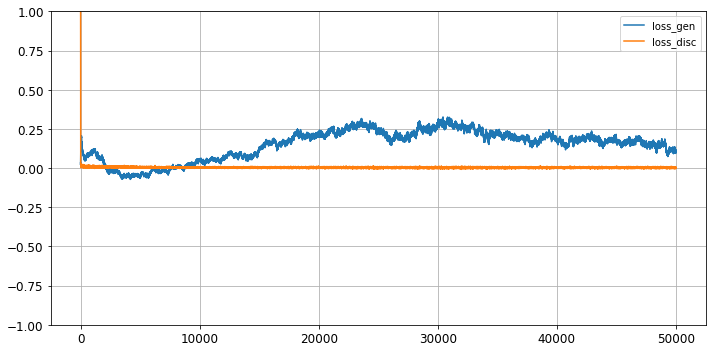

In [9]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-1,1])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [10]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### Sampleing from the latent space

Predicted Values: (1000, 3)
latent_space: 300
BATCH_SIZE: 100
use_bias: False
epochs: 50000
X-Y 2D slices:


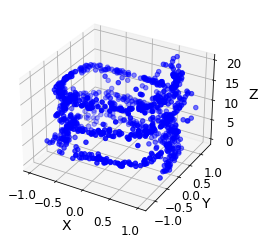

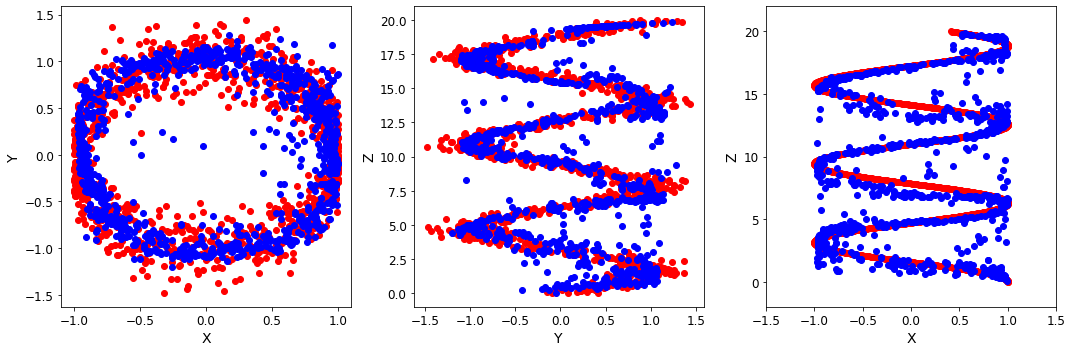

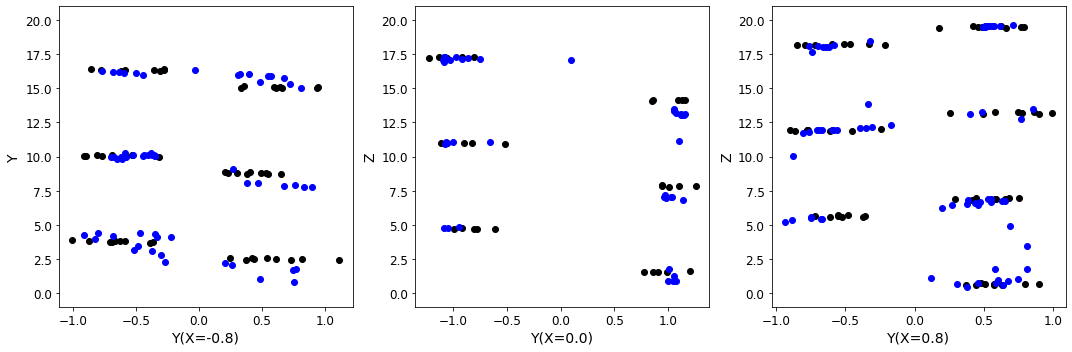

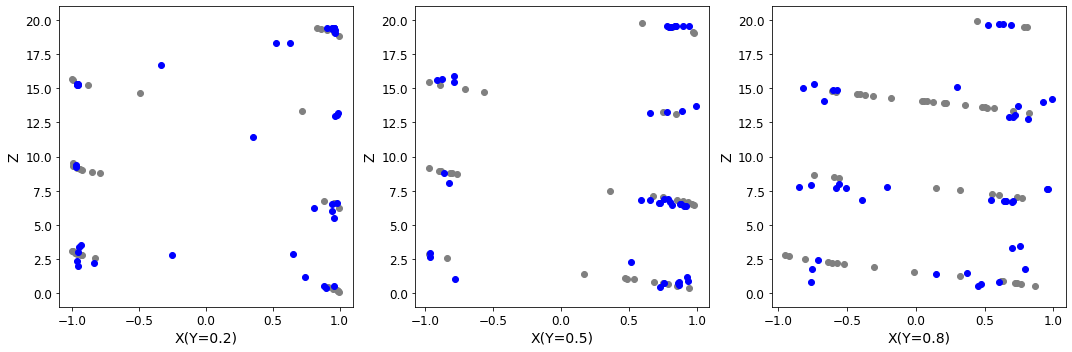

In [11]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='b')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train, c='gray')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    
    
    #change the dense layer

### Applying the prediction function

input_test : (400, 3)


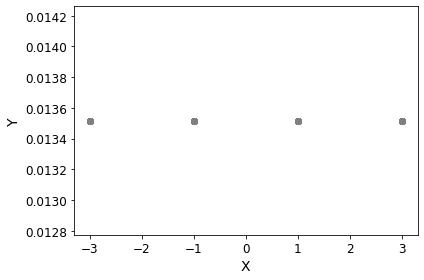

In [12]:
# define these for desired prediction
x_input = [-3,-1,1,3]
n_points = 400
y_min = -1
y_max = 1


# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//4, n_features), x_input[0])
predict2 = np.full((n_points//4, n_features), x_input[1])
predict3 = np.full((n_points//4, n_features), x_input[2])
predict4 = np.full((n_points//4, n_features), x_input[3])
predictthis = np.concatenate((predict1, predict2, predict3, predict4))

for n in range(n_points):
    predictthis[n,1] = random.uniform(y_min, y_max)
    
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(-1, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [13]:
X_generated = wgan.predict(input_test, scaler)

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

latent_space= 300
Epochs= 50000
BATCH_SIZE= 100
use_bias= False
X-Y 2D slices:


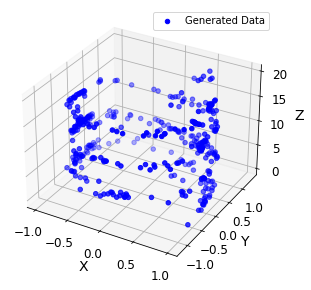

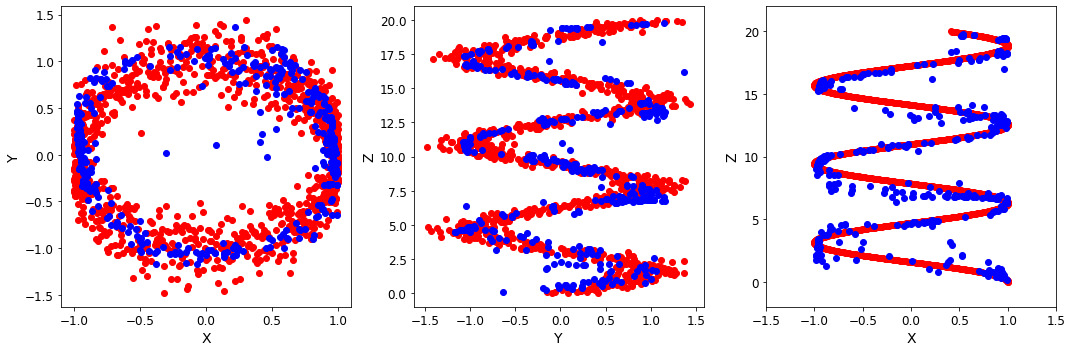

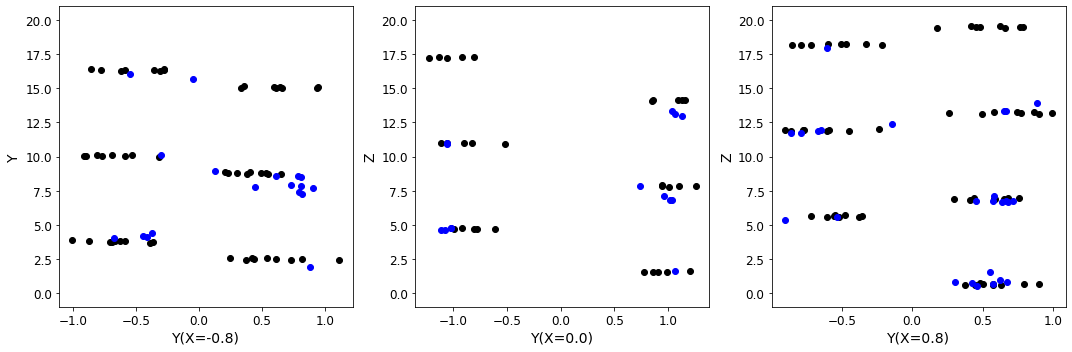

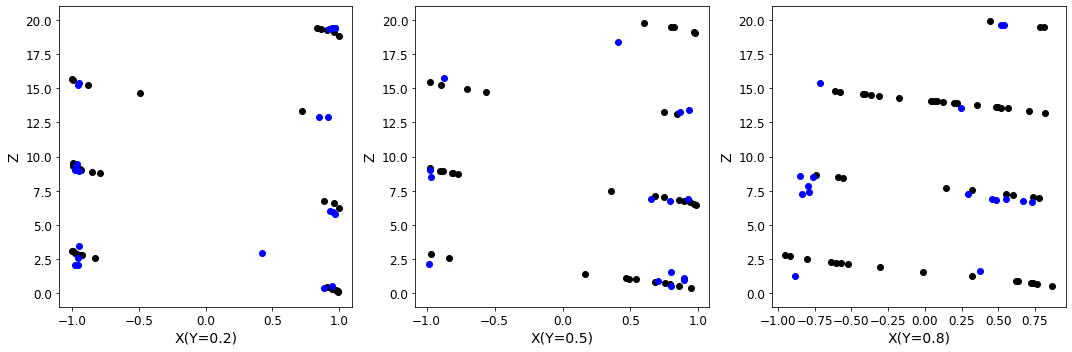

In [14]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], c='b', label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(X_generated[:,0],X_generated[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(X_generated[:,1],X_generated[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(X_generated[:,0],X_generated[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='r',label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    